<a href="https://colab.research.google.com/github/PoulamiDasDA/Santander_Customer_Satisfaction_Kaggle/blob/master/CLL_Prob_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing library to upload files
from google.colab import files

In [3]:
# Uploading the files
upload = files.upload()

Saving santander-customer-satisfaction.zip to santander-customer-satisfaction.zip


In [4]:
# Unzip the data
!unzip santander-customer-satisfaction.zip

Archive:  santander-customer-satisfaction.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
from pylab import xticks

In [9]:
data=pd.read_csv('train.csv')

Understanding the data

In [10]:
data.head(5)

ID  var3  var15  ...  saldo_medio_var44_ult3          var38  TARGET
0   1     2     23  ...                     0.0   39205.170000       0
1   3     2     34  ...                     0.0   49278.030000       0
2   4     2     23  ...                     0.0   67333.770000       0
3   8     2     37  ...                     0.0   64007.970000       0
4  10     2     39  ...                     0.0  117310.979016       0

[5 rows x 371 columns]

In [11]:
data.tail(5)

ID  var3  var15  ...  saldo_medio_var44_ult3          var38  TARGET
76015  151829     2     48  ...                     0.0   60926.490000       0
76016  151830     2     39  ...                     0.0  118634.520000       0
76017  151835     2     23  ...                     0.0   74028.150000       0
76018  151836     2     25  ...                     0.0   84278.160000       0
76019  151838     2     46  ...                     0.0  117310.979016       0

[5 rows x 371 columns]

In [16]:
pd. set_option('max_rows', 400)

In [36]:
pd.set_option('max_columns', 400)


Describe the data


In [37]:
data.describe()

ID           var3         var15  imp_ent_var16_ult1  \
count   76020.000000   76020.000000  76020.000000        76020.000000   
mean    75964.050723   -1523.199277     33.212865           86.208265   
std     43781.947379   39033.462364     12.956486         1614.757313   
min         1.000000 -999999.000000      5.000000            0.000000   
25%     38104.750000       2.000000     23.000000            0.000000   
50%     76043.000000       2.000000     28.000000            0.000000   
75%    113748.750000       2.000000     40.000000            0.000000   
max    151838.000000     238.000000    105.000000       210000.000000   

       imp_op_var39_comer_ult1  imp_op_var39_comer_ult3  \
count             76020.000000             76020.000000   
mean                 72.363067               119.529632   
std                 339.315831               546.266294   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               12888.030000             21024.810000   

       imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
count             76020.000000             76020.000000   
mean                  3.559130                 6.472698   
std                  93.155749               153.737066   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                8237.820000             11073.570000   

       imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  imp_op_var40_ult1  \
count             76020.000000             76020.000000       76020.000000   
mean                  0.412946                 0.567352           3.160715   
std                  30.604864                36.513513          95.268204   
min                   0.000000                 0.000000           0.000000   
25%                   0.000000                 0.000000           0.000000   
50%                   0.000000                 0.000000           0.000000   
75%                   0.000000                 0.000000           0.000000   
max                6600.000000              6600.000000        8237.820000   

       imp_op_var41_comer_ult1  imp_op_var41_comer_ult3  \
count             76020.000000             76020.000000   
mean                 68.803937               113.056934   
std                 319.605516               512.154823   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               12888.030000             16566.810000   

       imp_op_var41_efect_ult1  imp_op_var41_efect_ult3  imp_op_var41_ult1  \
count             76020.000000             76020.000000       76020.000000   
mean                 68.205140               113.225058         137.242763   
std                 531.897917               950.086398         697.712596   
min                   0.000000                 0.000000           0.000000   
25%                   0.000000                 0.000000           0.000000   
50%                   0.000000                 0.000000           0.000000   
75%                   0.000000                 0.000000           0.000000   
max               45990.000000            131100.000000       47598.090000   

       imp_op_var39_efect_ult1  imp_op_var39_efect_ult3  imp_op_var39_ult1  \
count             76020.000000             76020.000000       76020.000000   
mean                 68.618087               113.792410         140.403479   
std                 535.473750               953.578624         712.767240   
min                   0.000000                

In [19]:
data.dtypes

ID                                 int64
var3                               int64
var15                              int64
imp_ent_var16_ult1               float64
imp_op_var39_comer_ult1          float64
imp_op_var39_comer_ult3          float64
imp_op_var40_comer_ult1          float64
imp_op_var40_comer_ult3          float64
imp_op_var40_efect_ult1          float64
imp_op_var40_efect_ult3          float64
imp_op_var40_ult1                float64
imp_op_var41_comer_ult1          float64
imp_op_var41_comer_ult3          float64
imp_op_var41_efect_ult1          float64
imp_op_var41_efect_ult3          float64
imp_op_var41_ult1                float64
imp_op_var39_efect_ult1          float64
imp_op_var39_efect_ult3          float64
imp_op_var39_ult1                float64
imp_sal_var16_ult1               float64
ind_var1_0                         int64
ind_var1                           int64
ind_var2_0                         int64
ind_var2                           int64
ind_var5_0      

In [25]:
data.isnull().sum()[data.isnull().sum()>0]

Series([], dtype: int64)

So no missing values in the given dataframe

Target Varible Distribution

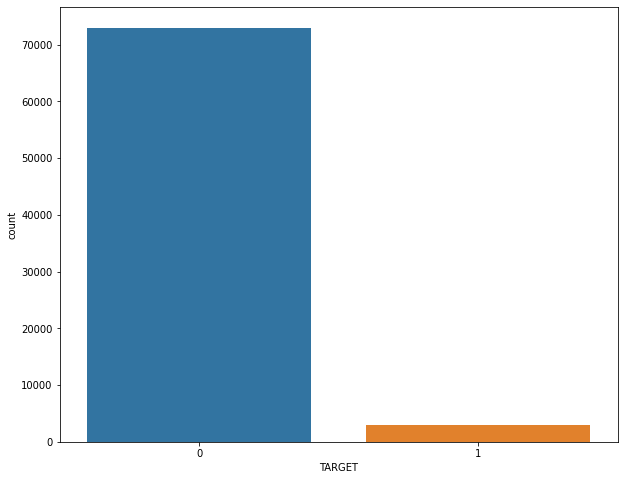

In [27]:
plt.figure(figsize = (10, 8))
sns.countplot(x = 'TARGET', data = data)

In [28]:
print('No of customers who are satisfied ' + str(len(data[data['TARGET'] == 1])))
print('No of customers who are not satisfied ' + str(len(data[data['TARGET'] == 0])))

No of customers who are satisfied 3008
No of customers who are not satisfied 73012


Since variable 'TARGET' is target variable it should be dropped from the dataframe

In [29]:
dataSnap=data.copy()

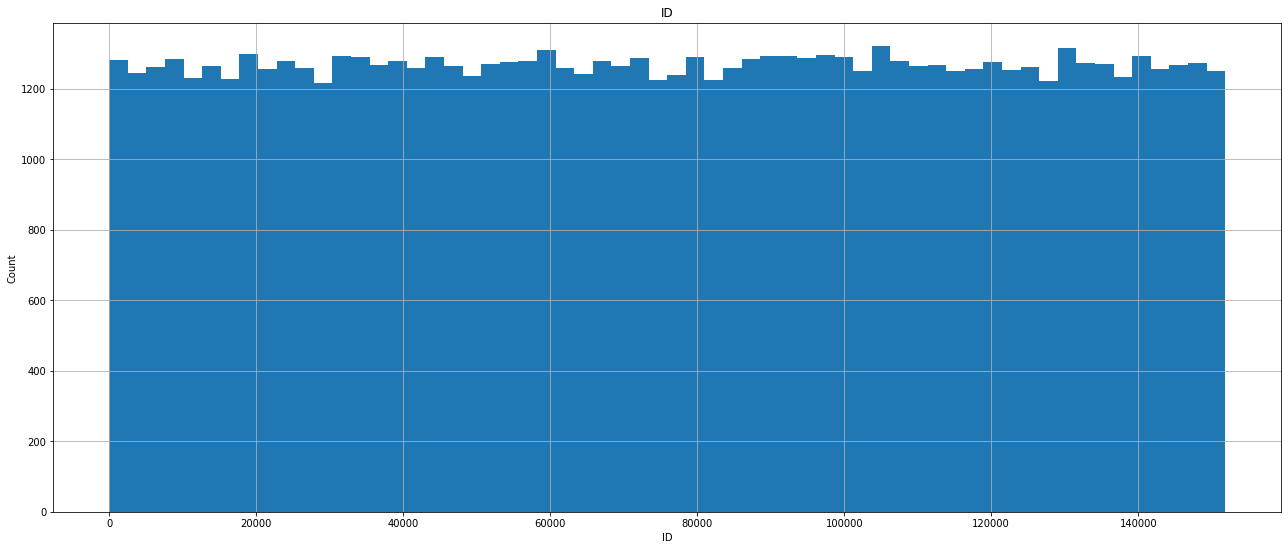

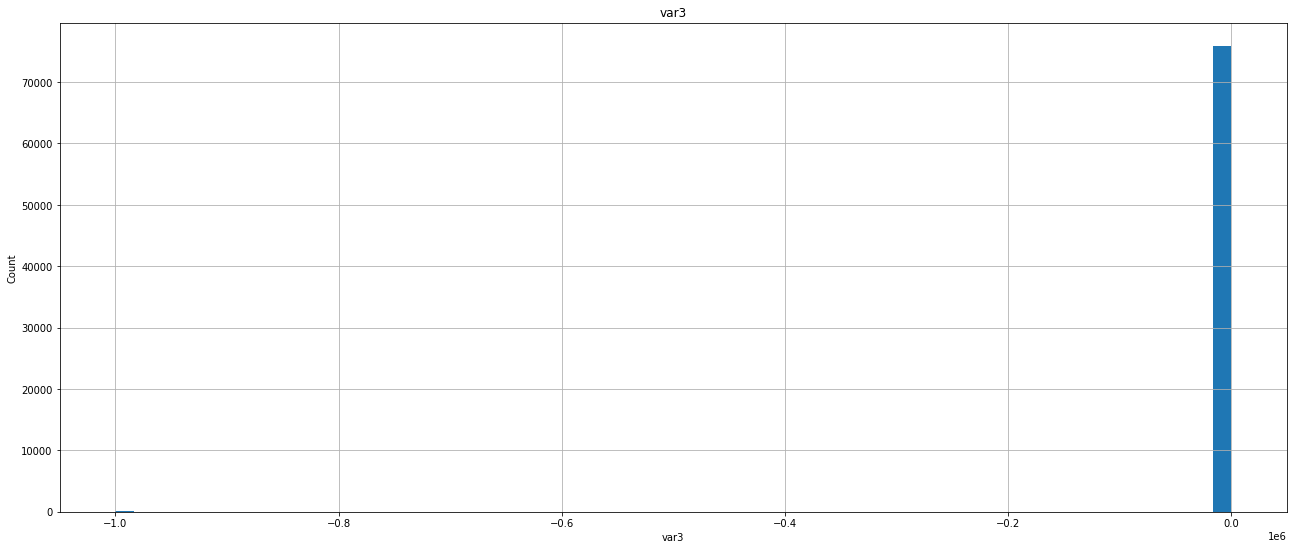

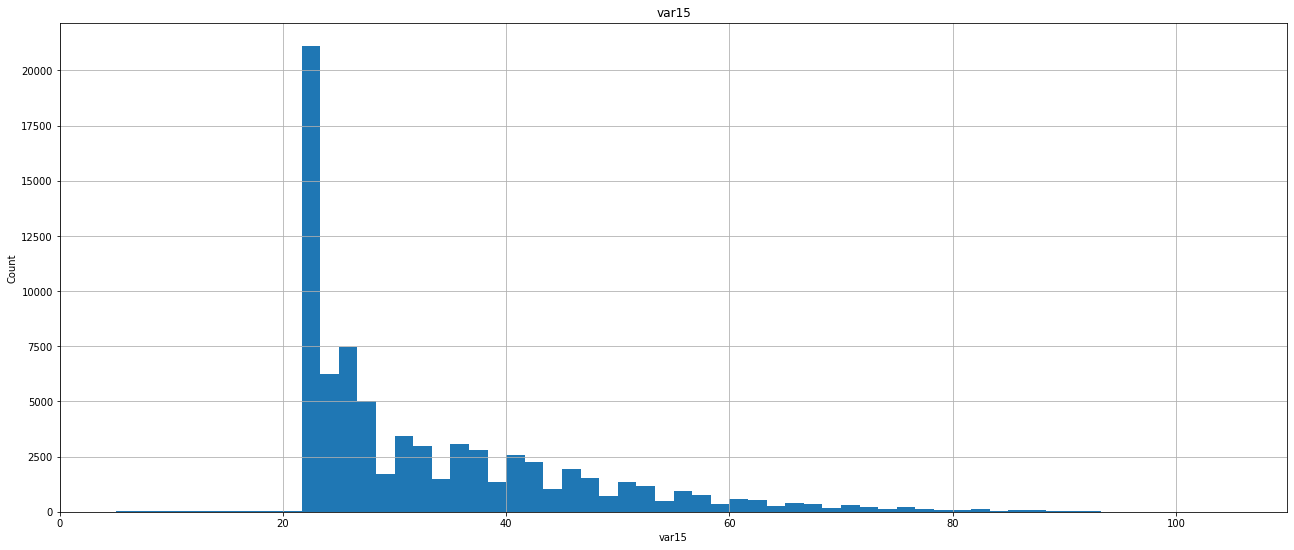

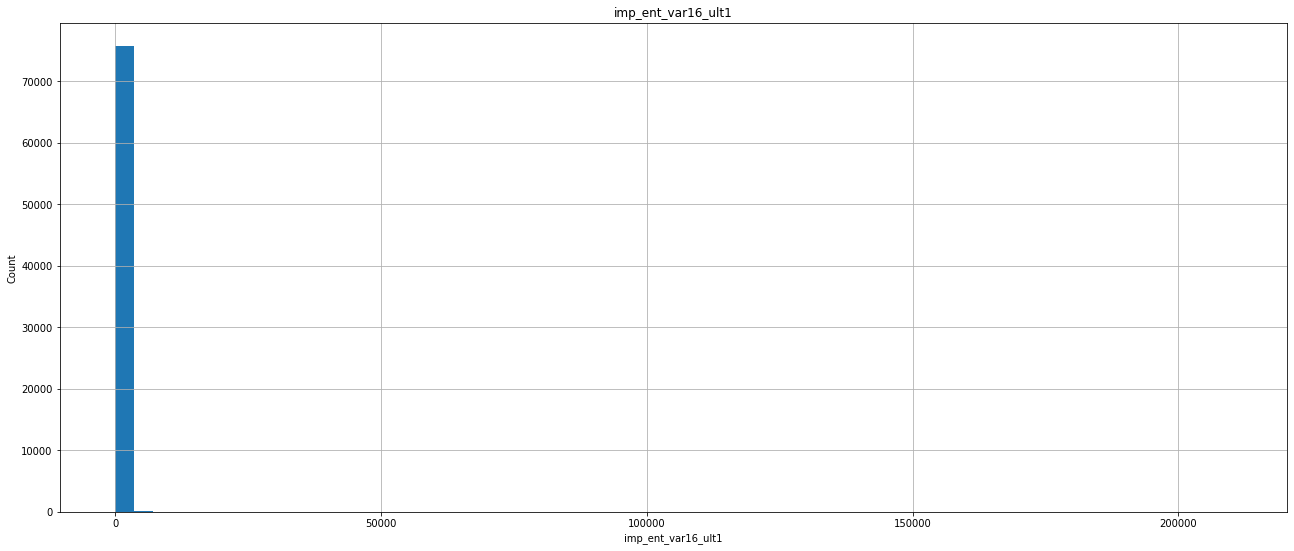

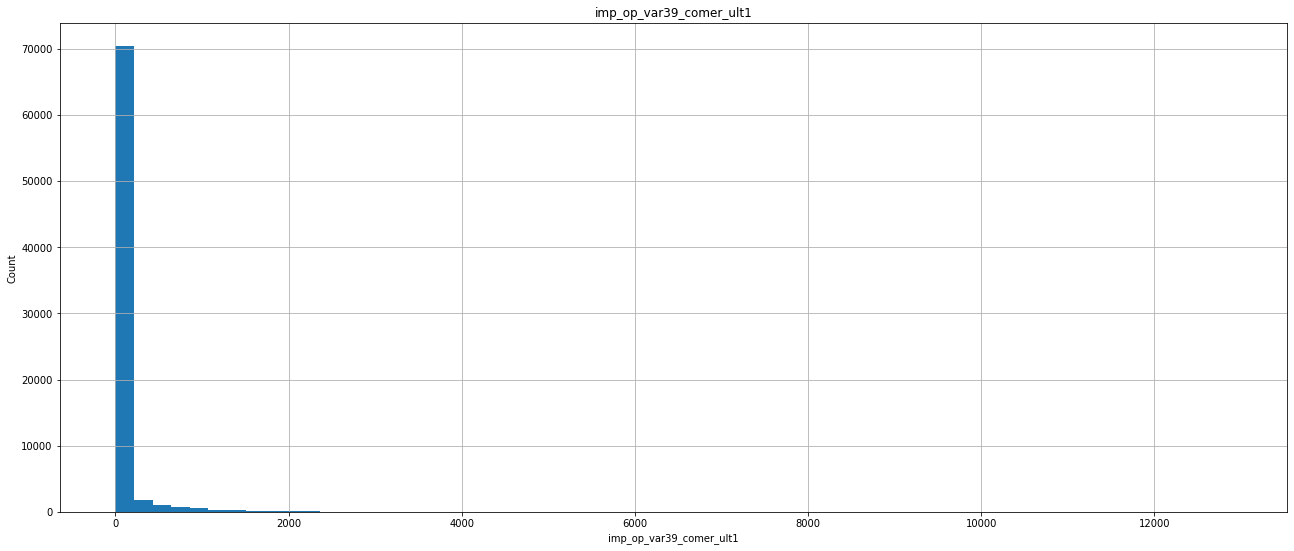

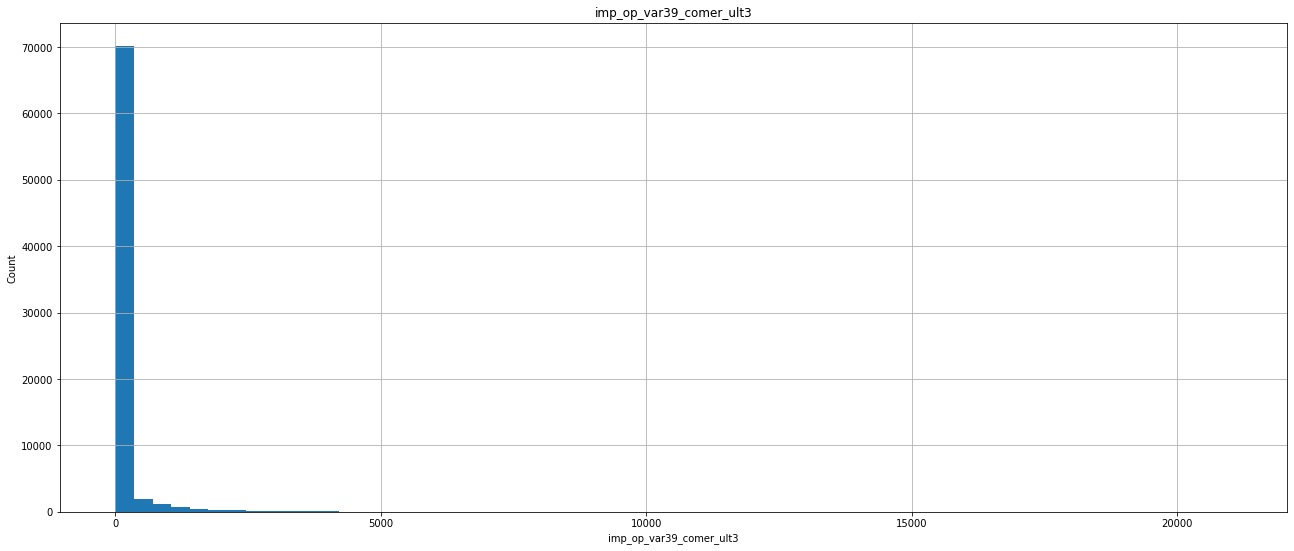

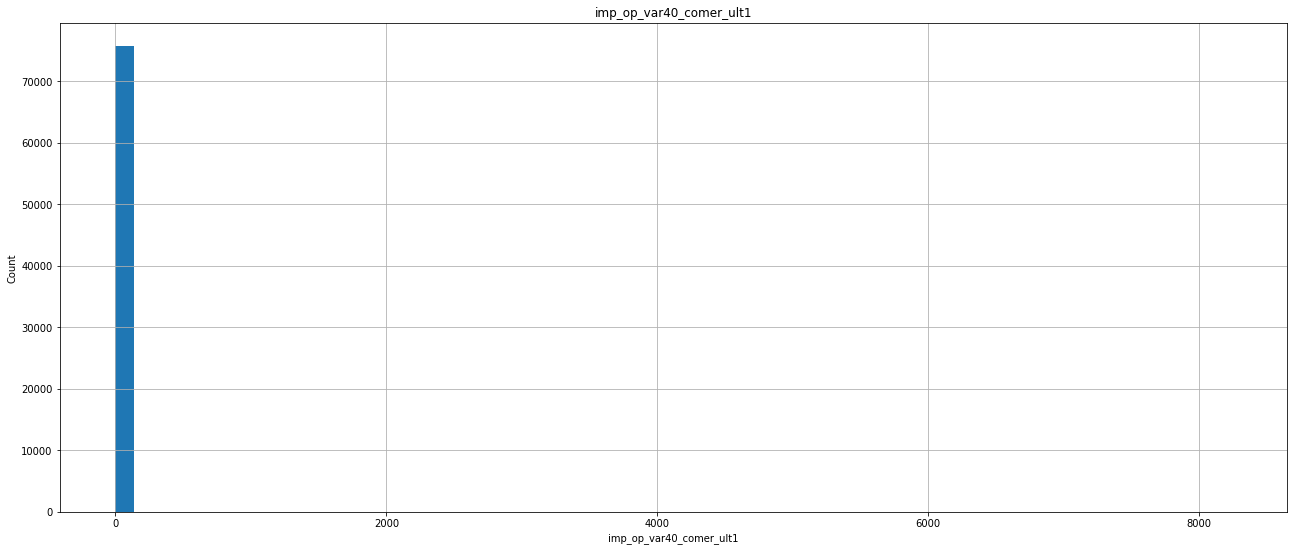

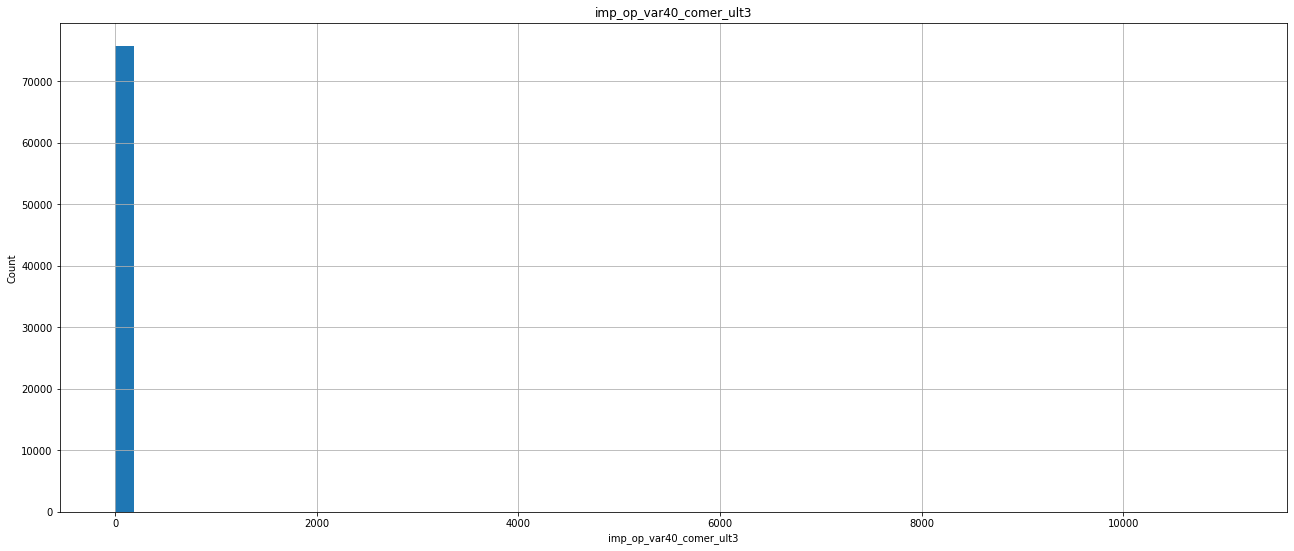

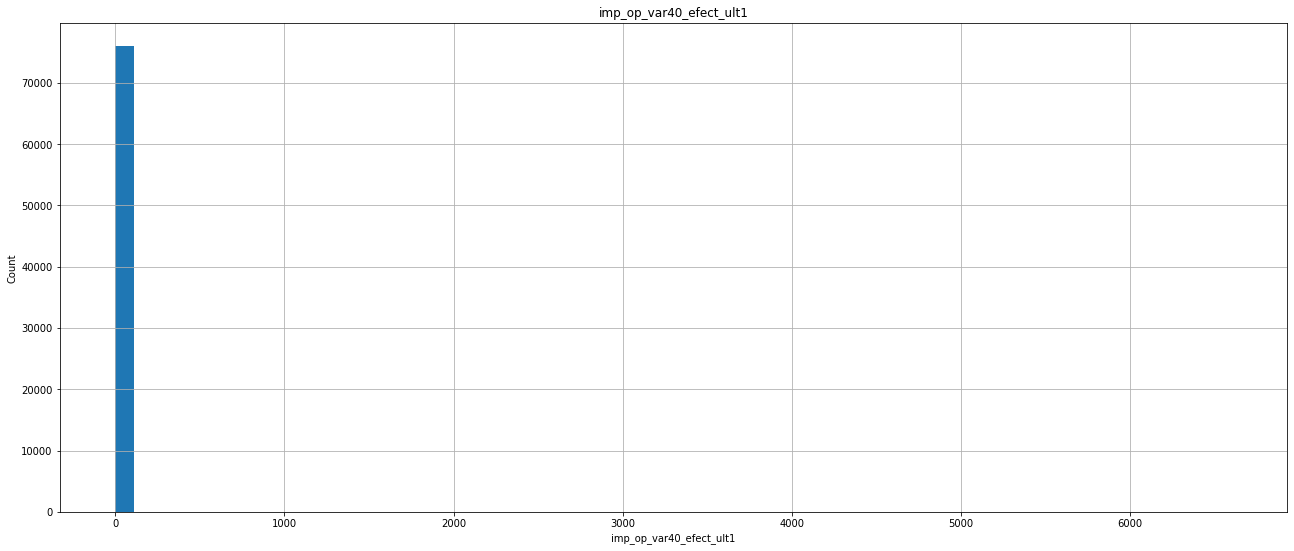

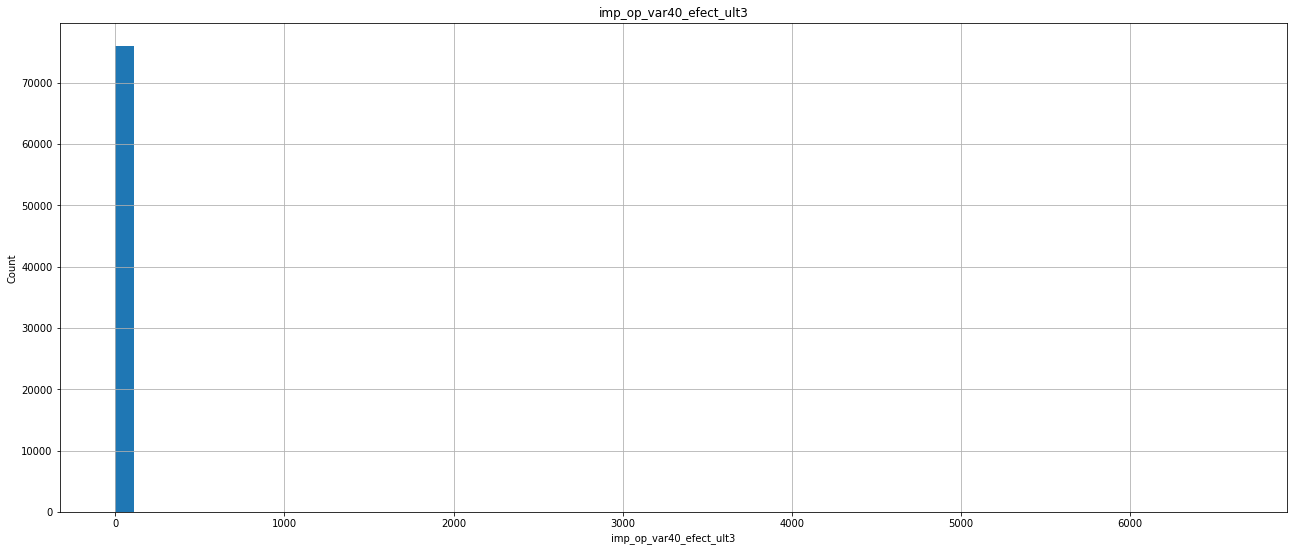

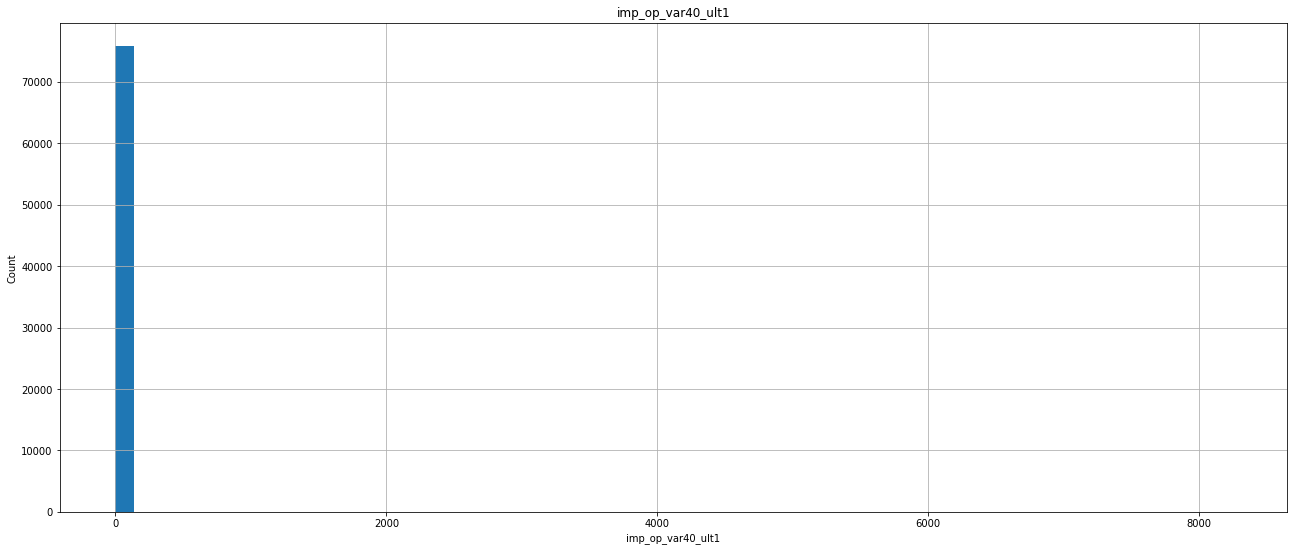

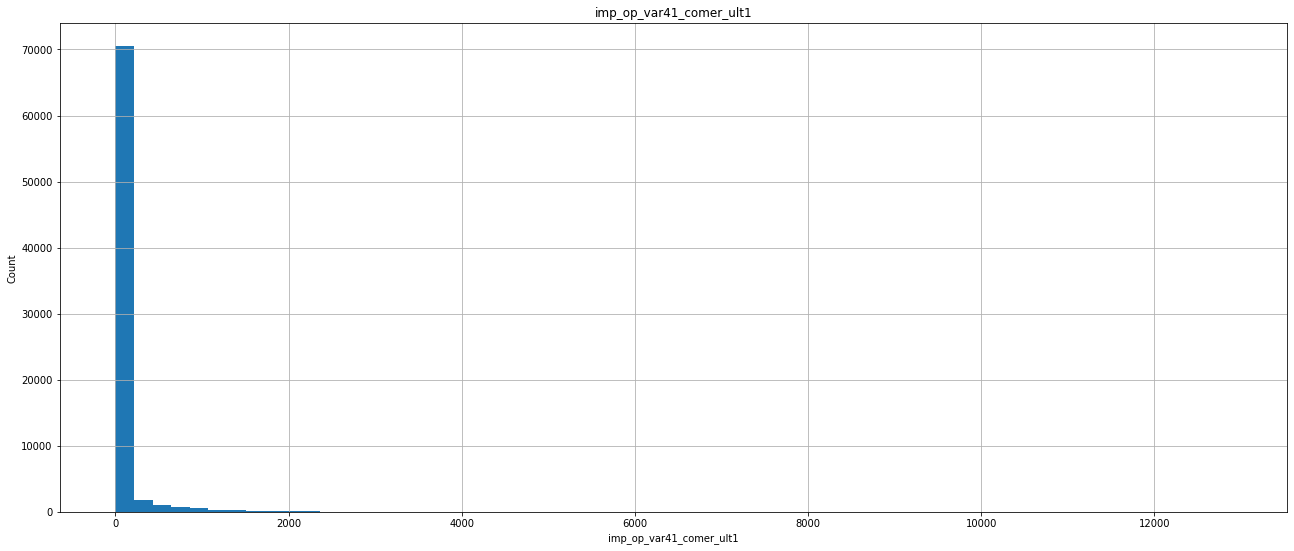

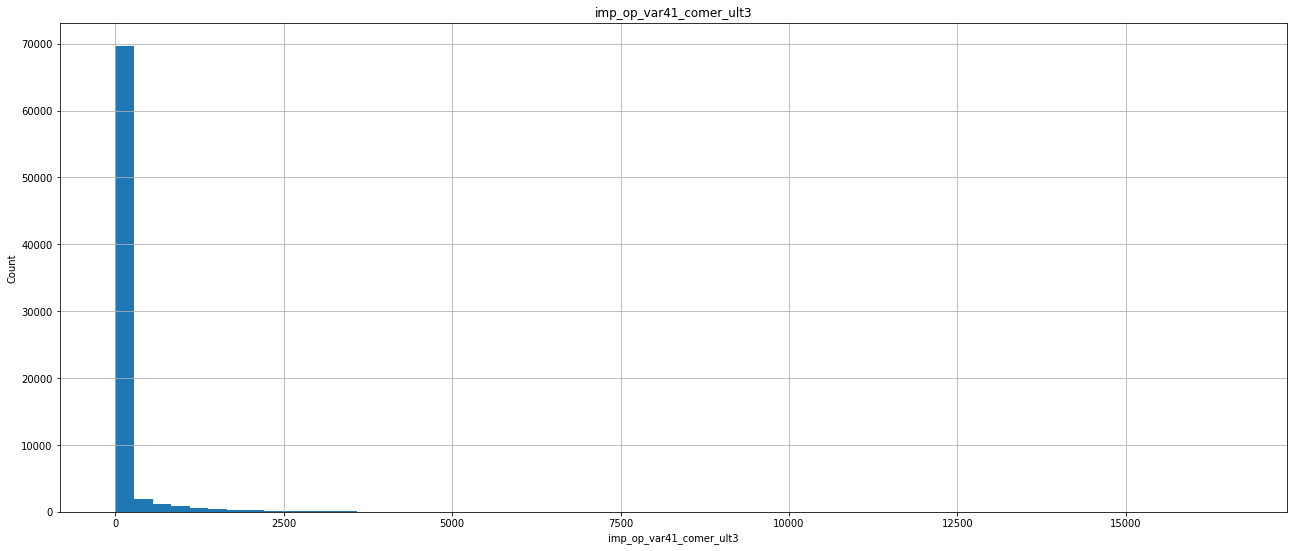

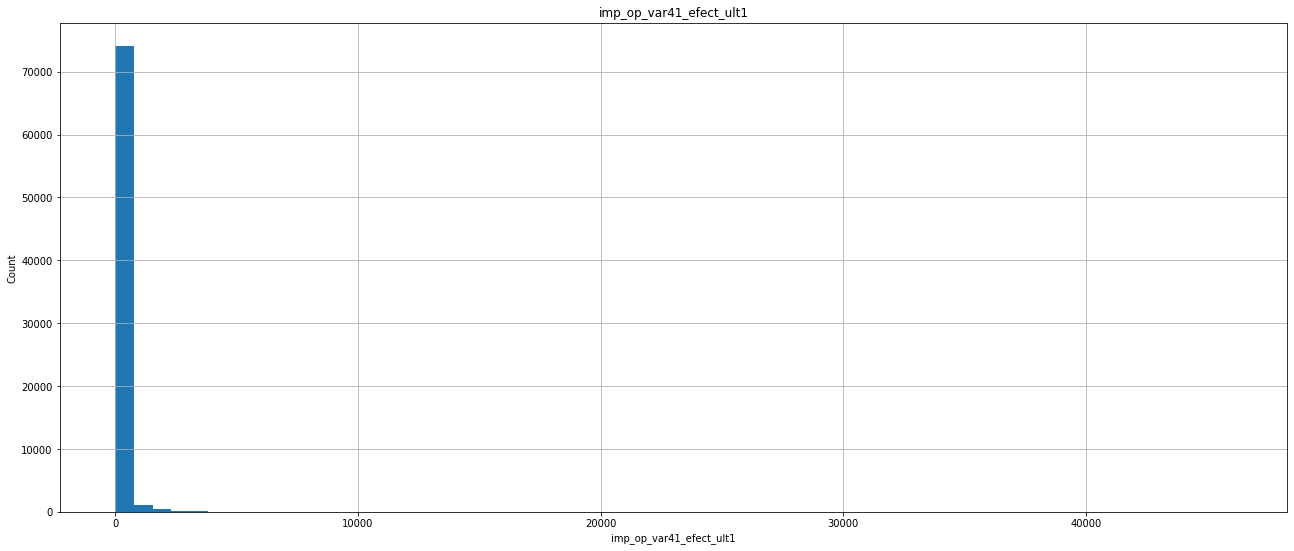

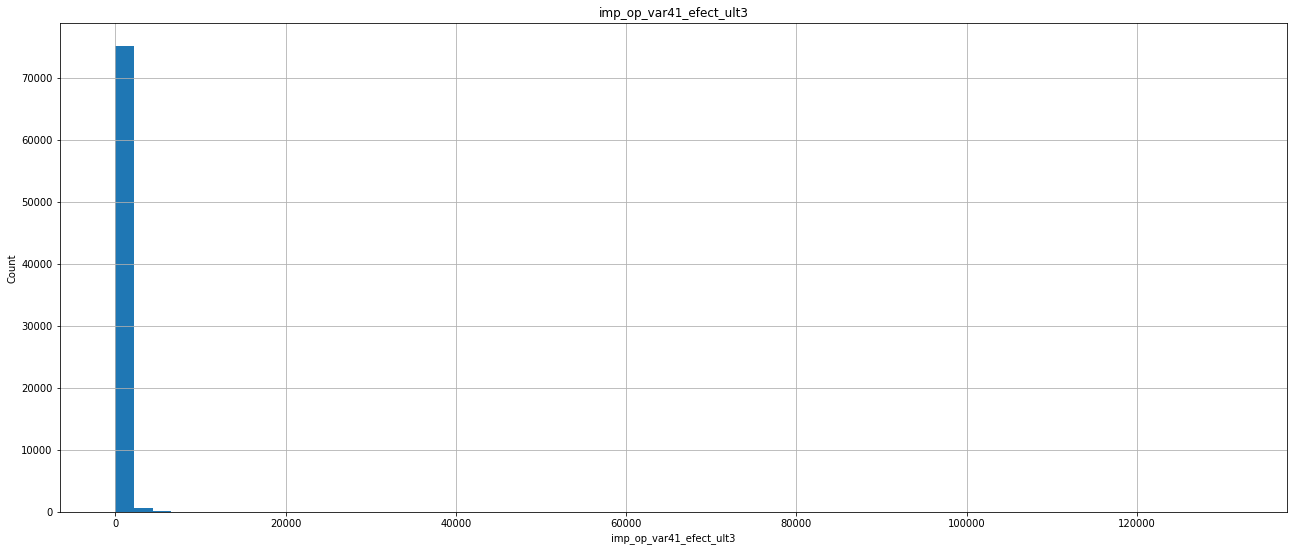

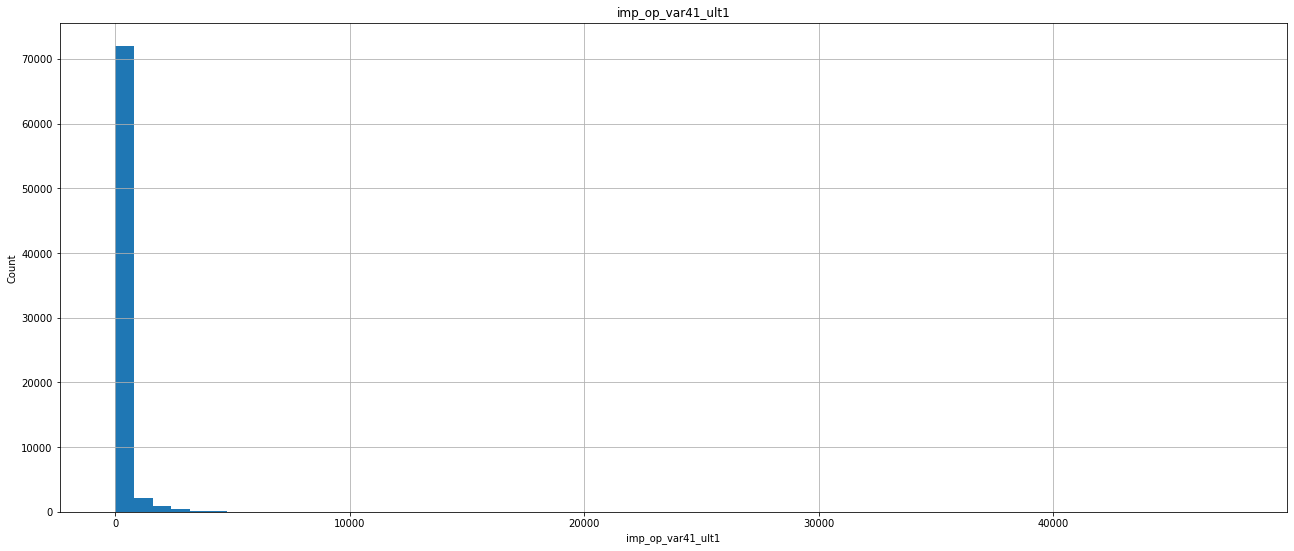

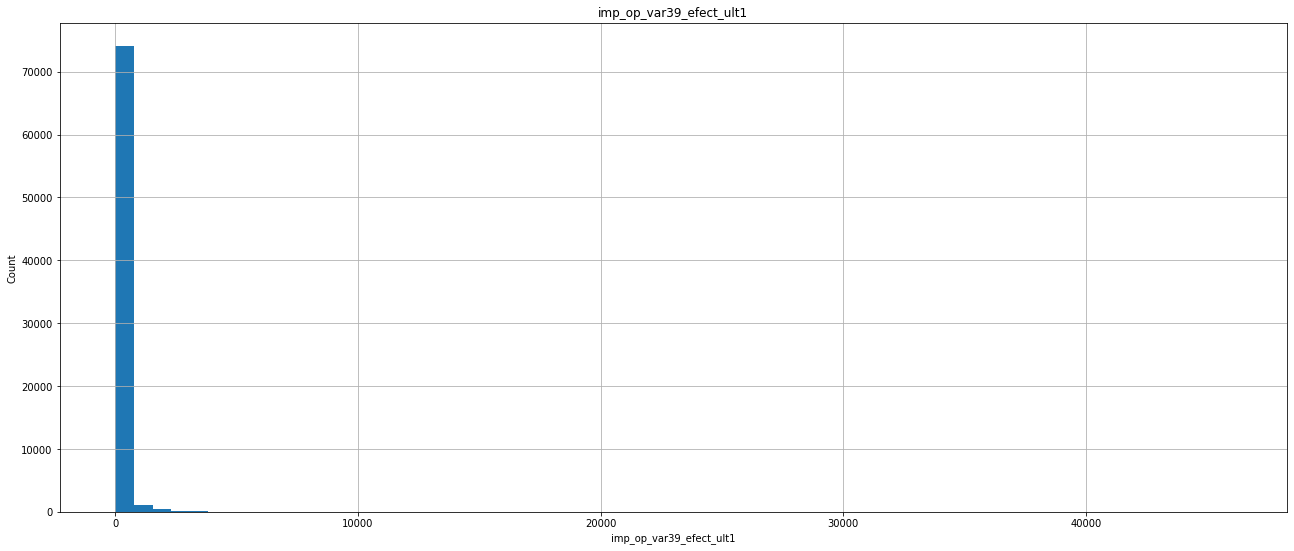

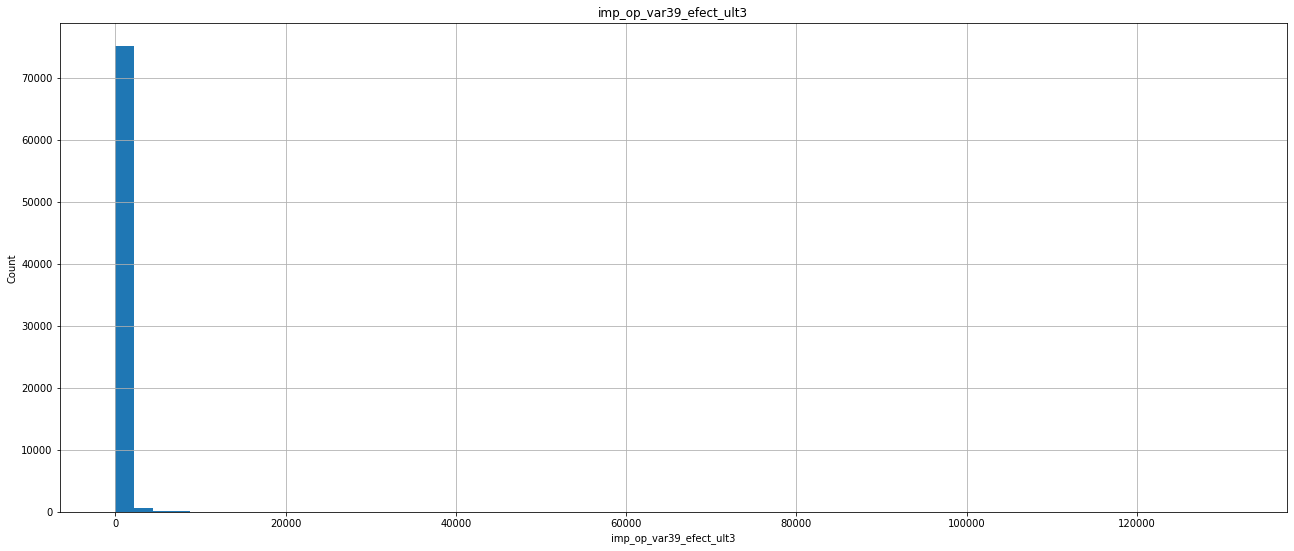

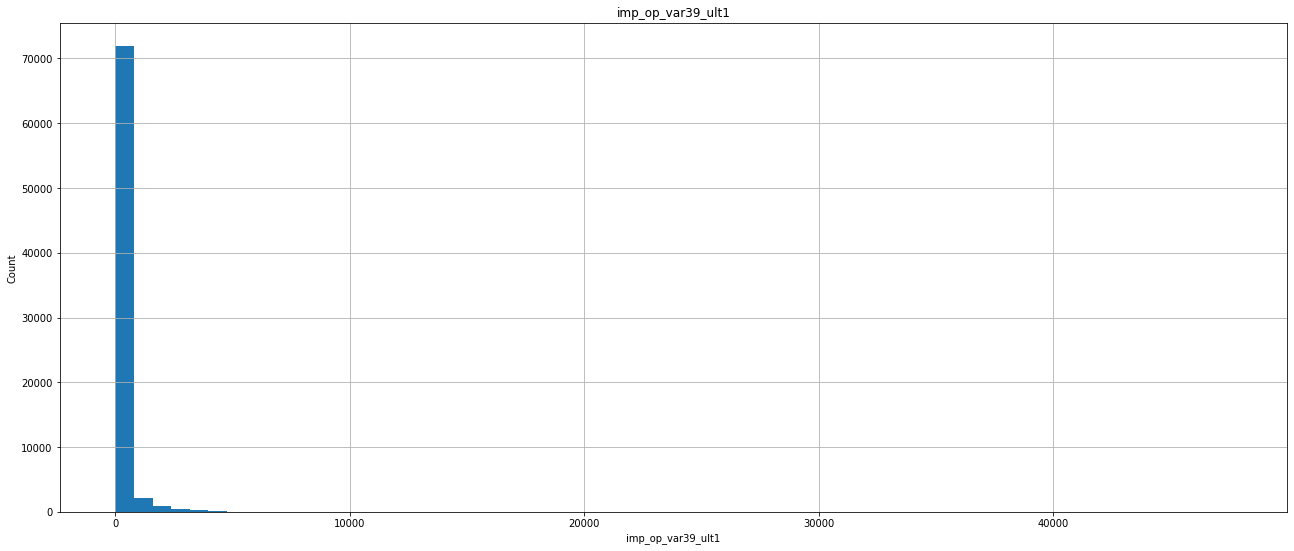

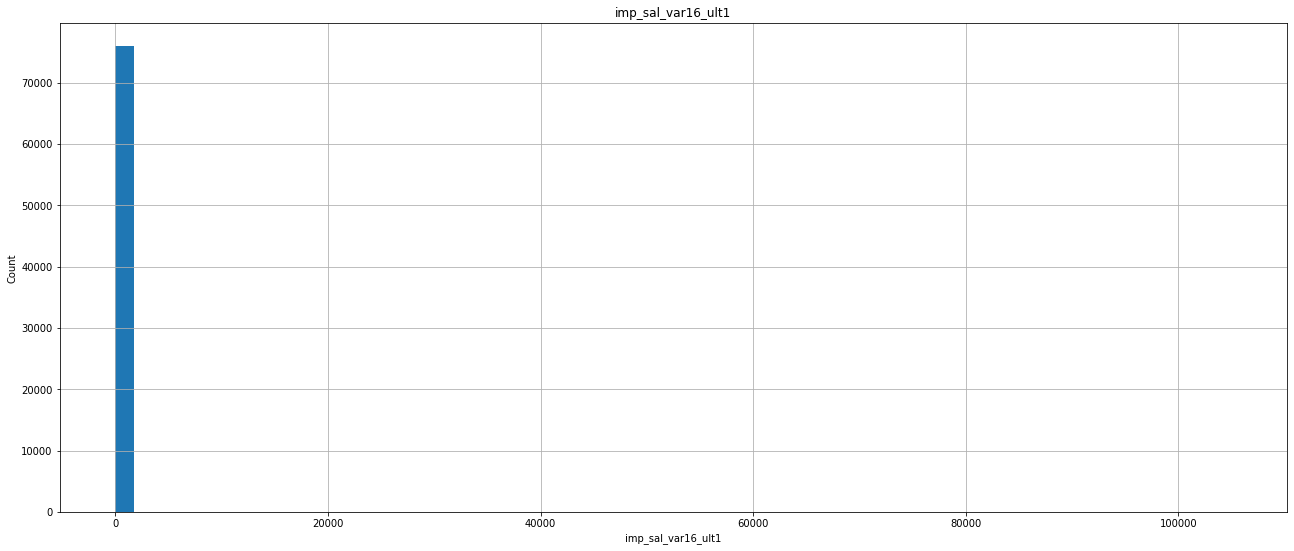

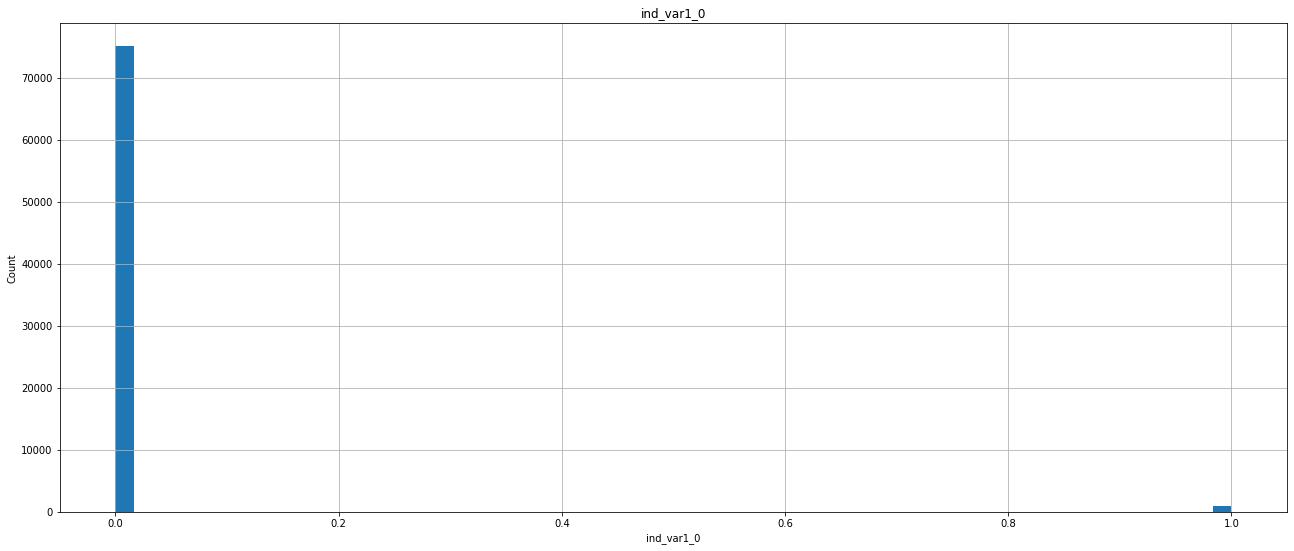

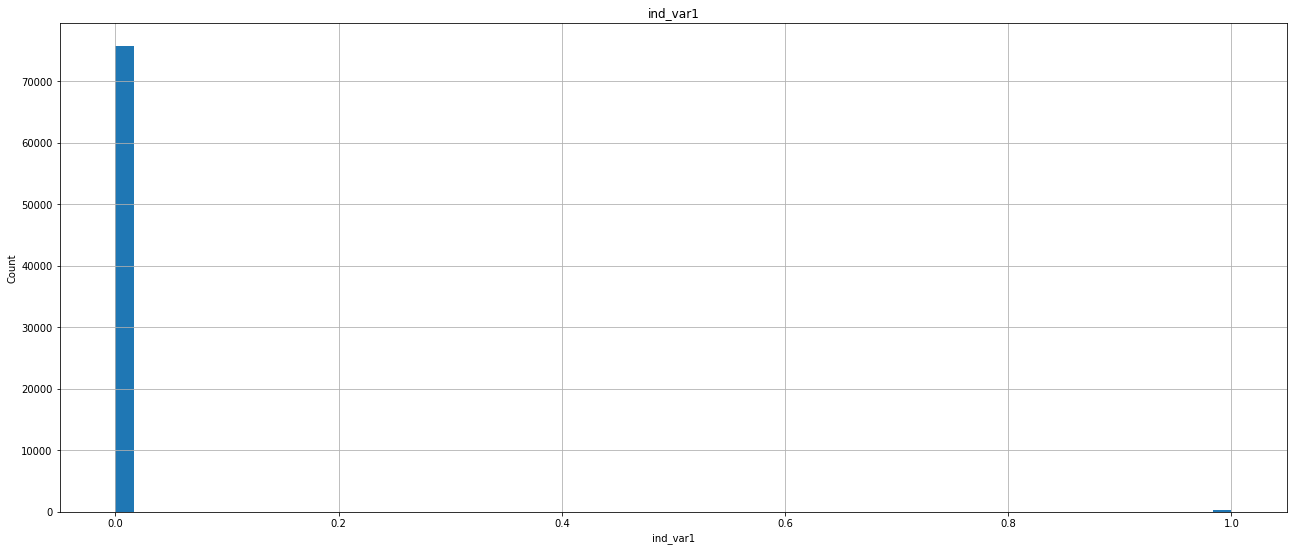

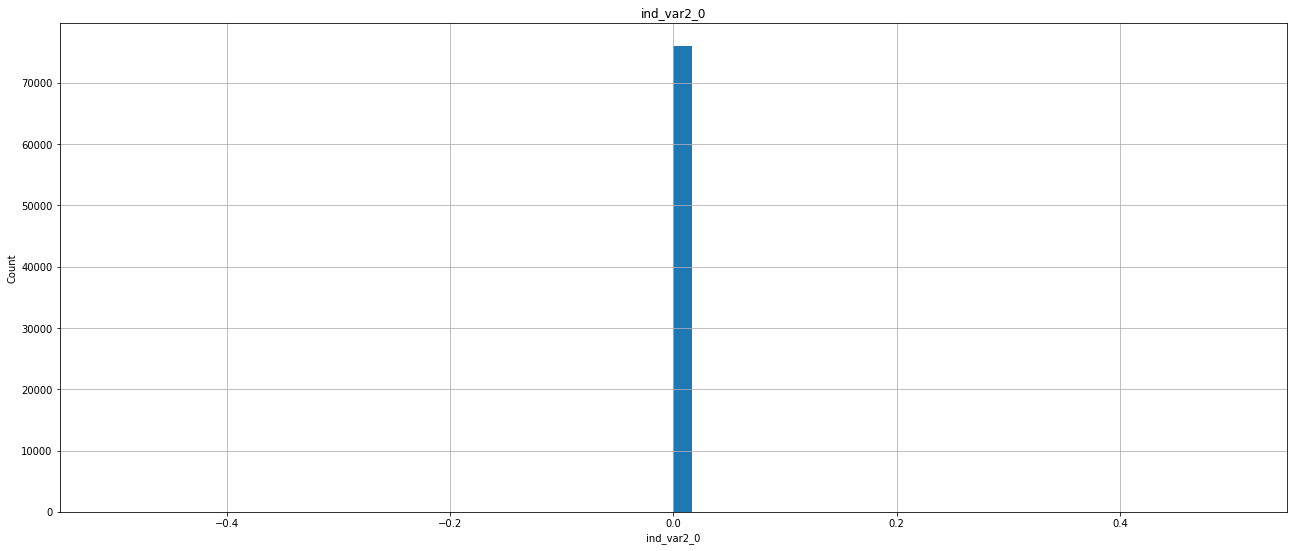

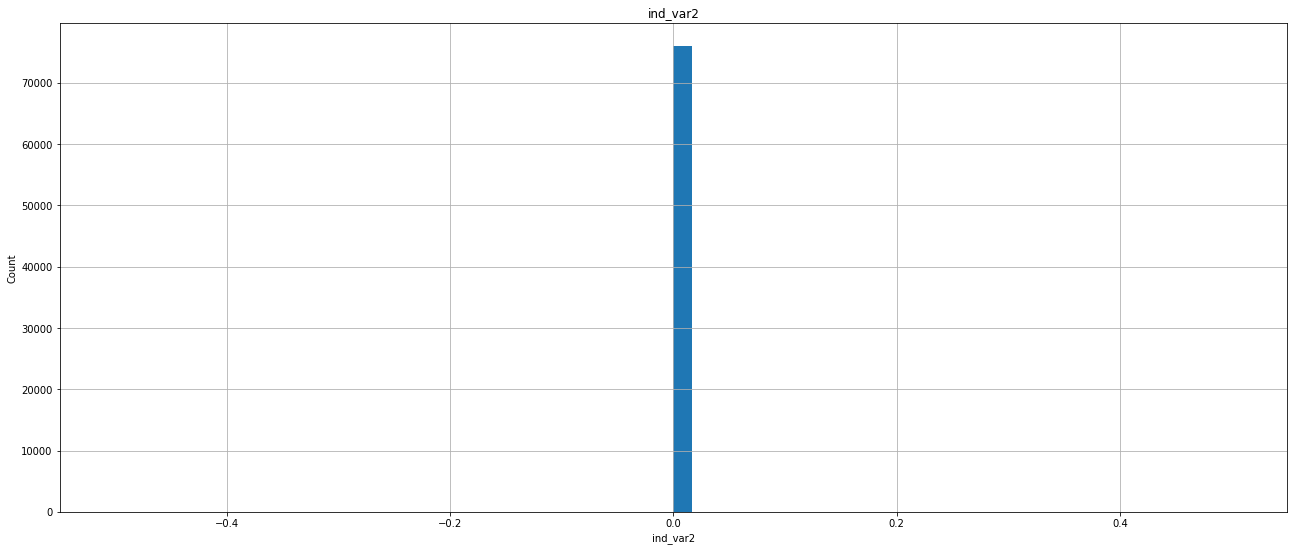

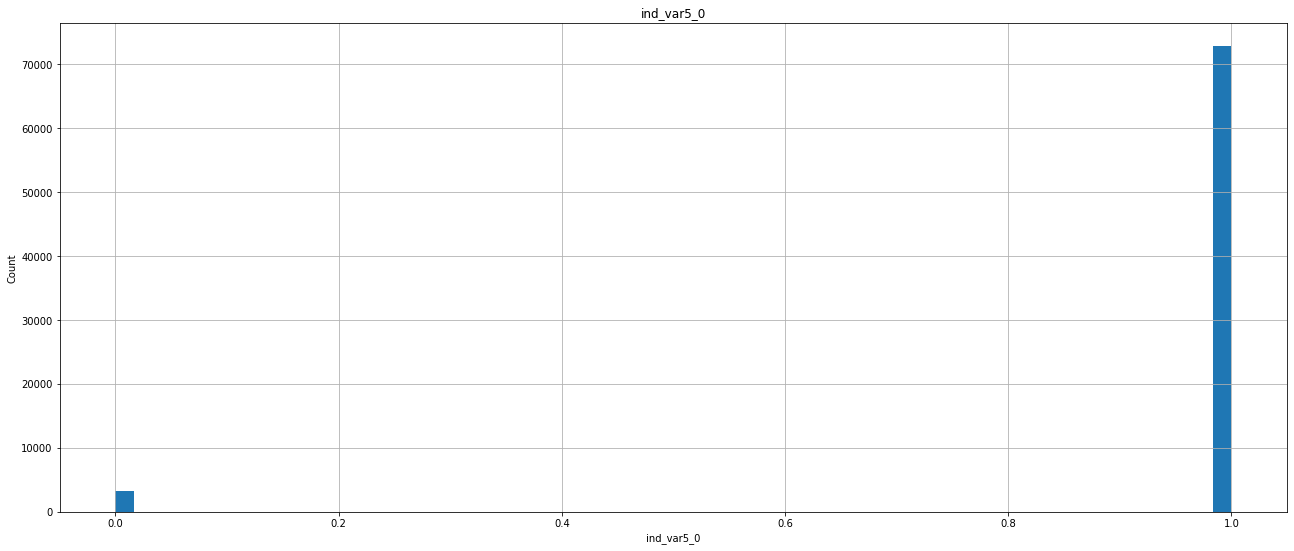

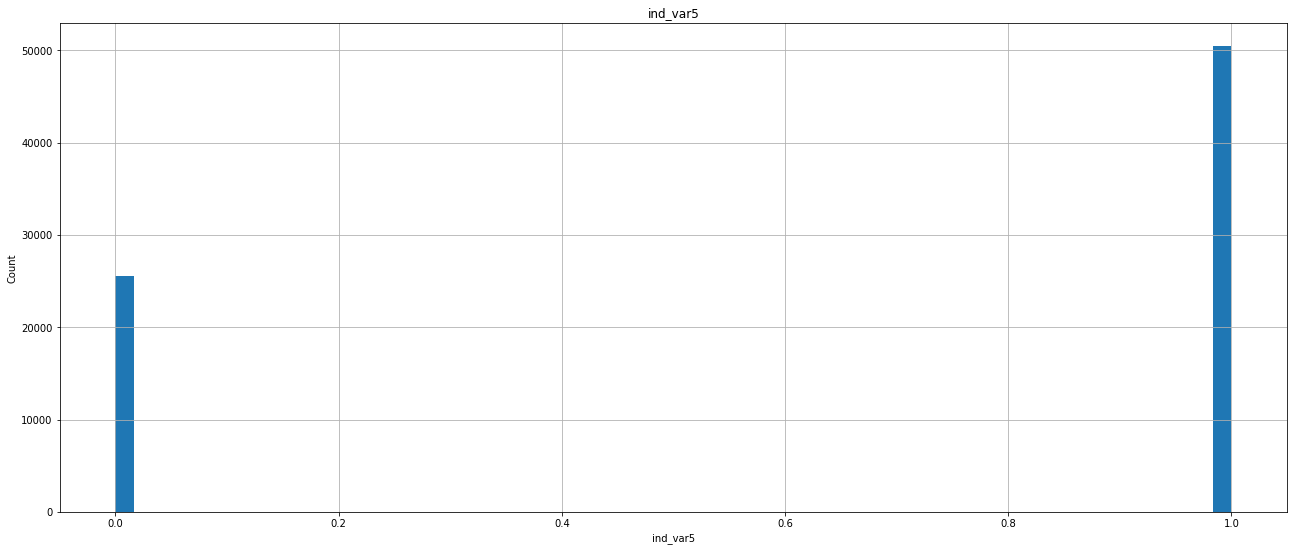

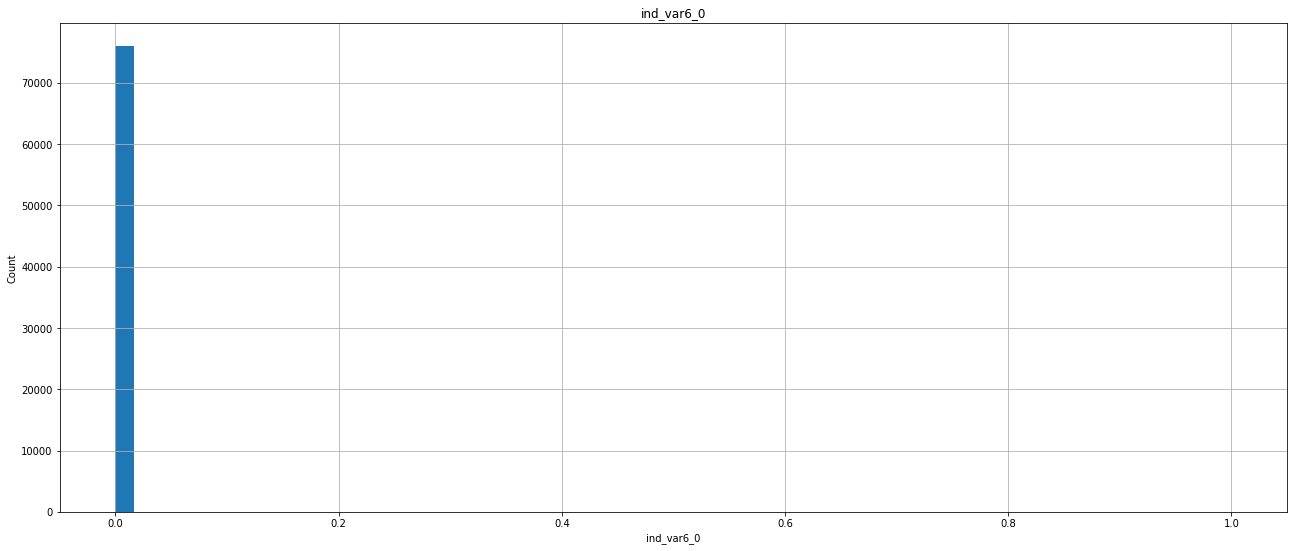

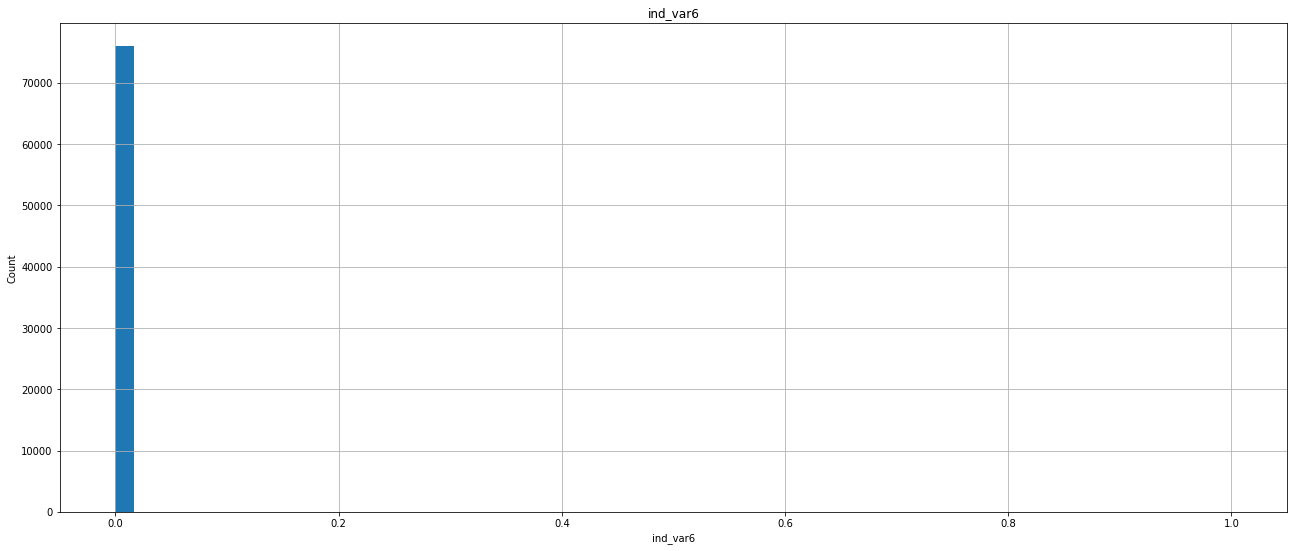

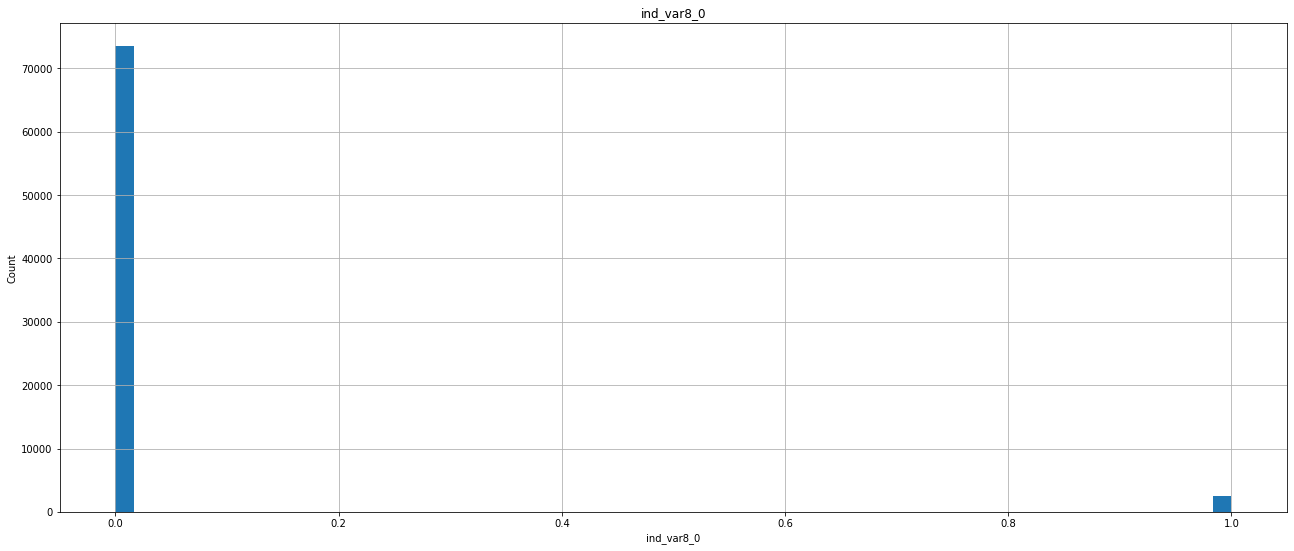

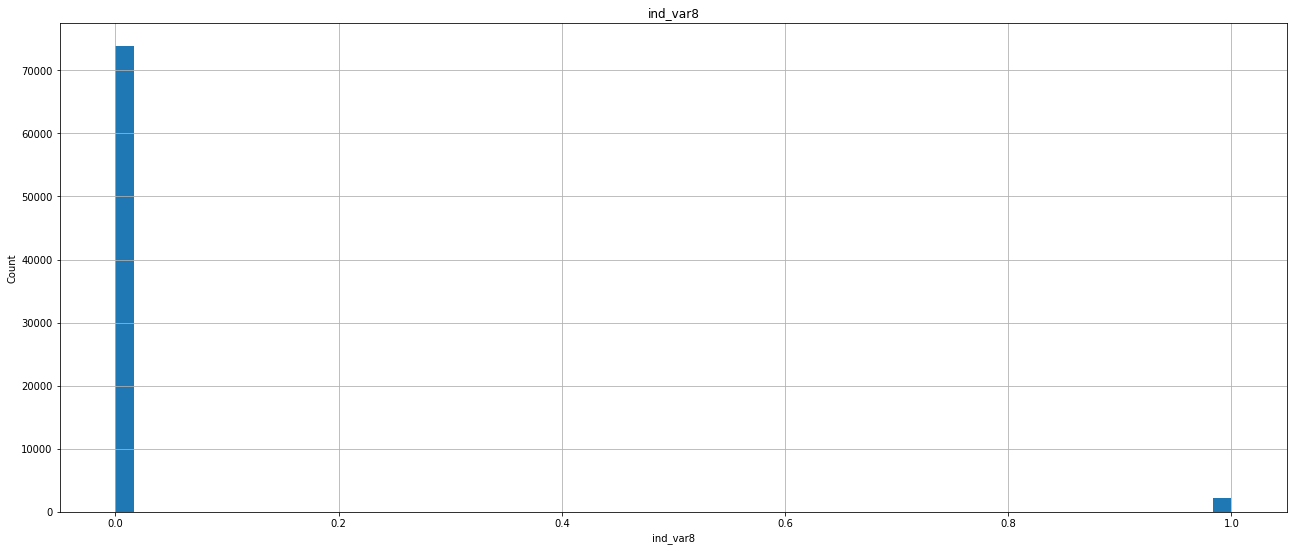

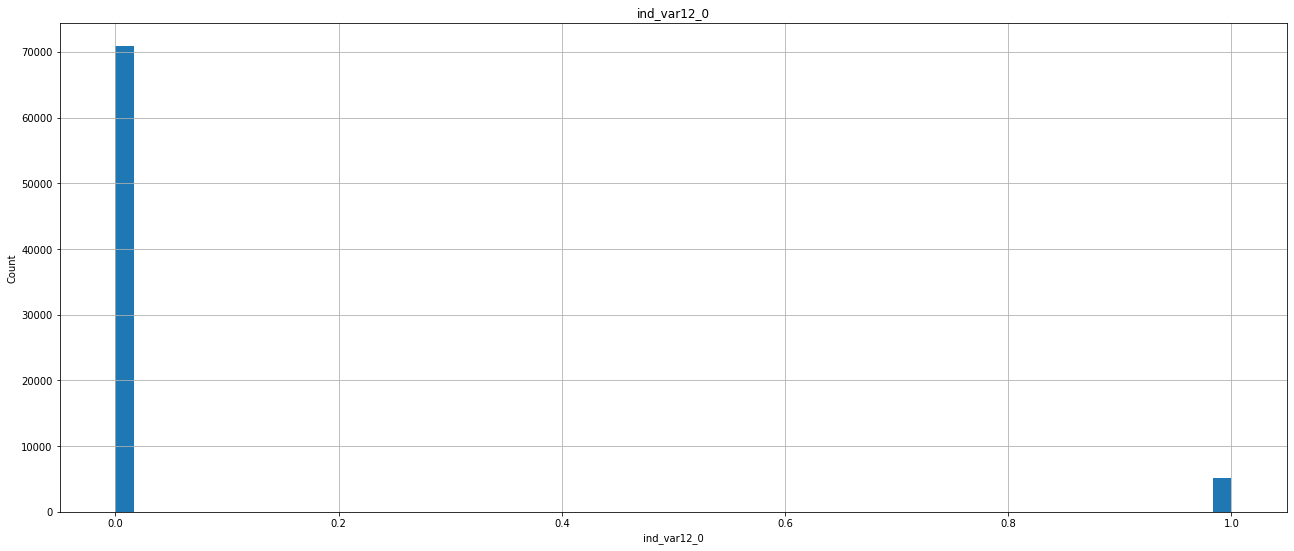

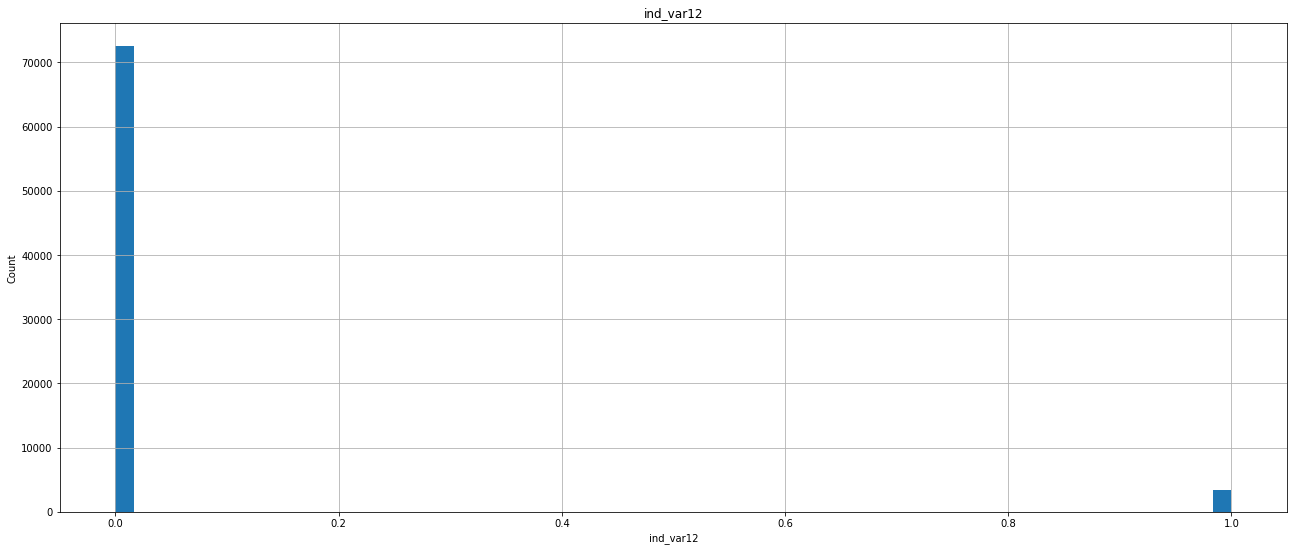

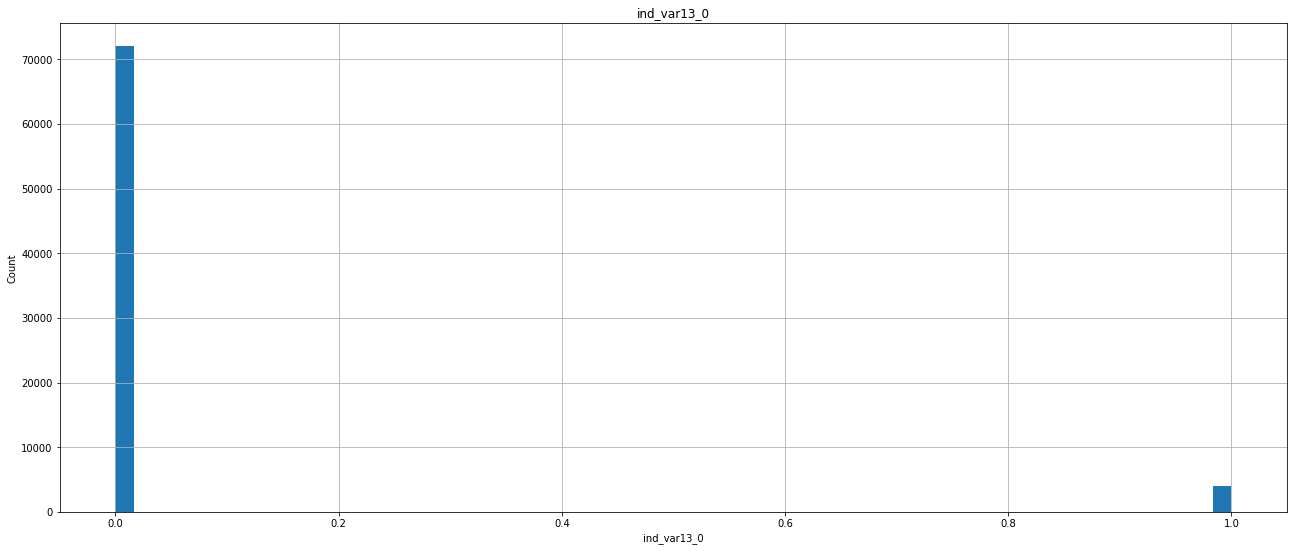

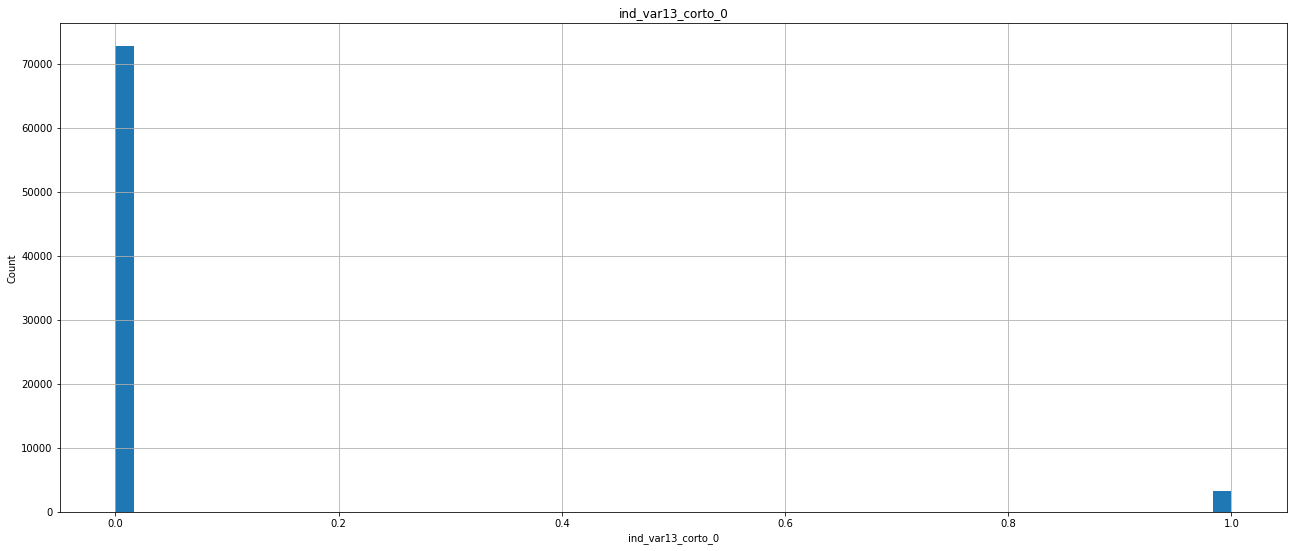

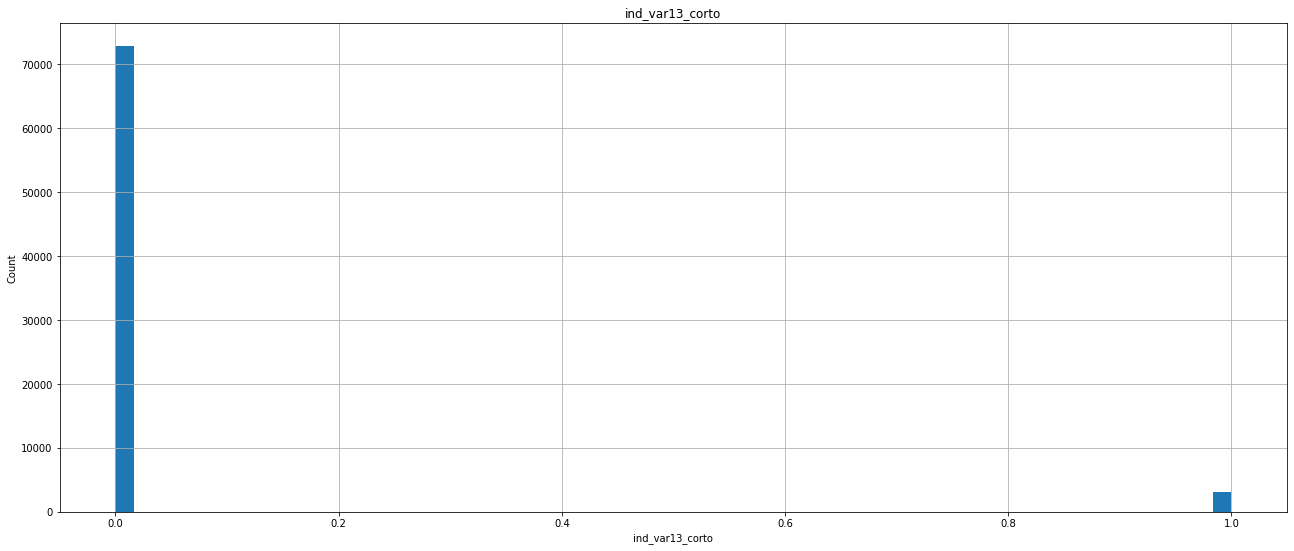

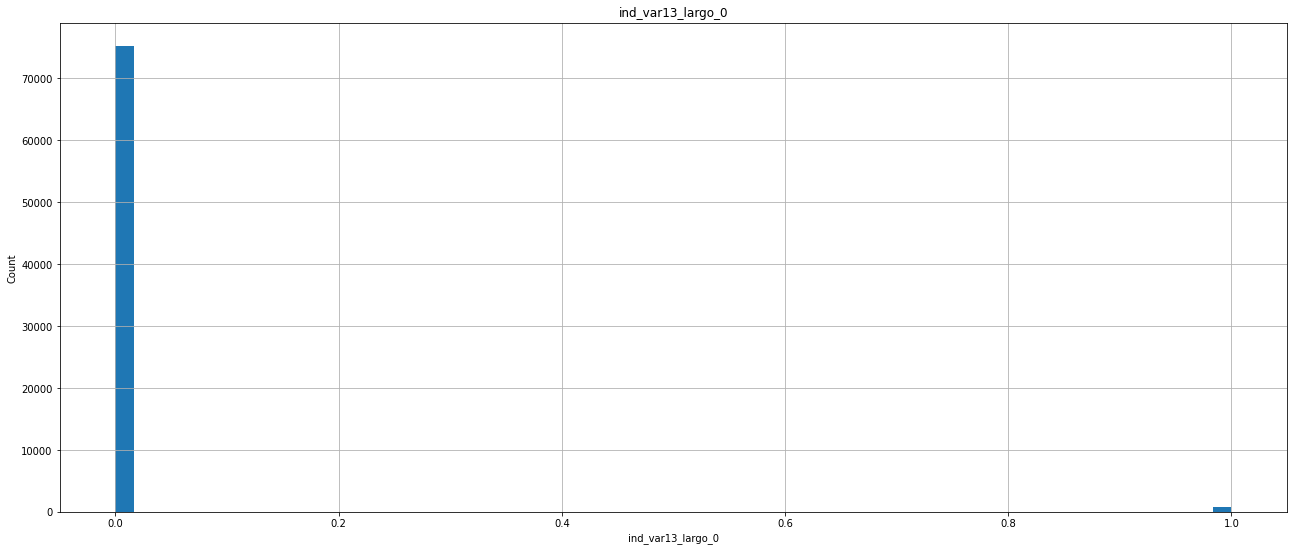

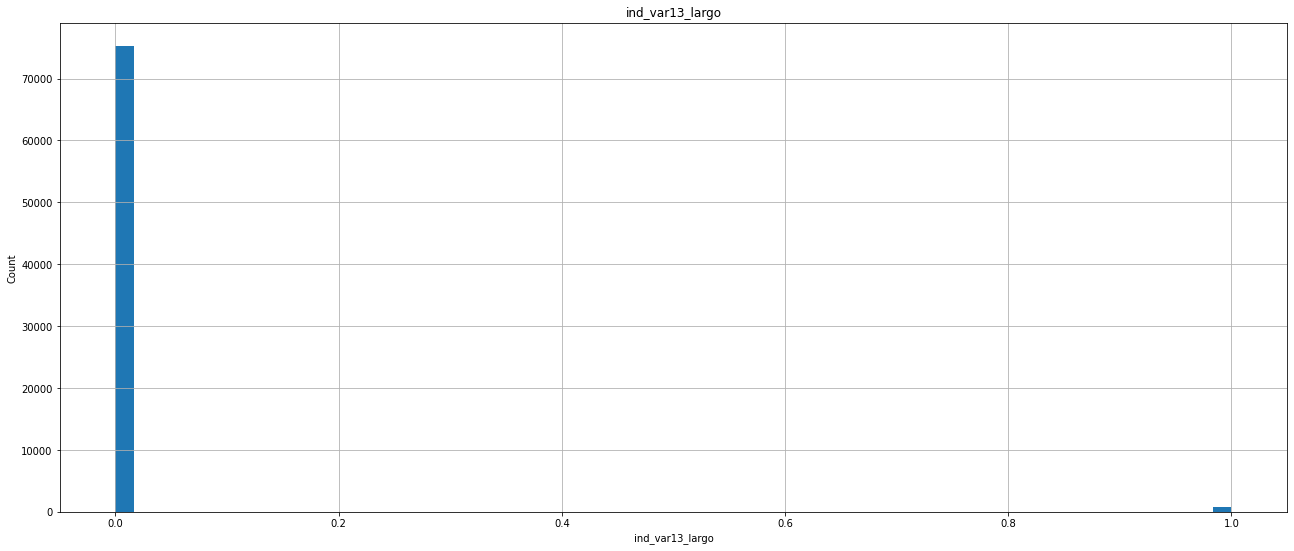

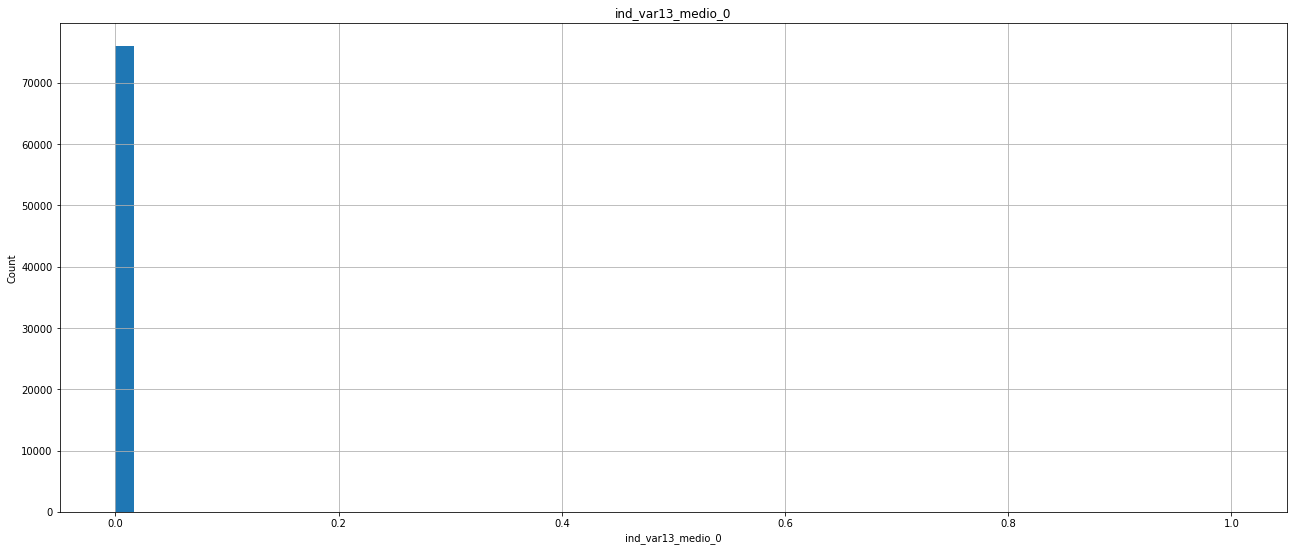

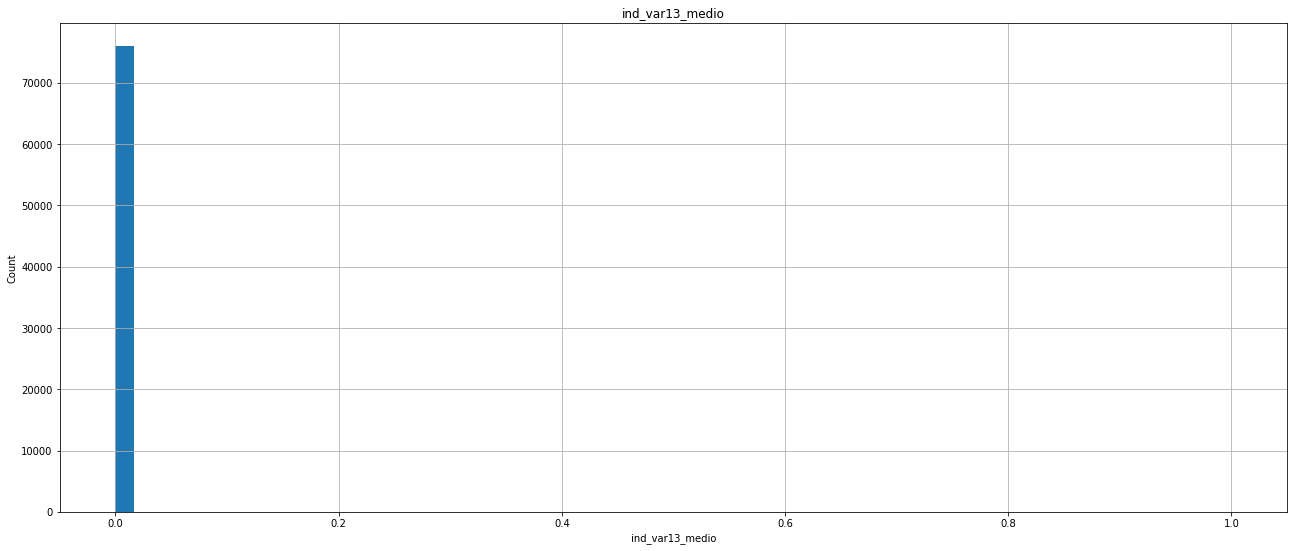

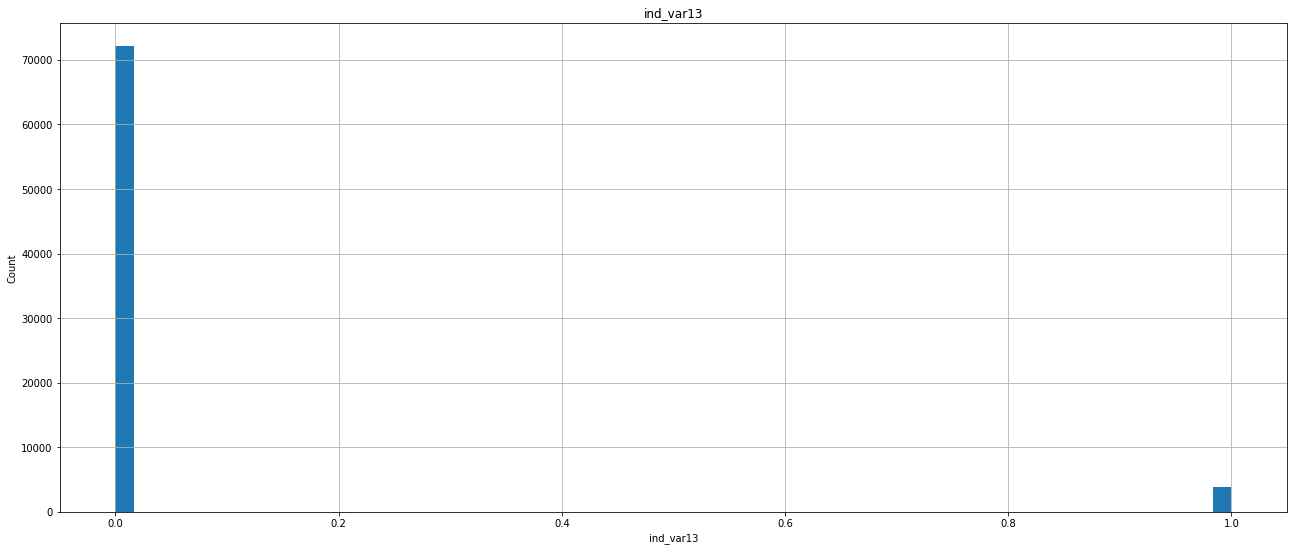

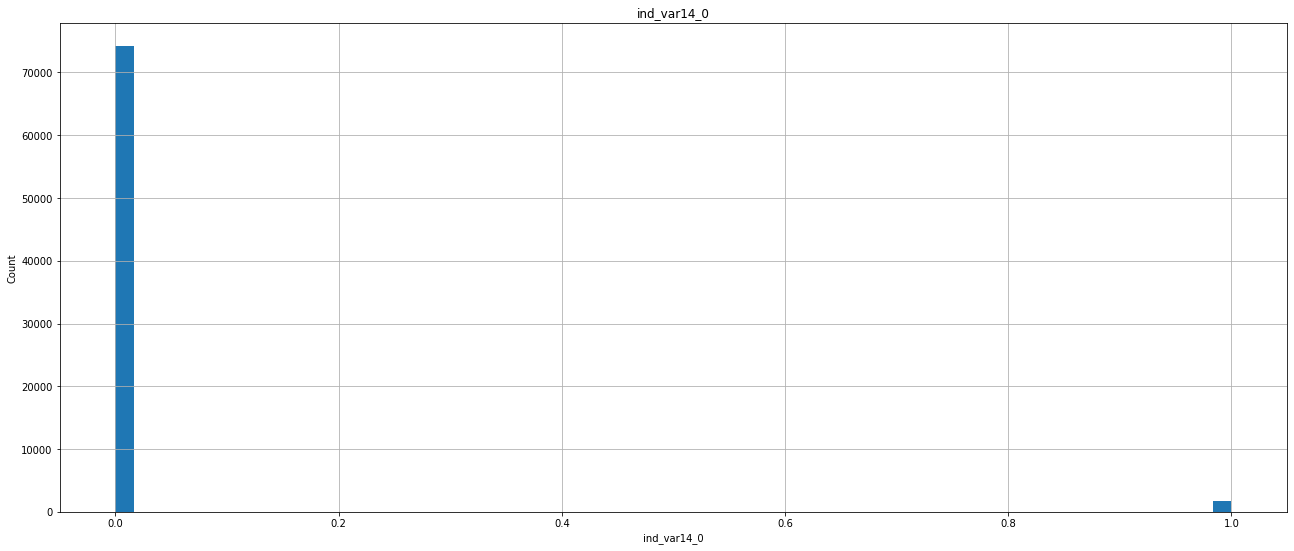

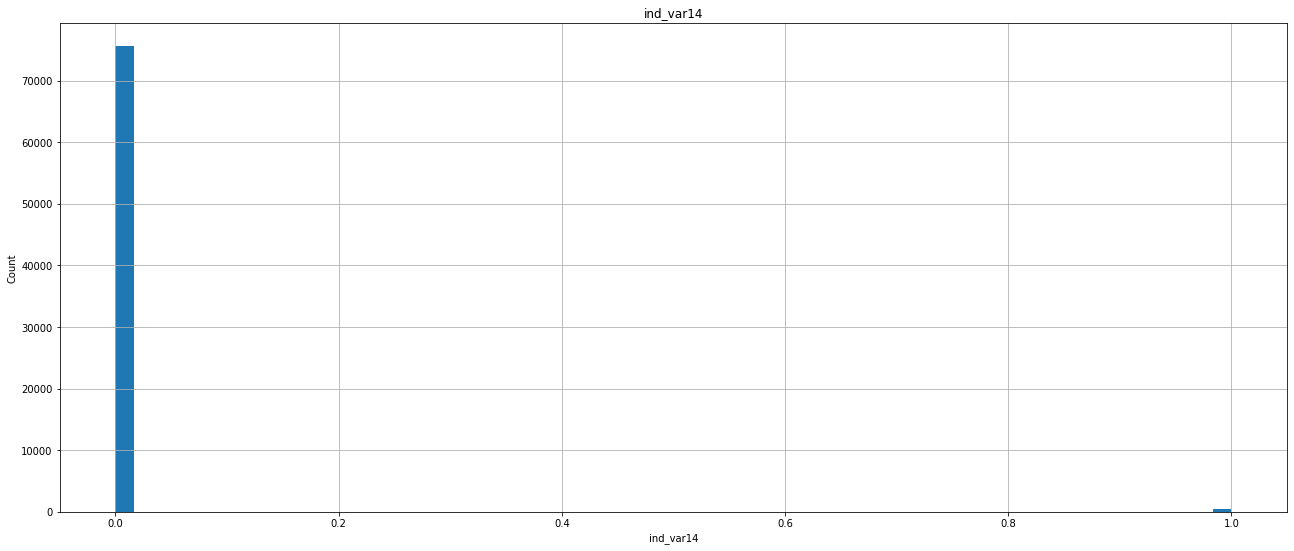

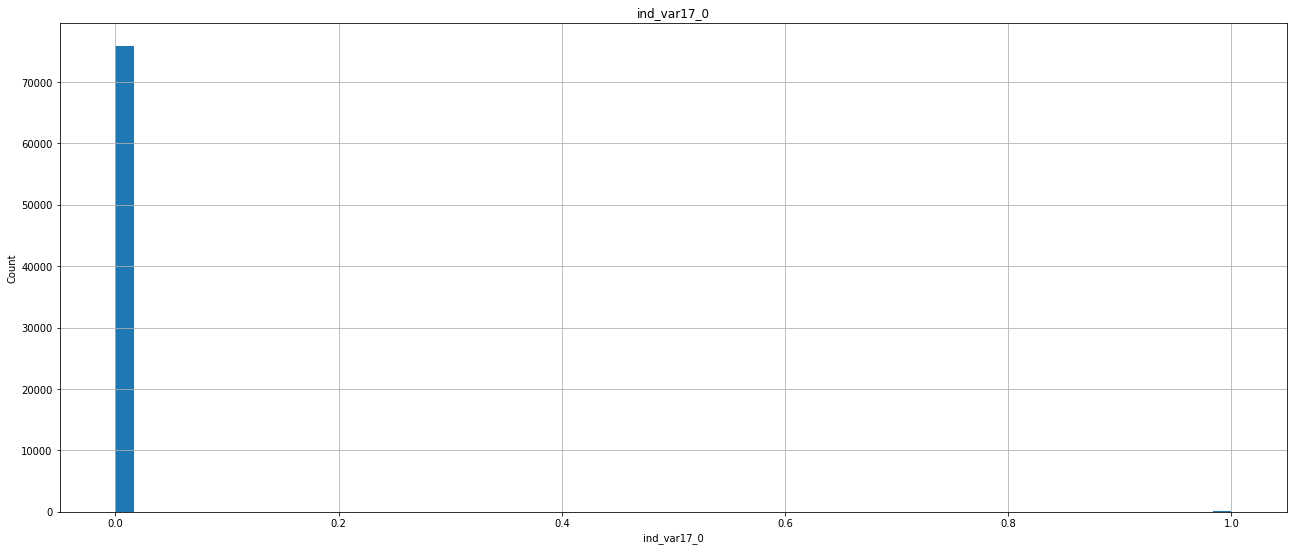

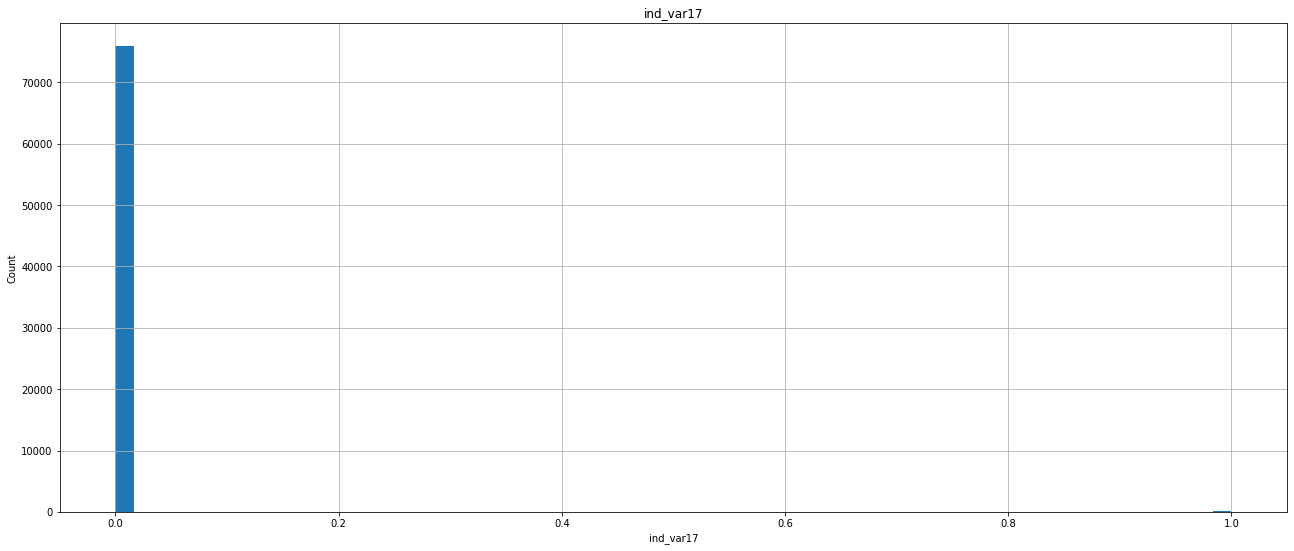

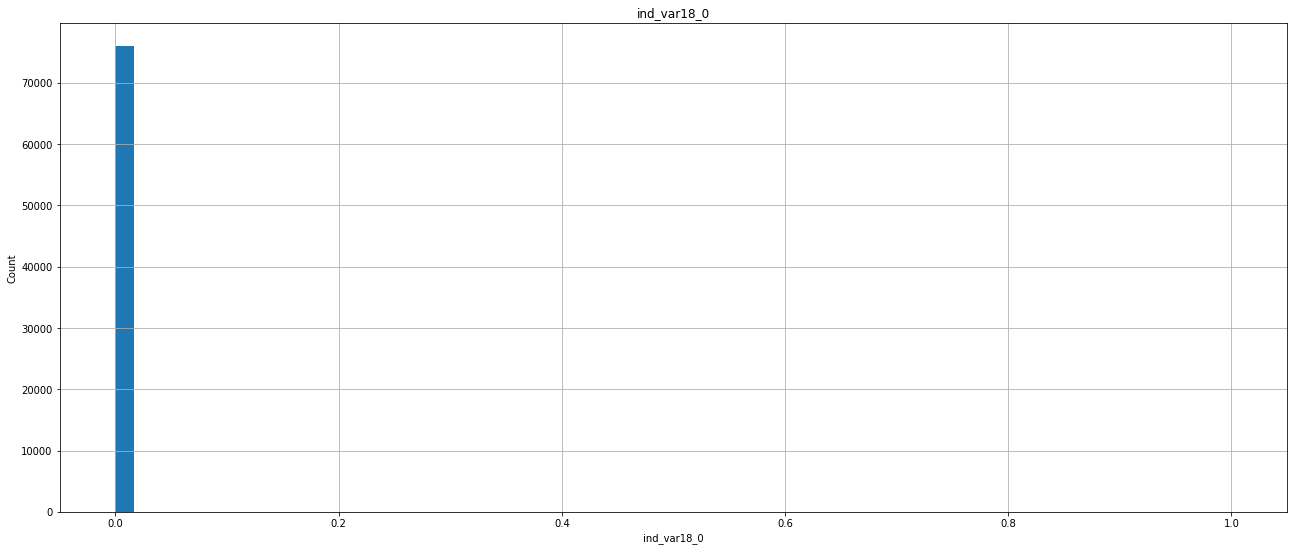

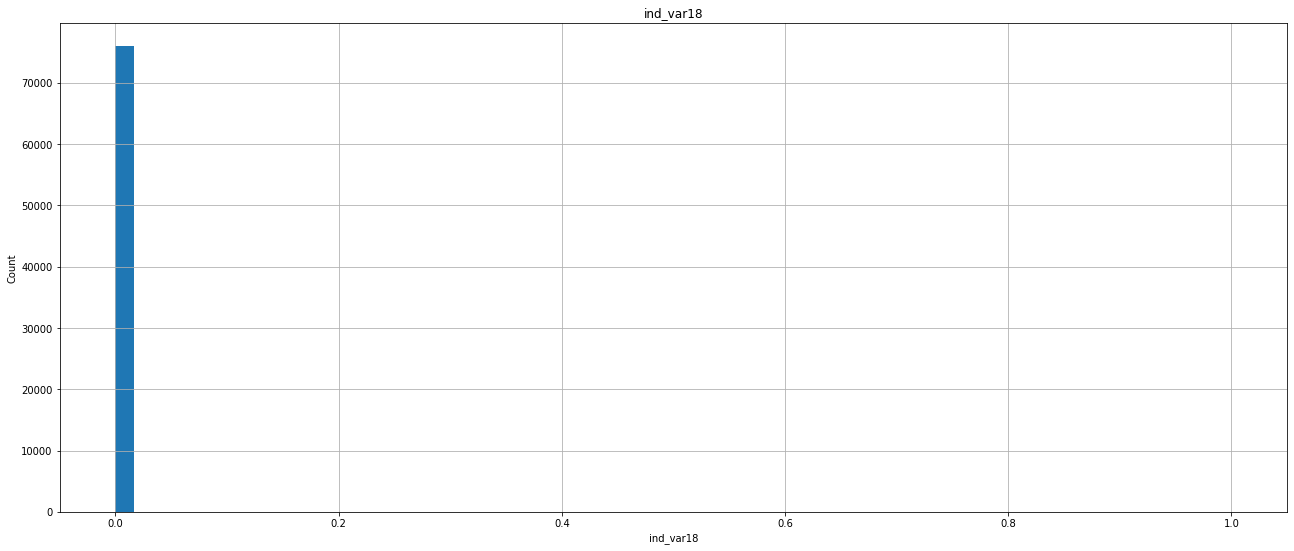

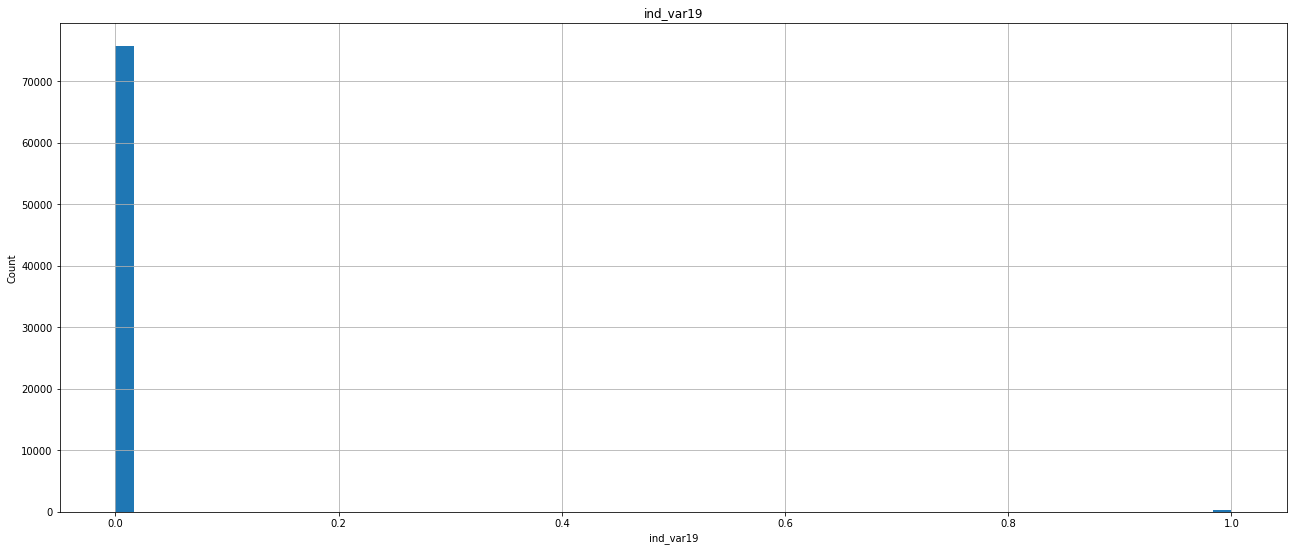

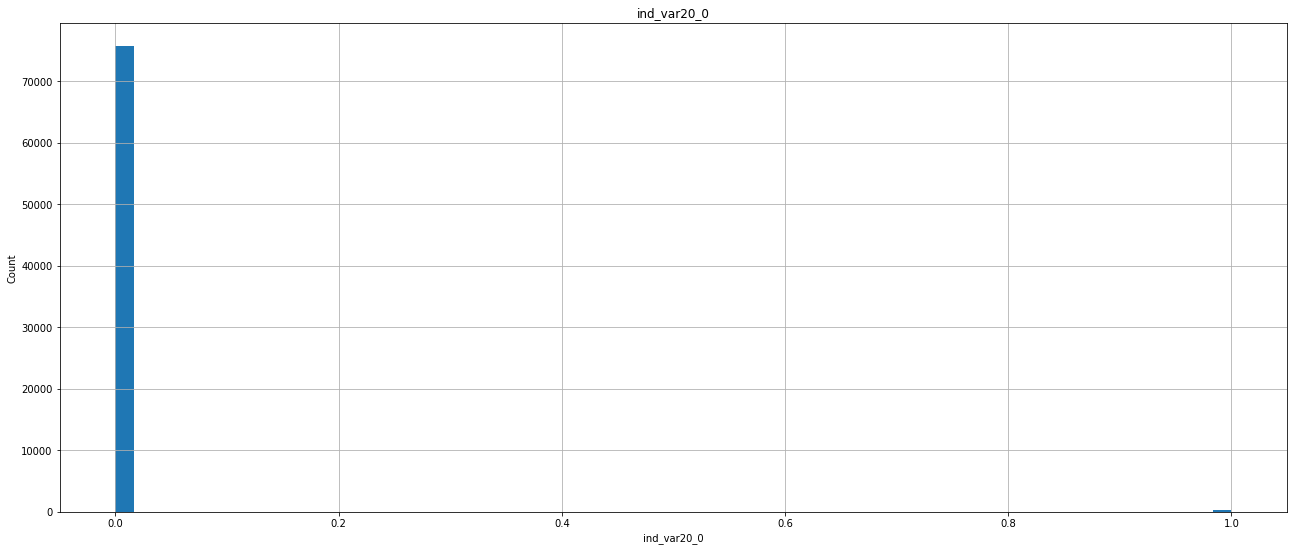

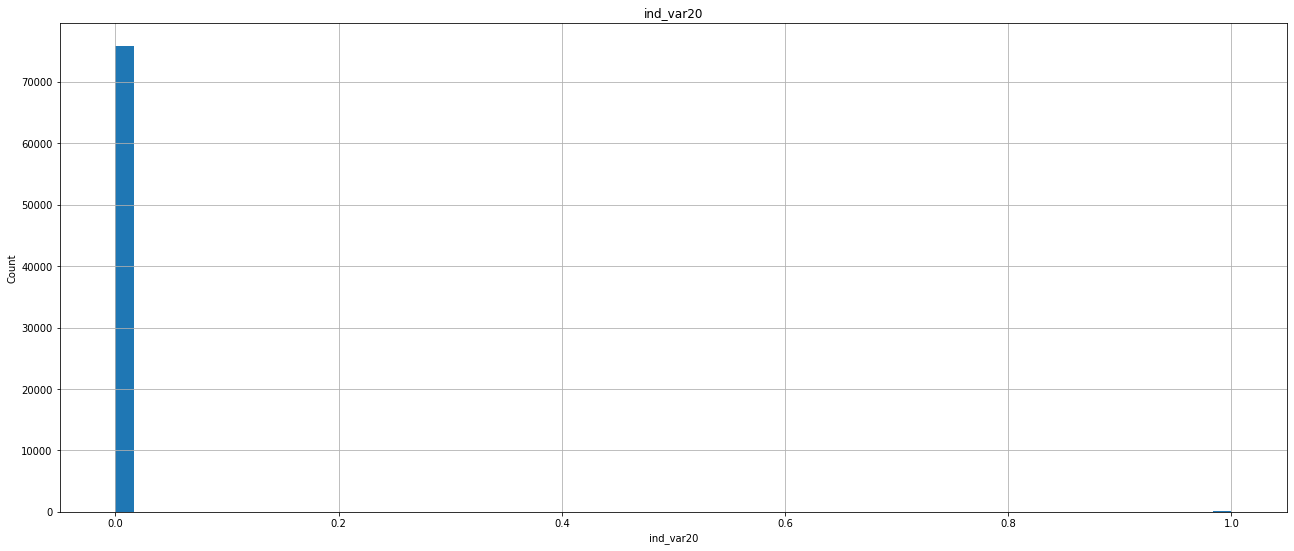

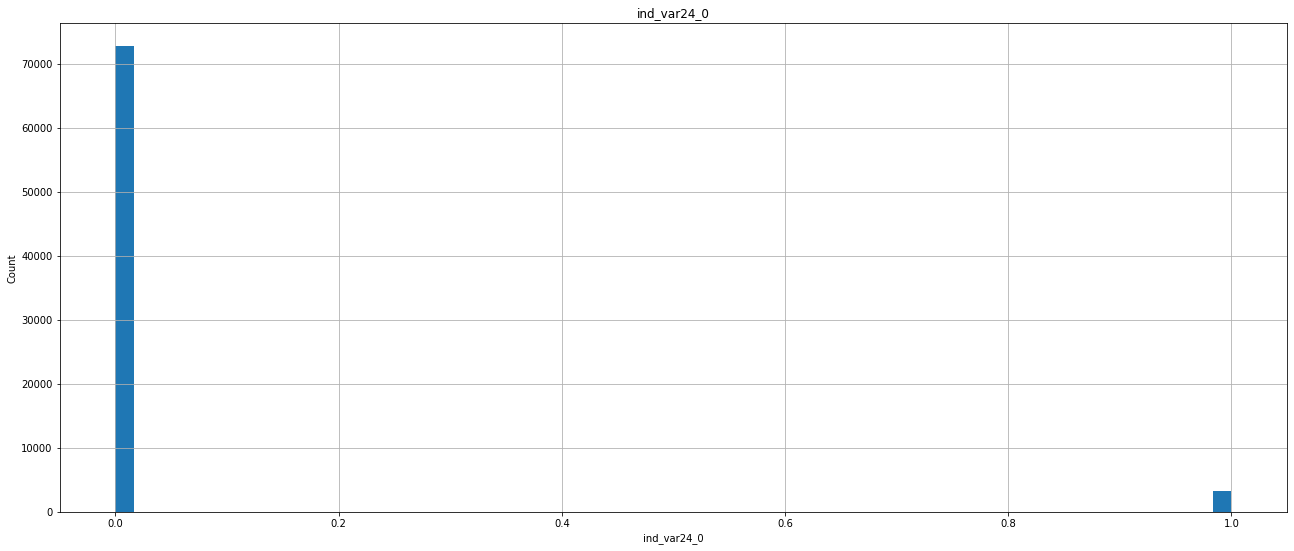

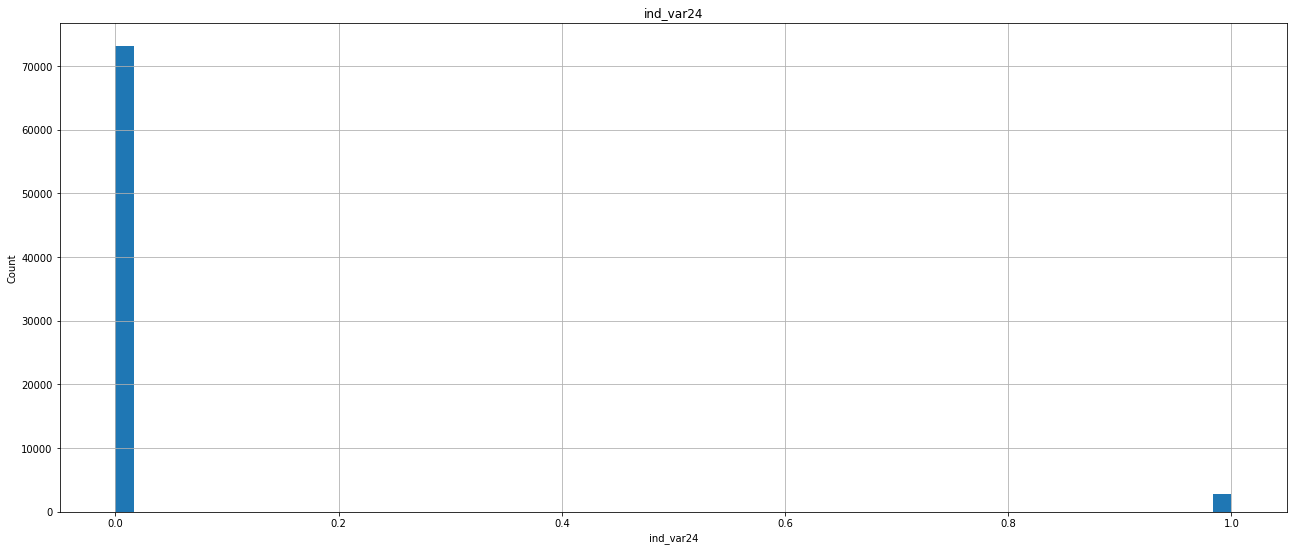

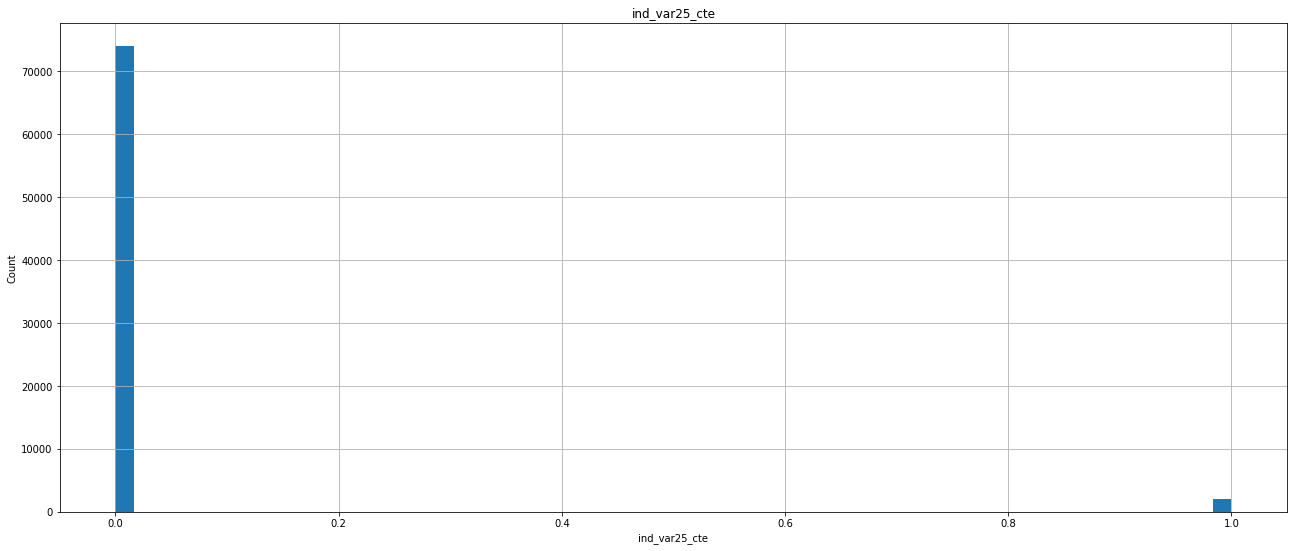

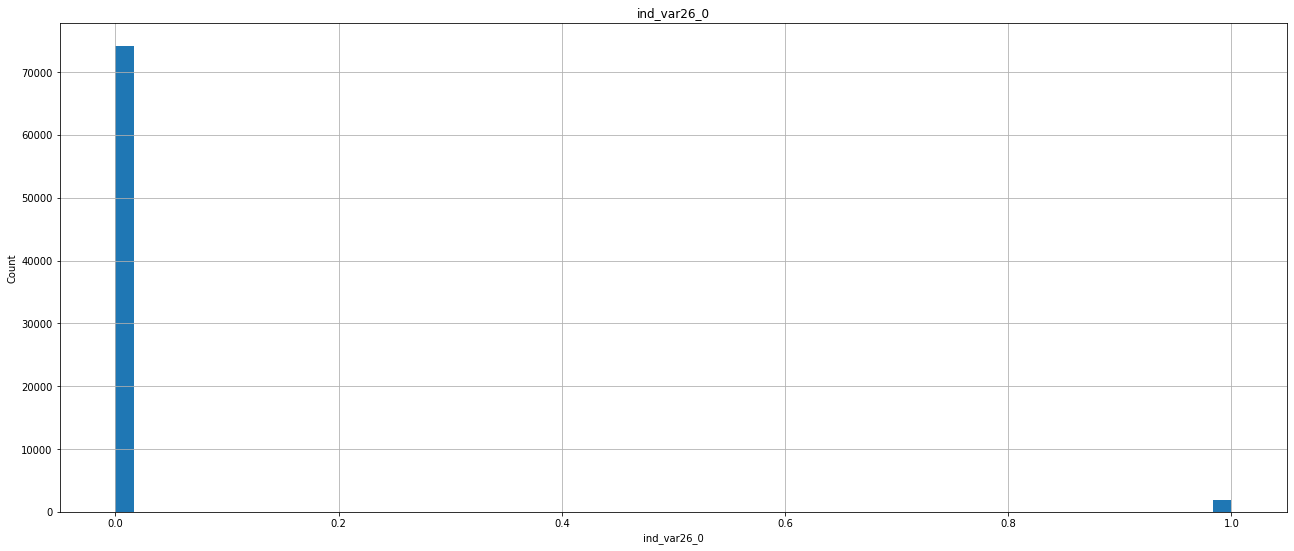

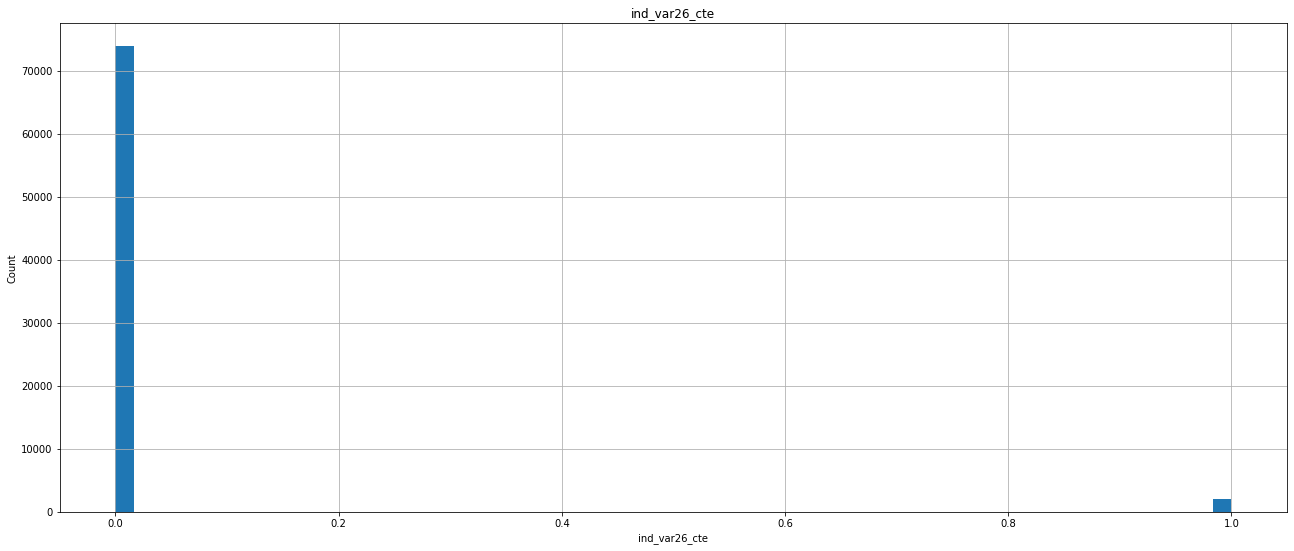

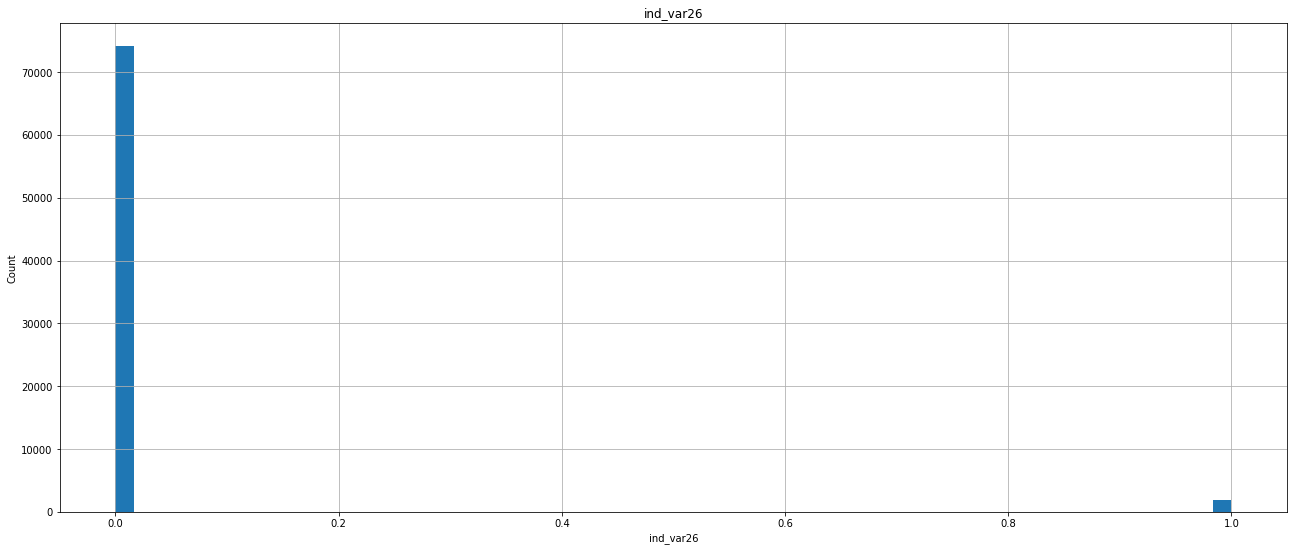

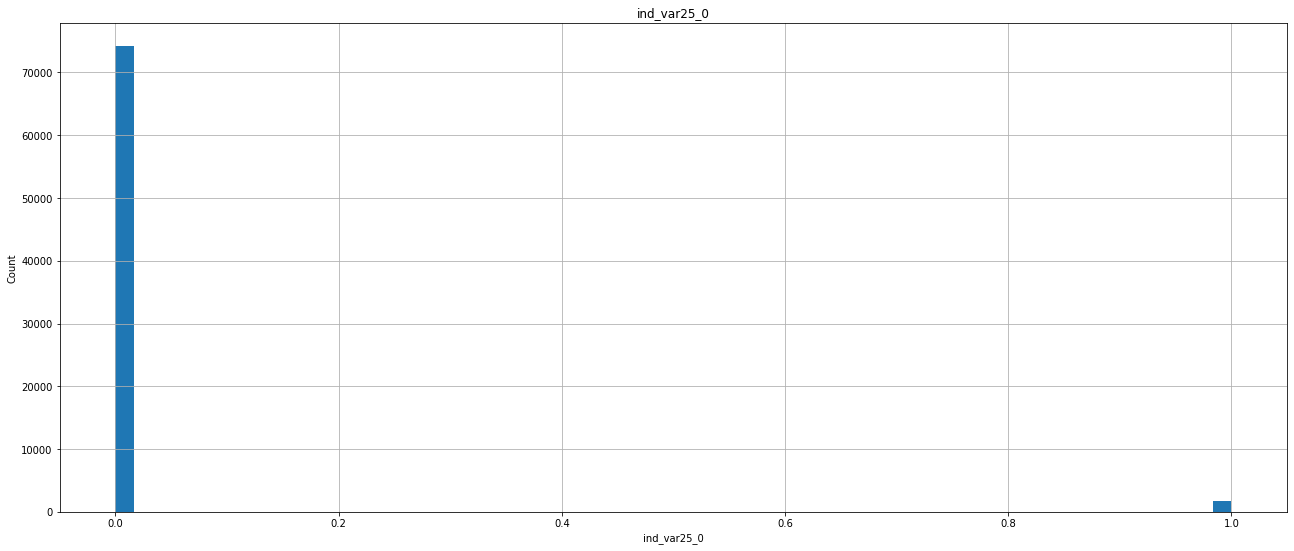

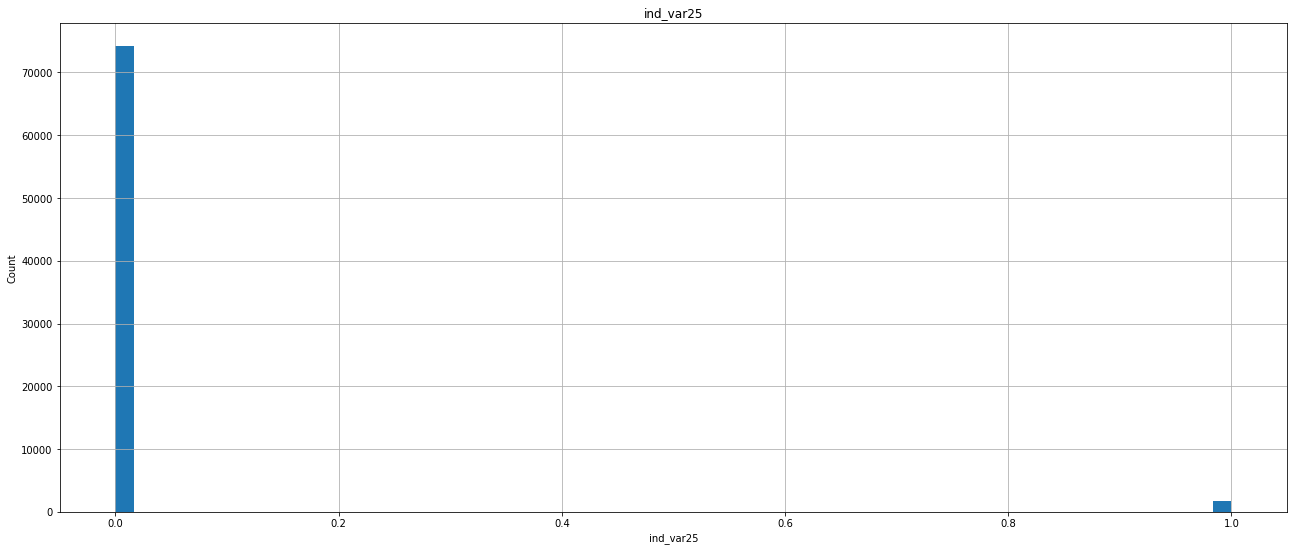

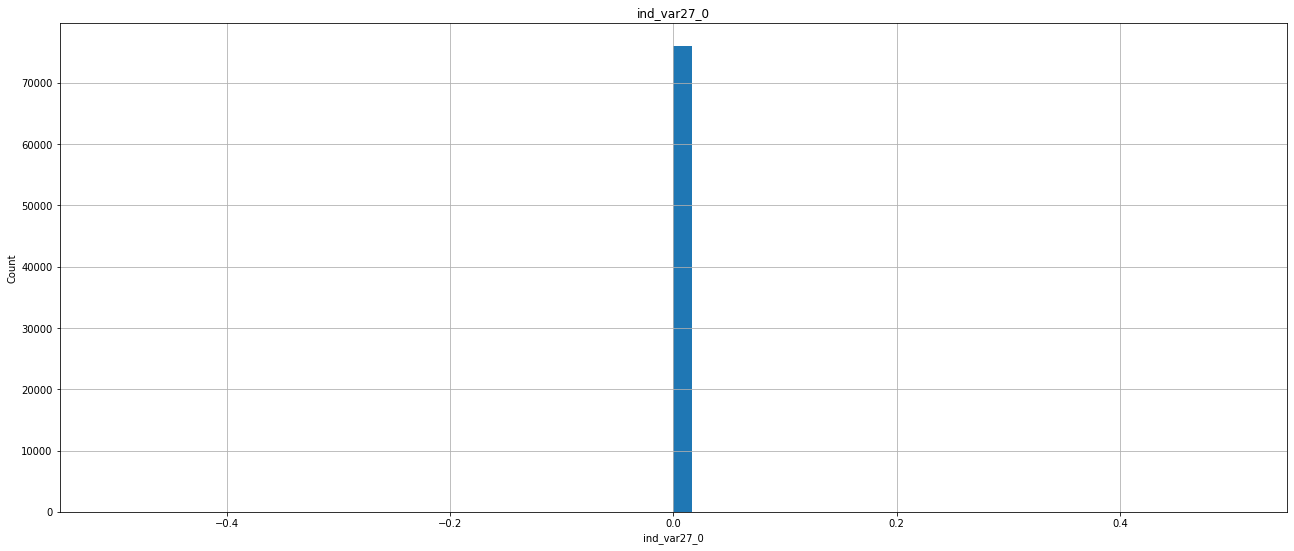

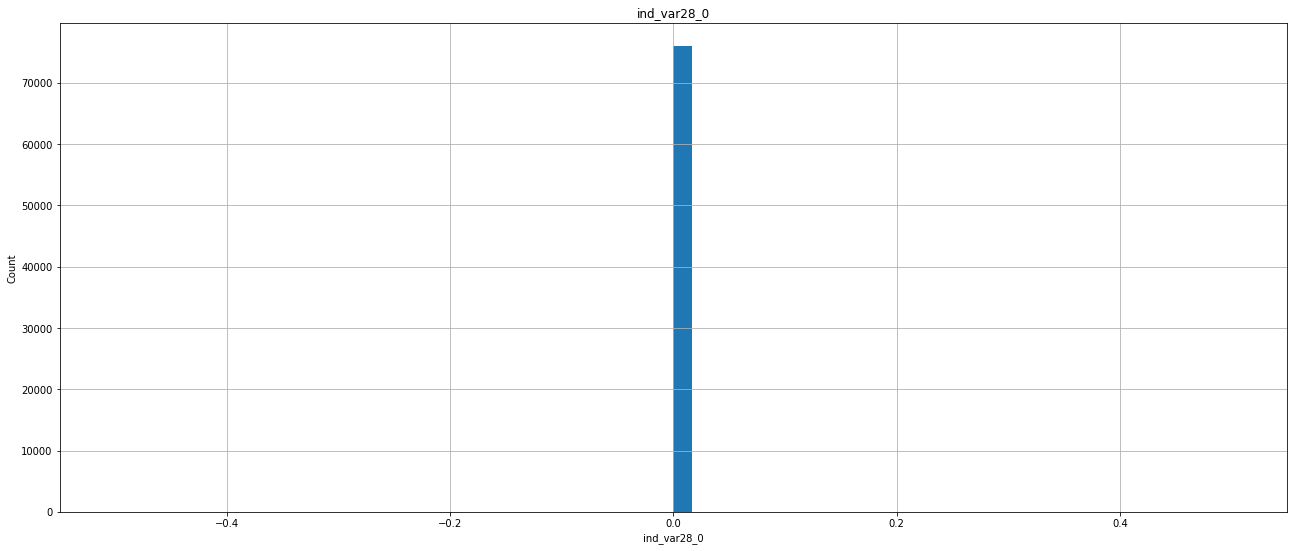

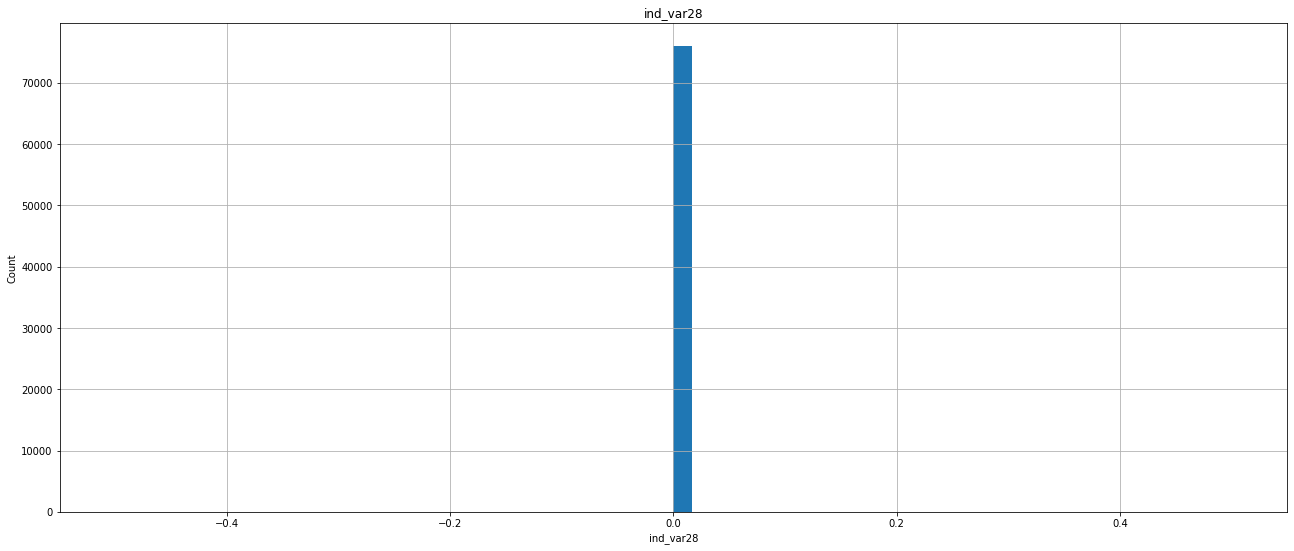

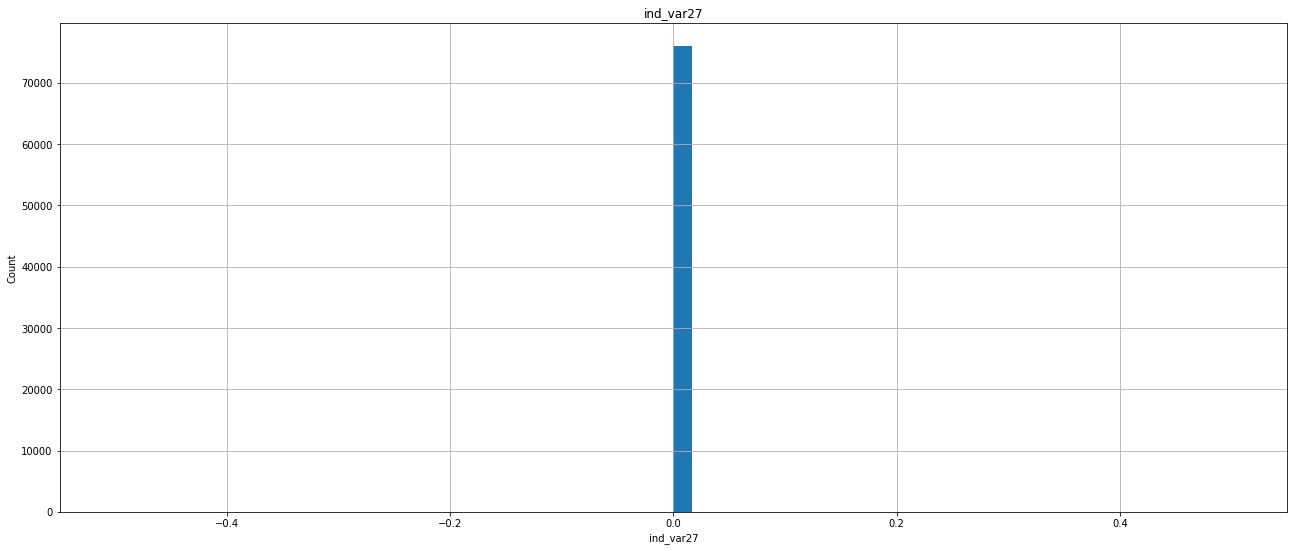

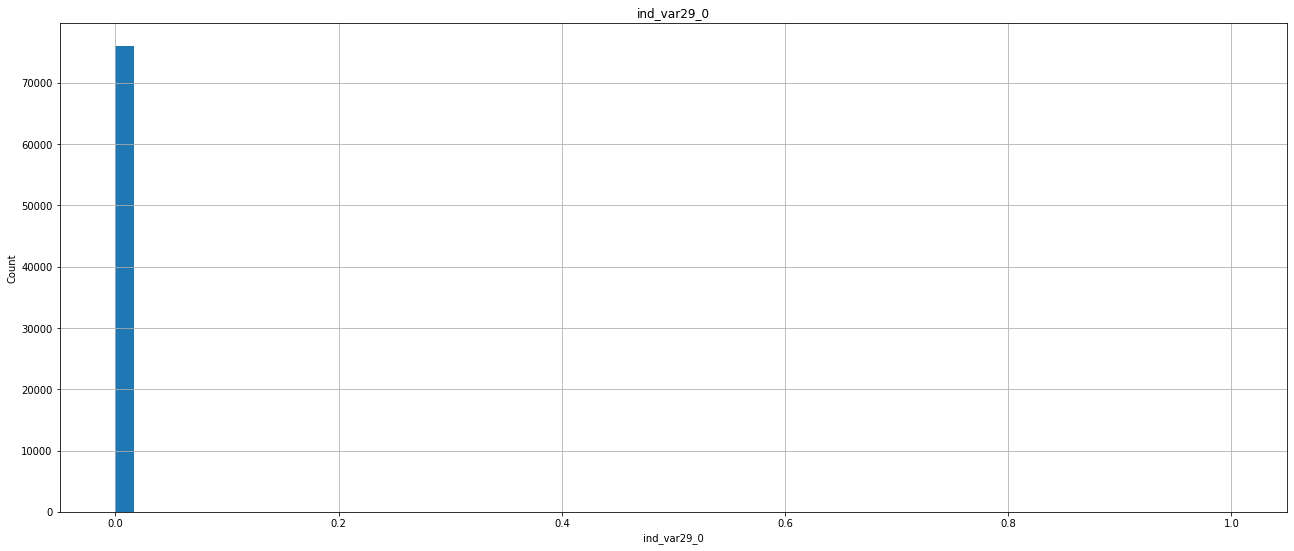

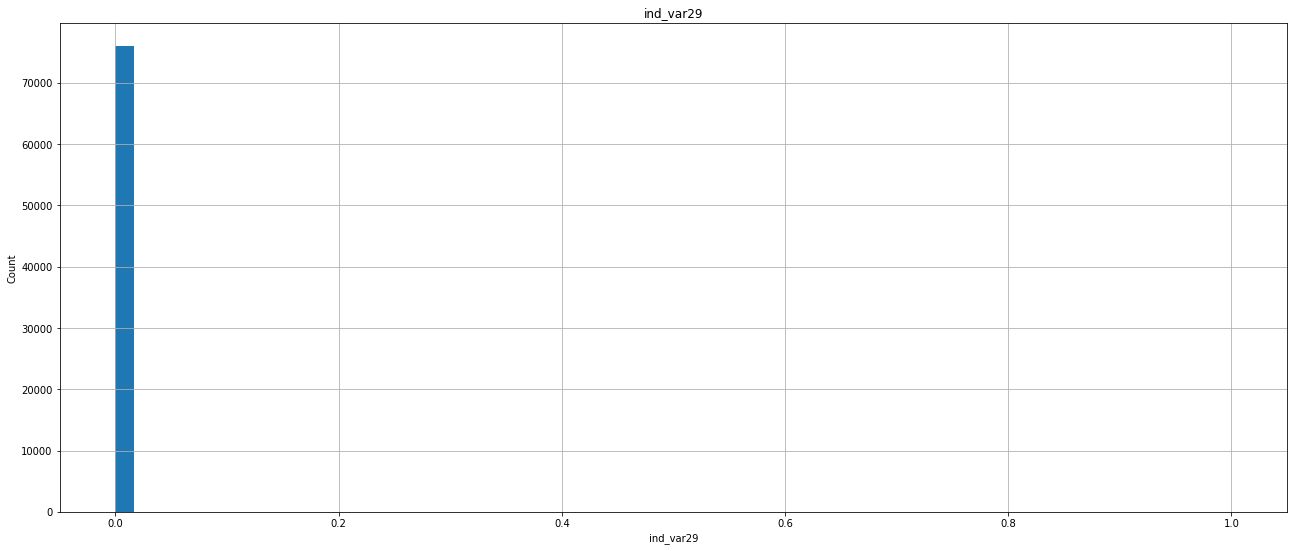

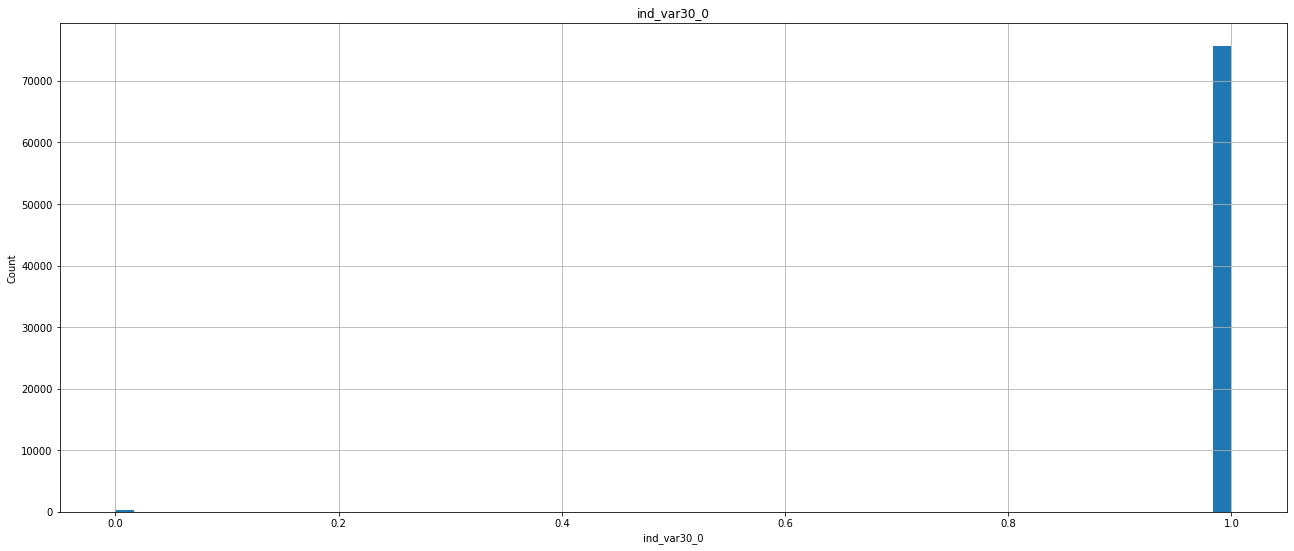

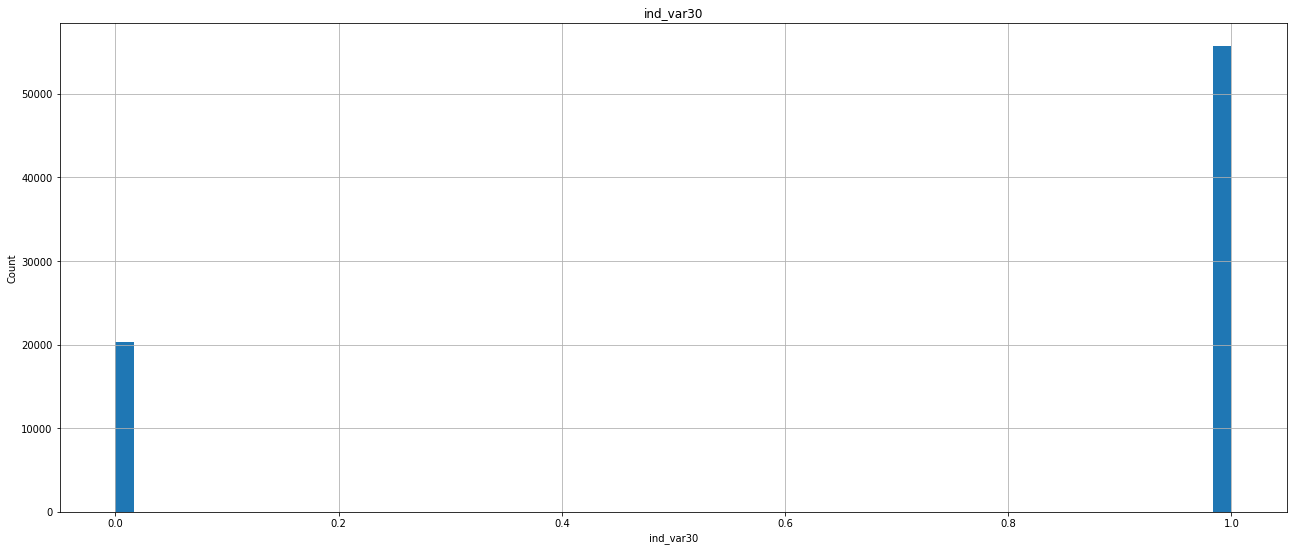

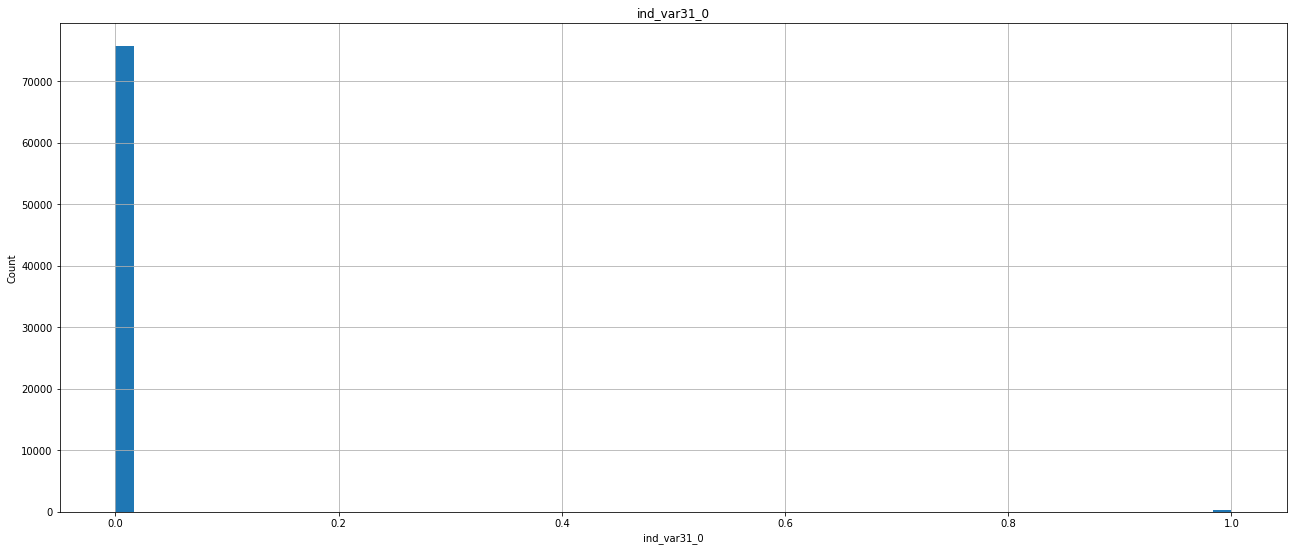

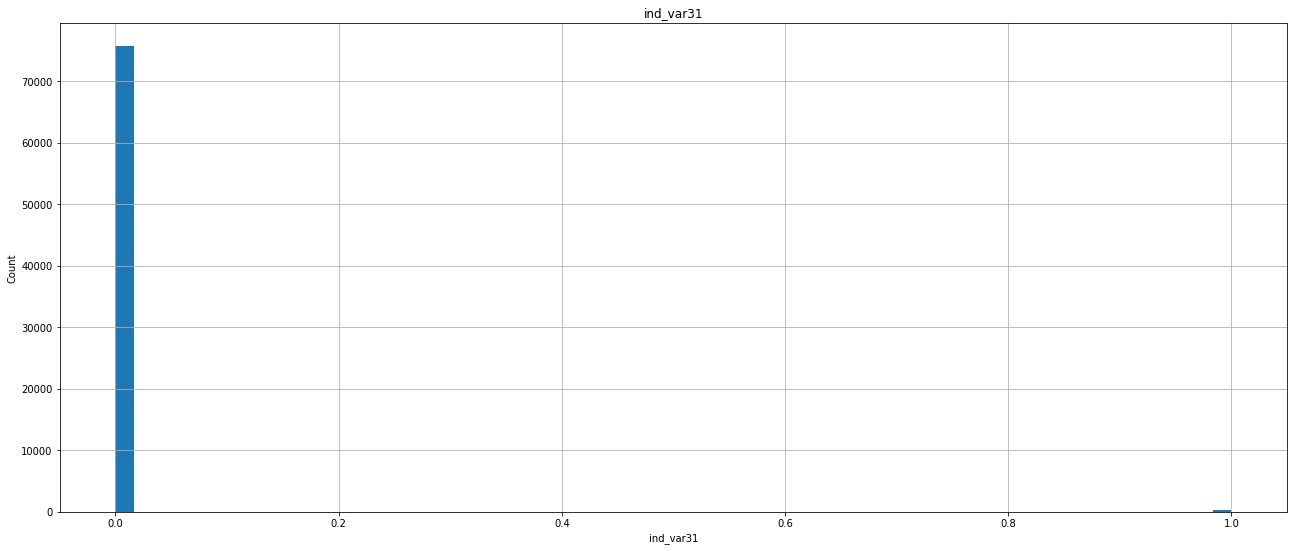

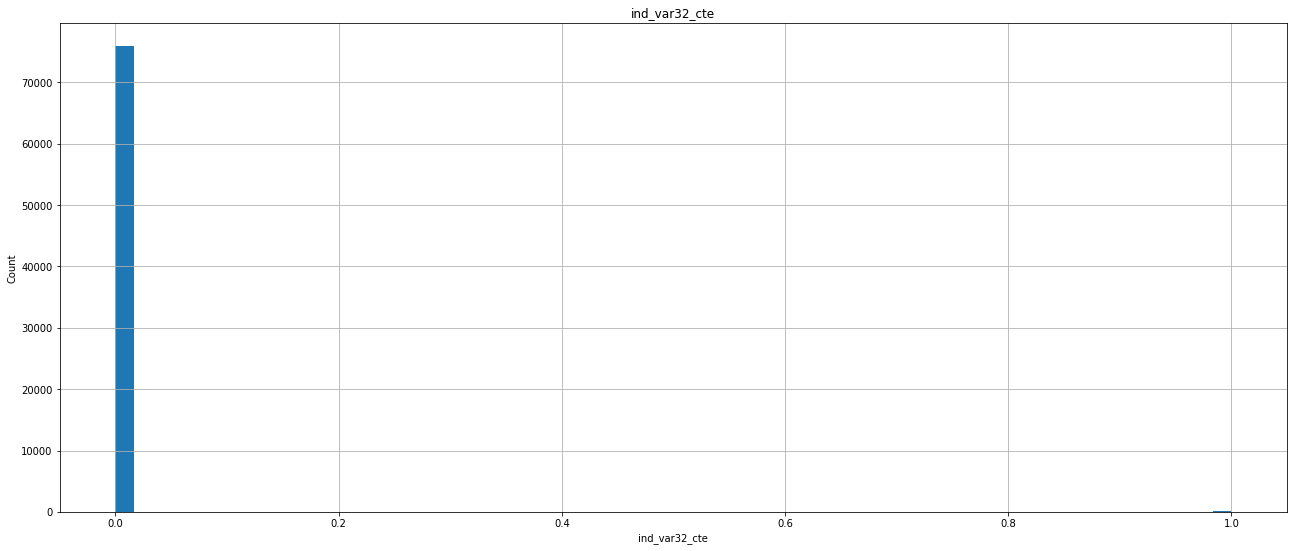

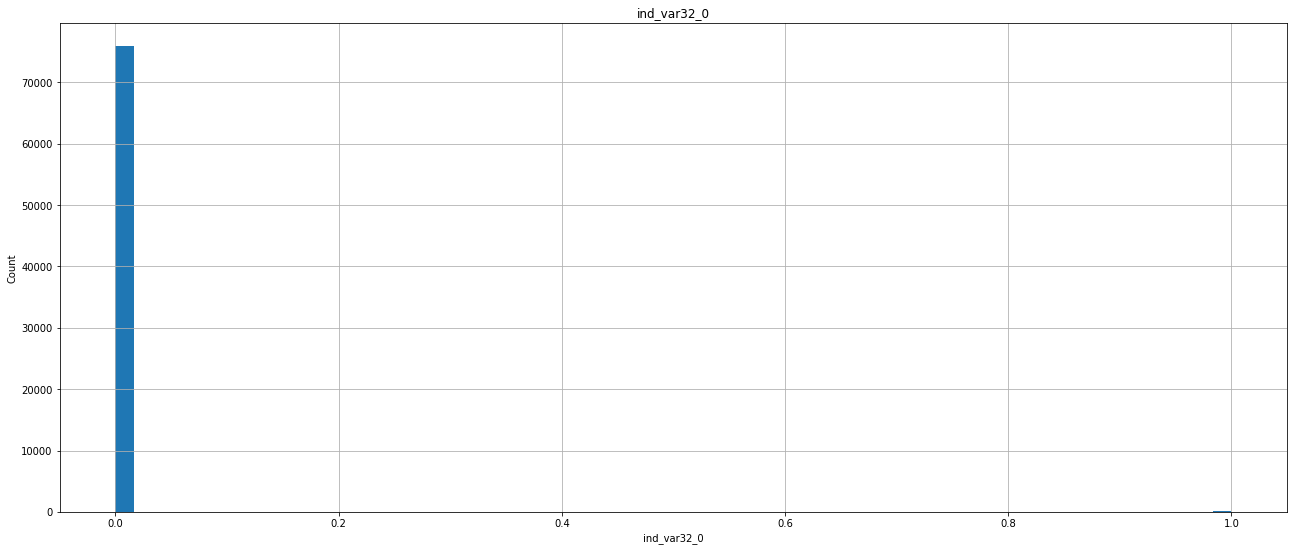

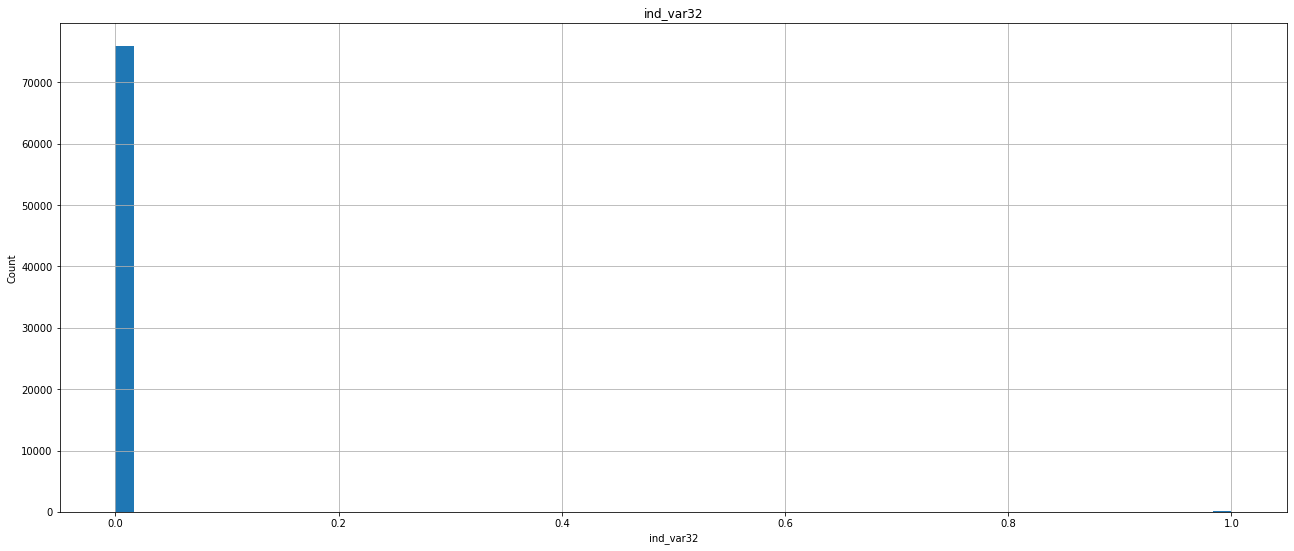

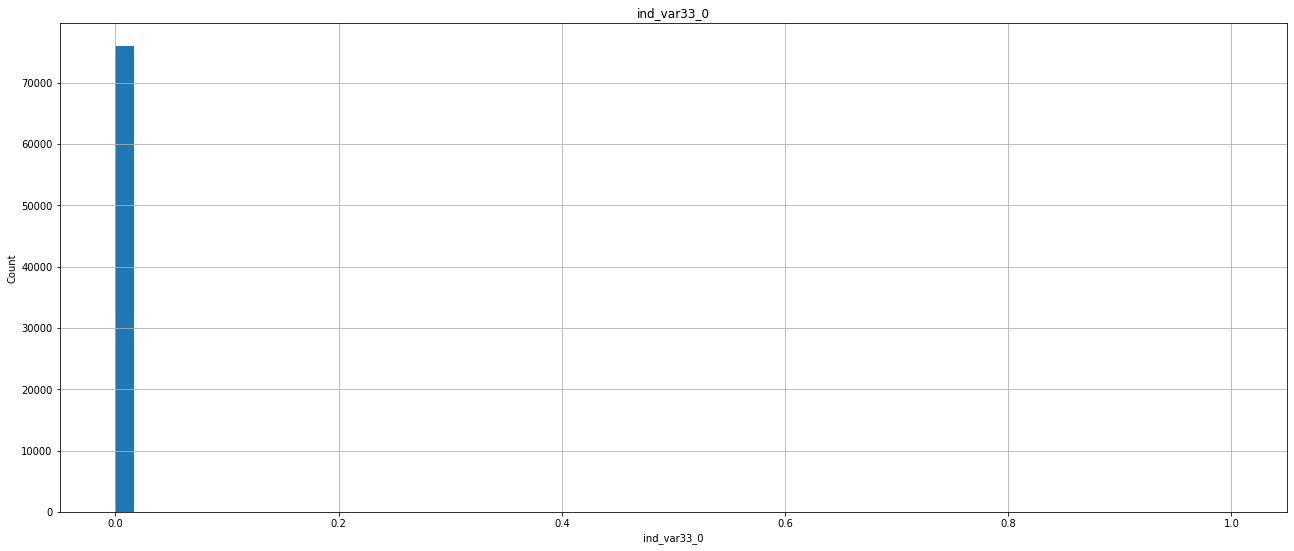

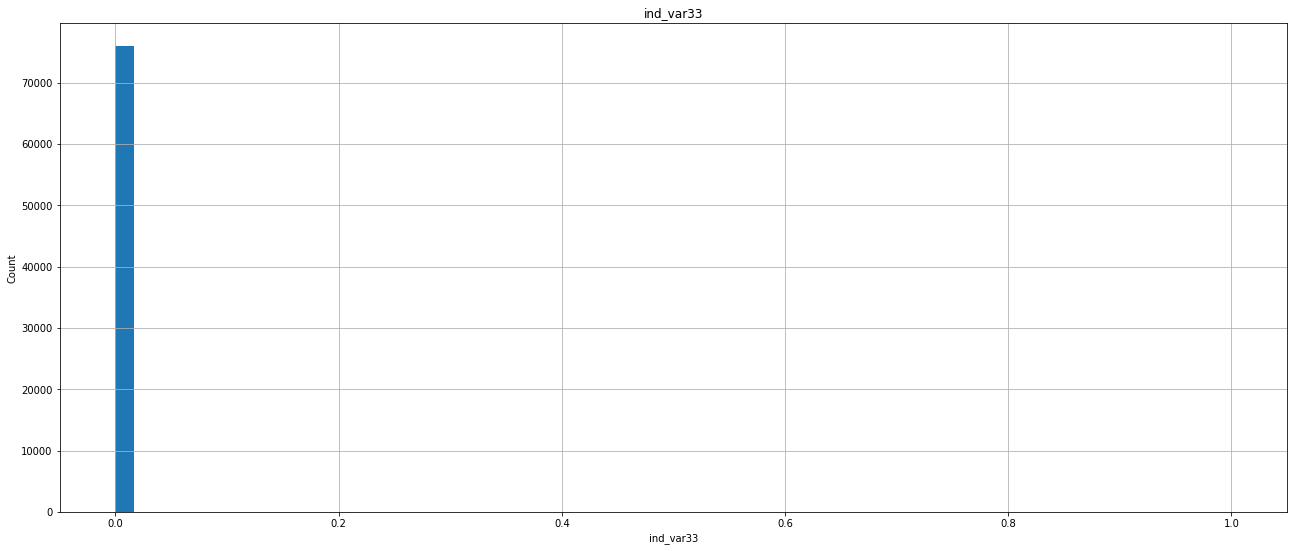

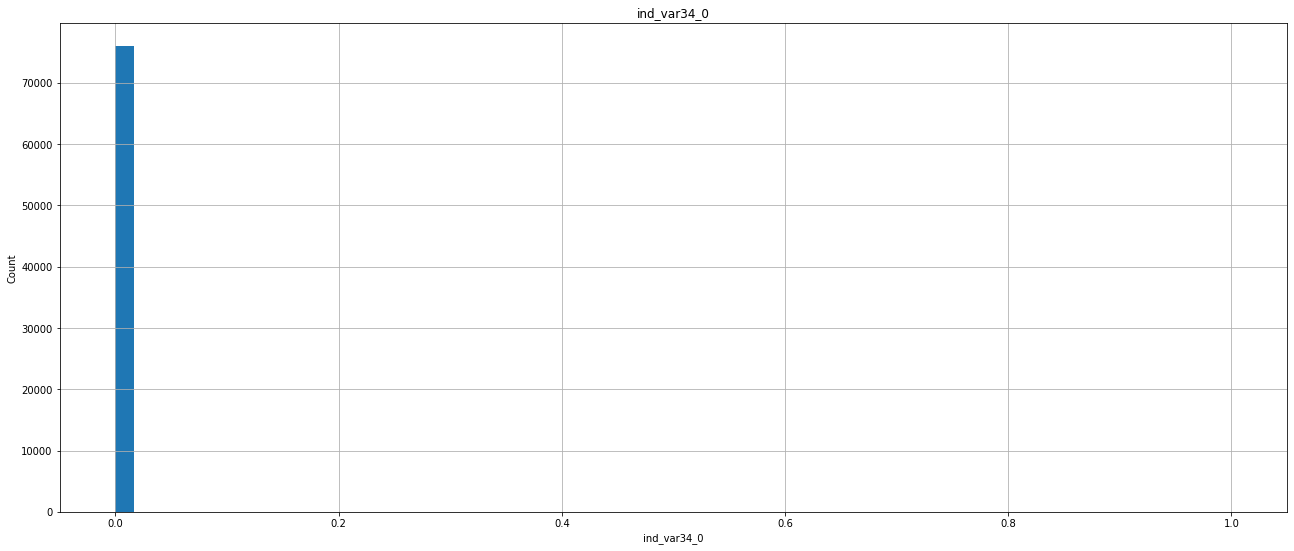

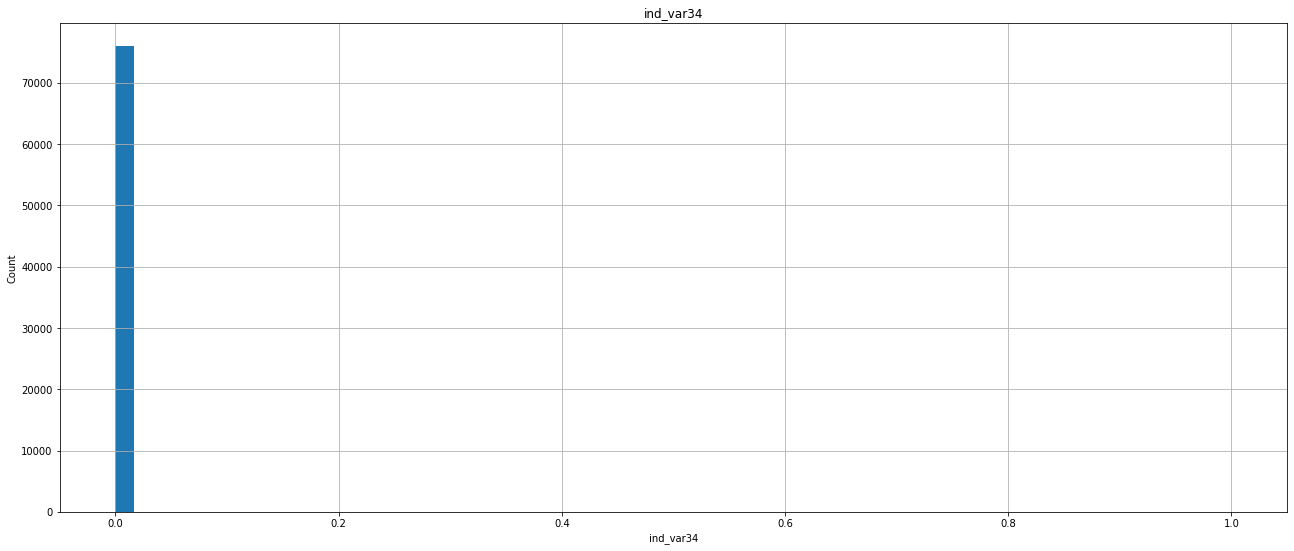

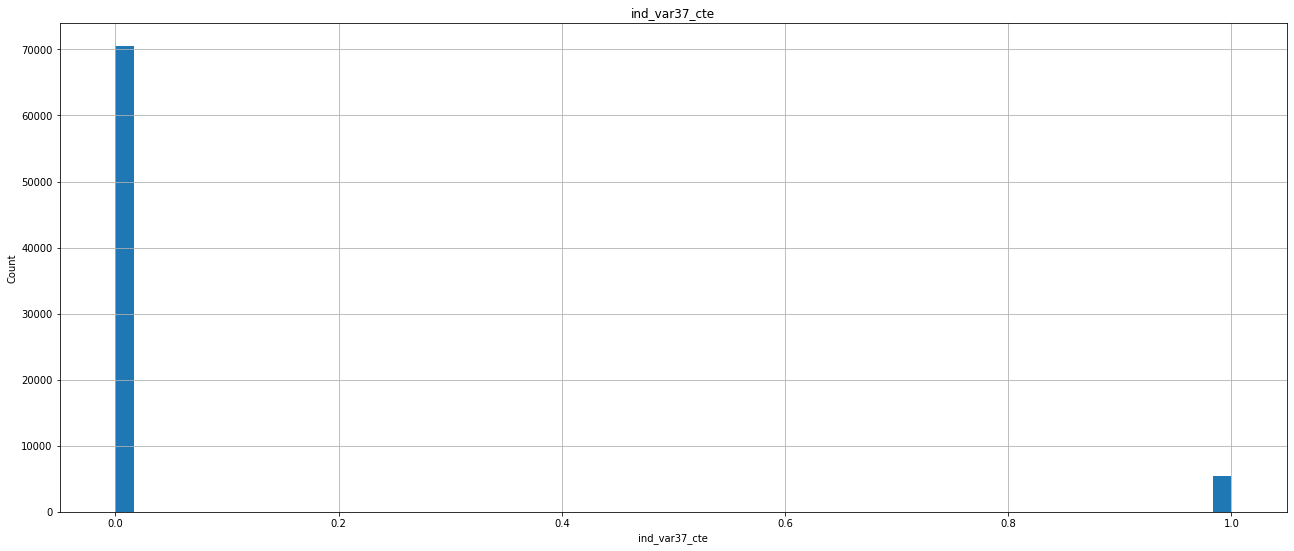

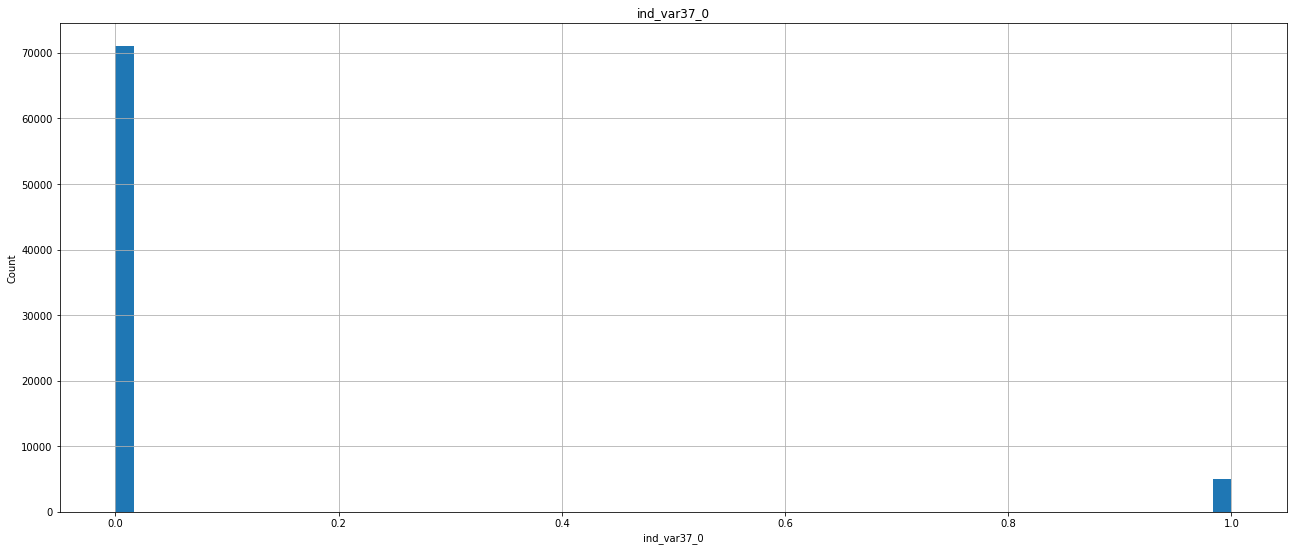

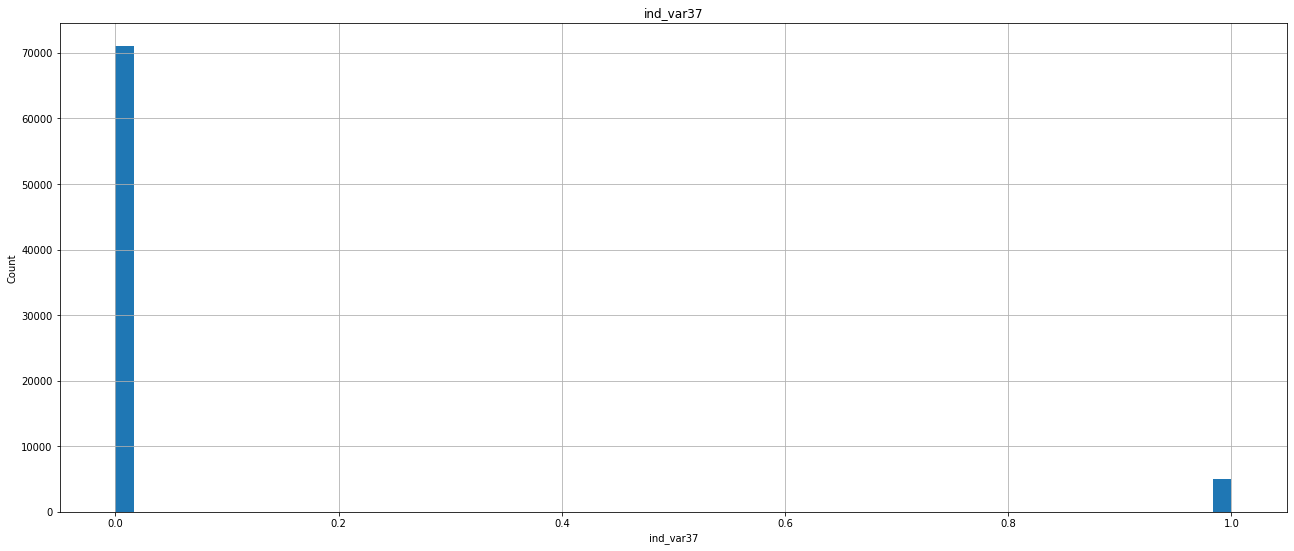

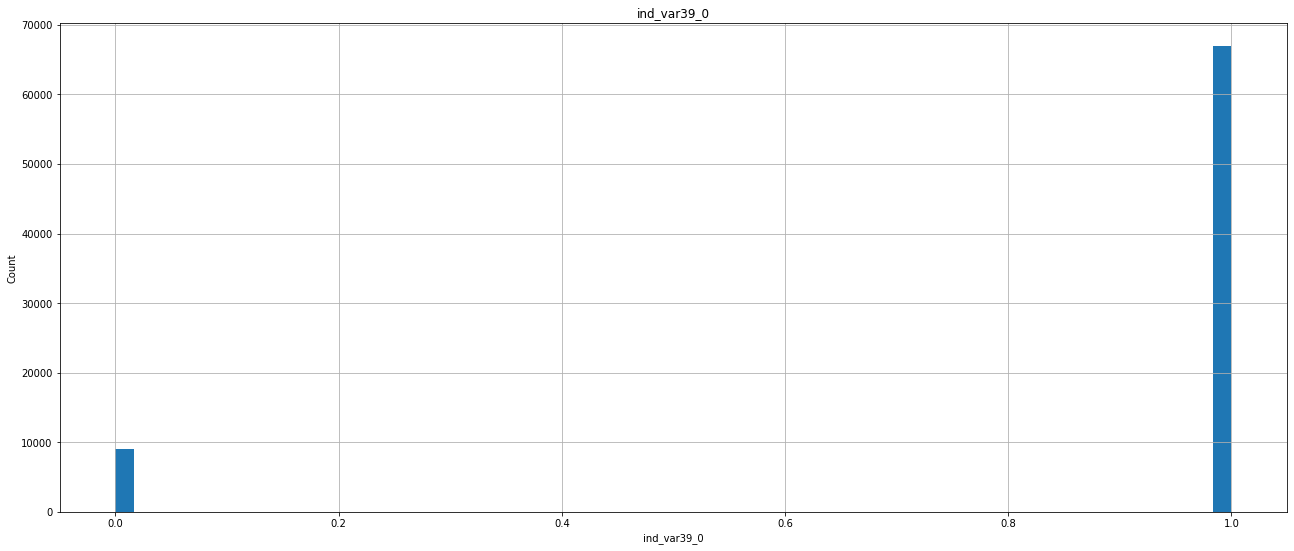

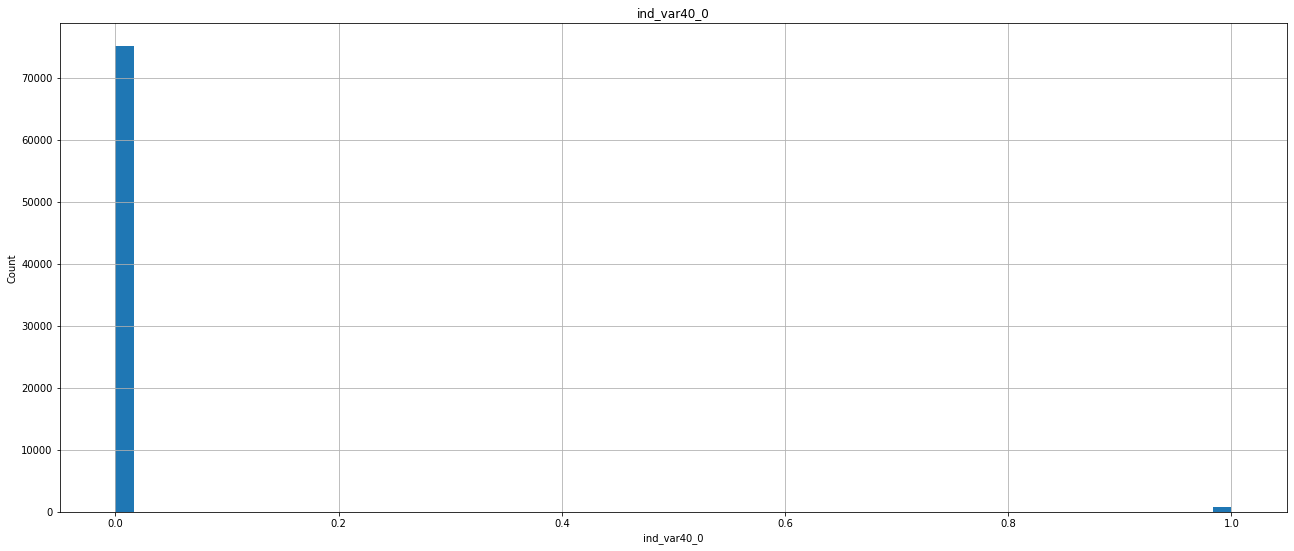

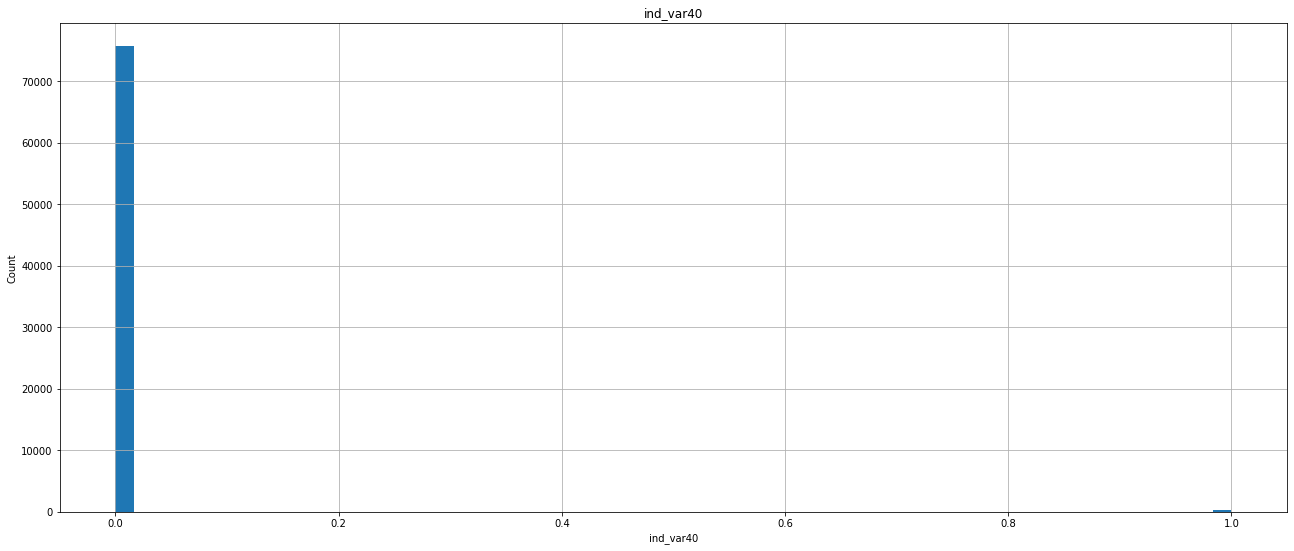

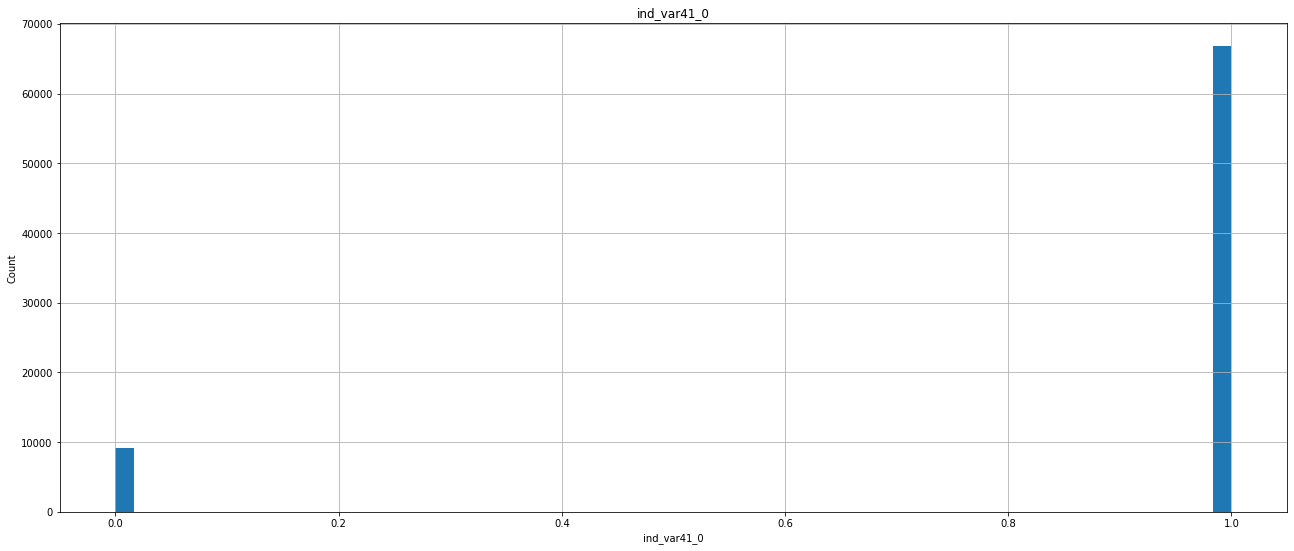

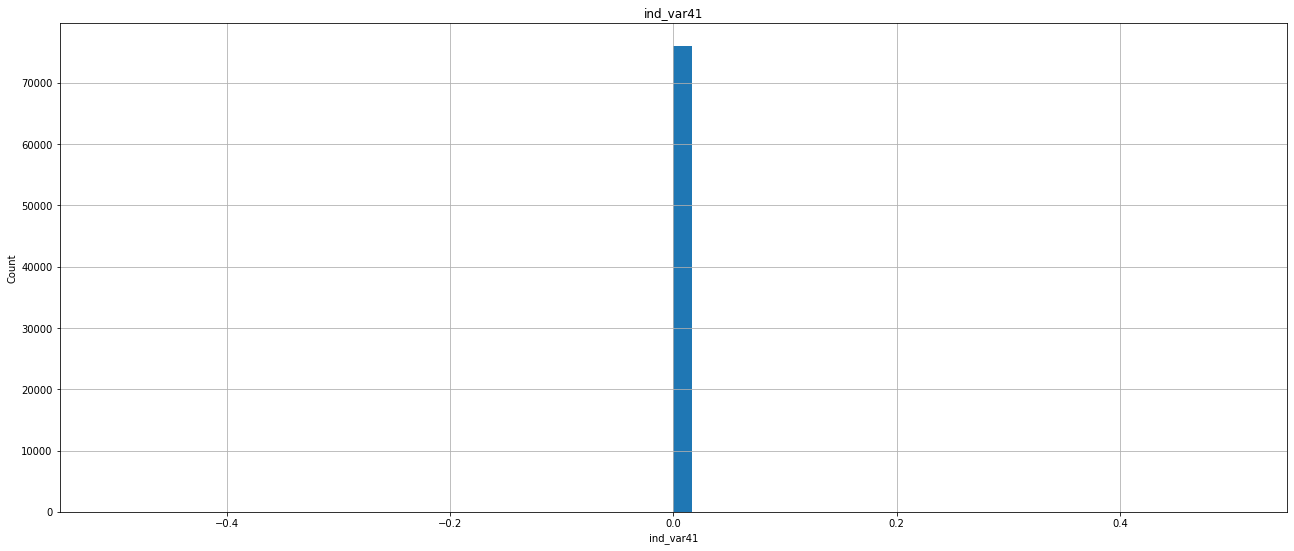

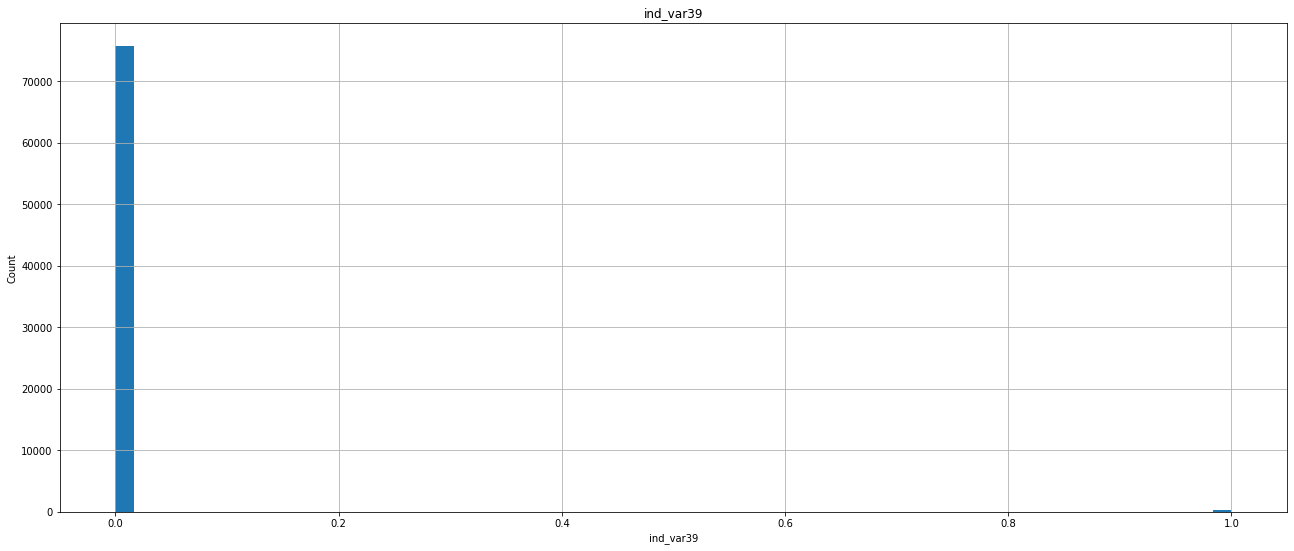

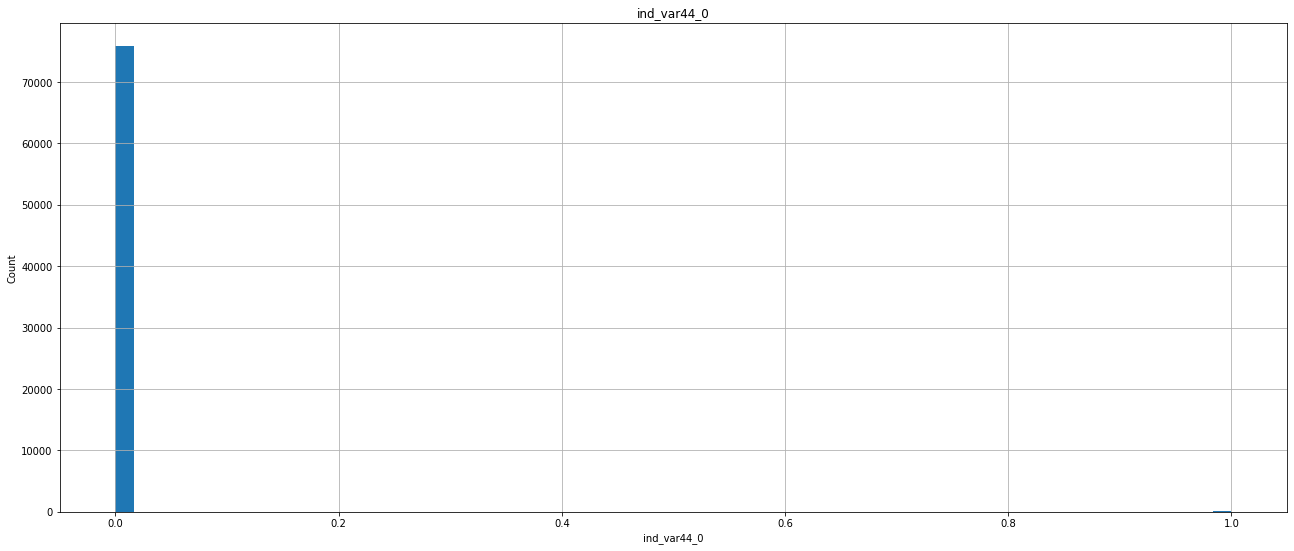

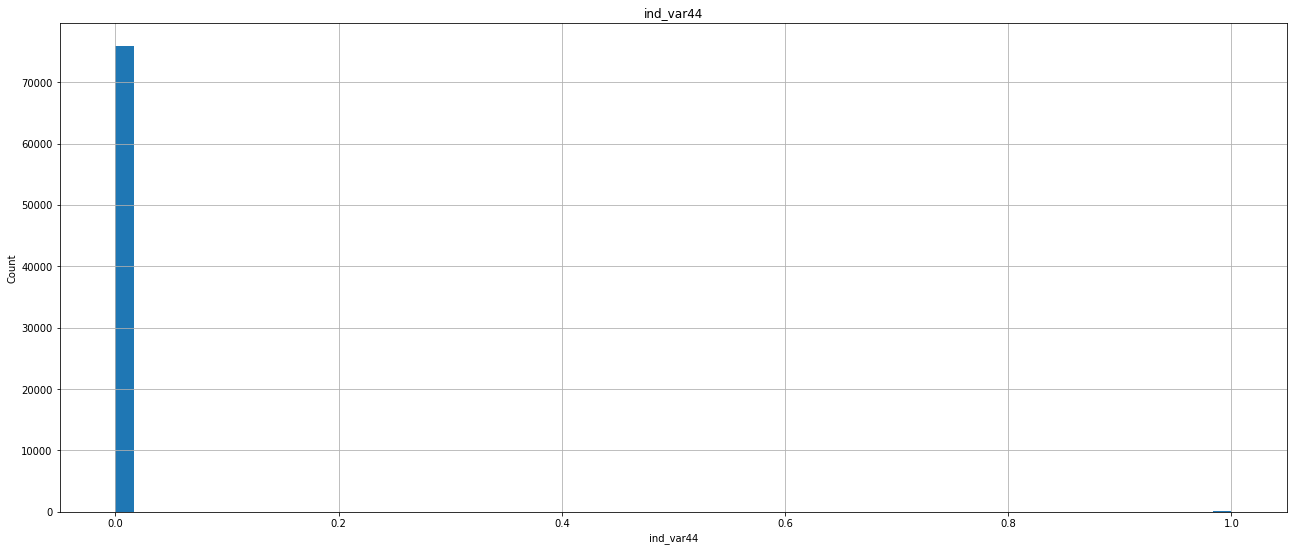

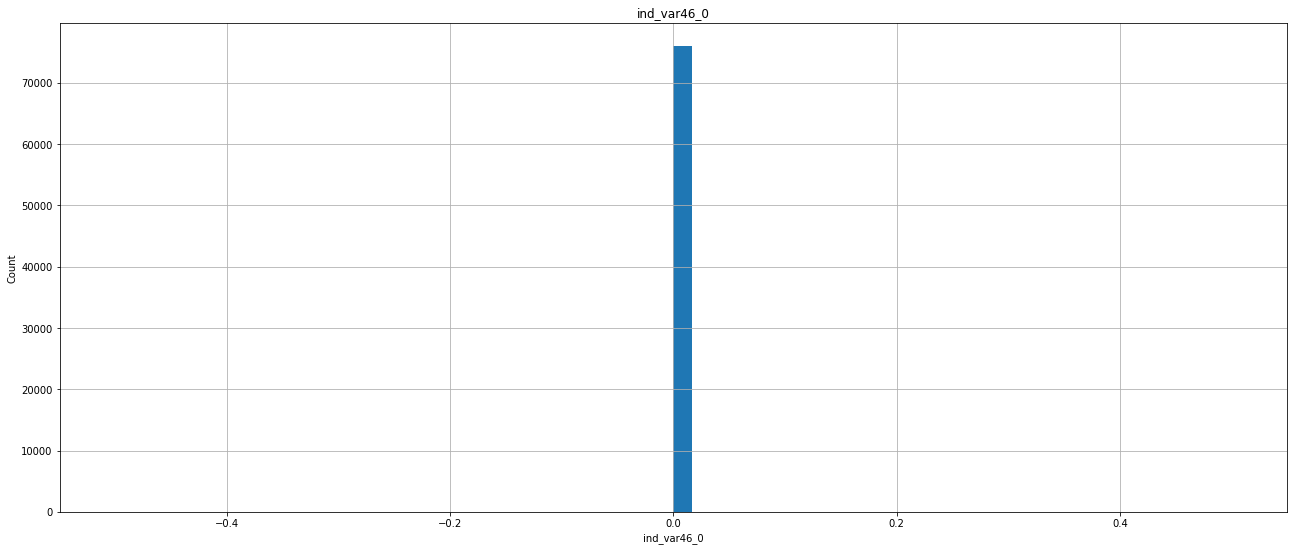

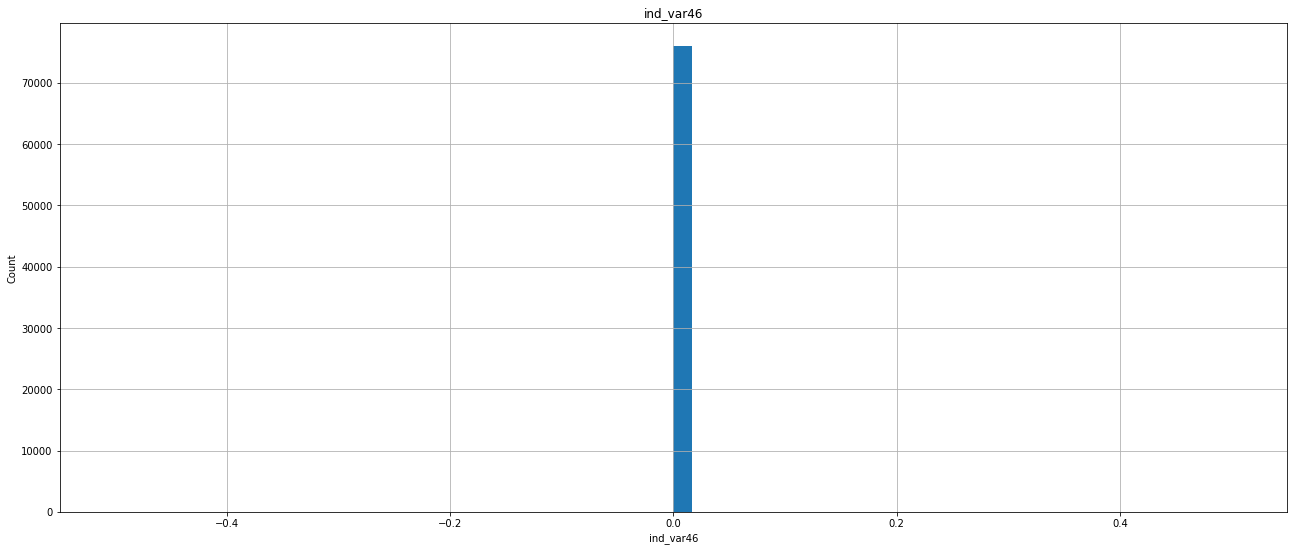

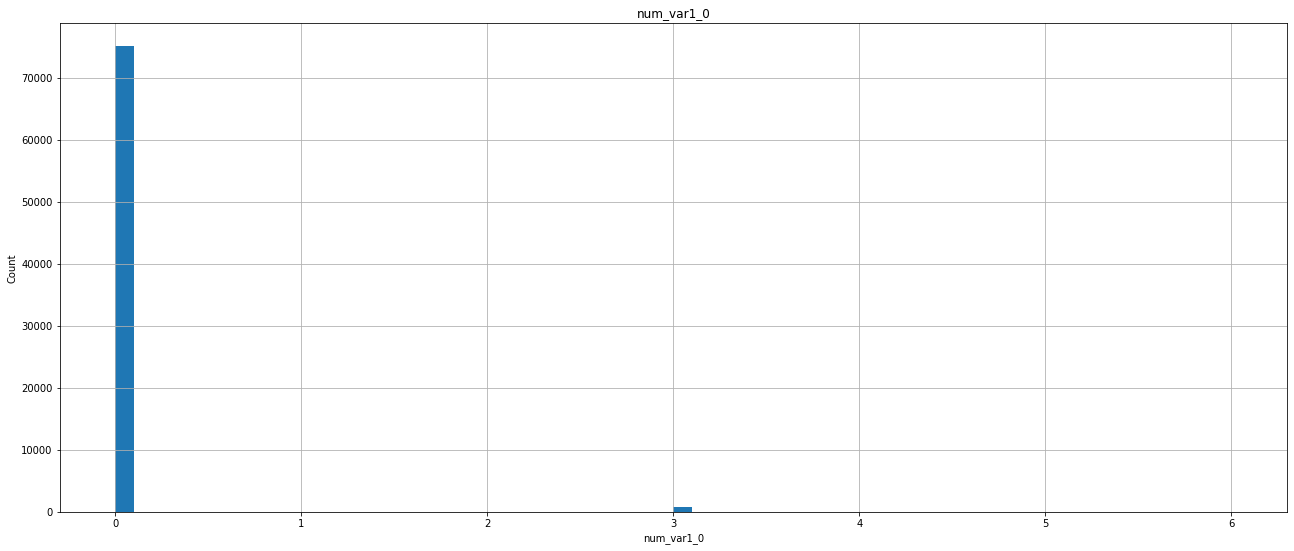

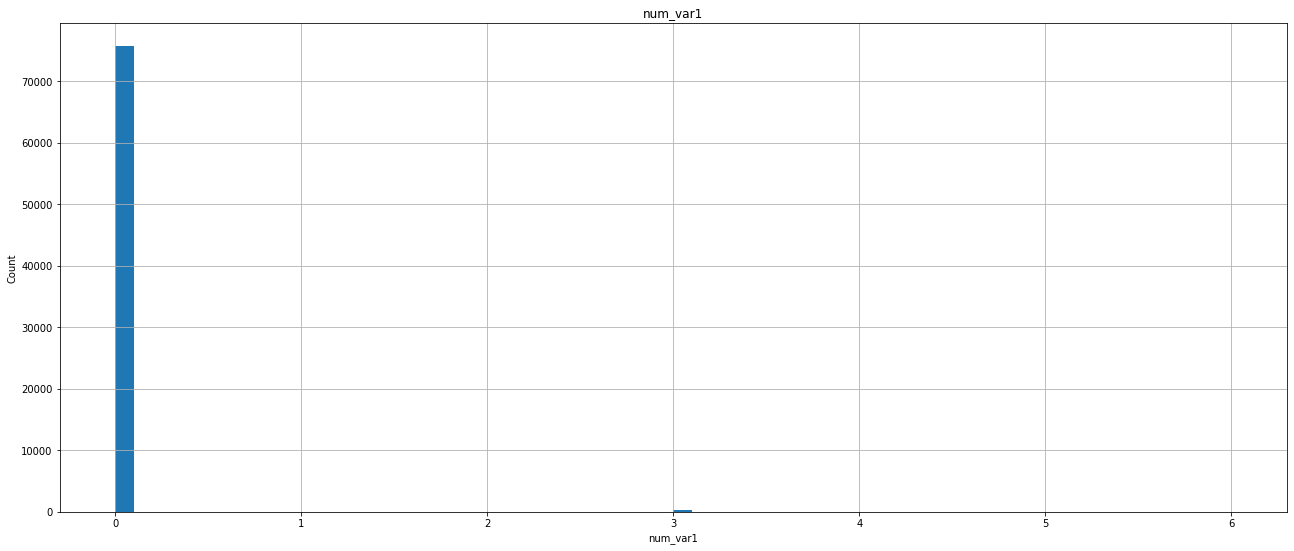

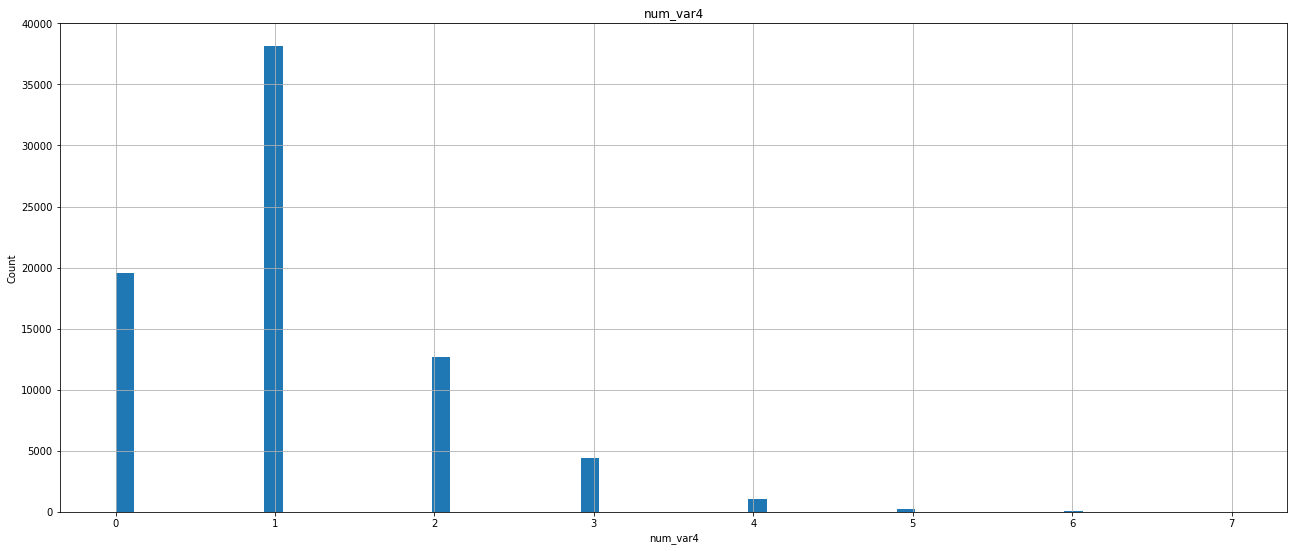

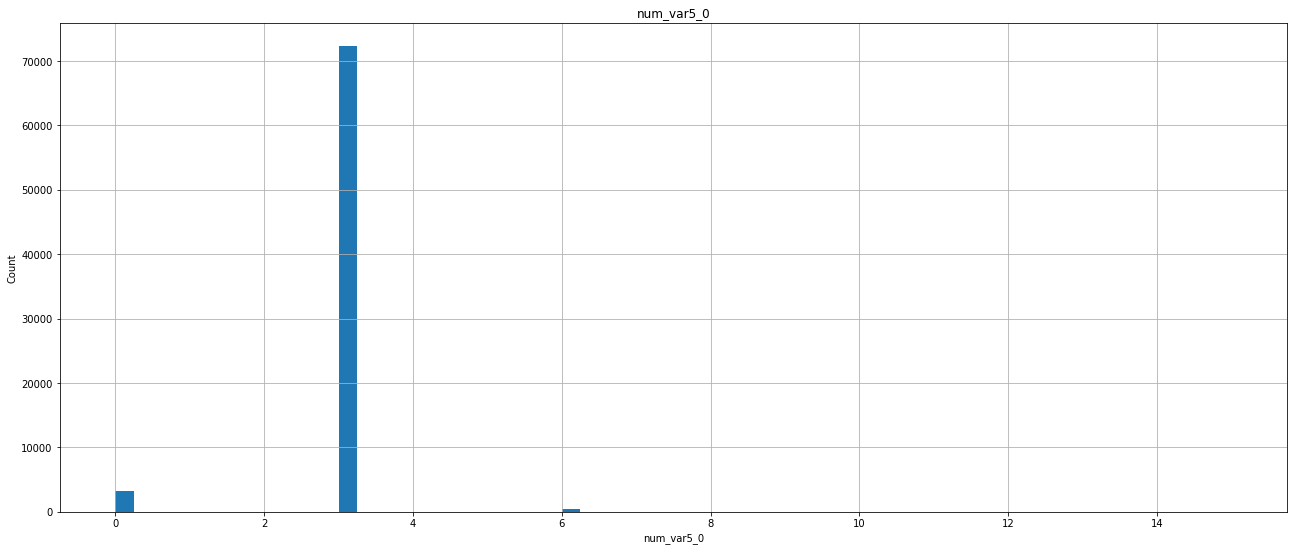

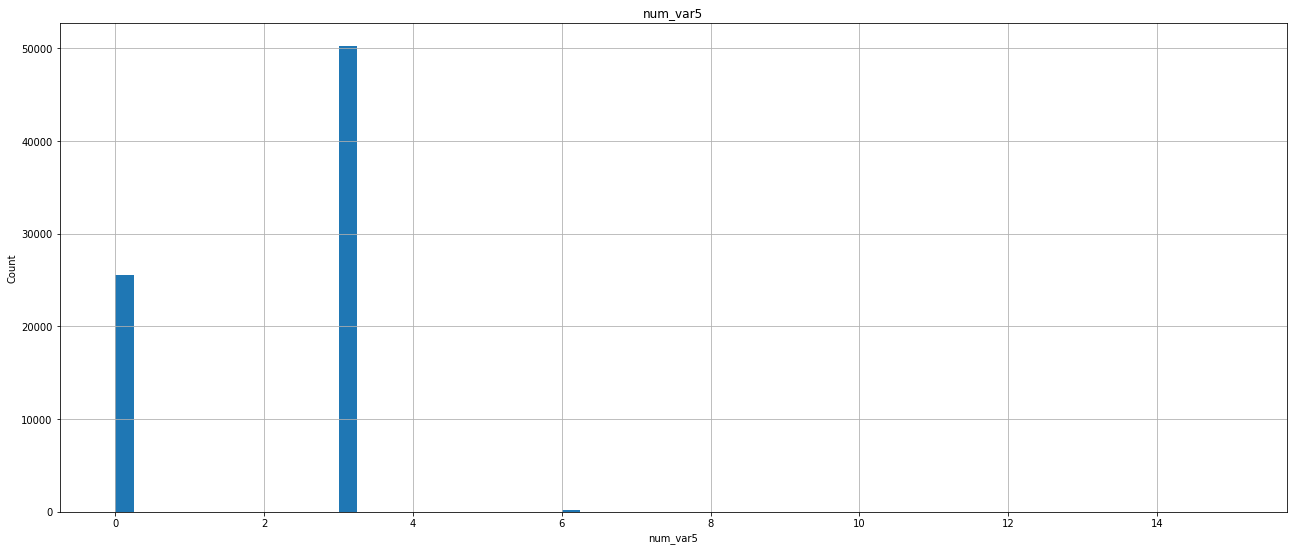

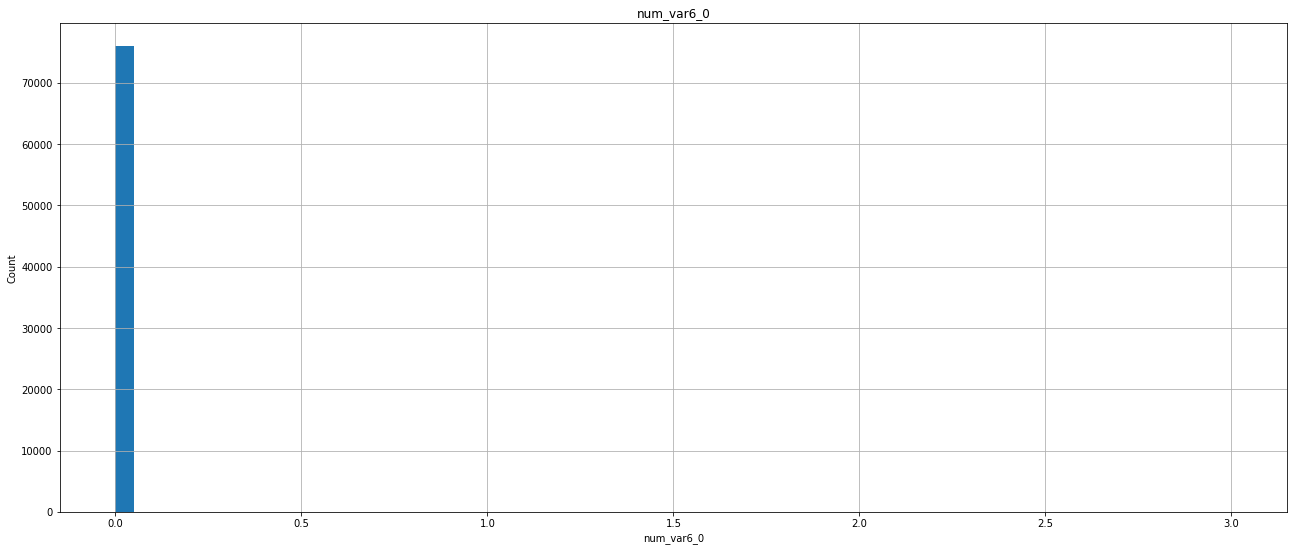

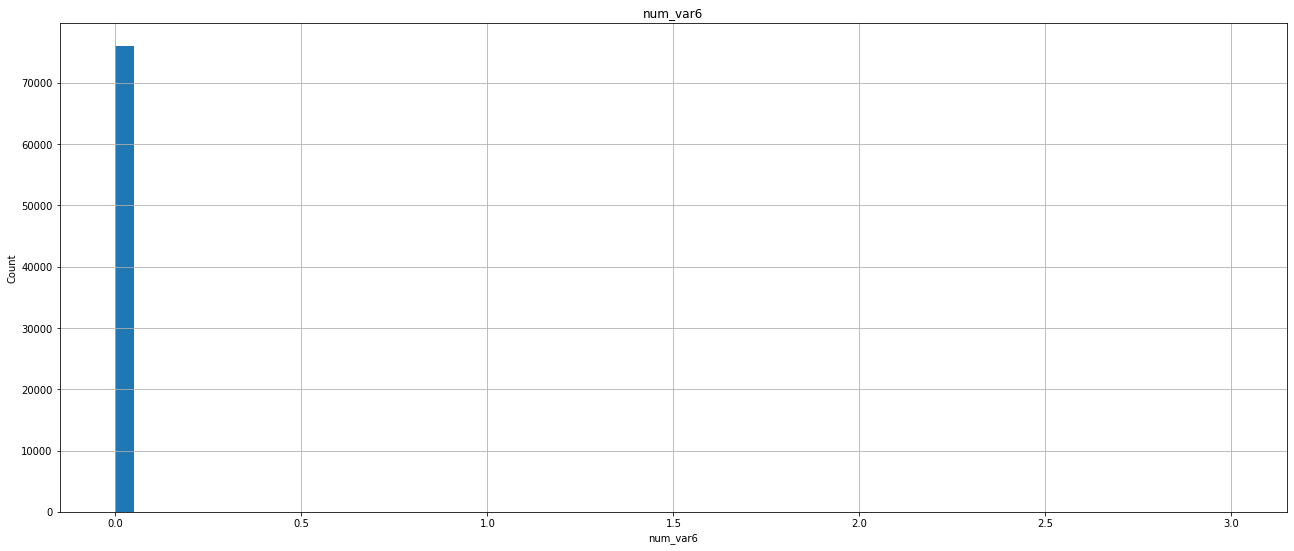

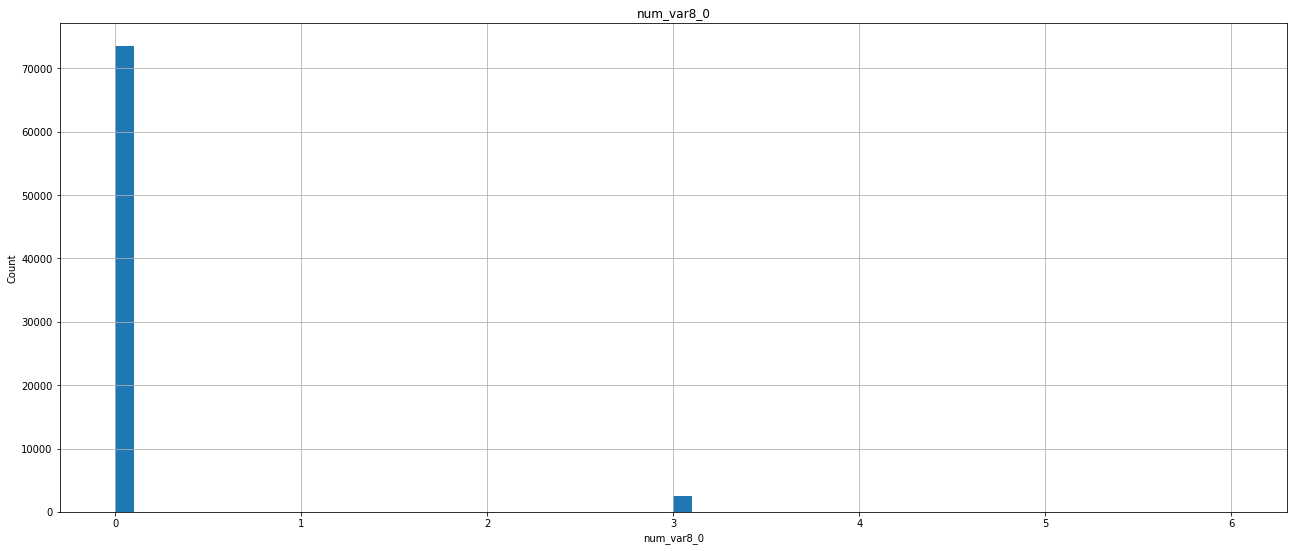

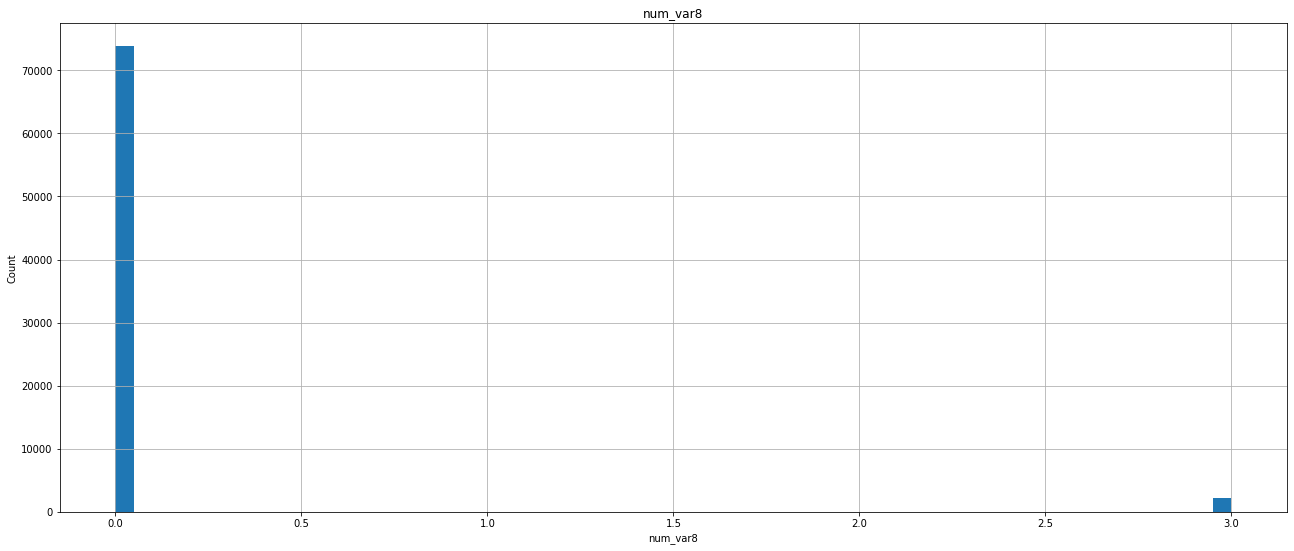

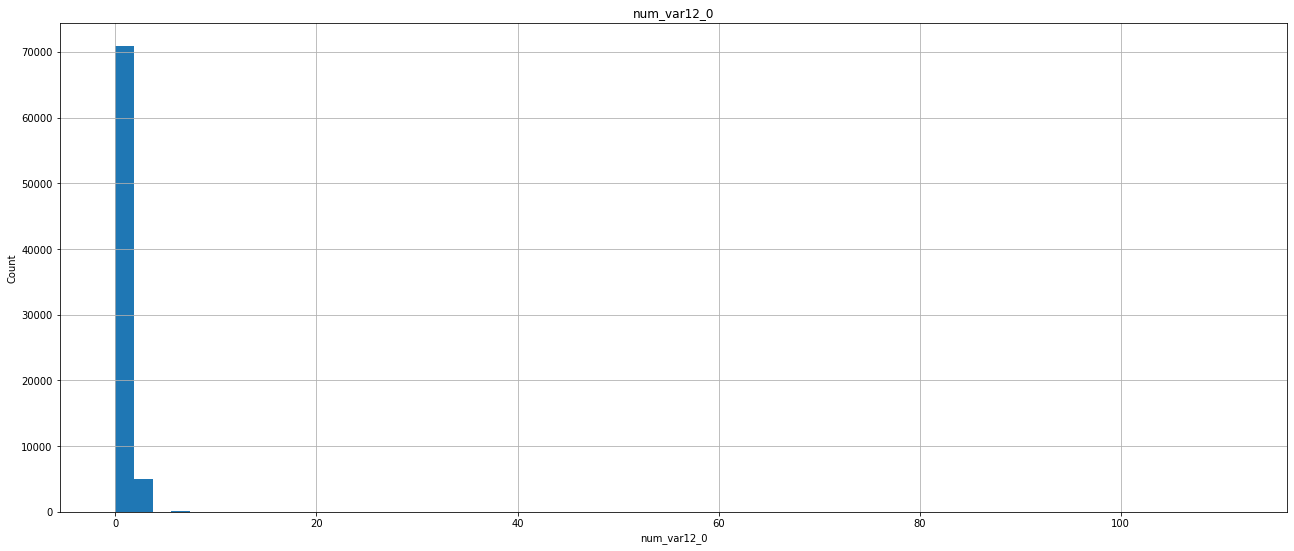

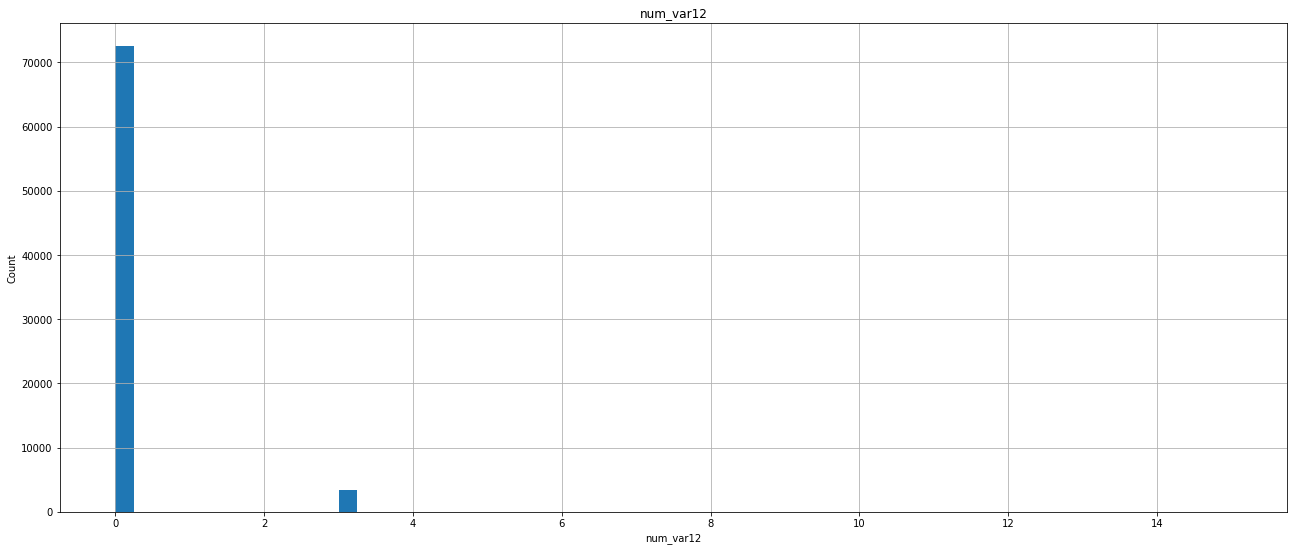

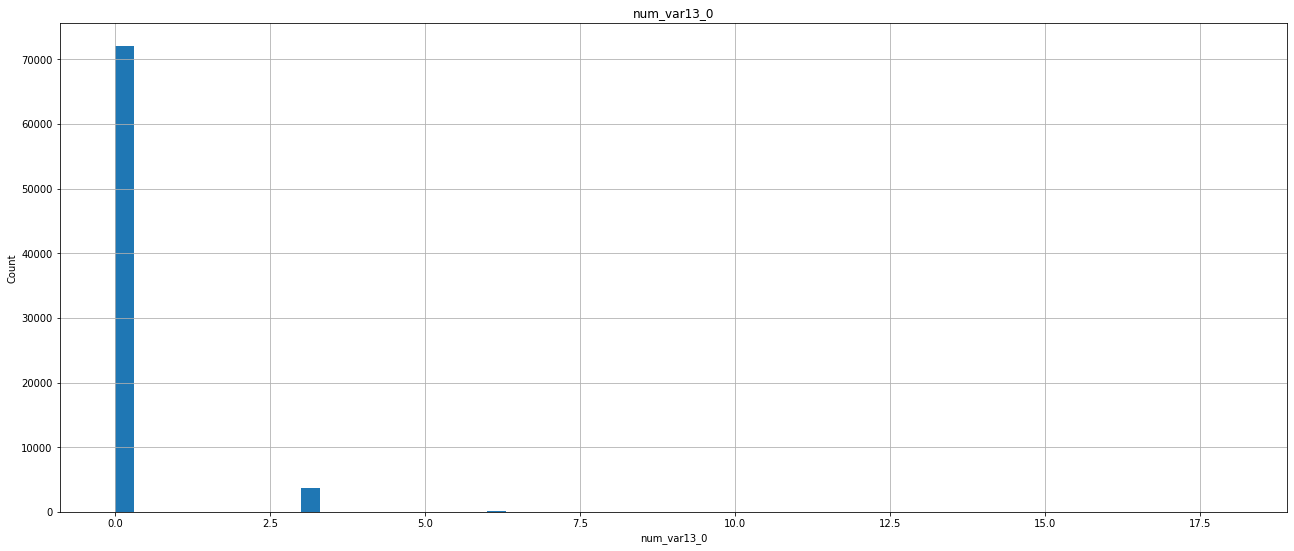

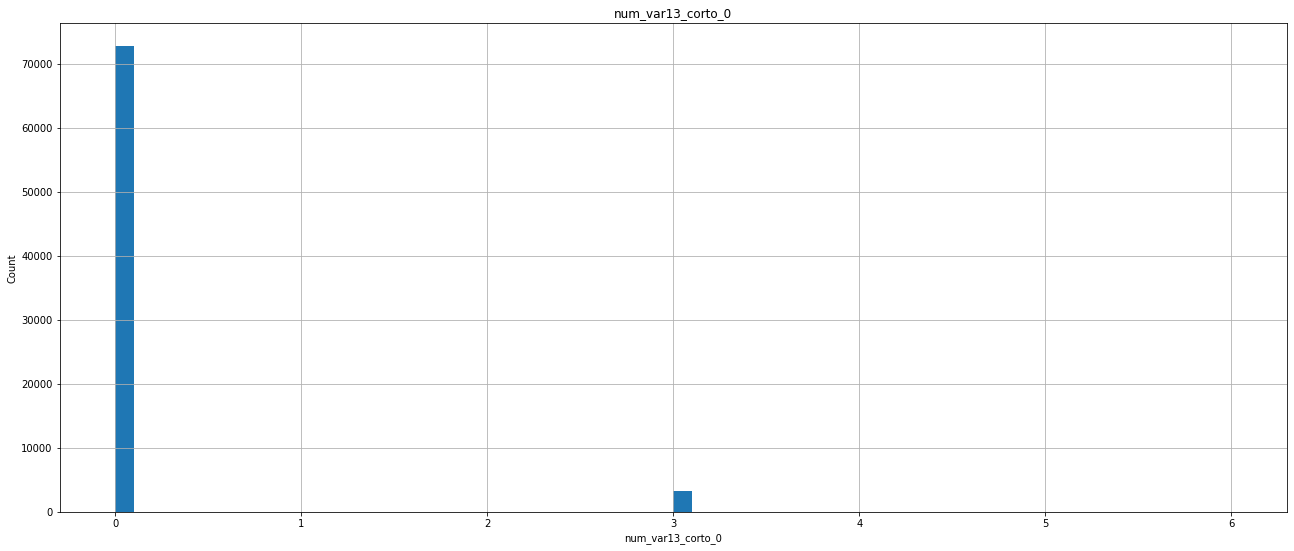

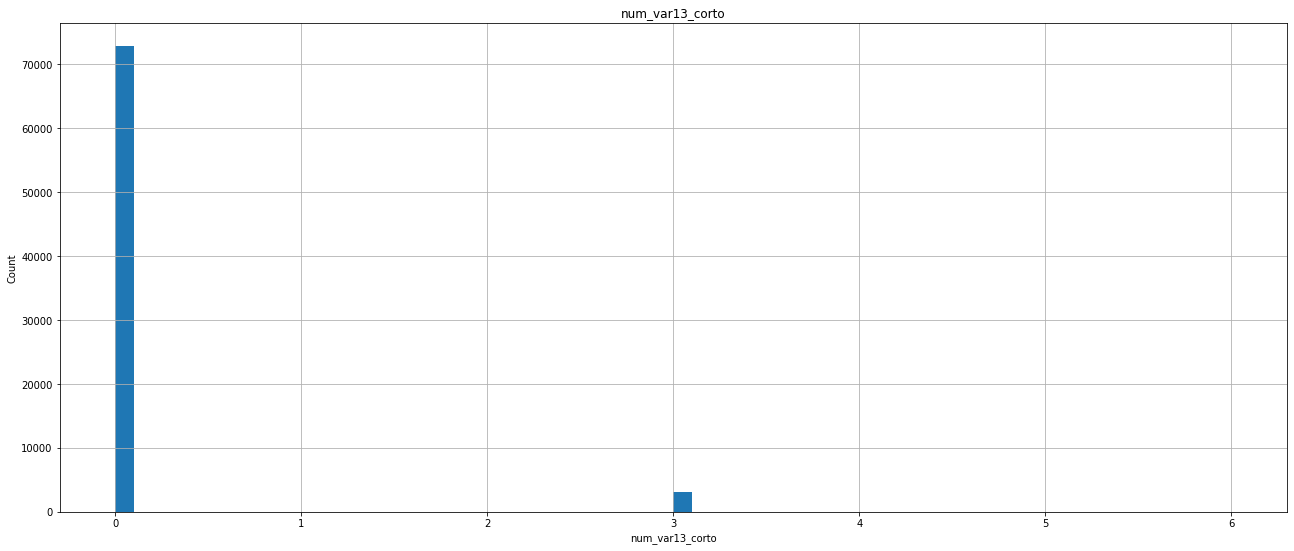

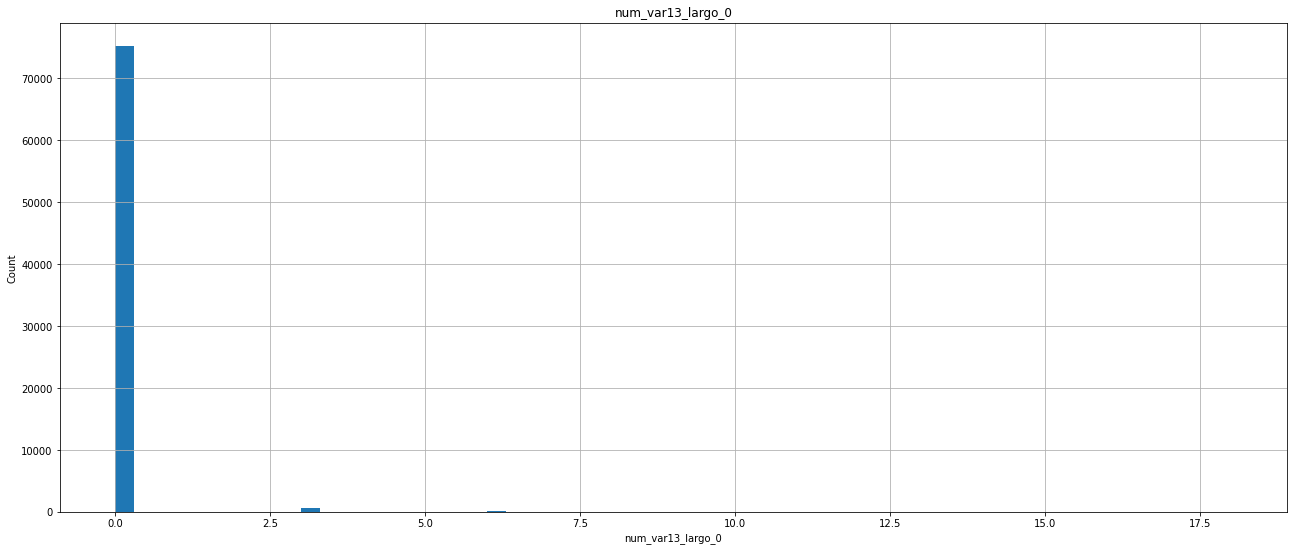

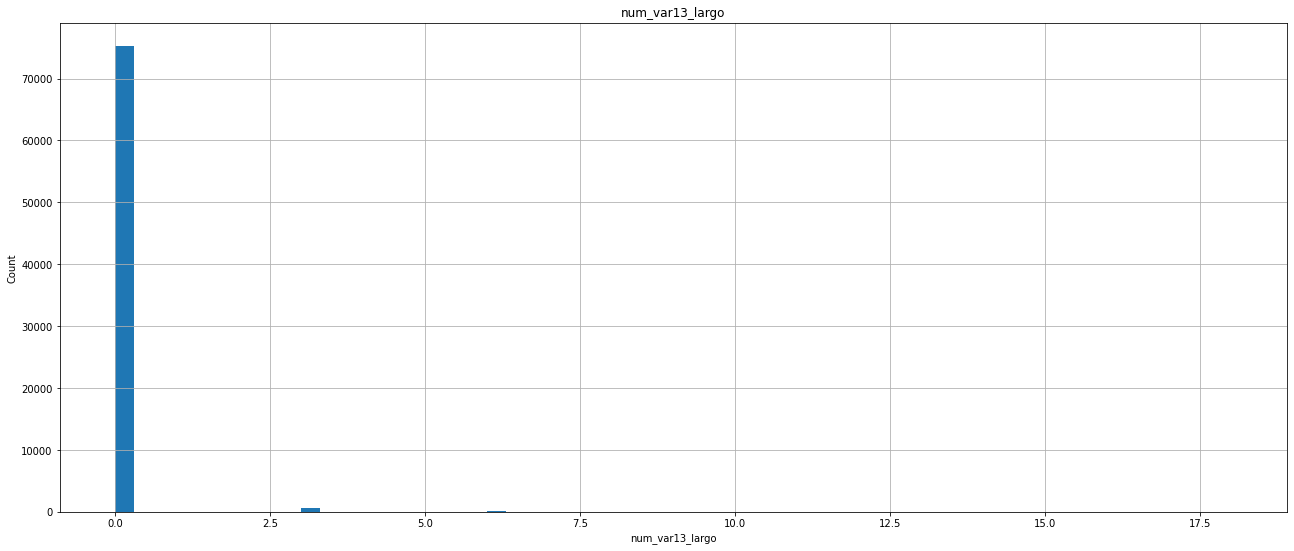

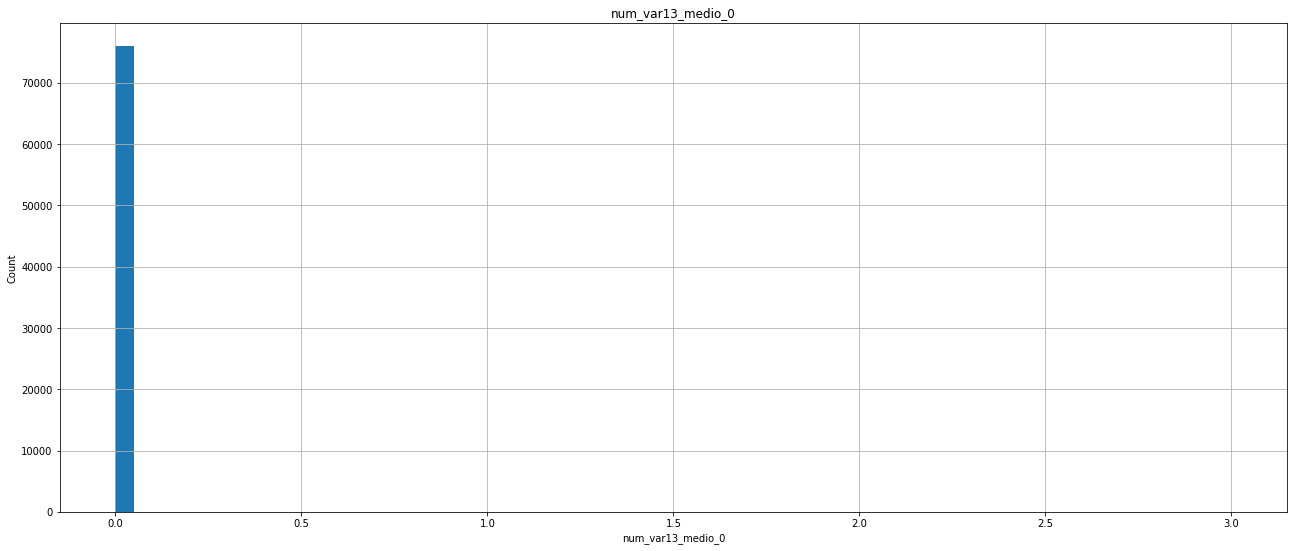

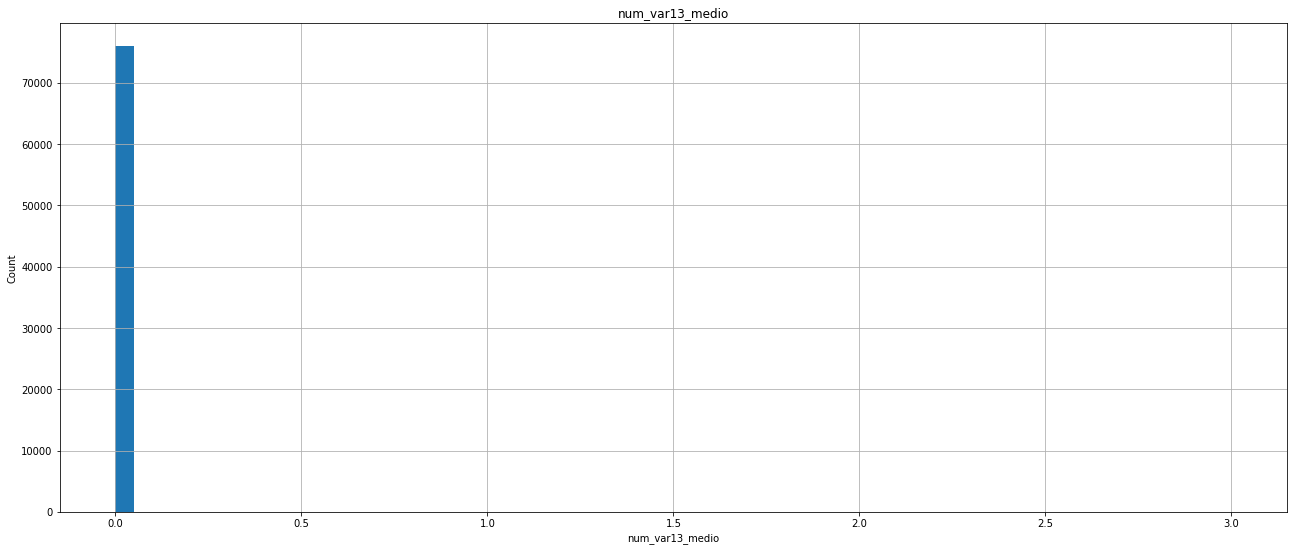

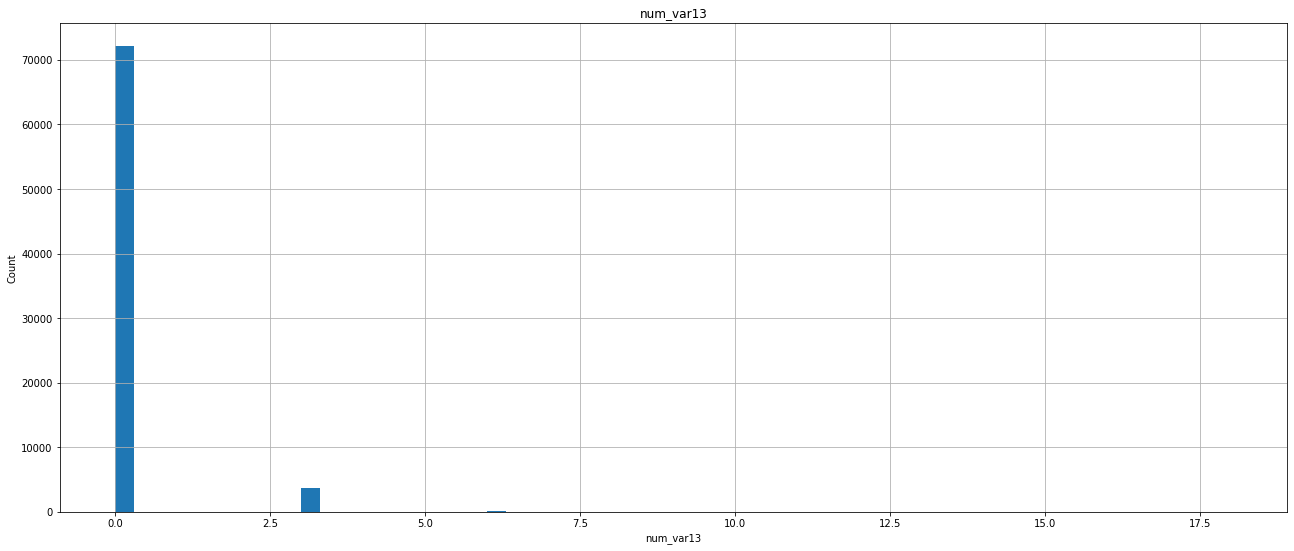

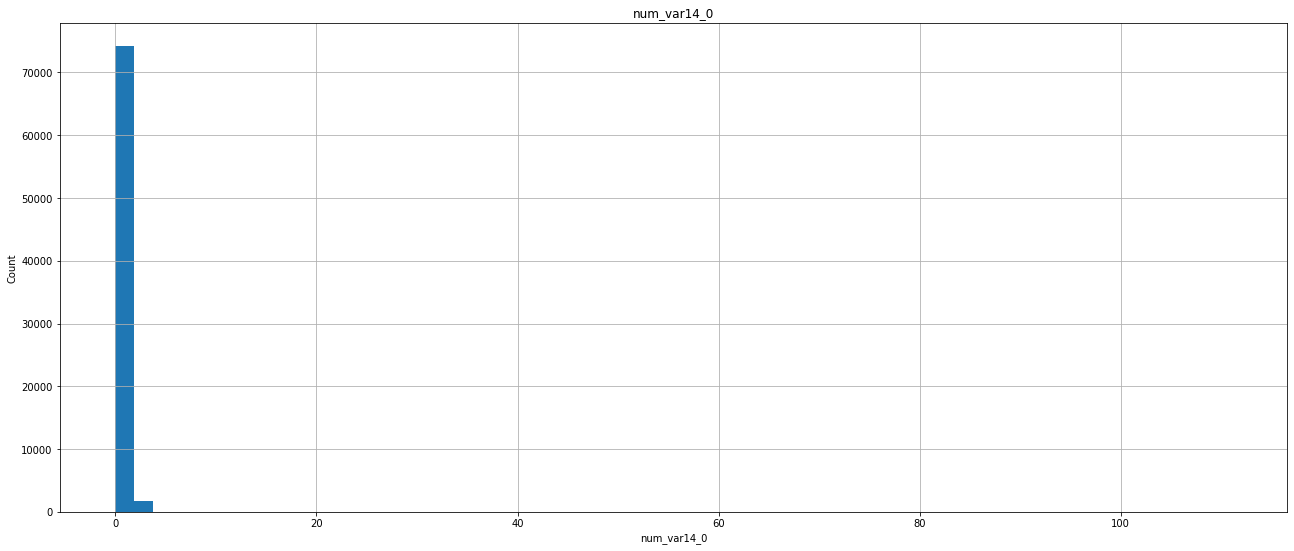

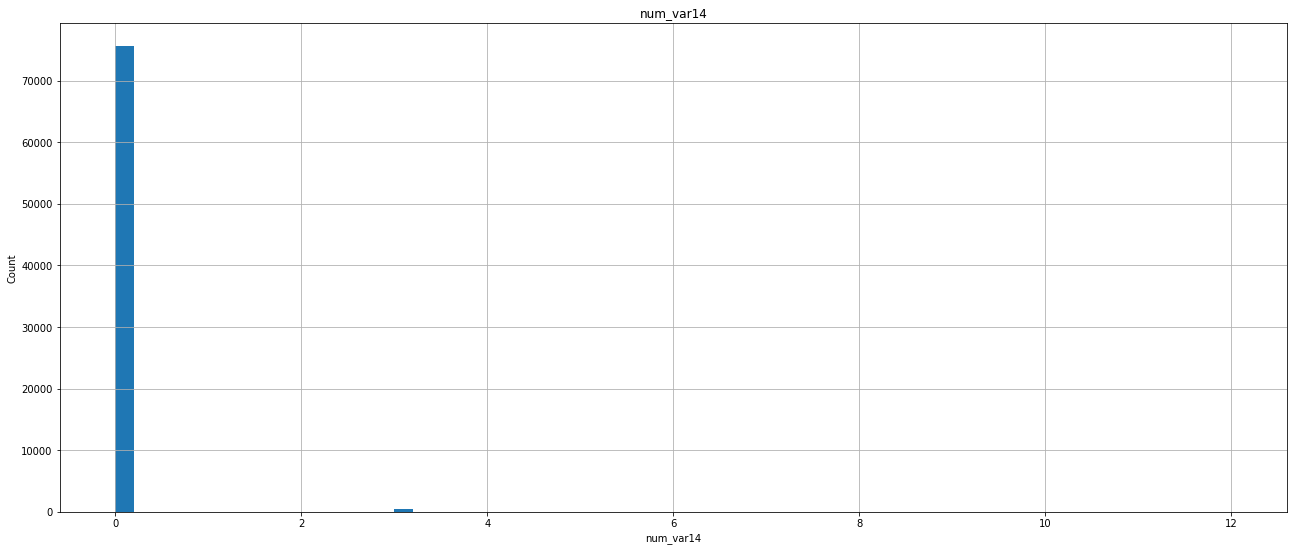

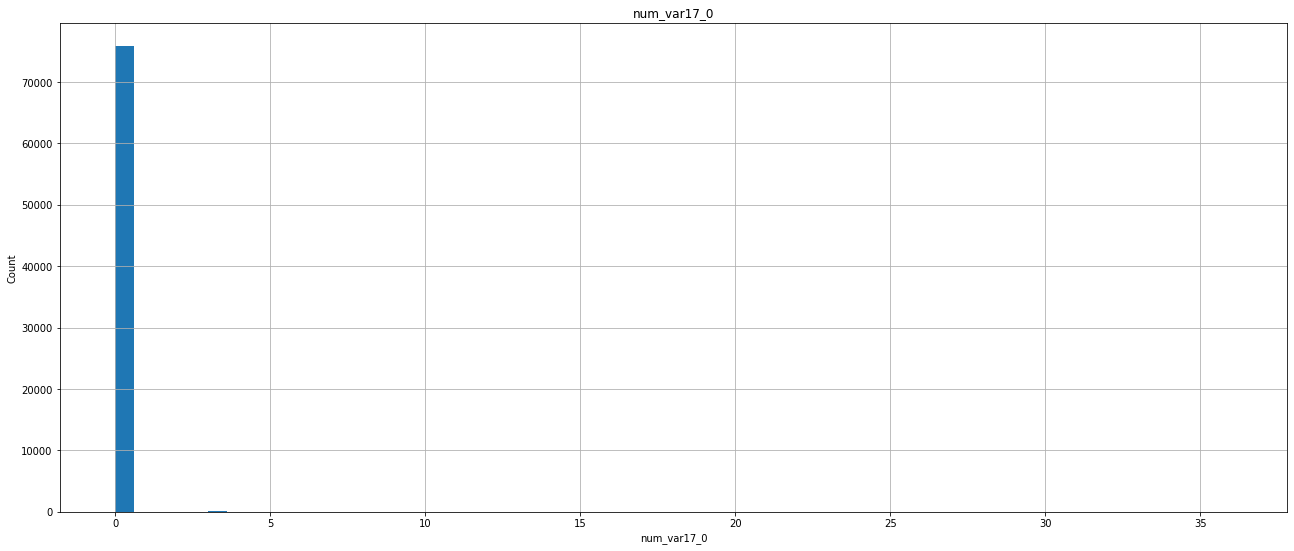

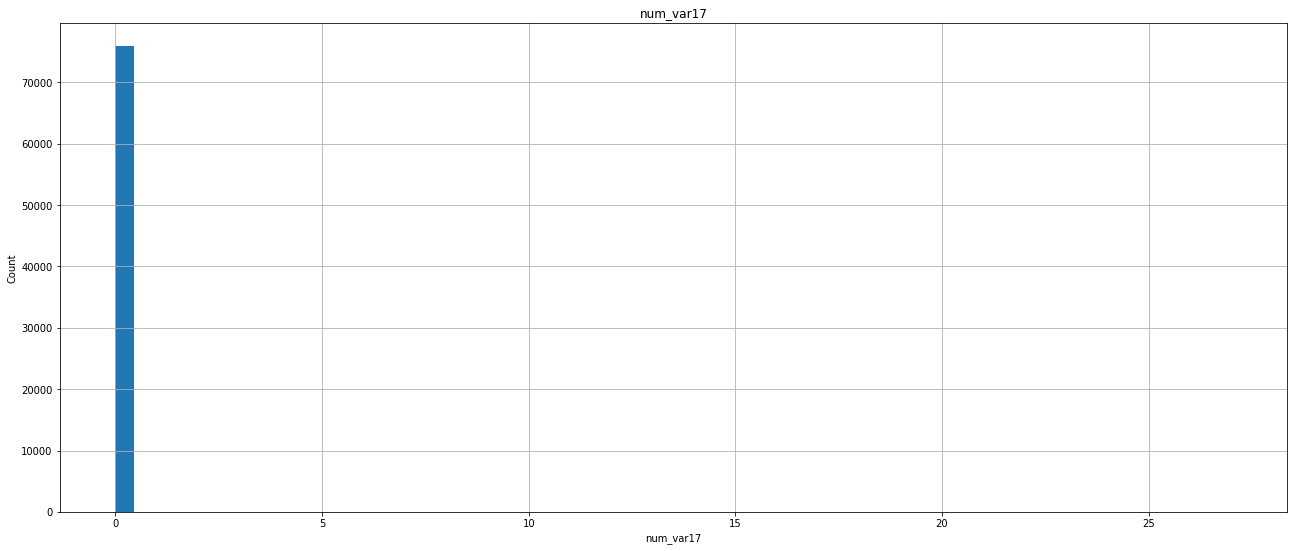

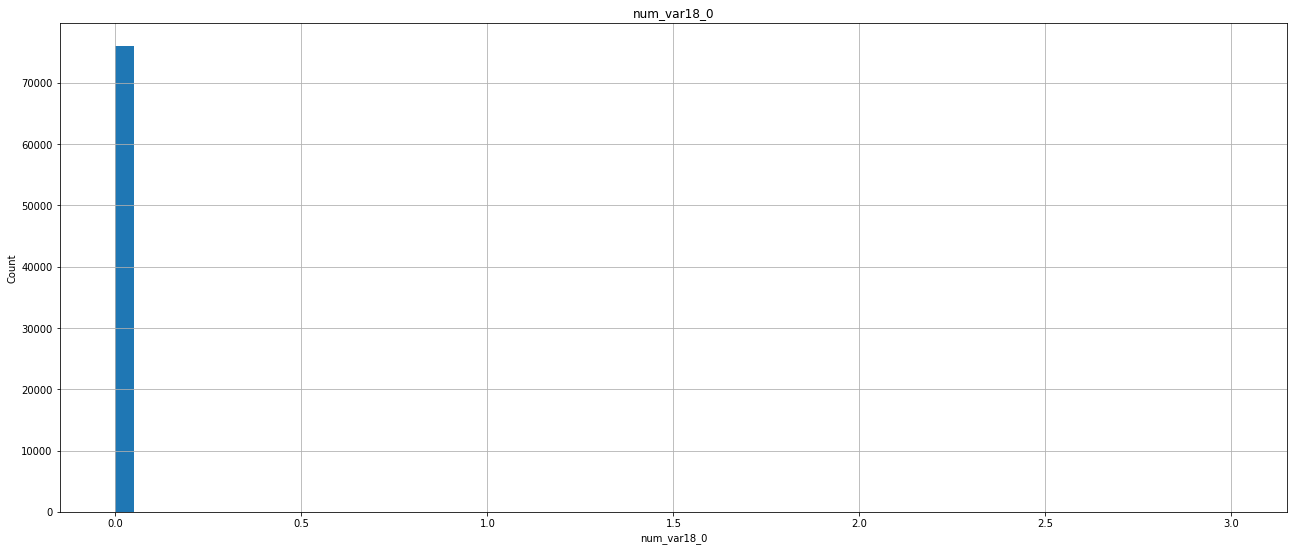

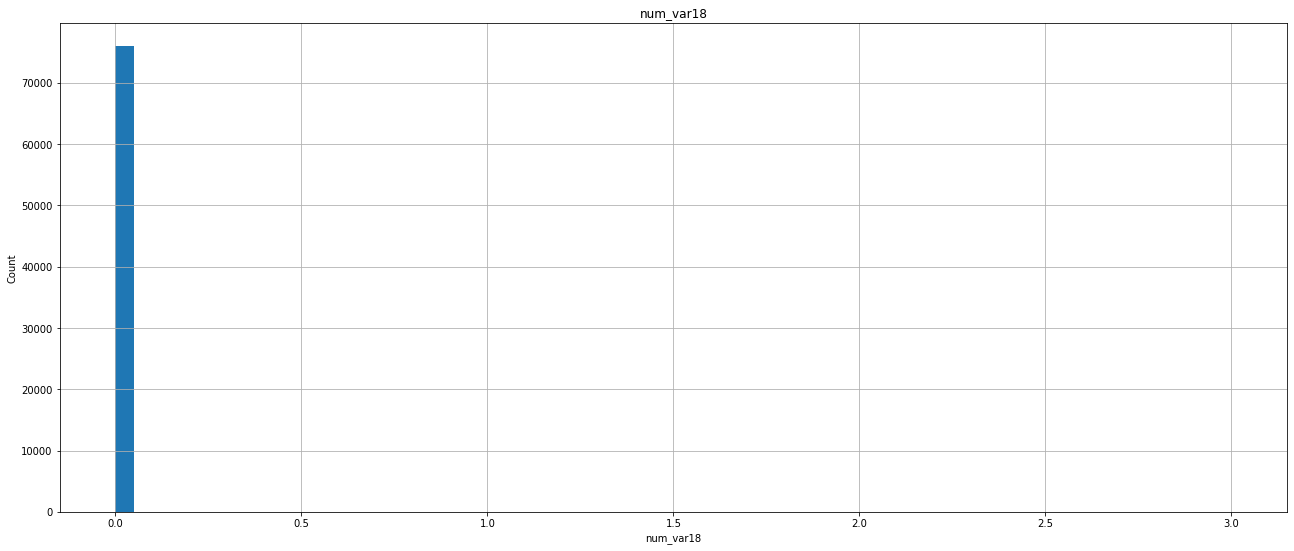

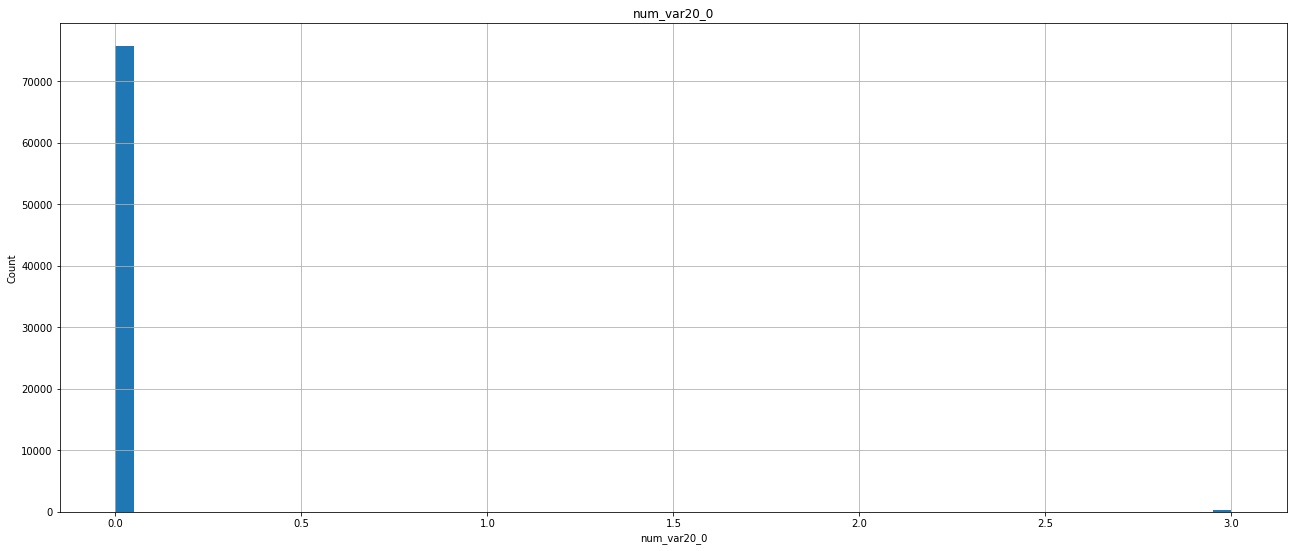

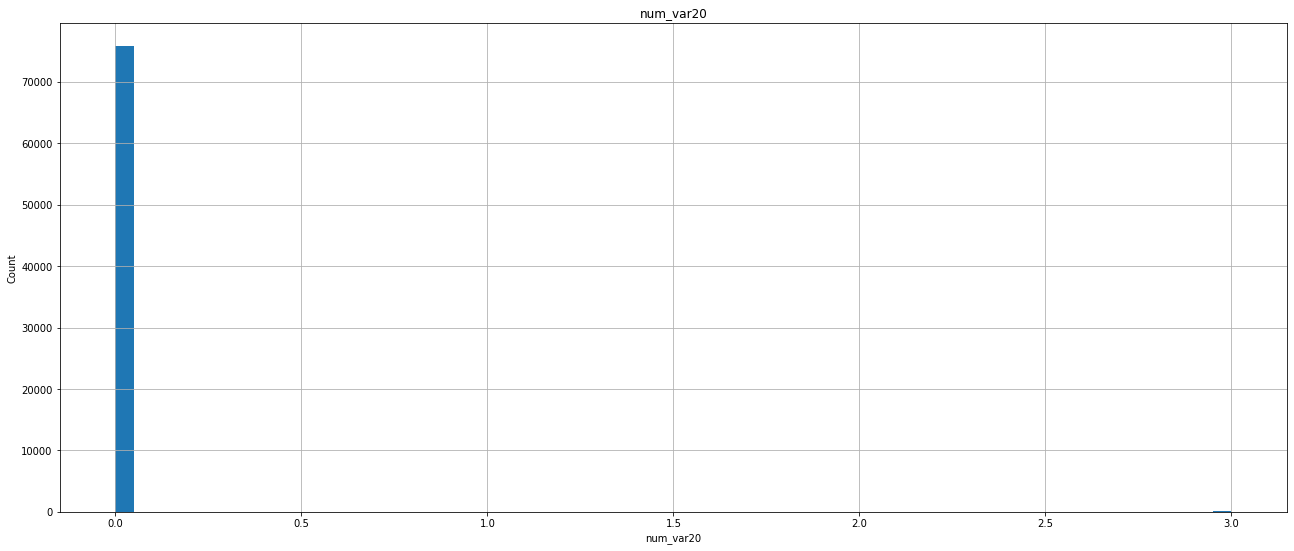

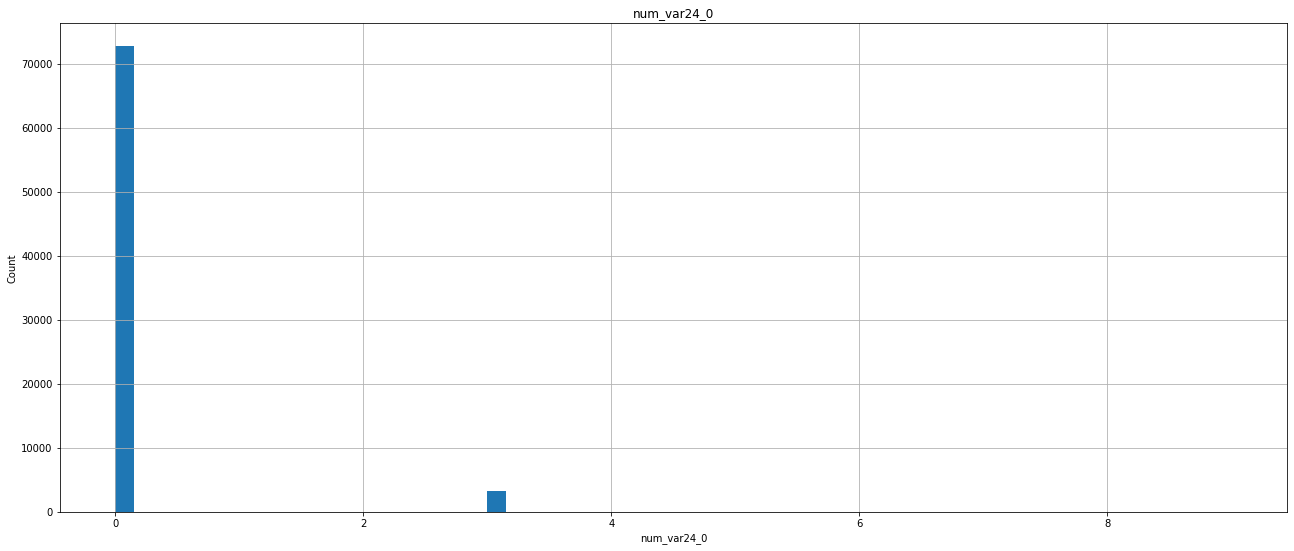

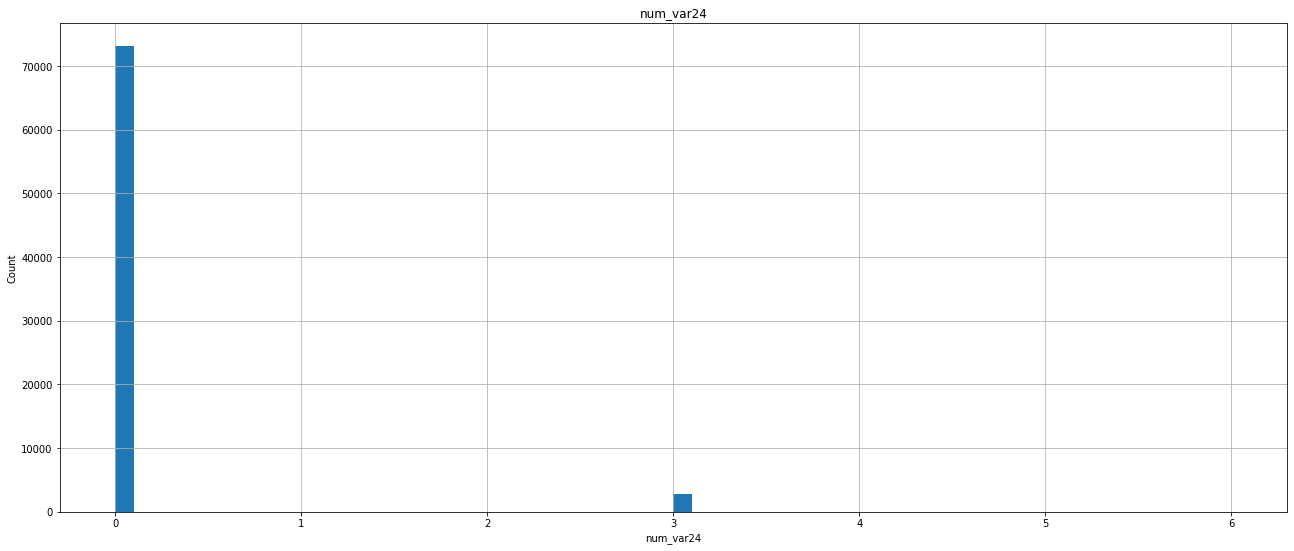

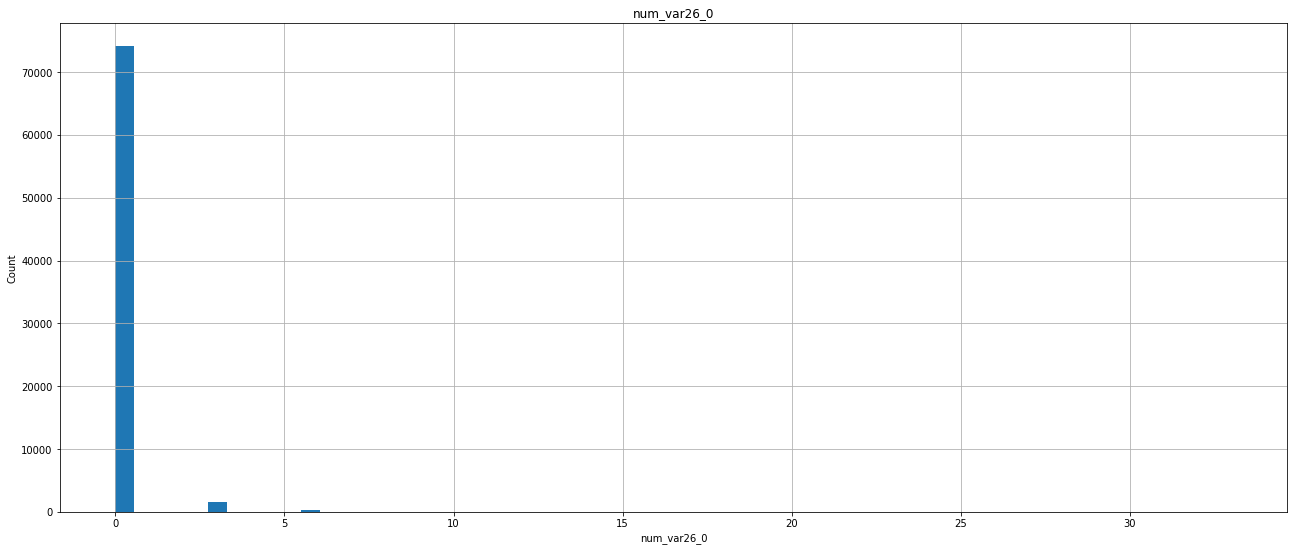

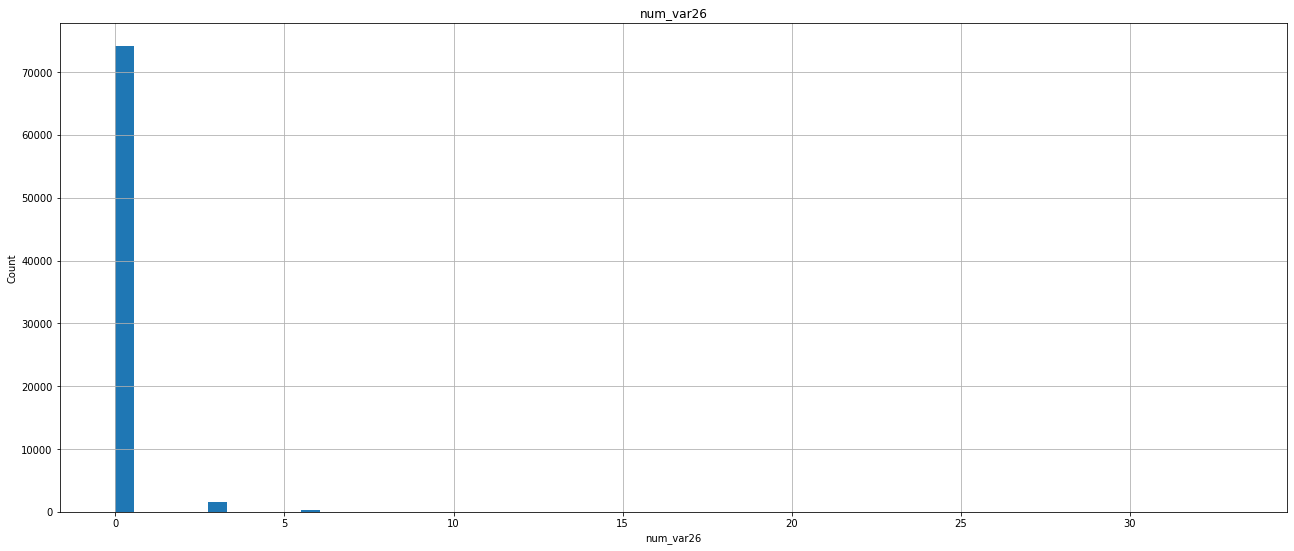

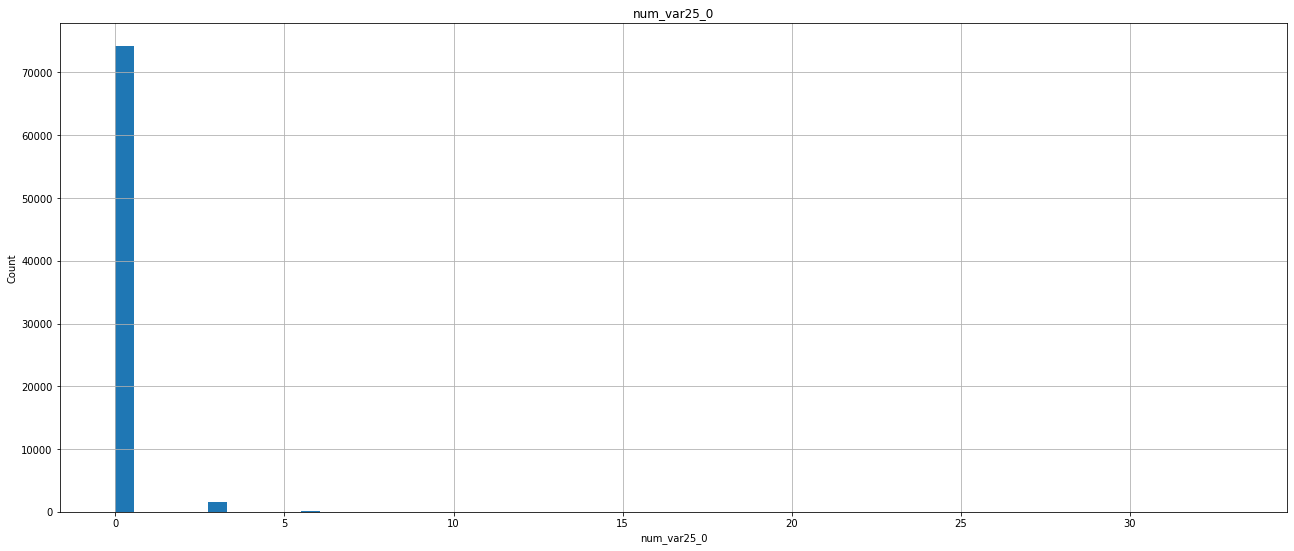

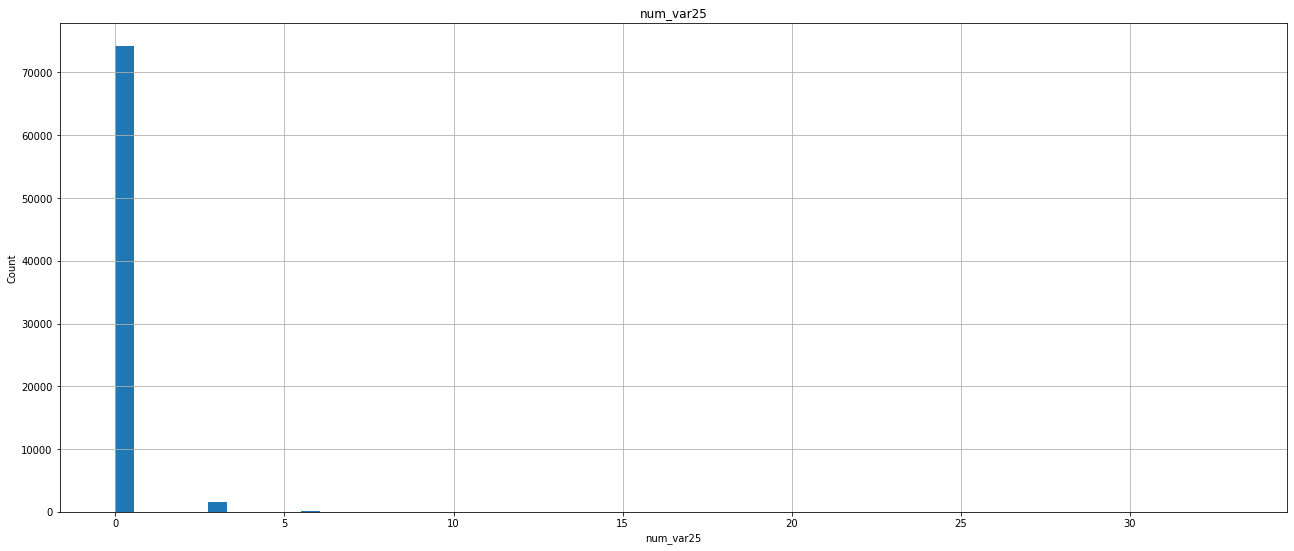

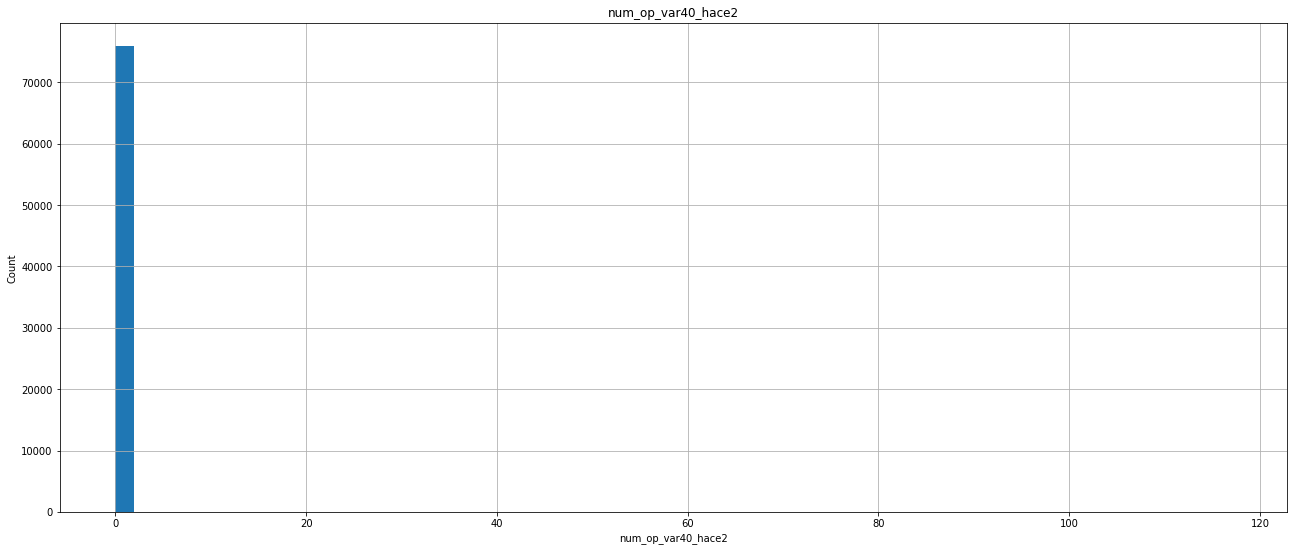

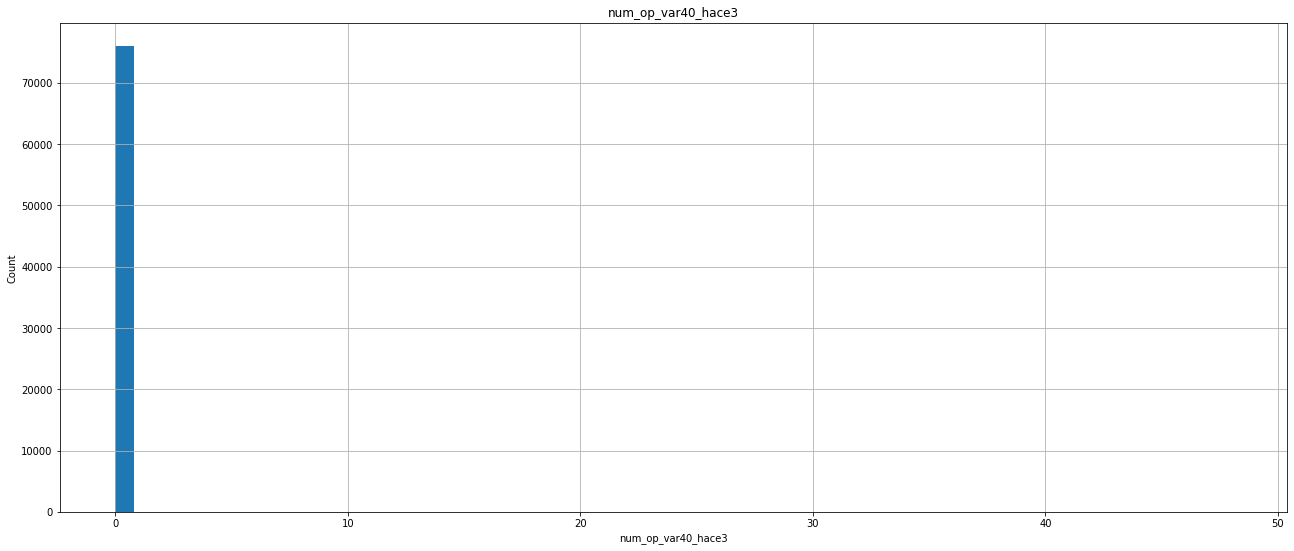

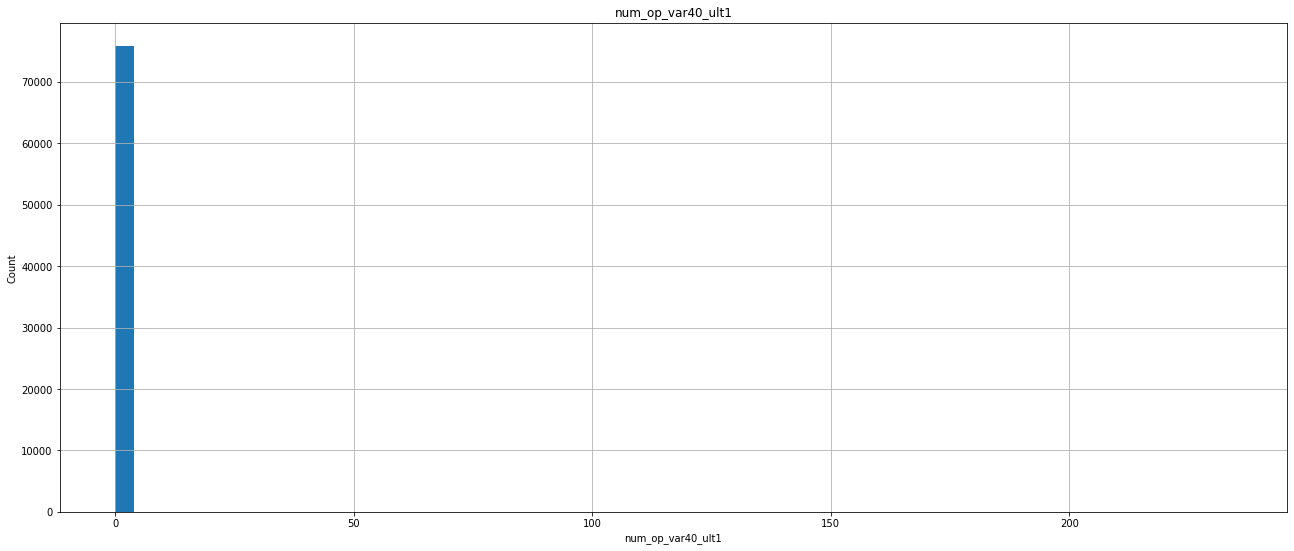

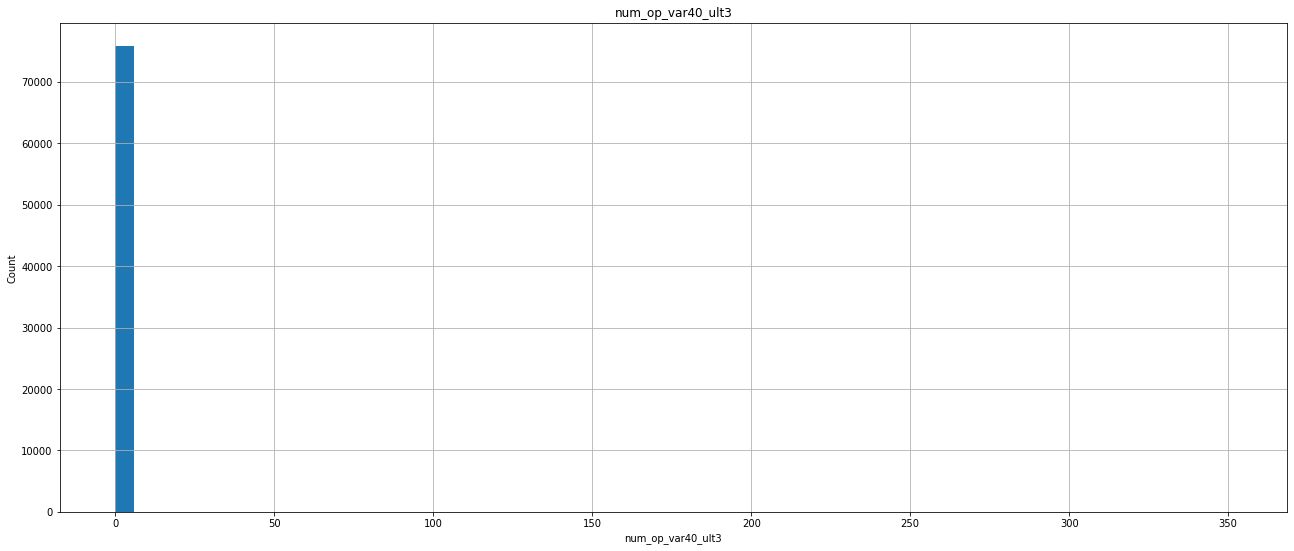

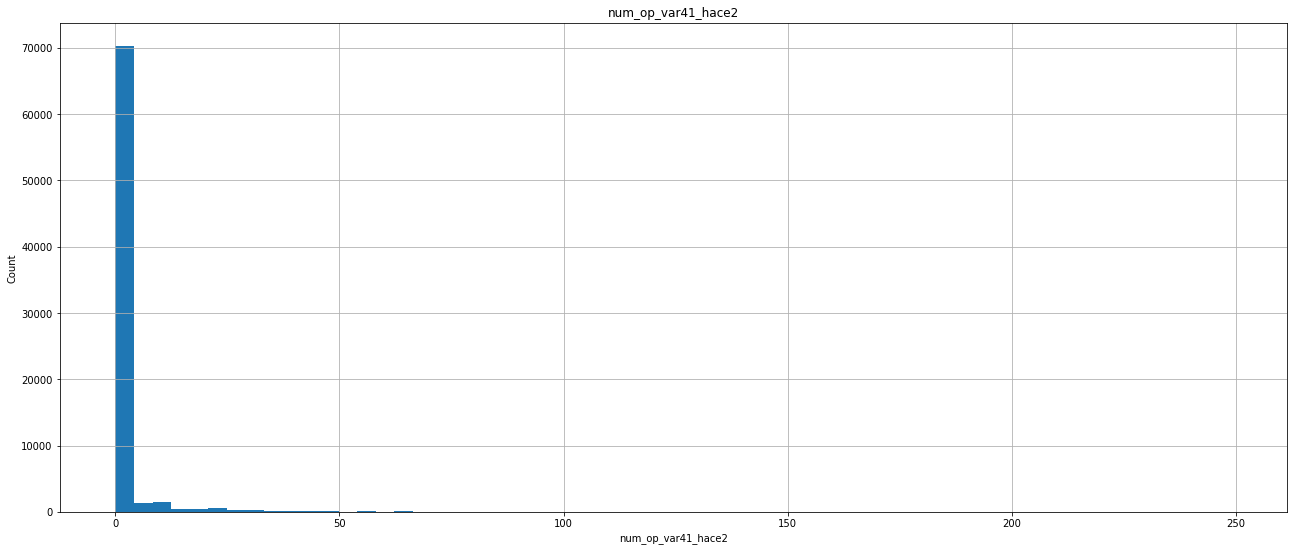

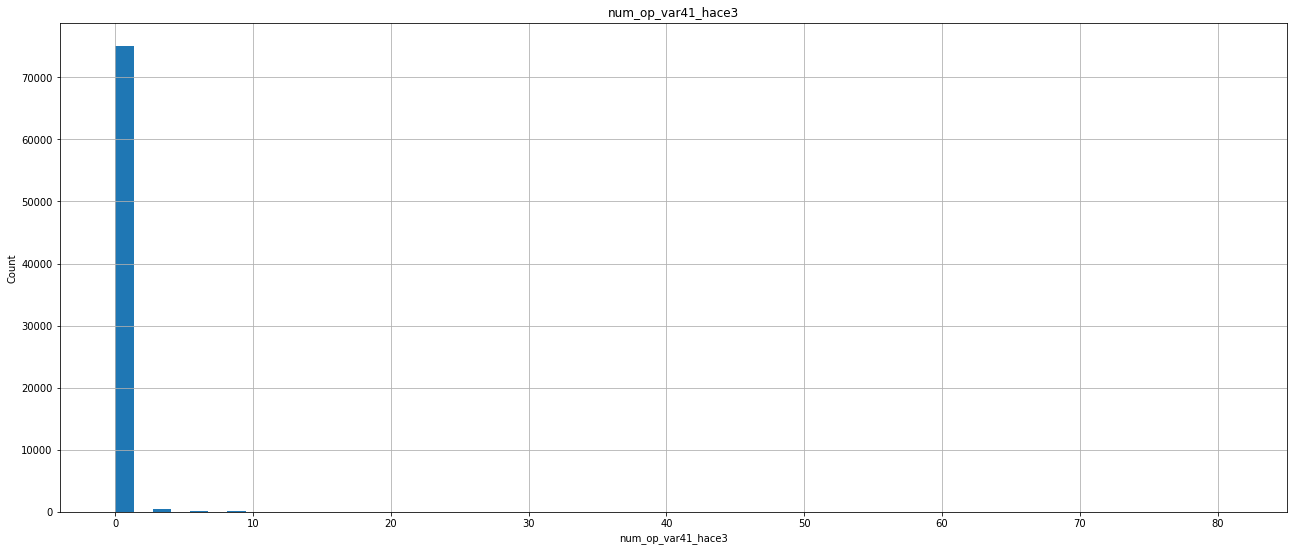

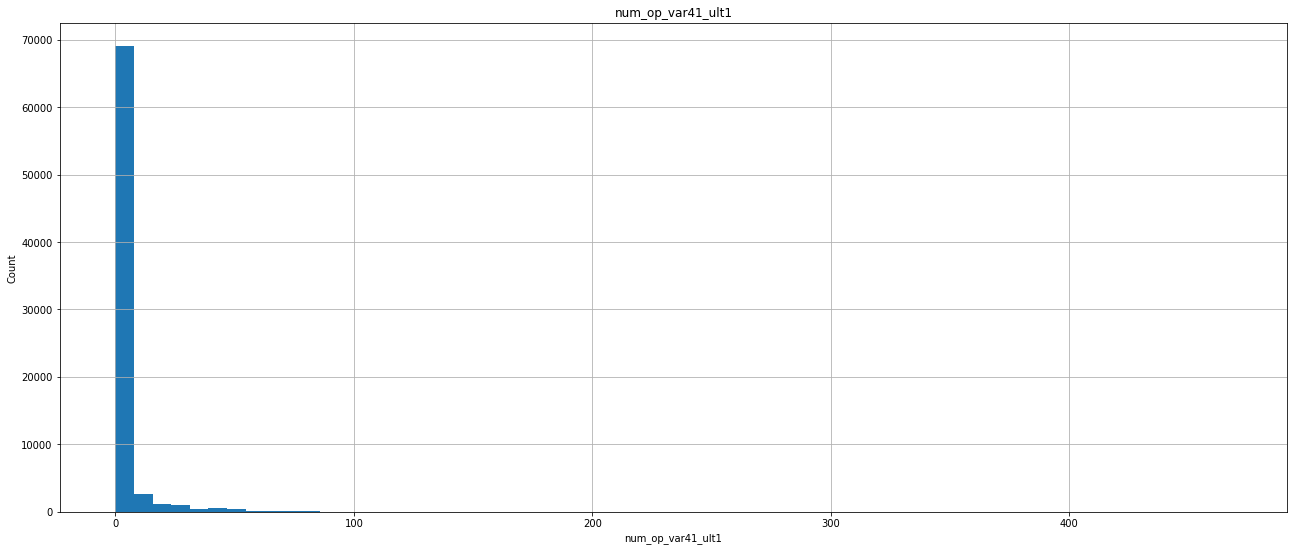

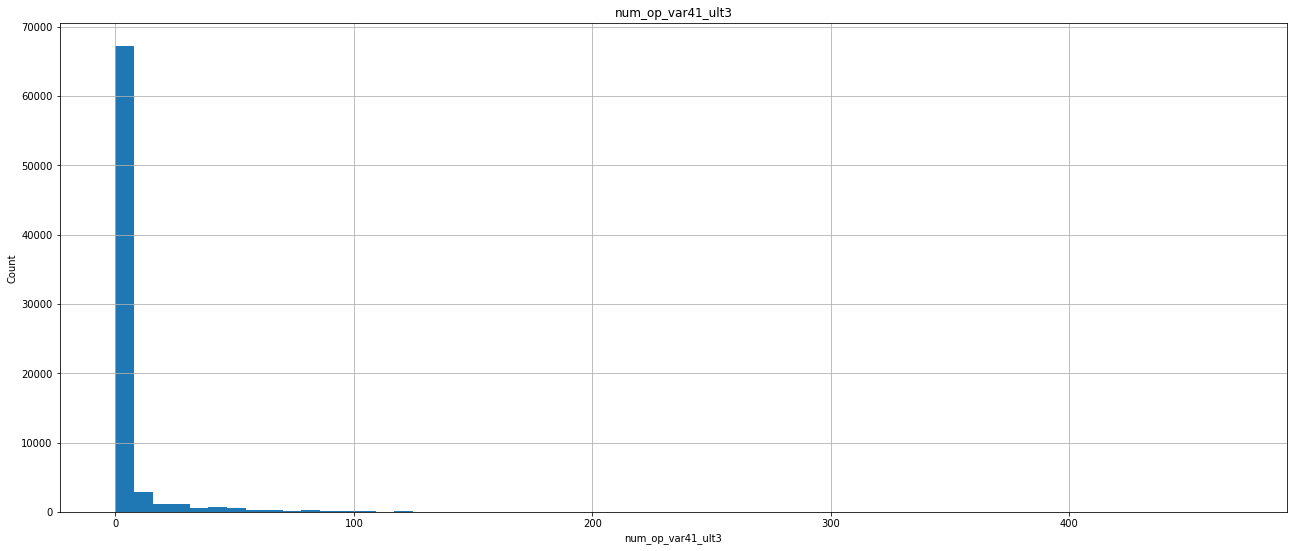

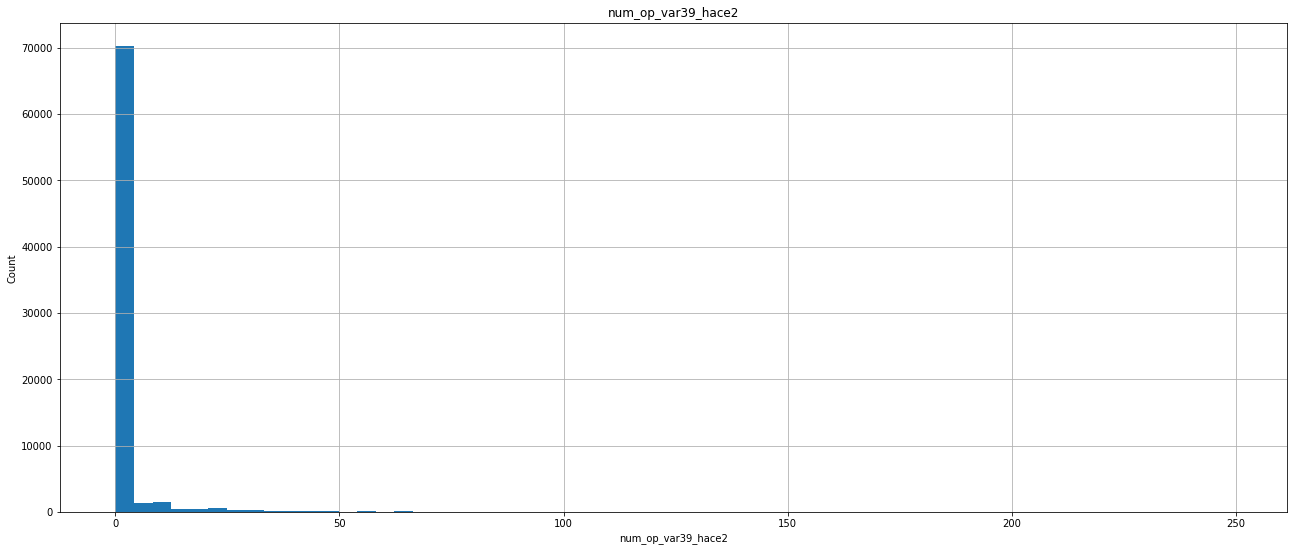

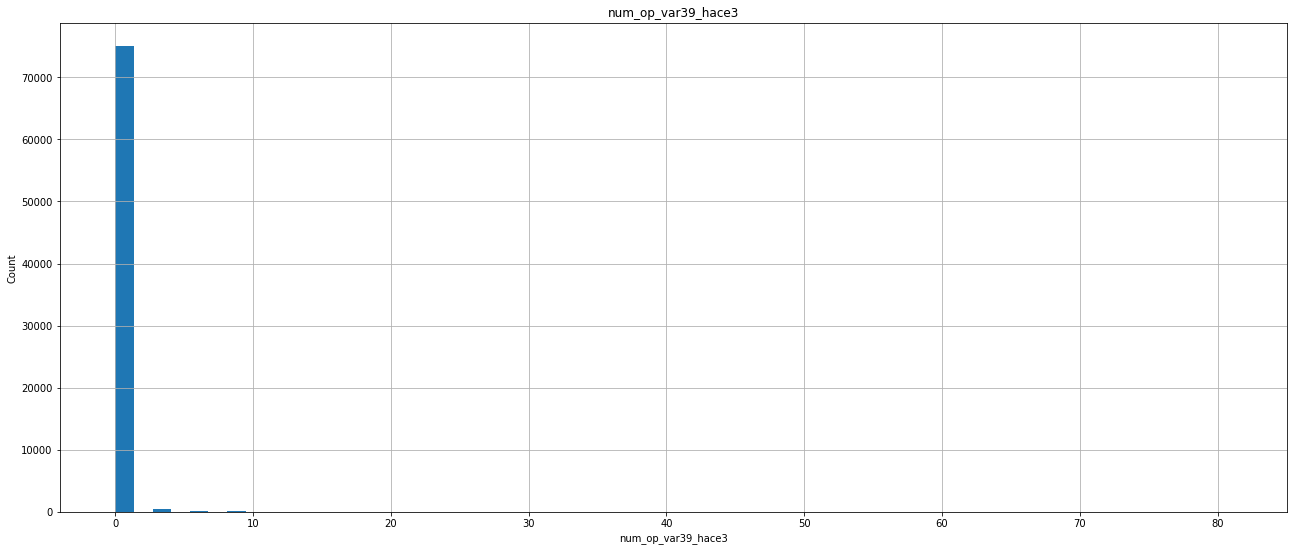

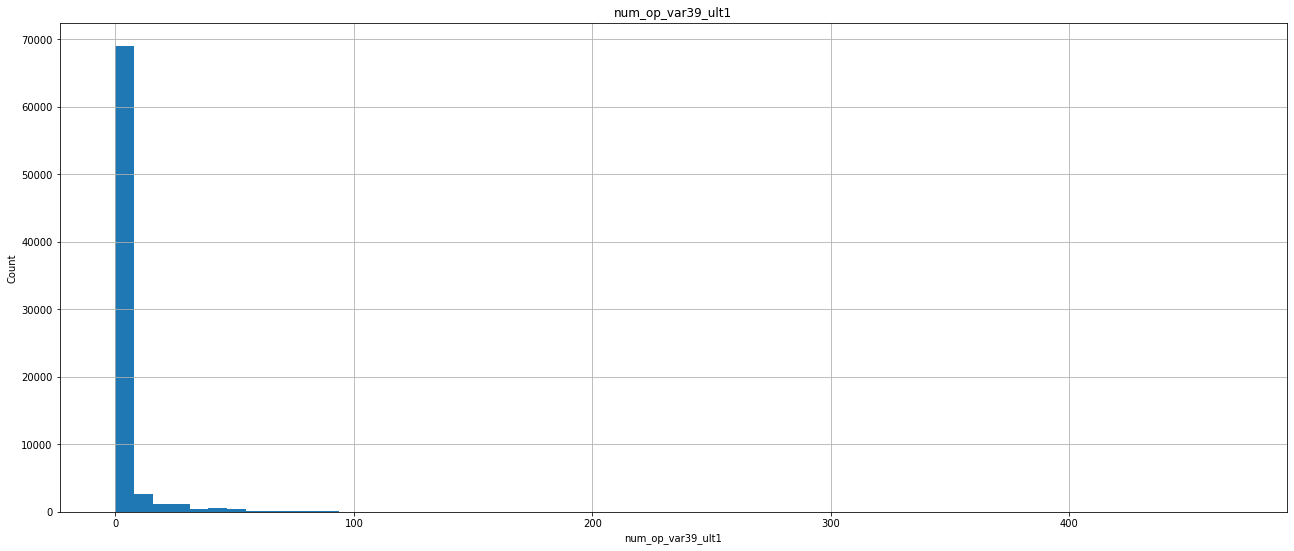

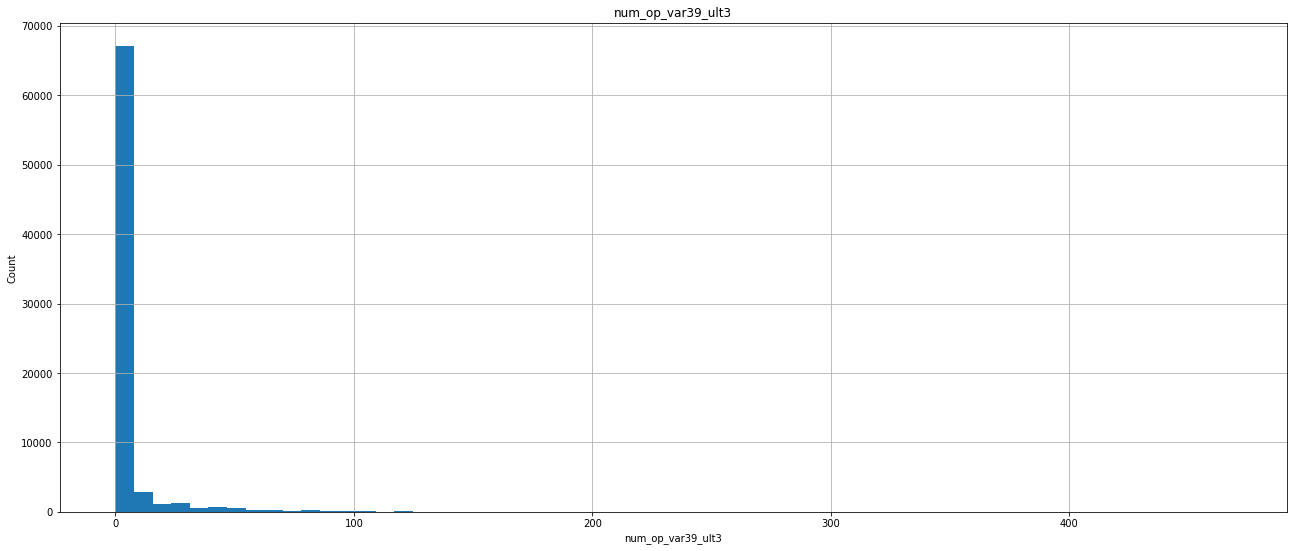

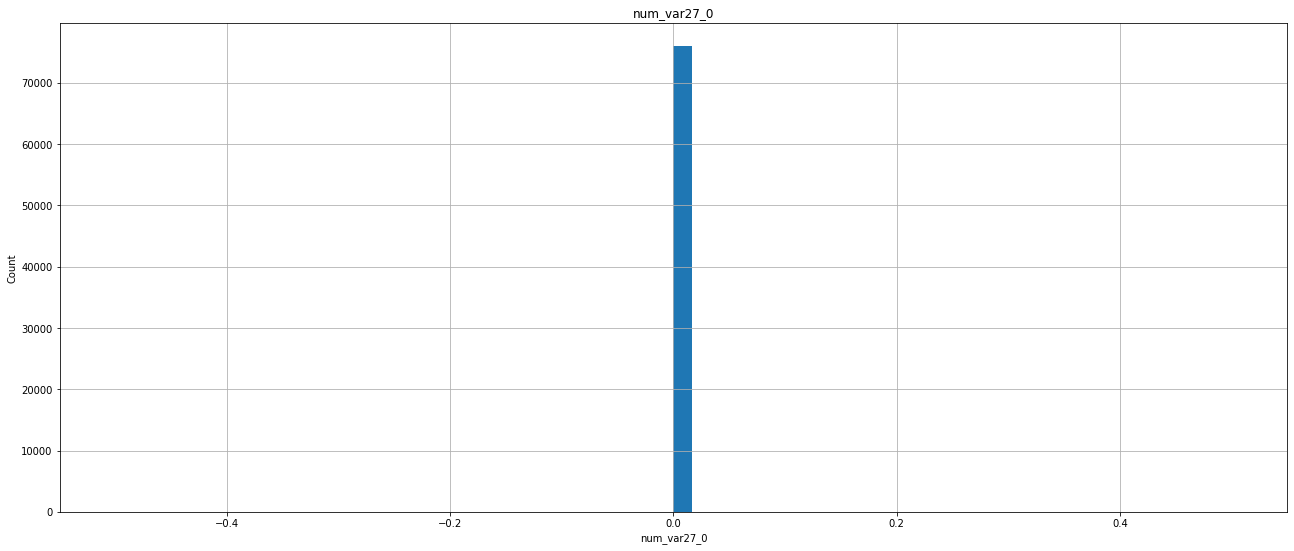

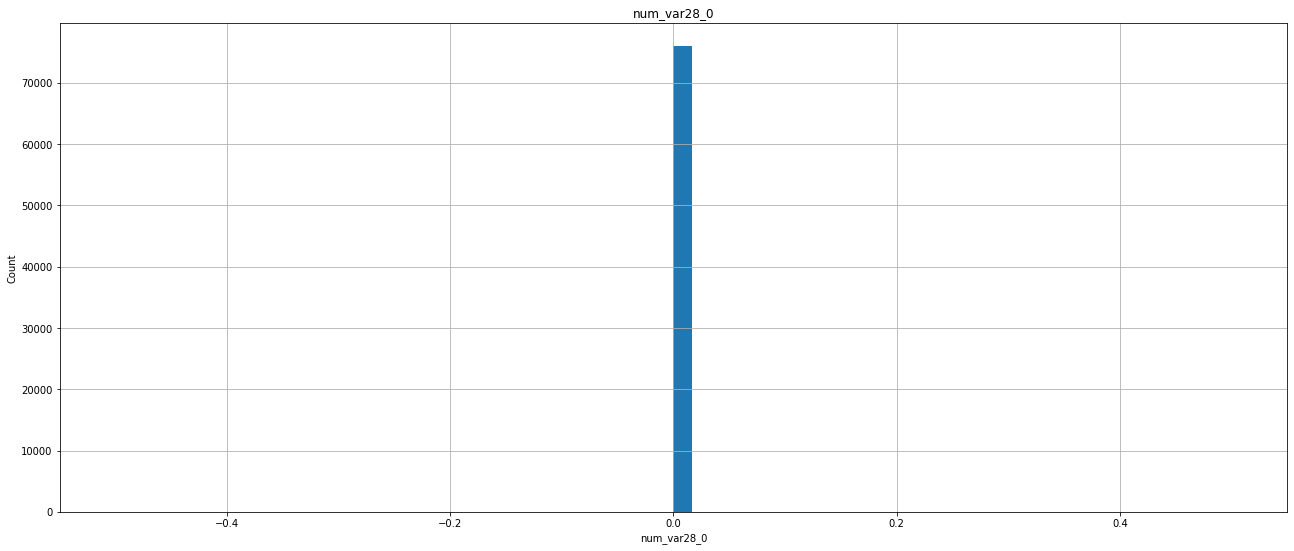

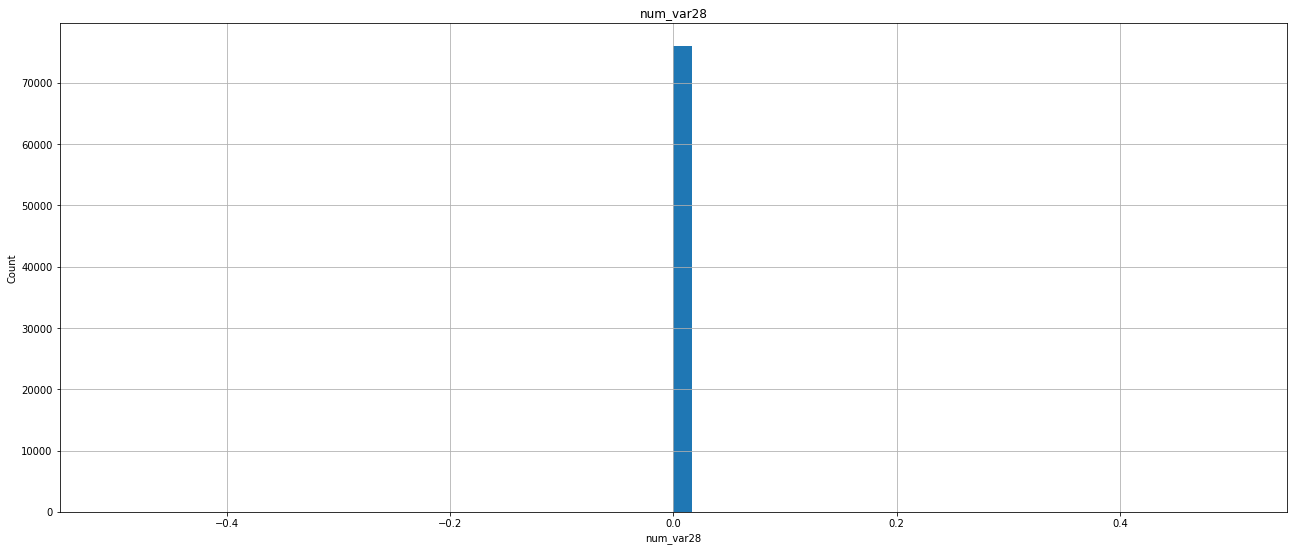

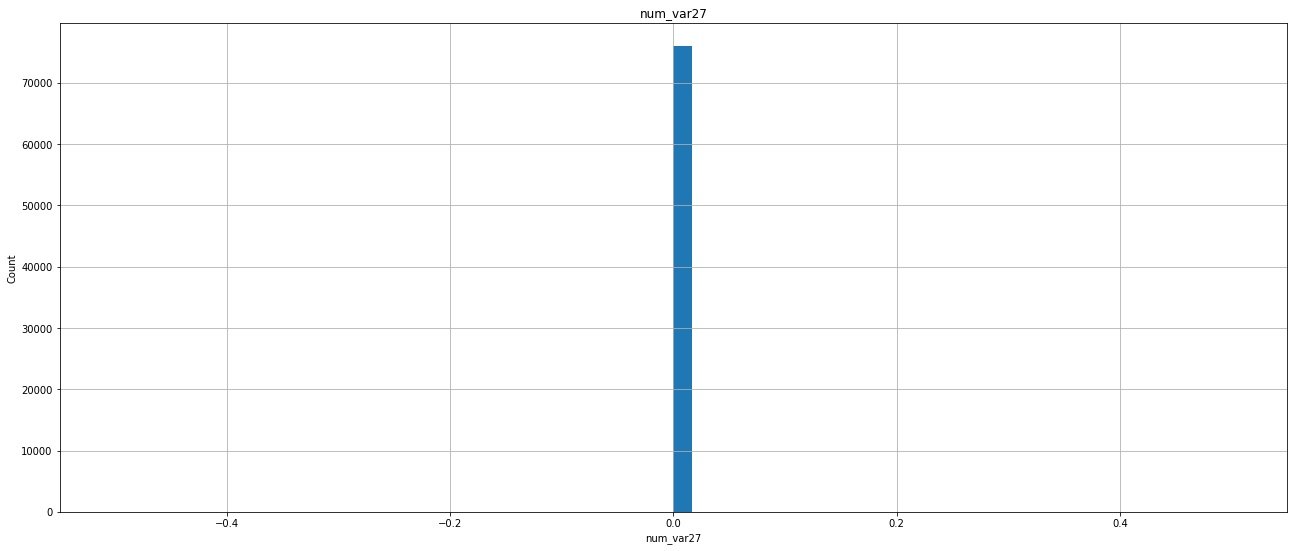

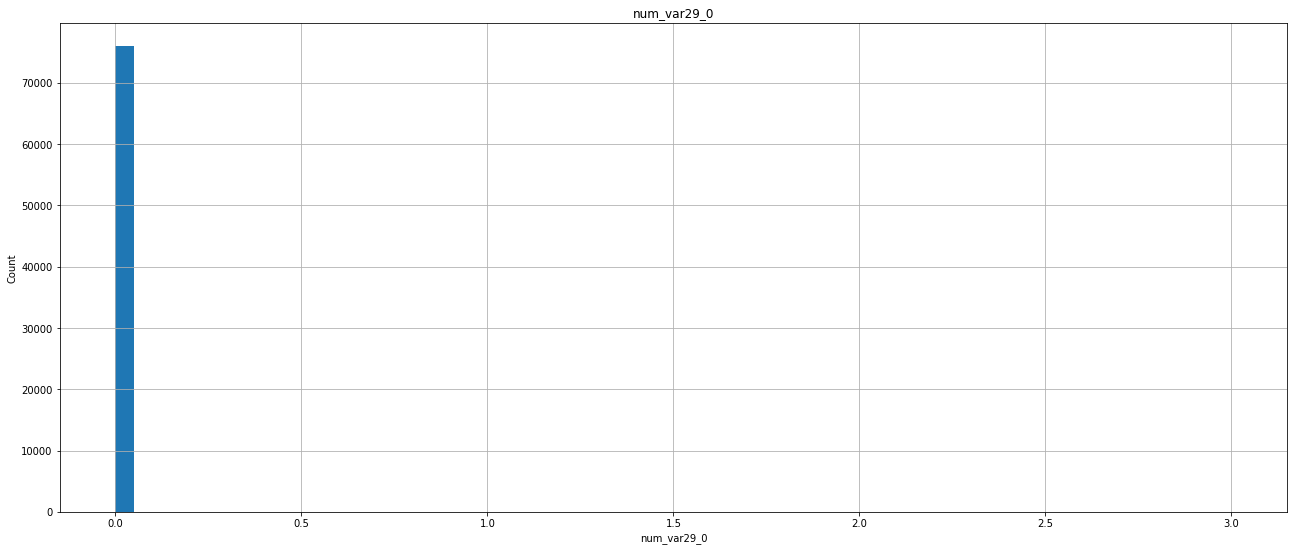

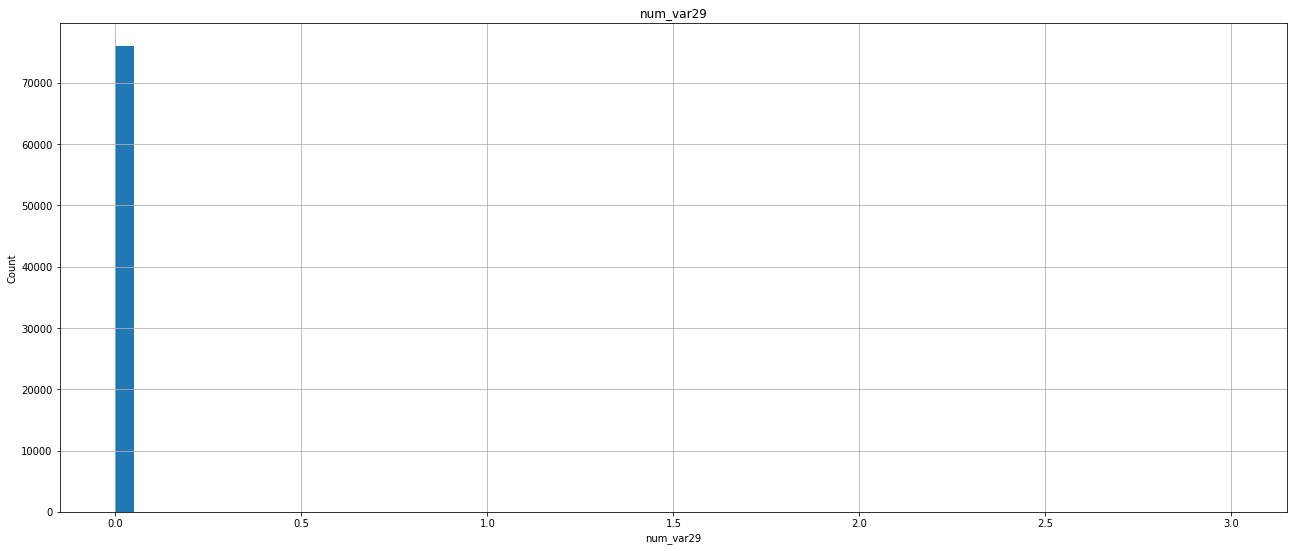

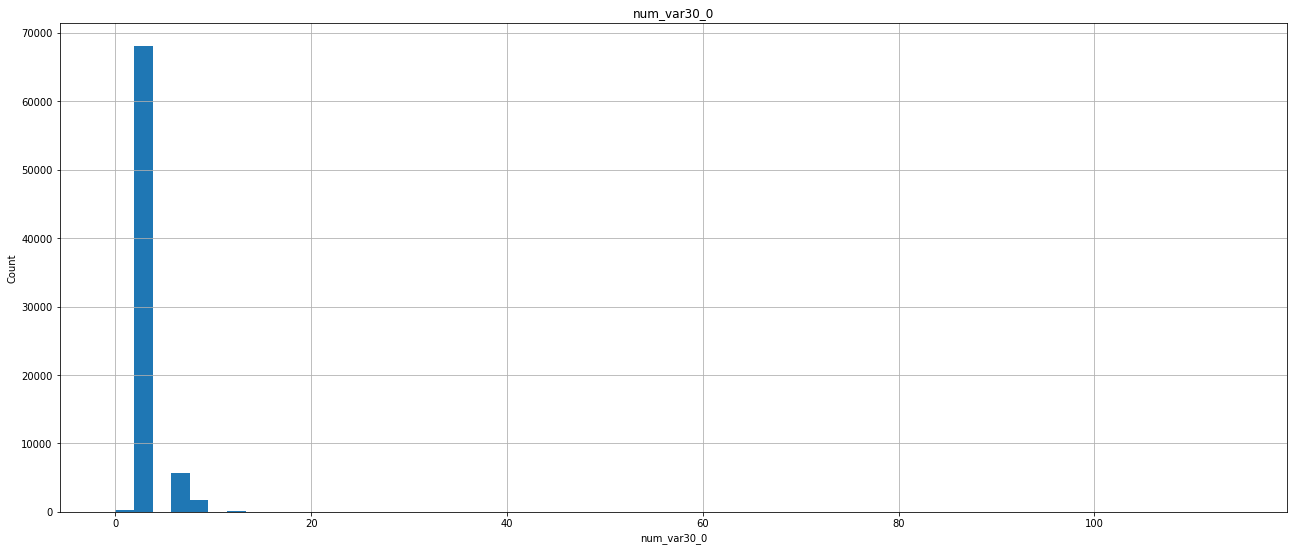

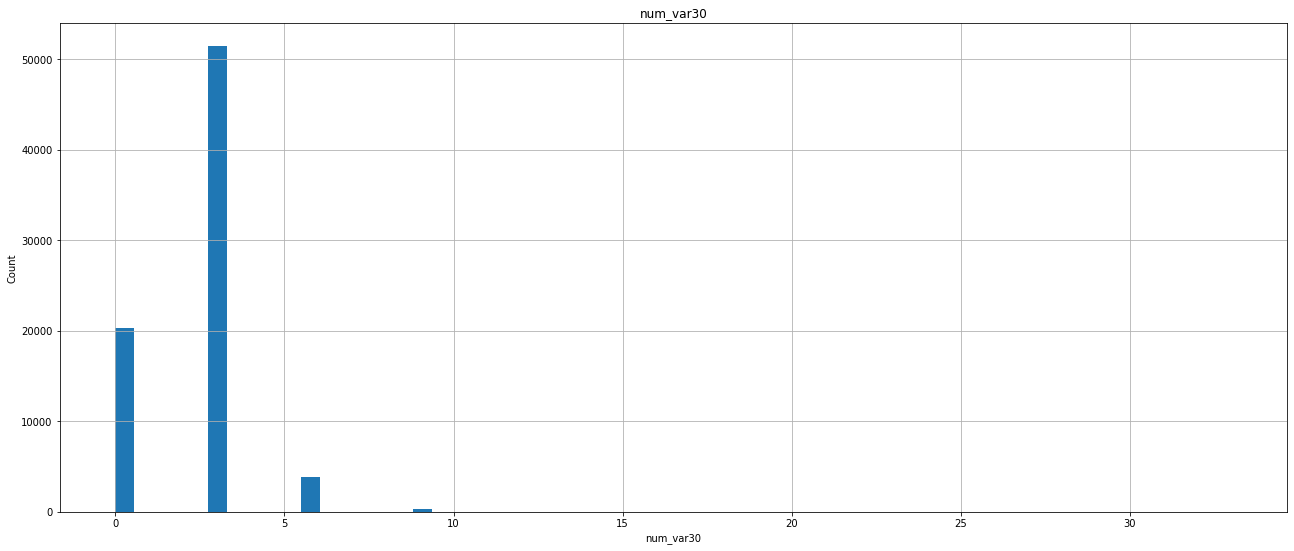

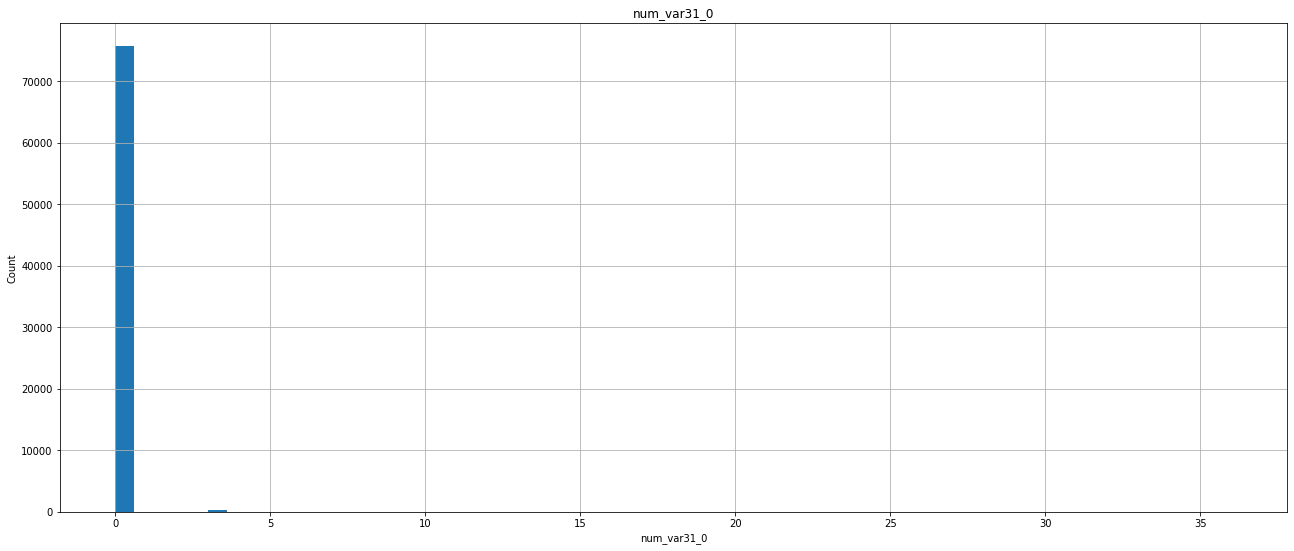

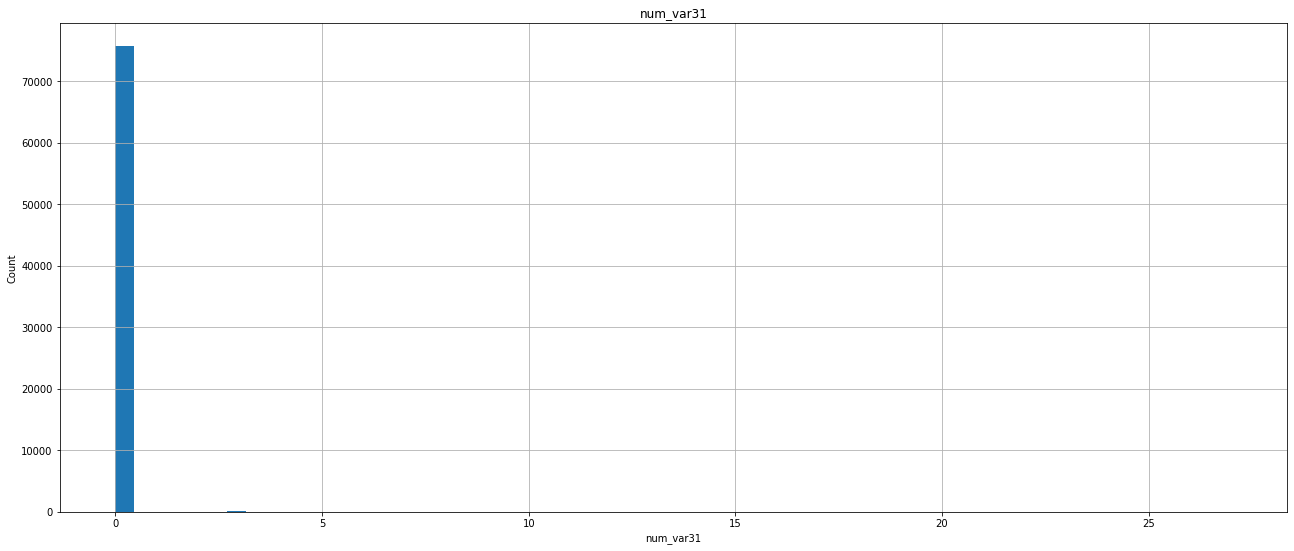

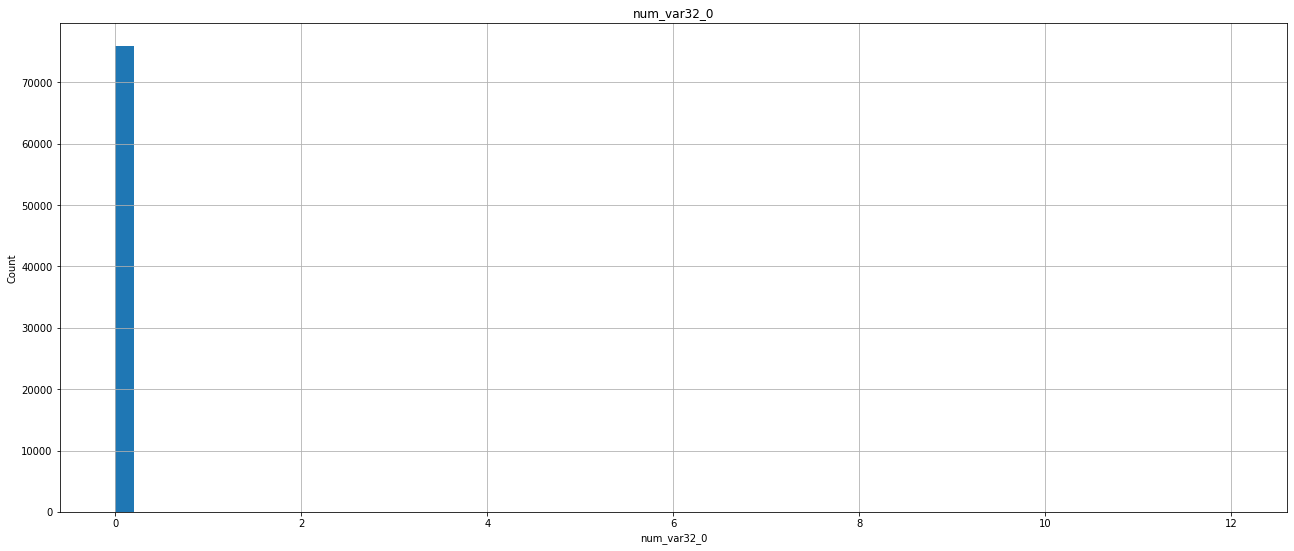

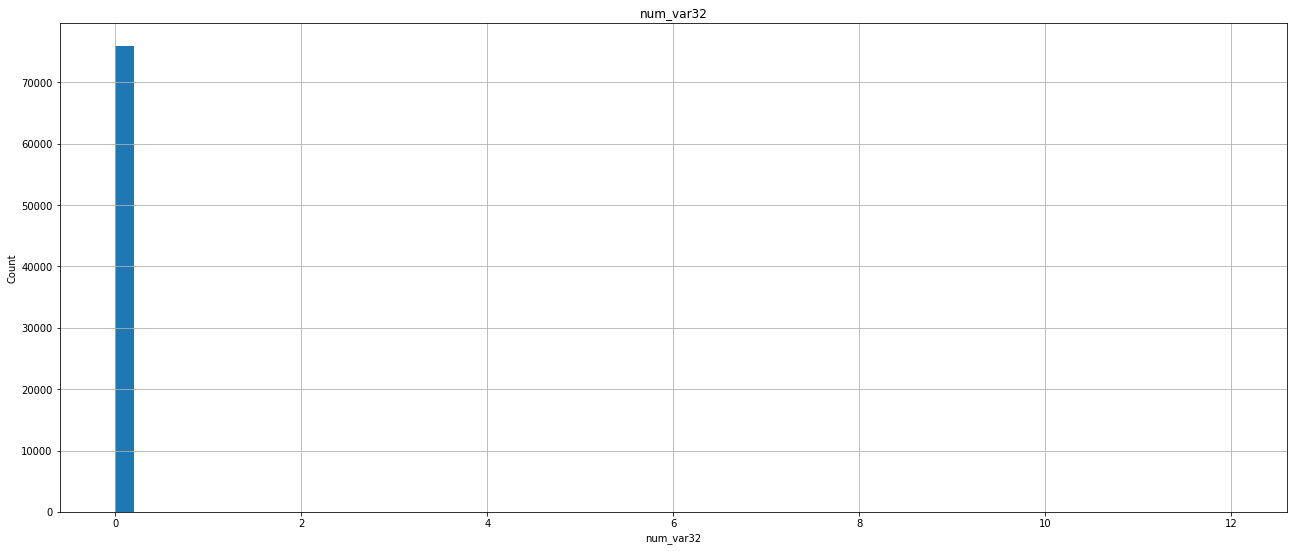

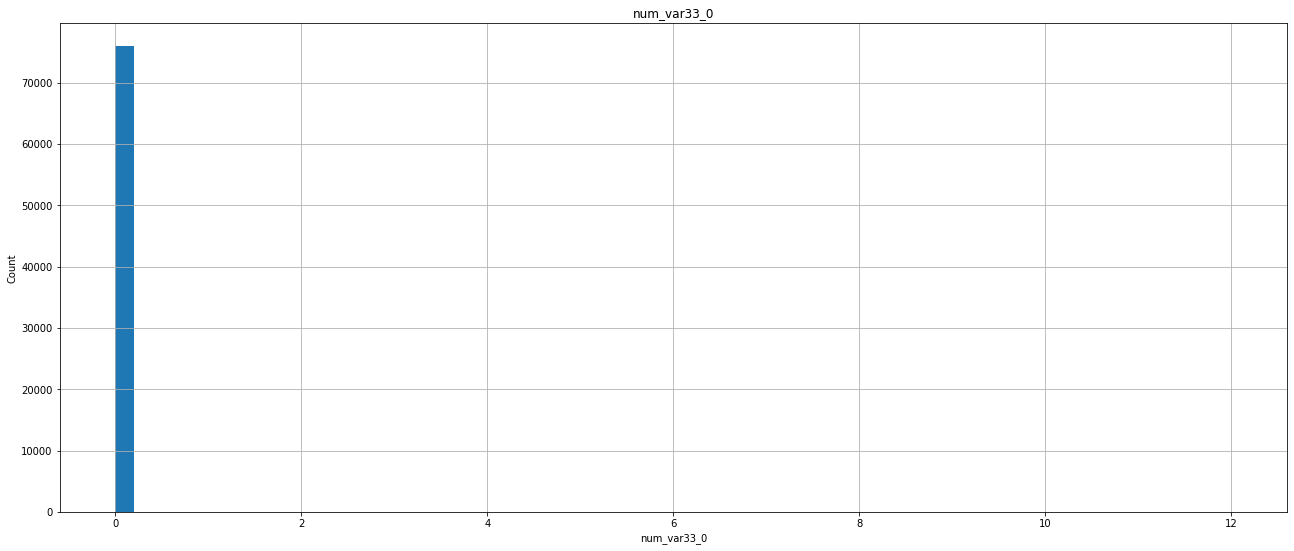

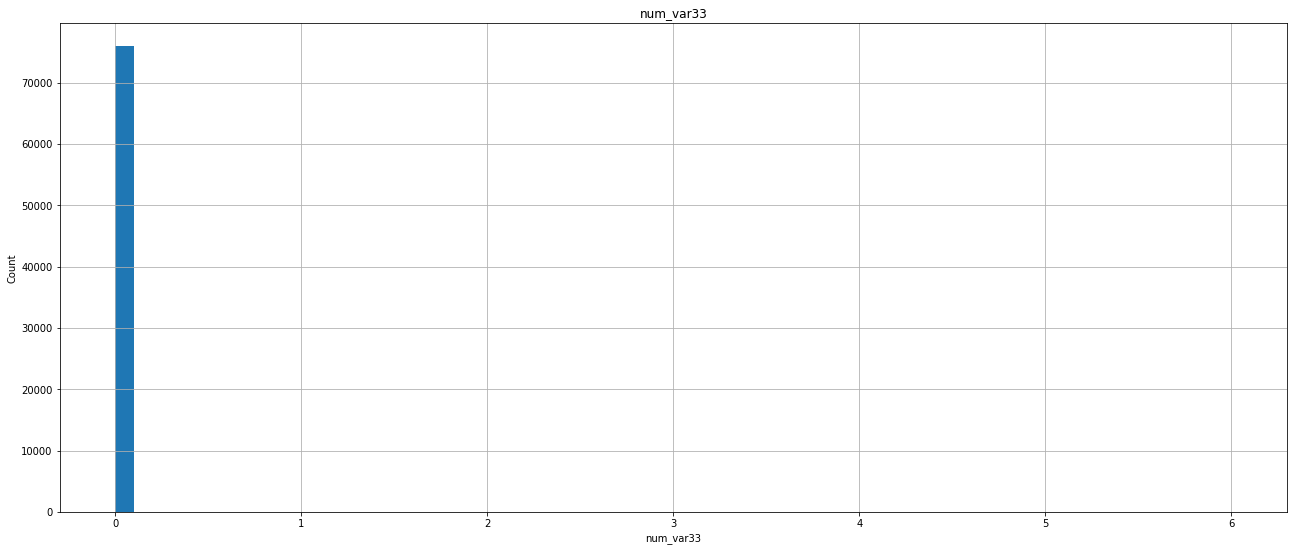

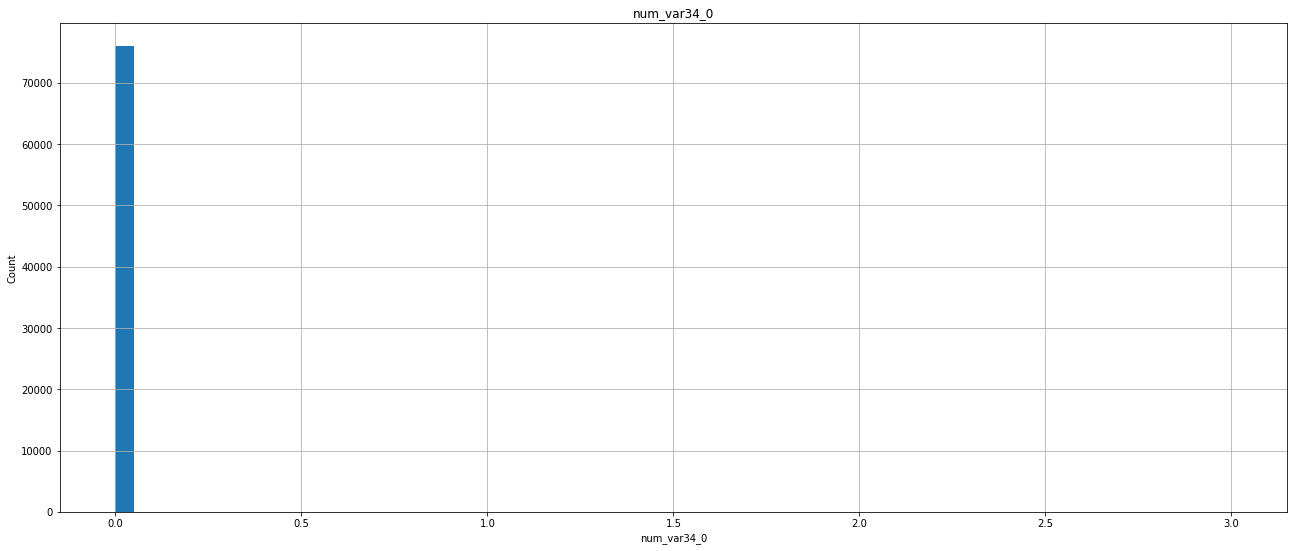

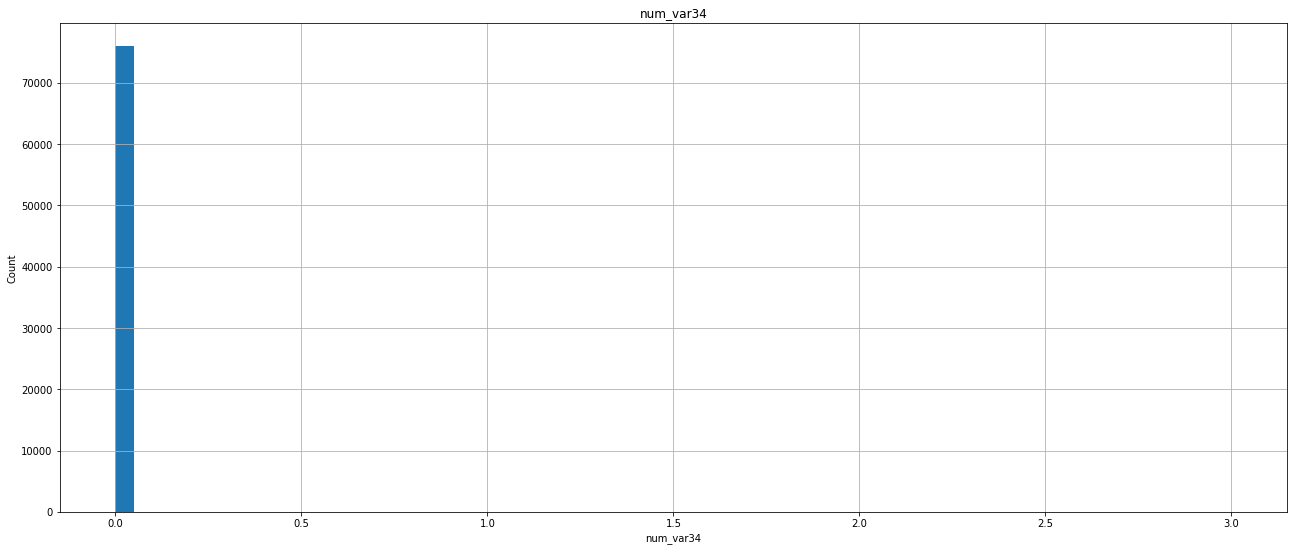

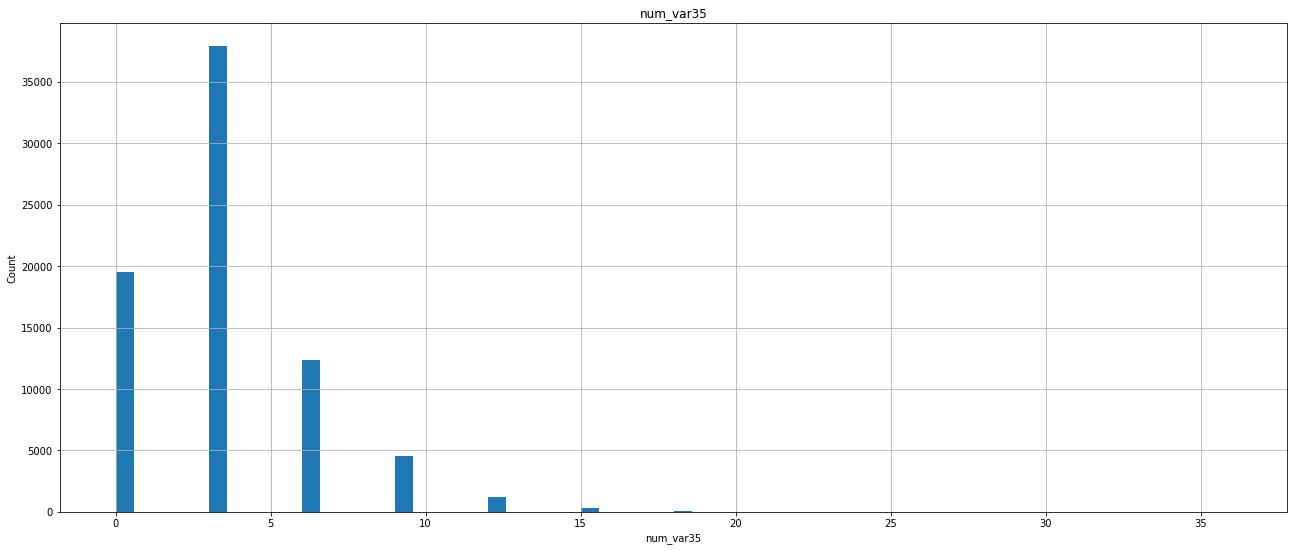

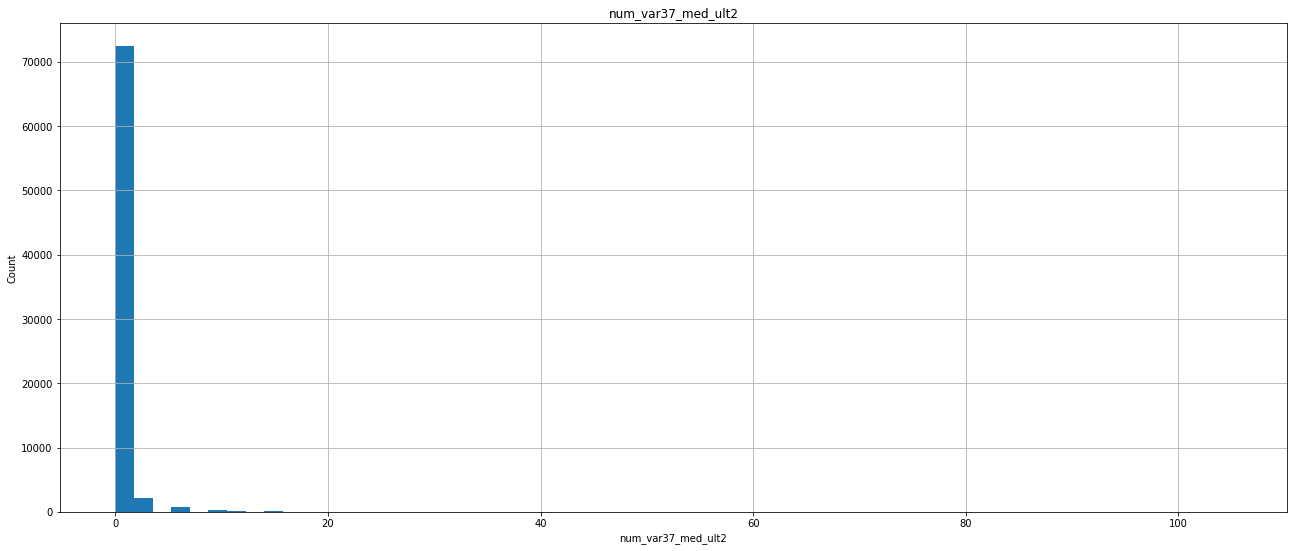

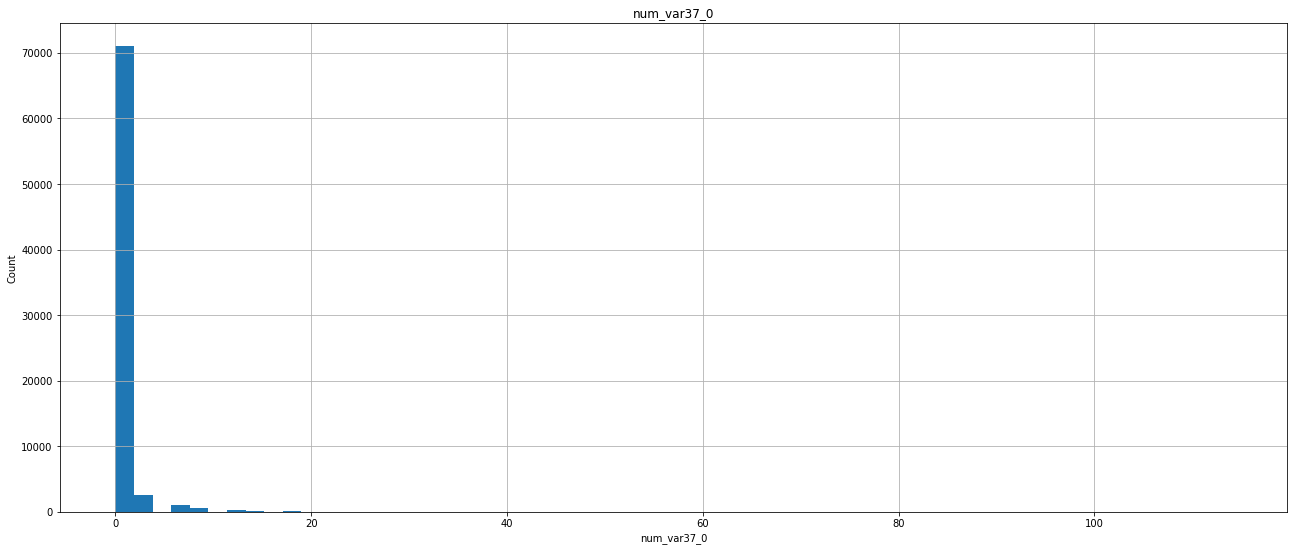

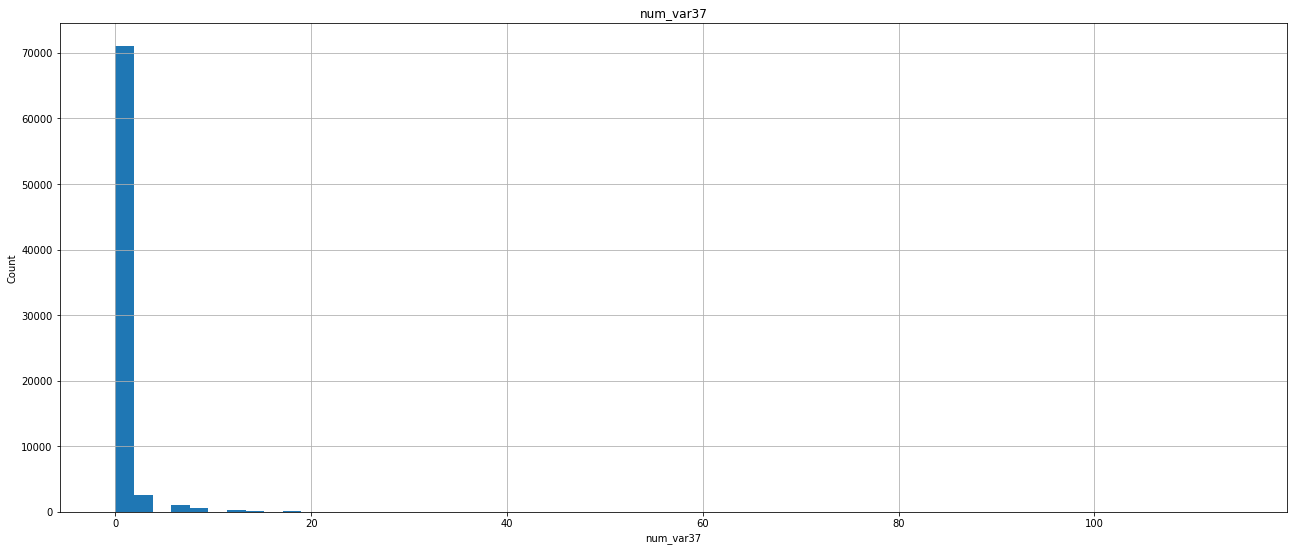

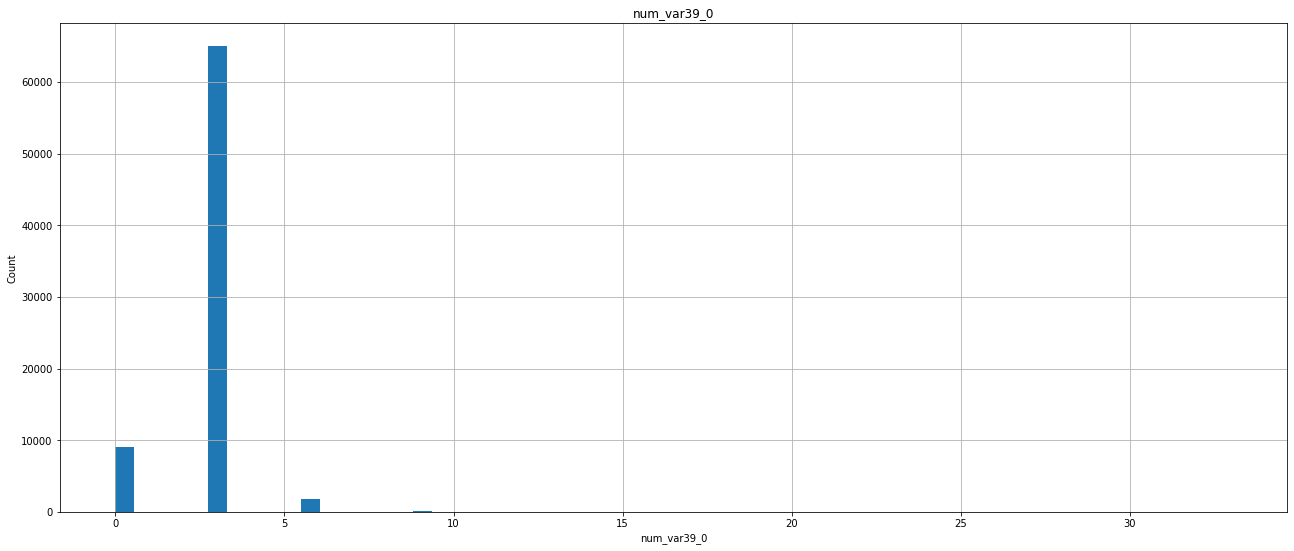

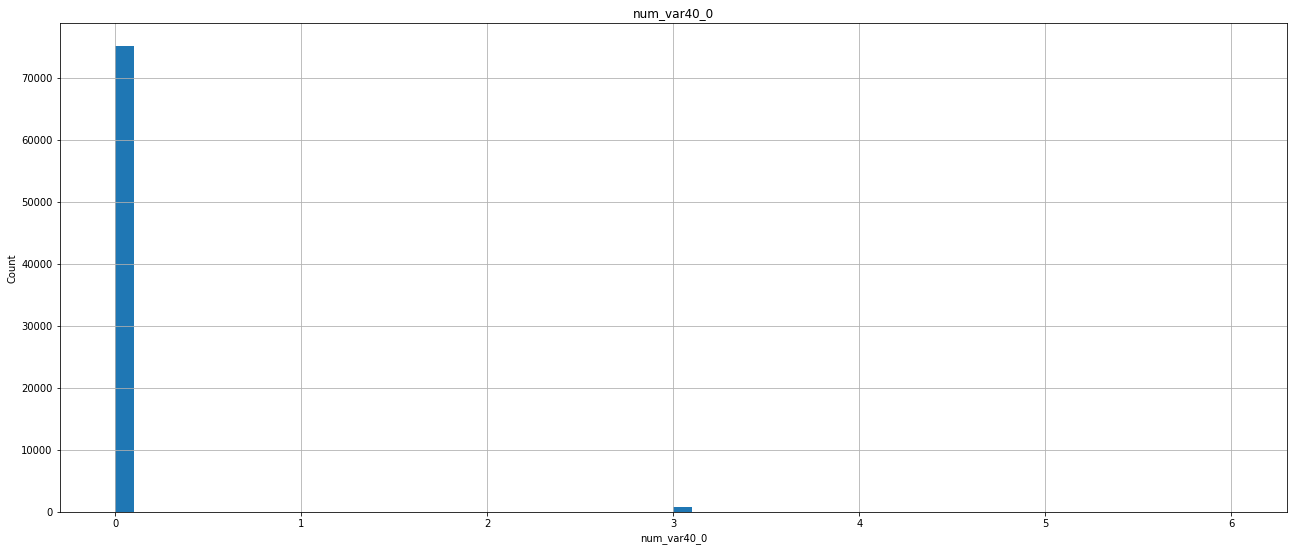

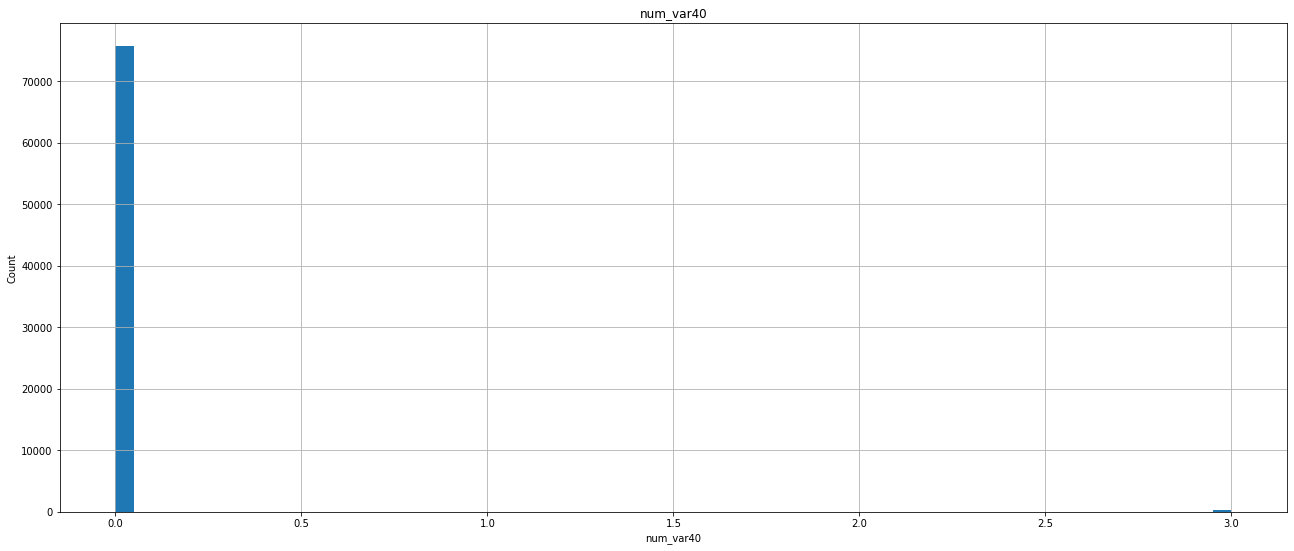

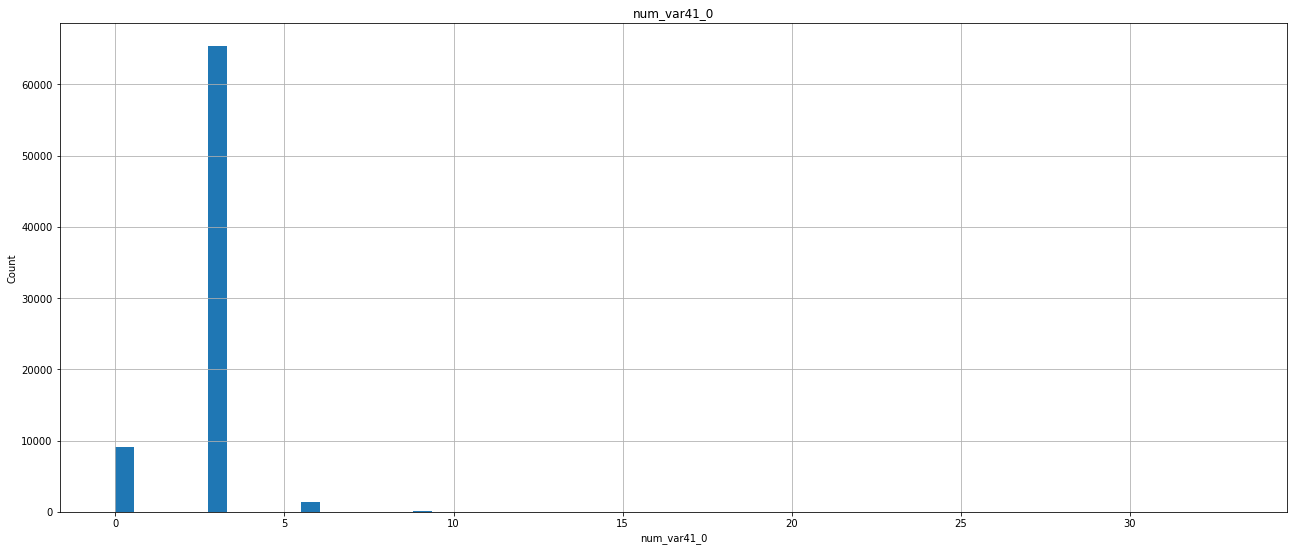

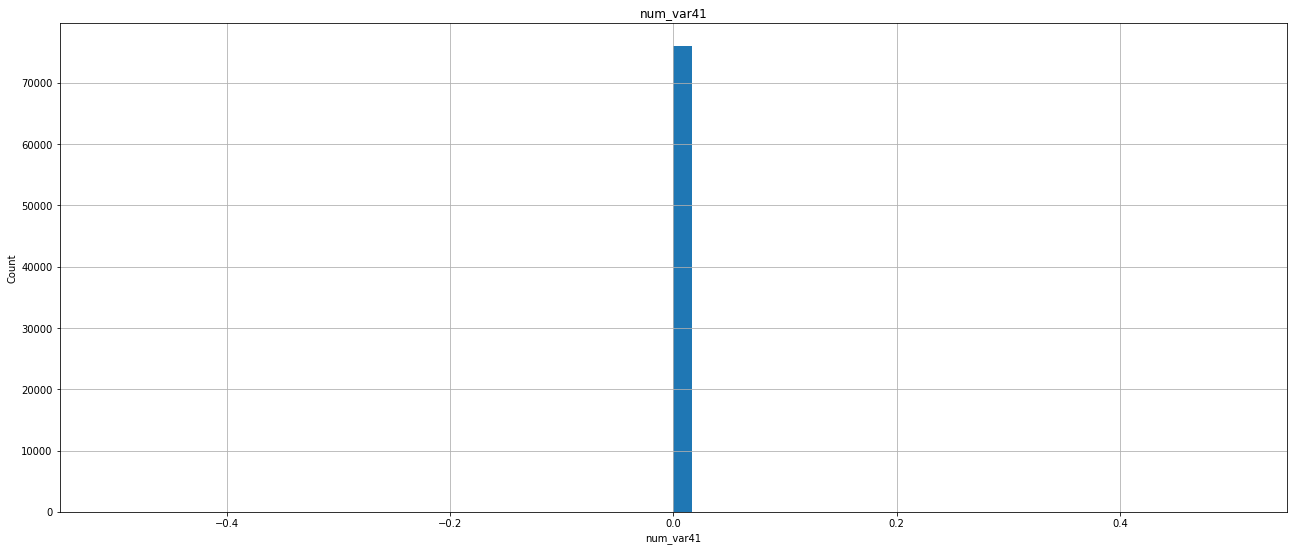

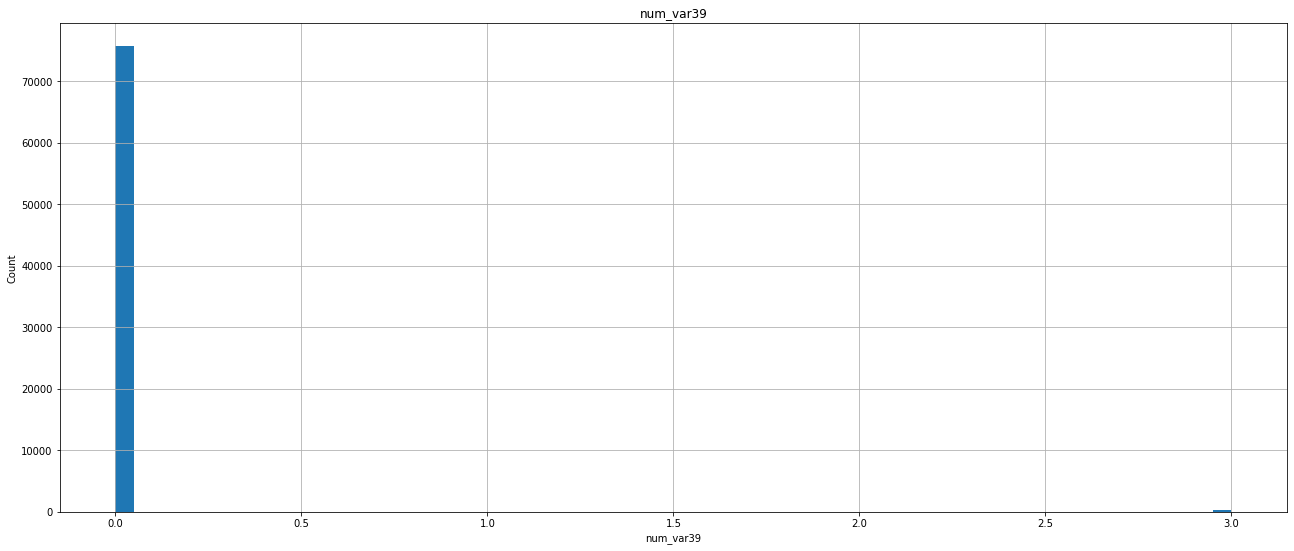

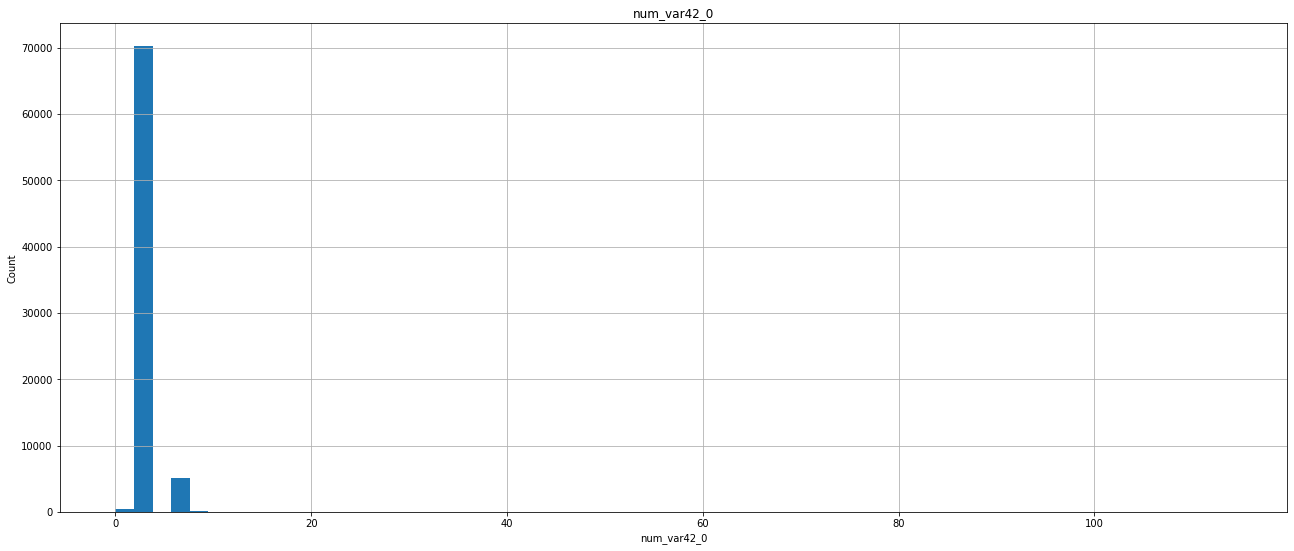

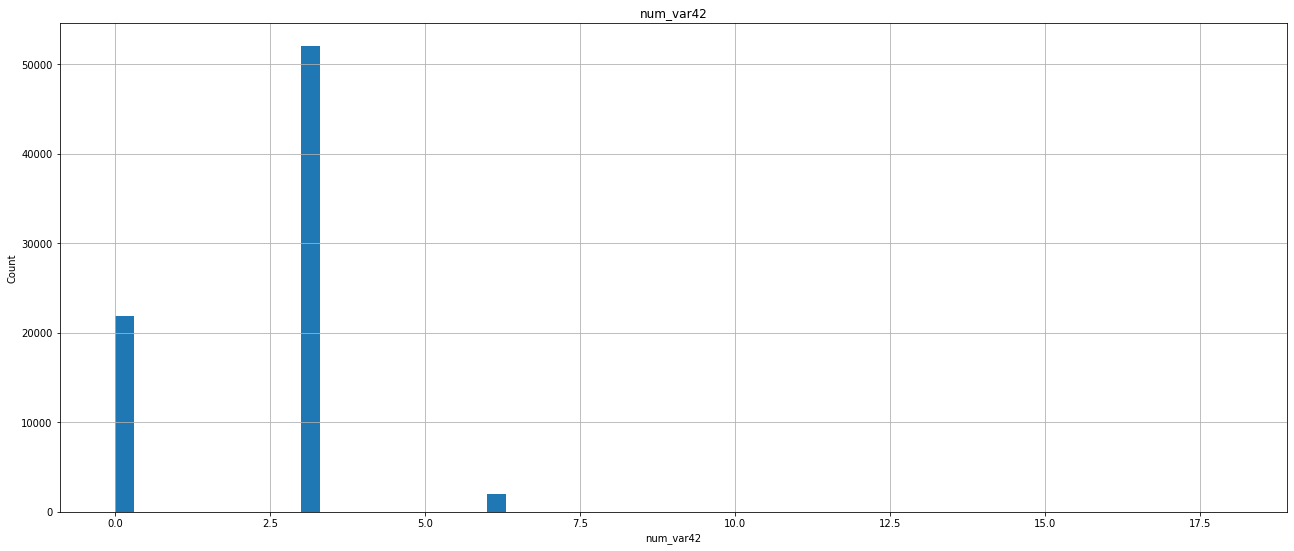

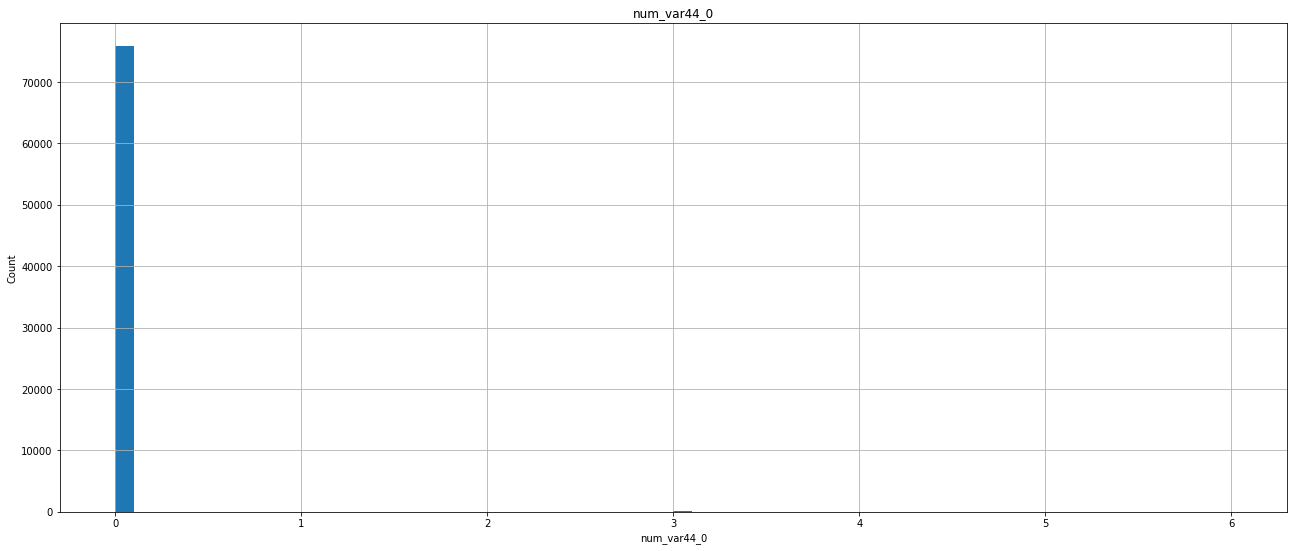

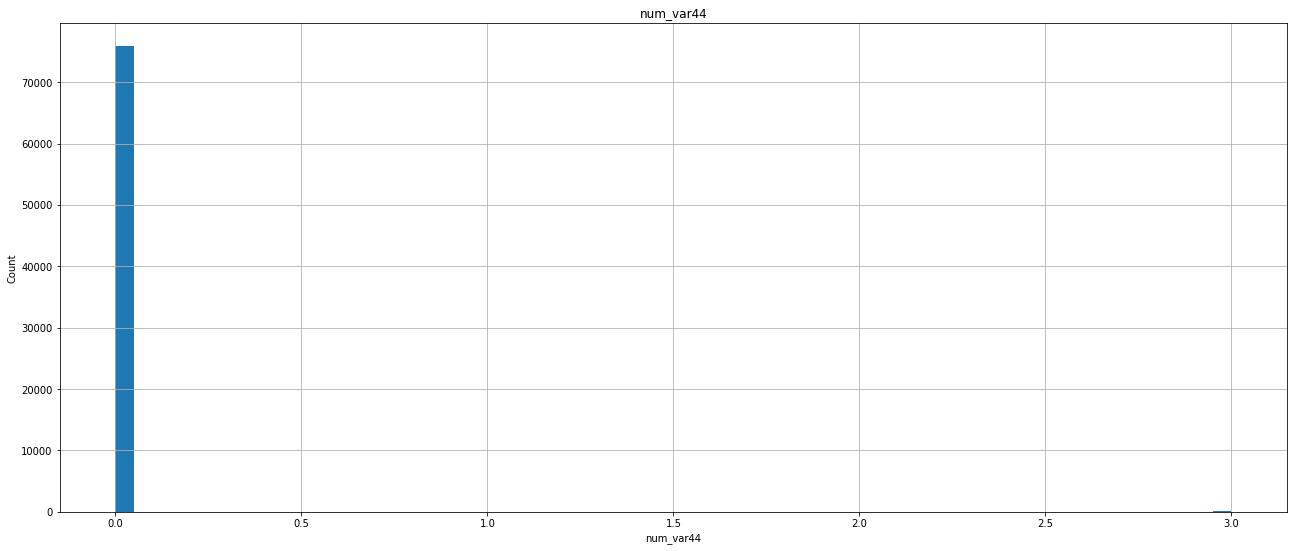

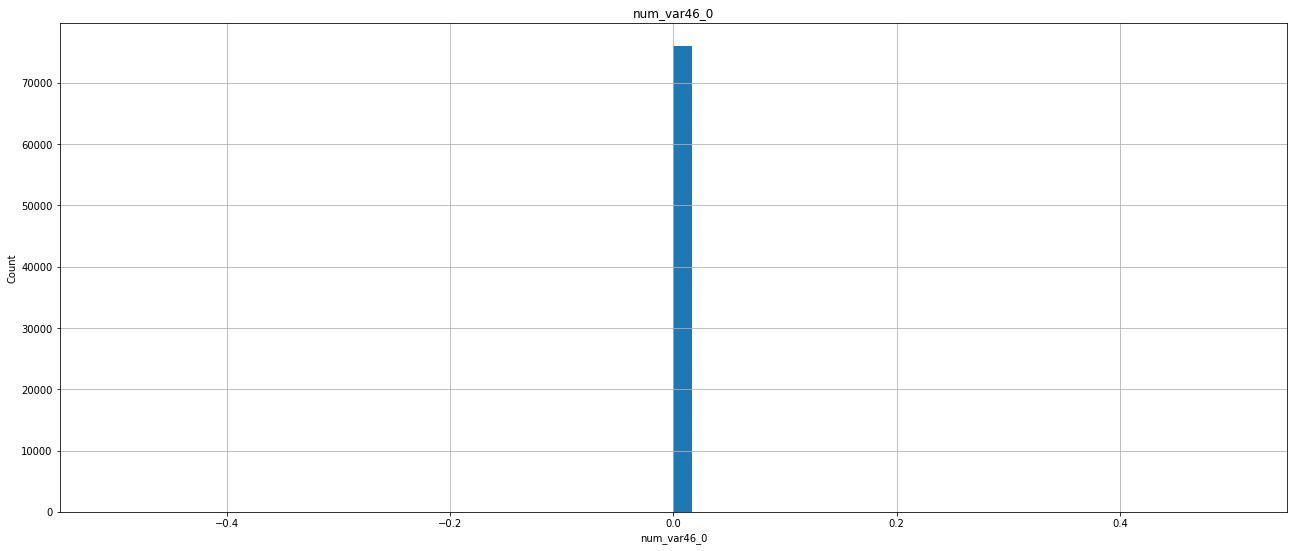

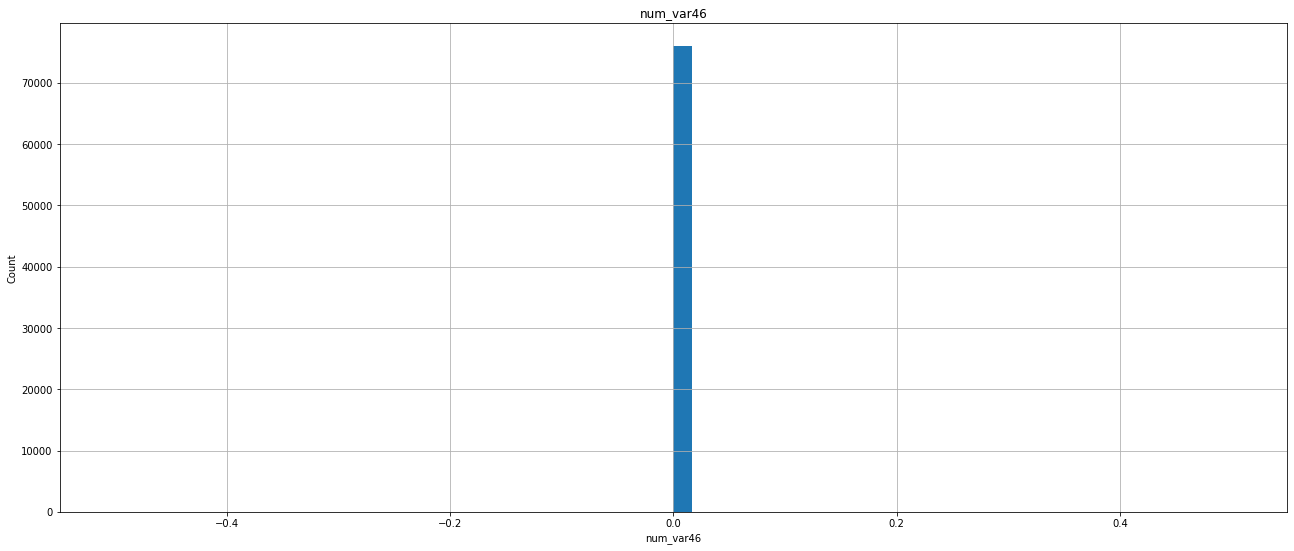

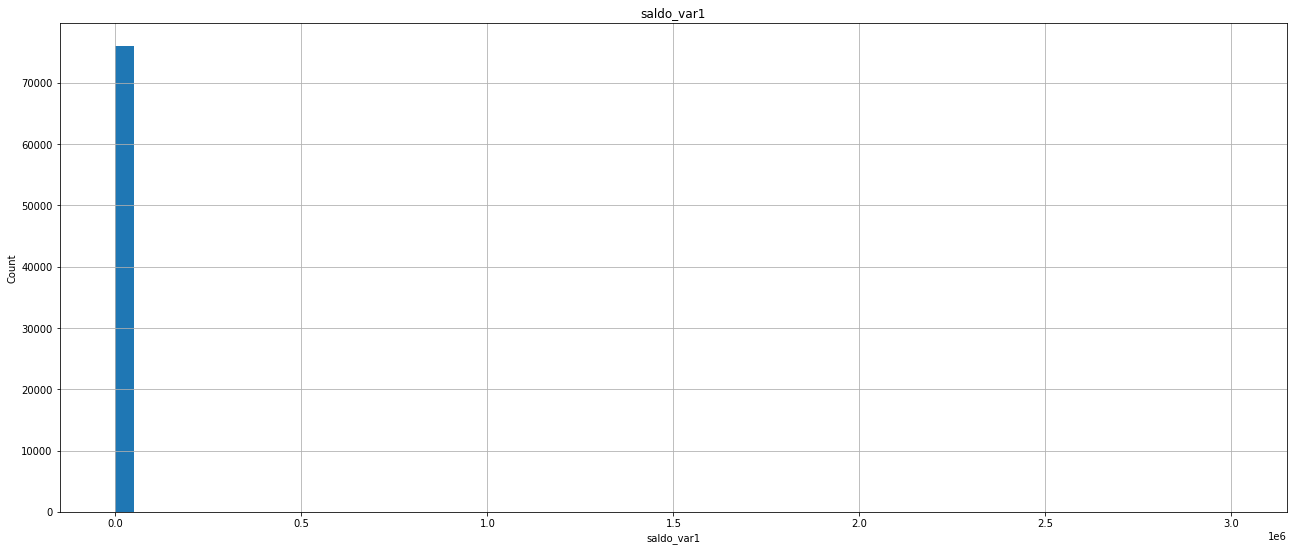

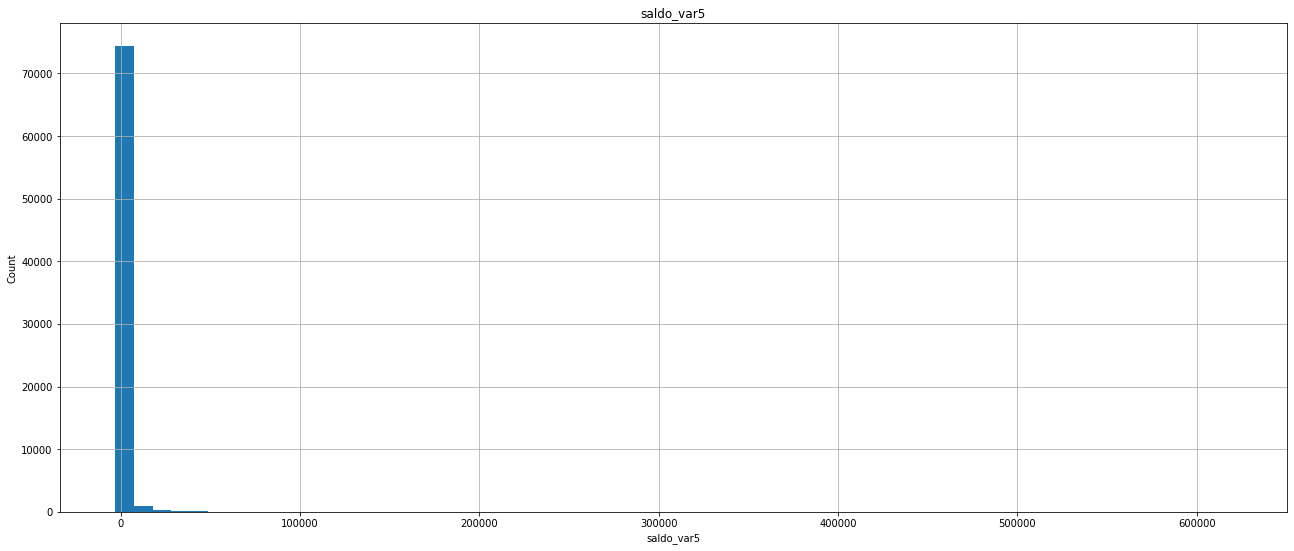

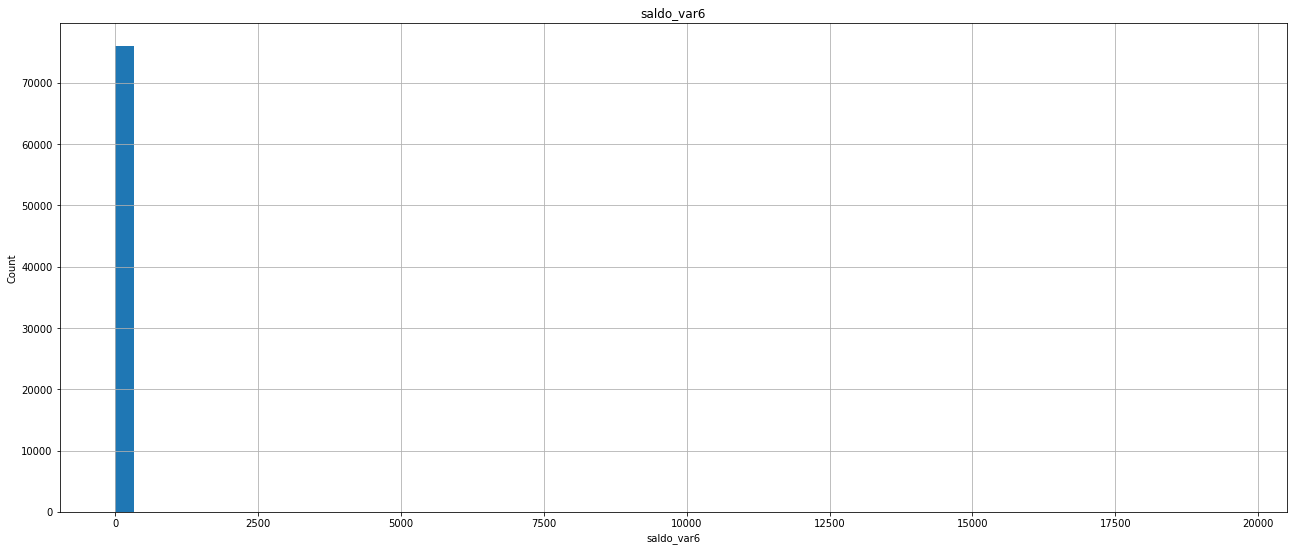

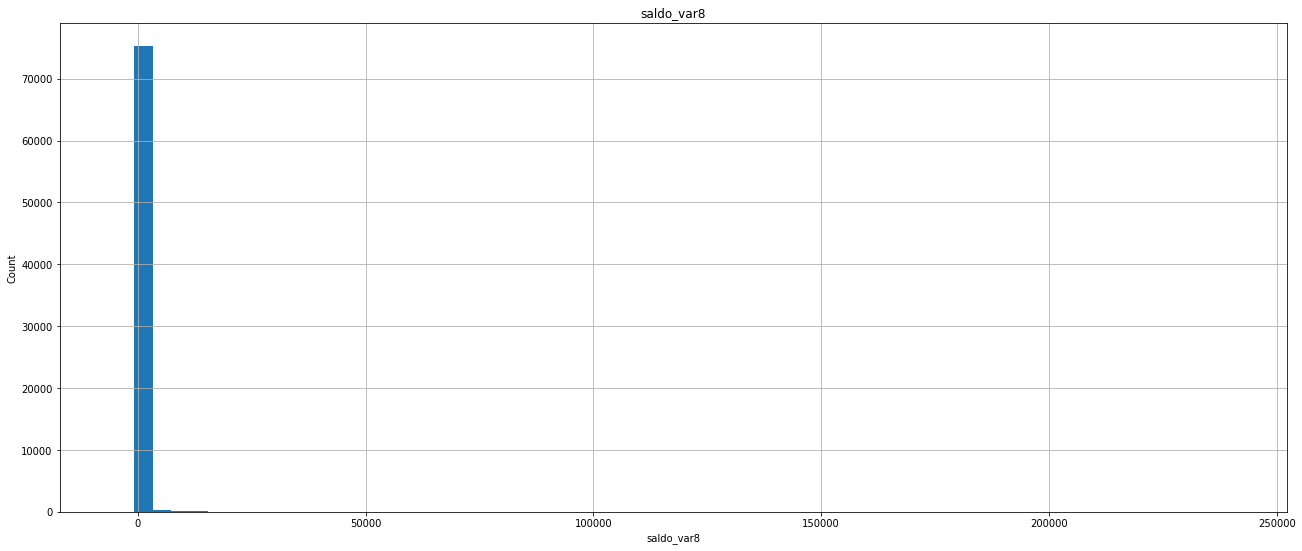

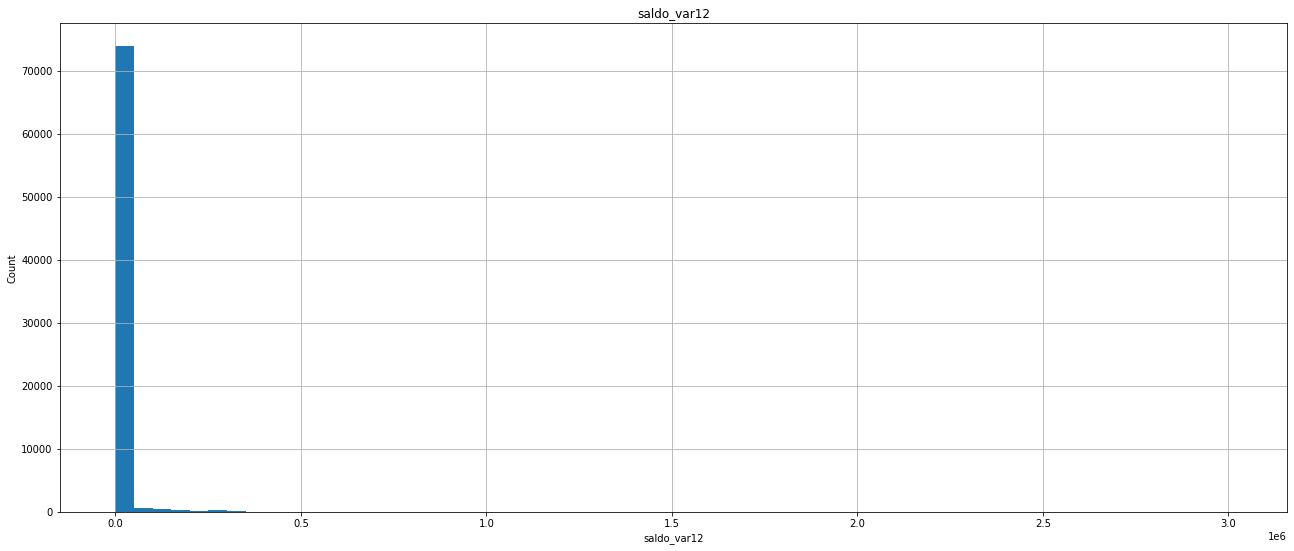

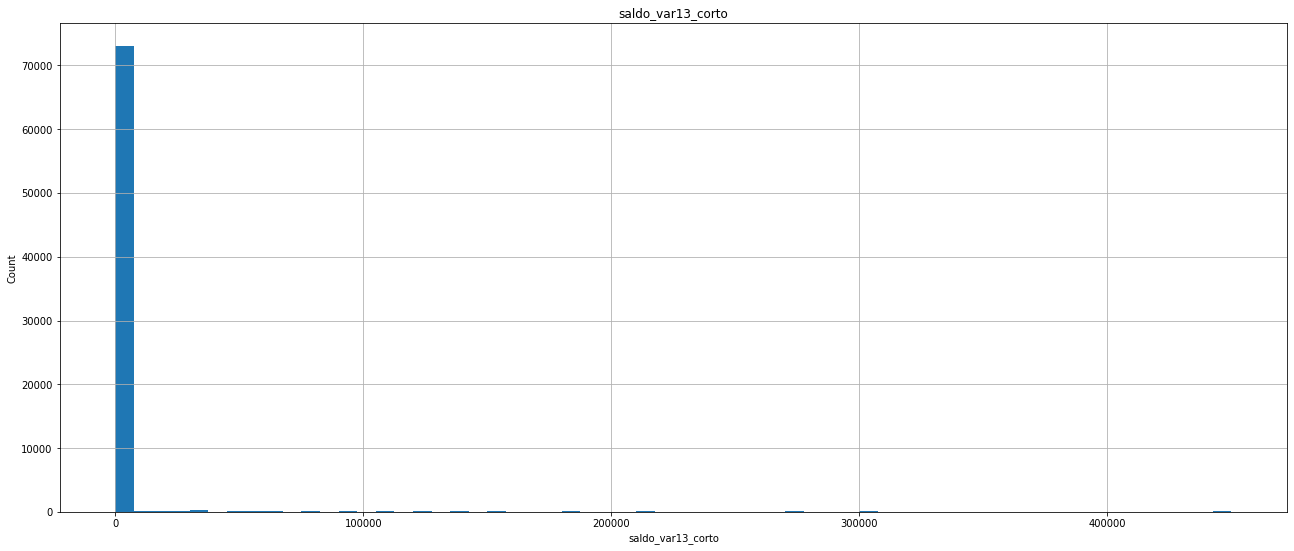

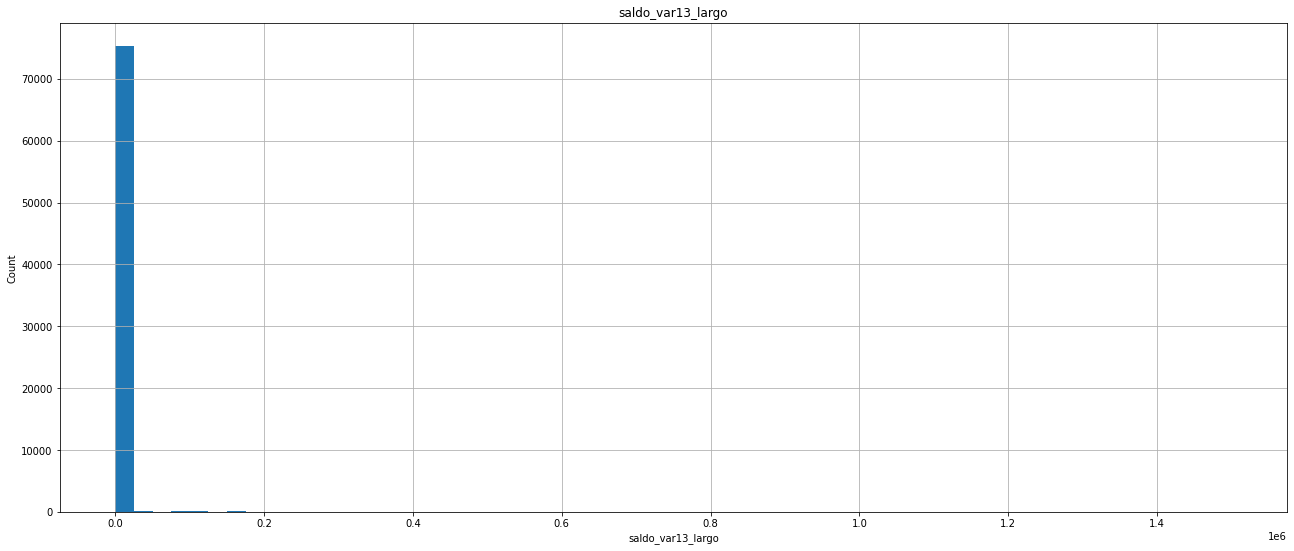

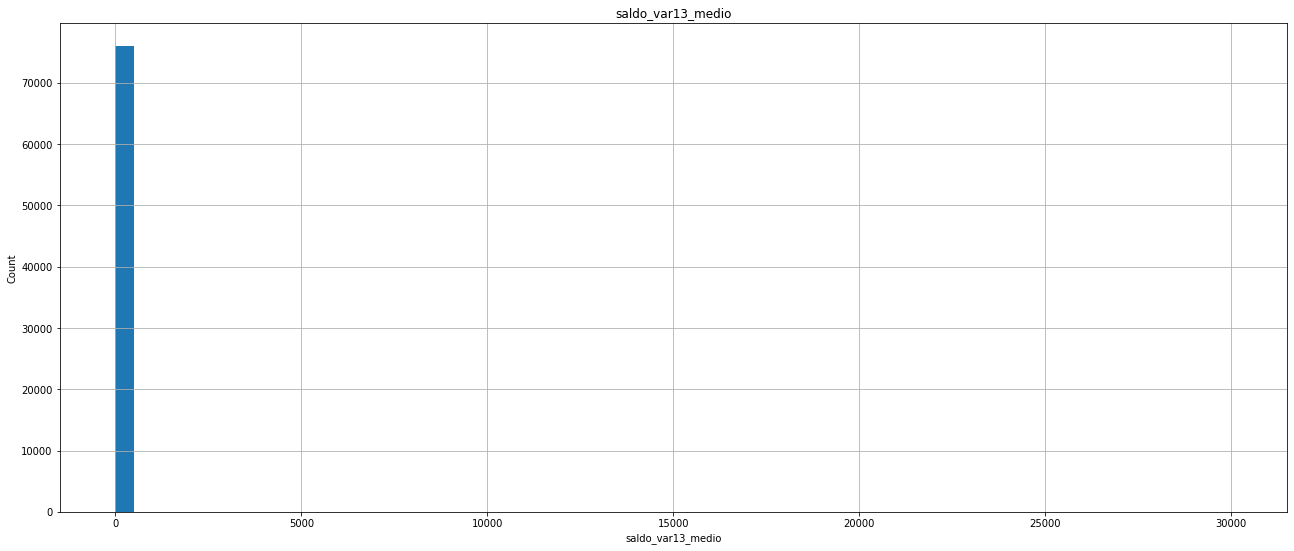

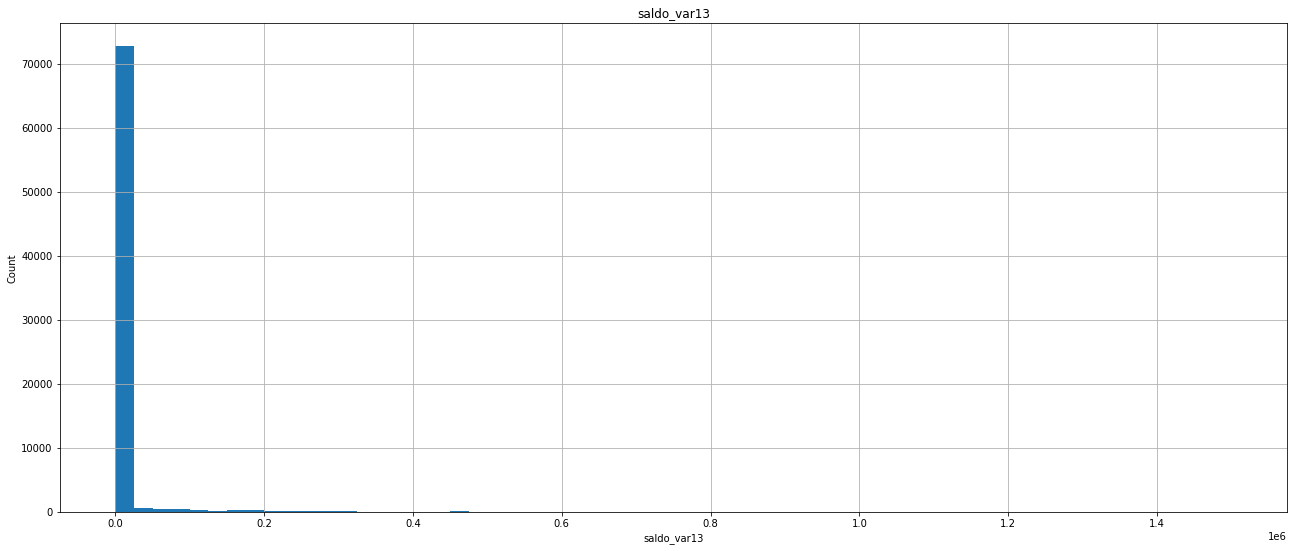

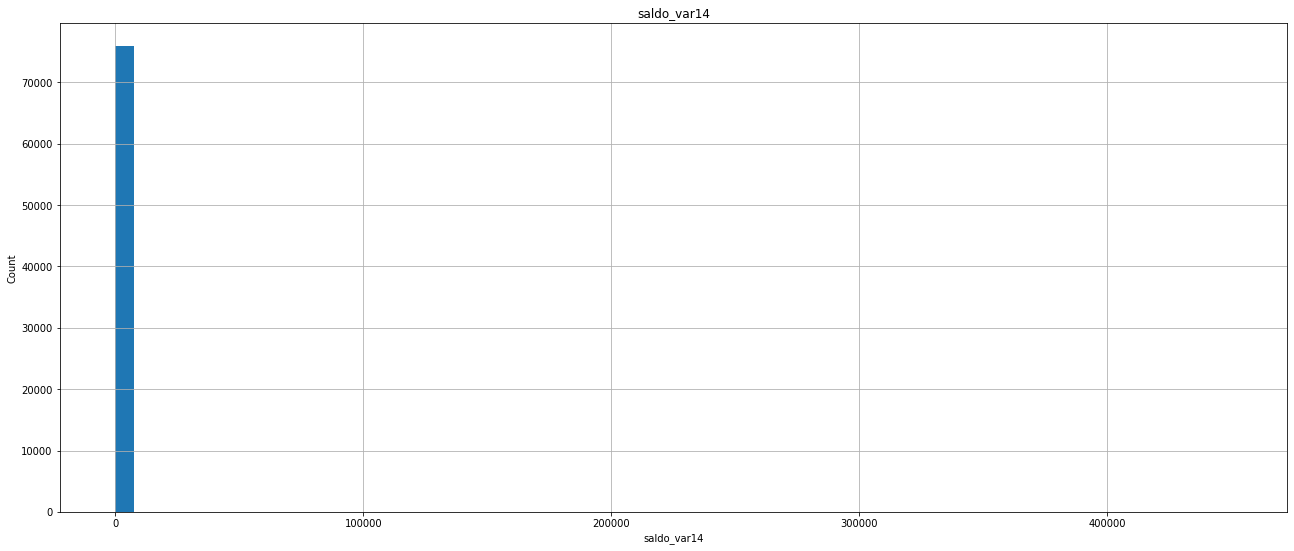

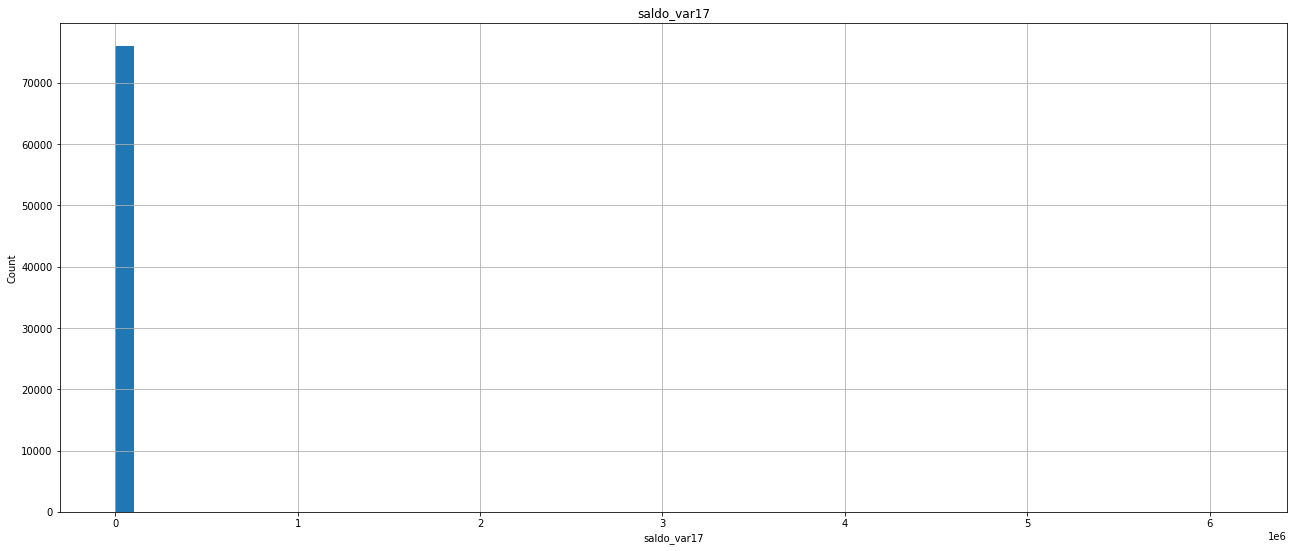

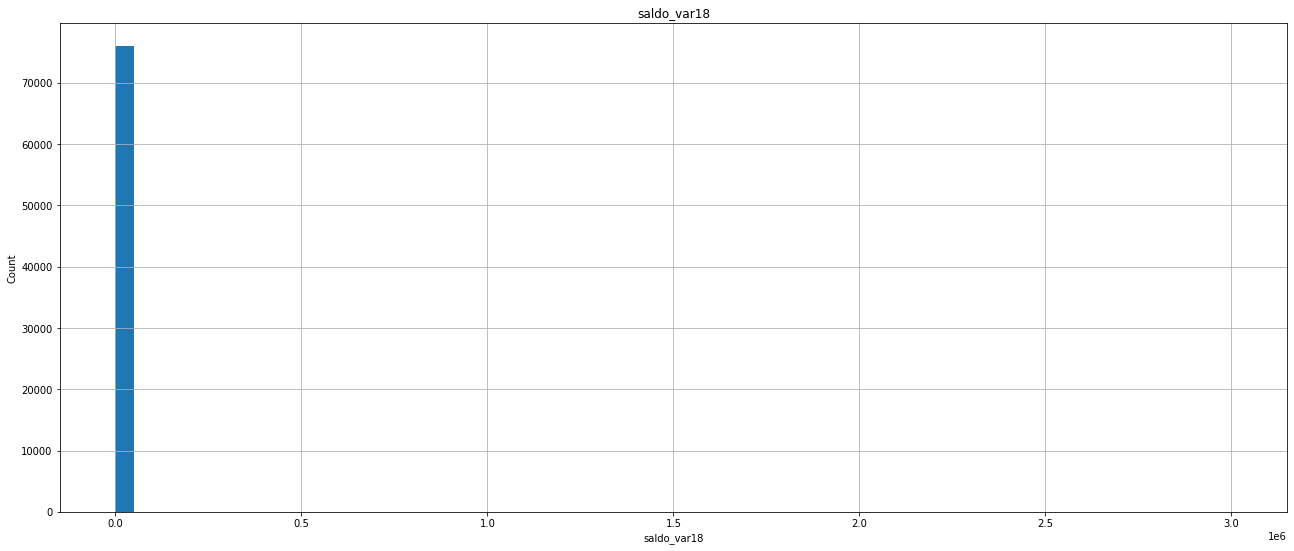

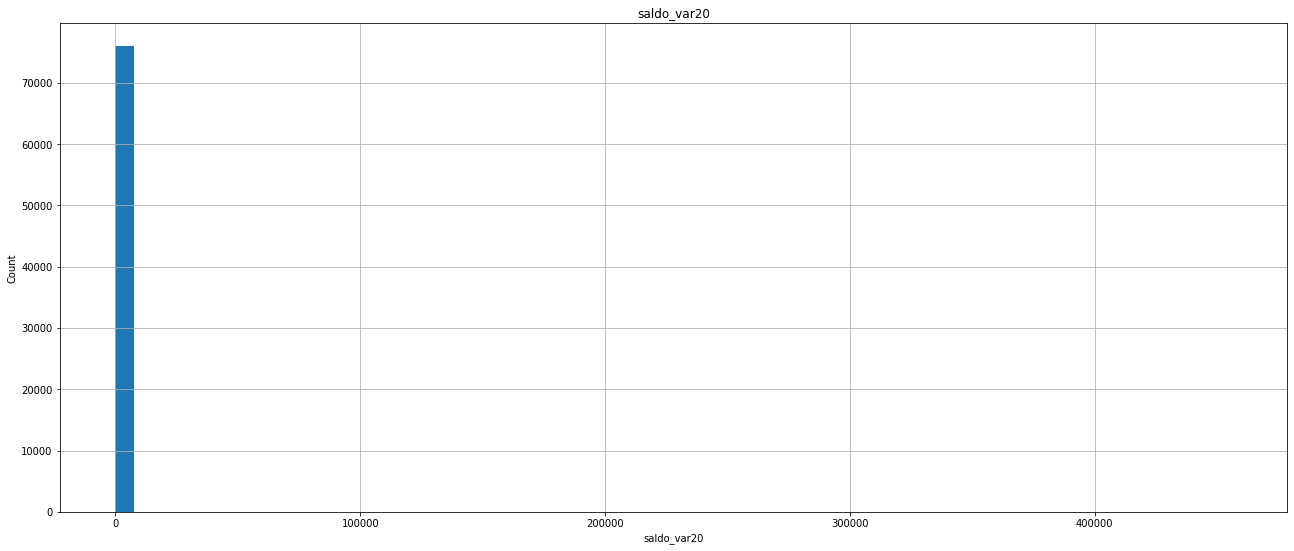

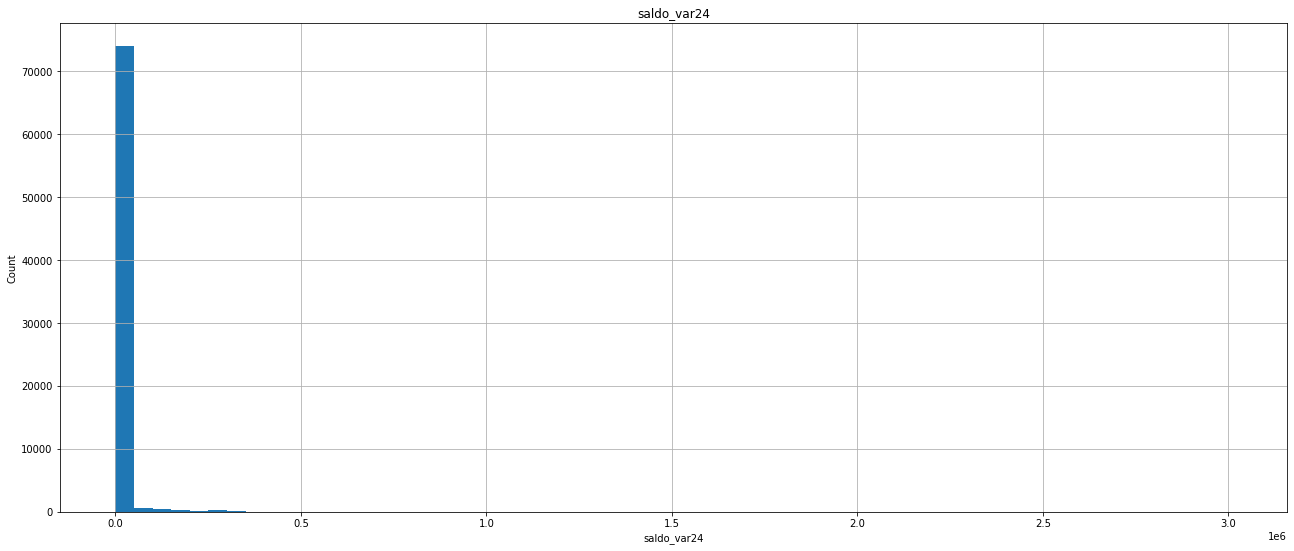

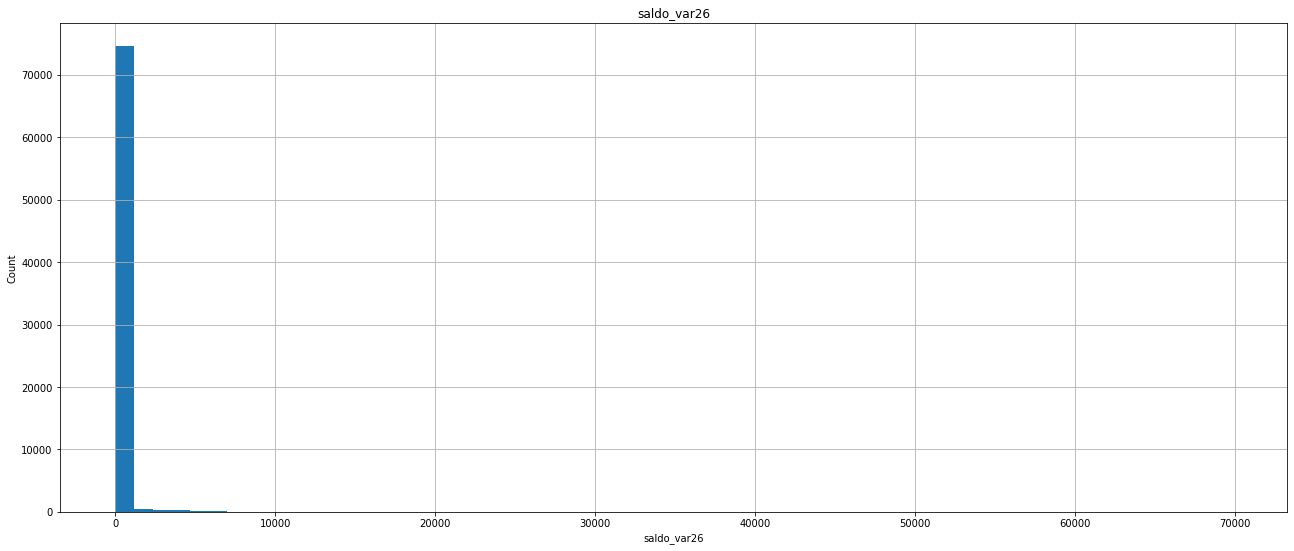

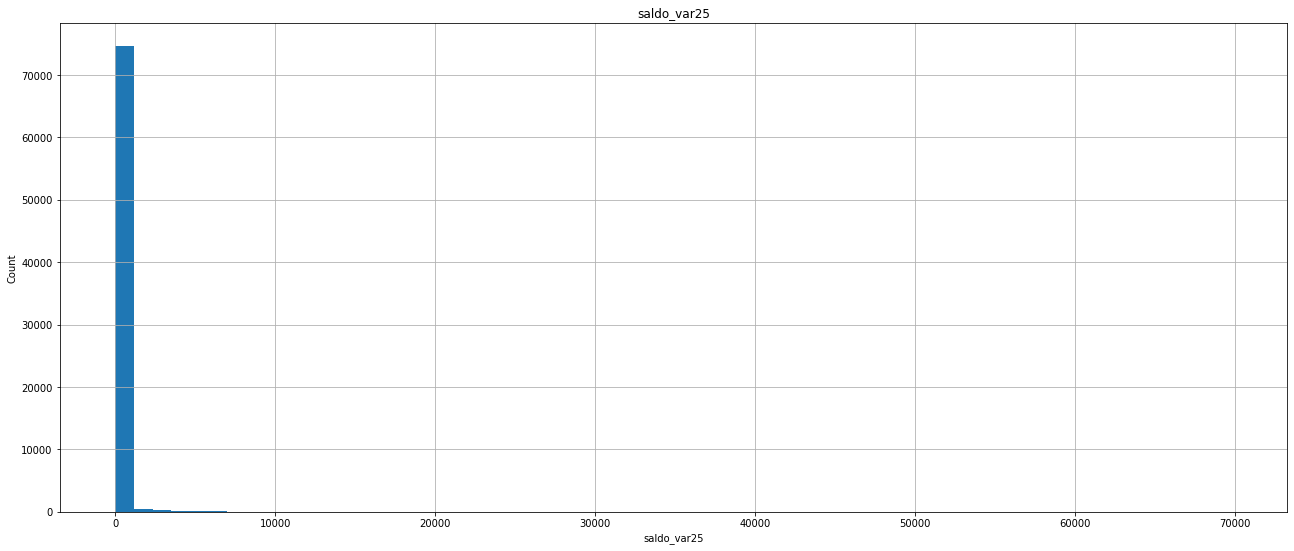

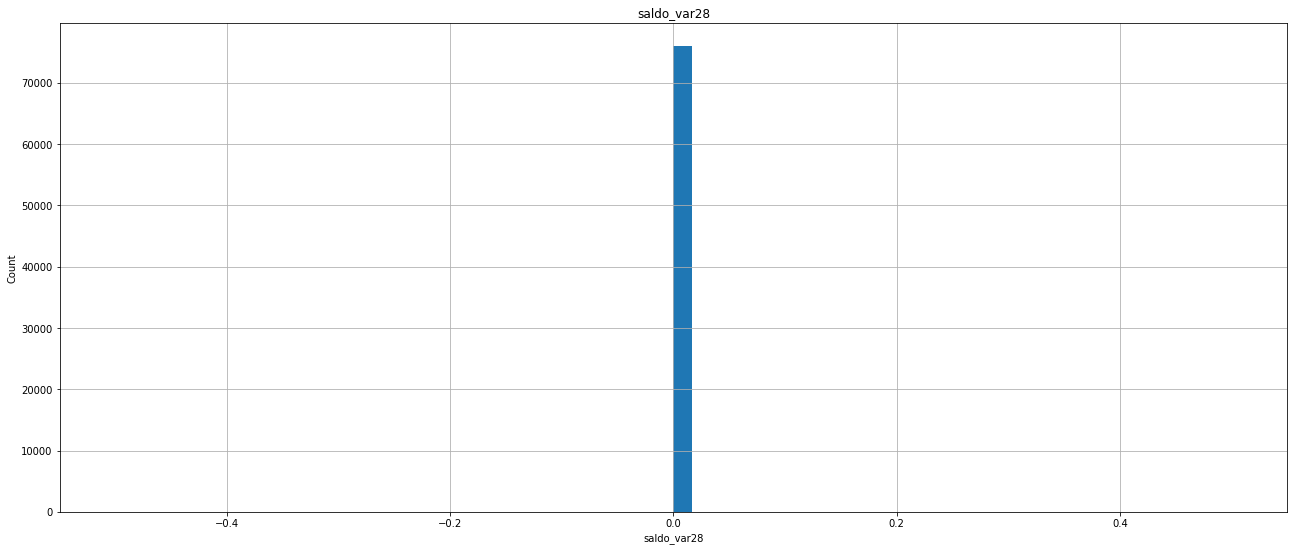

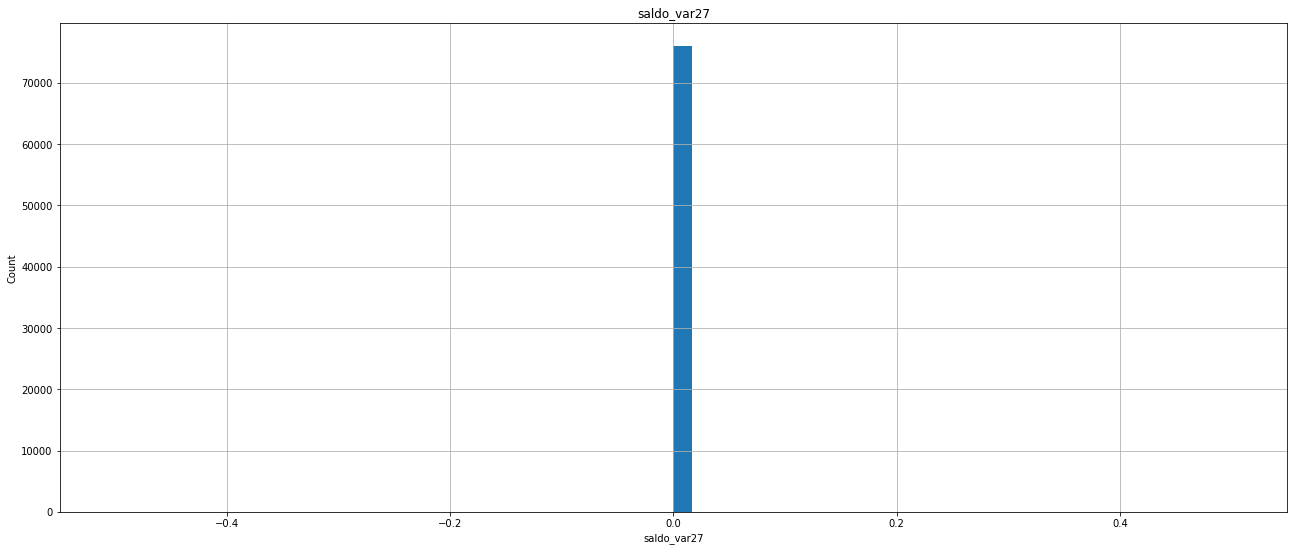

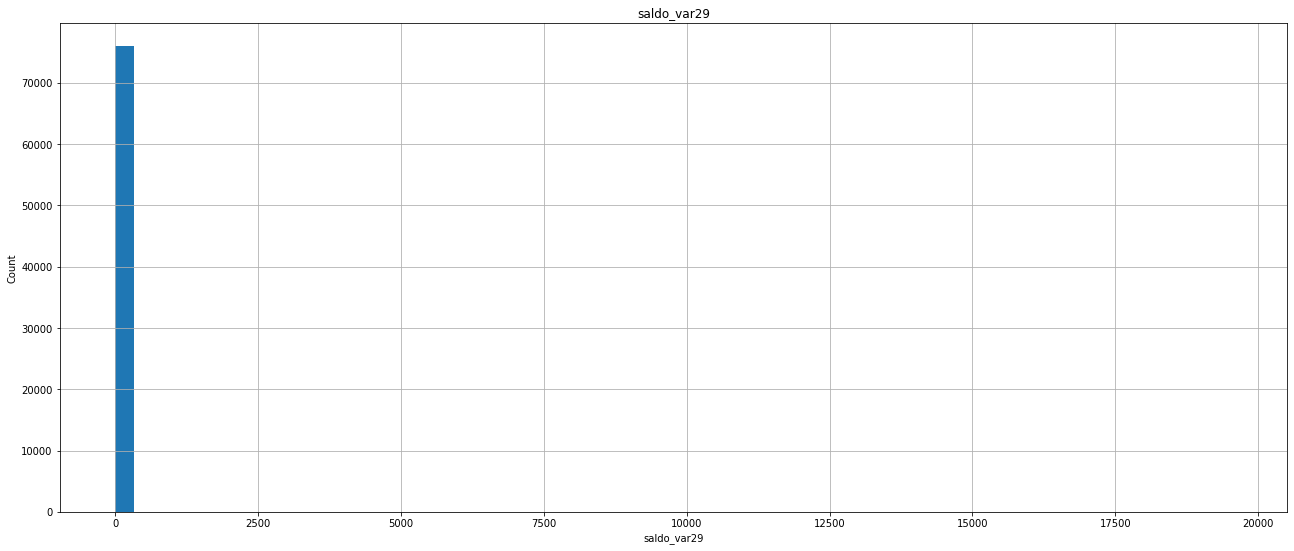

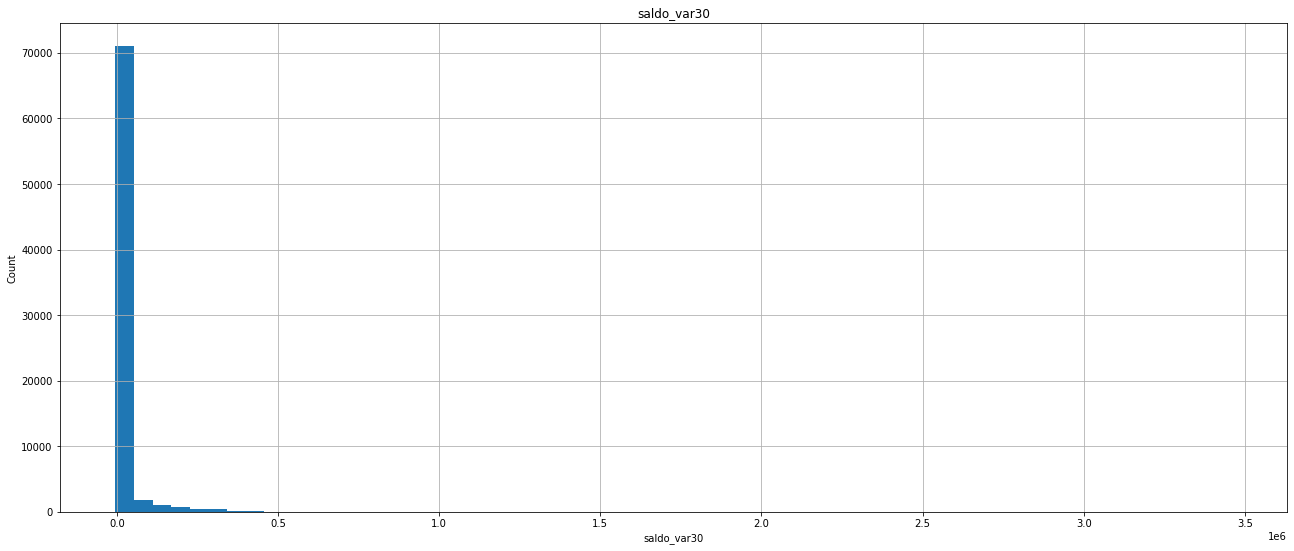

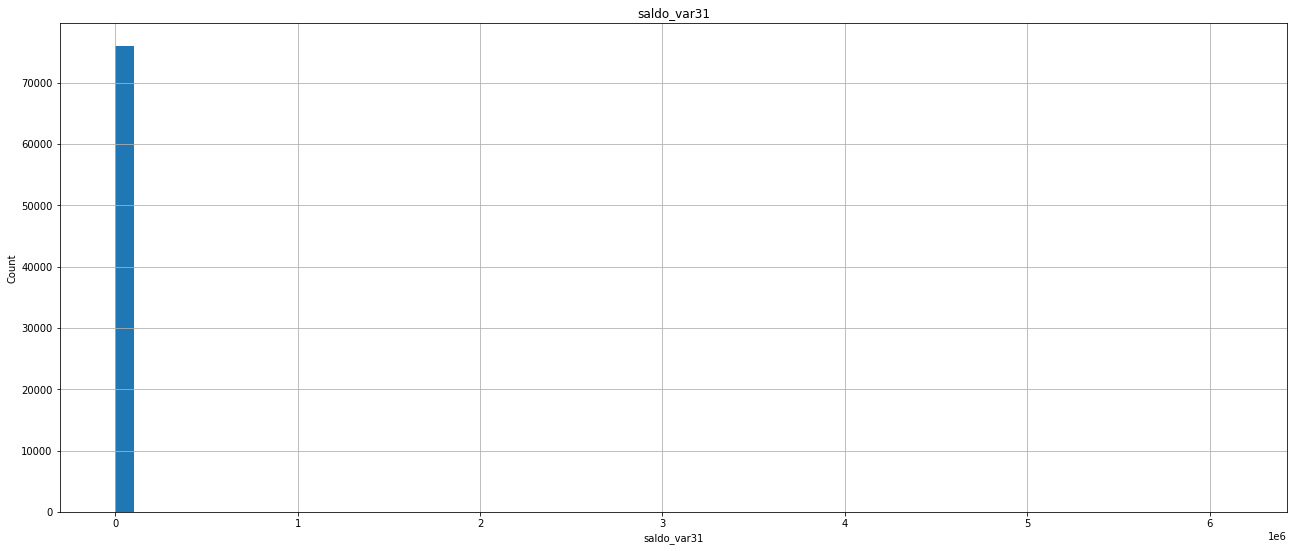

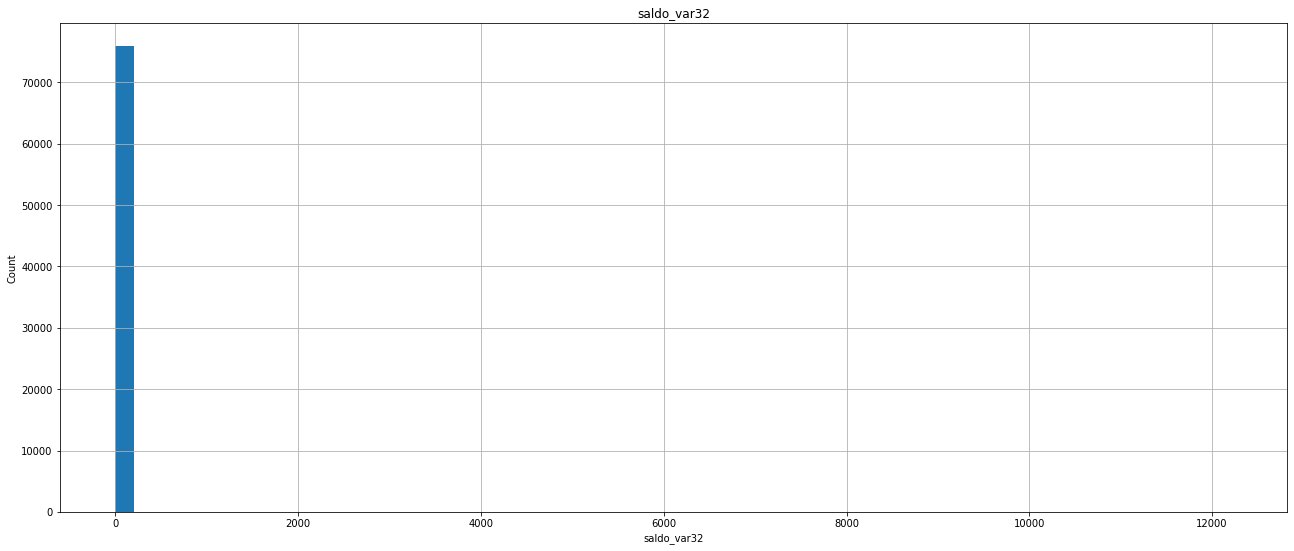

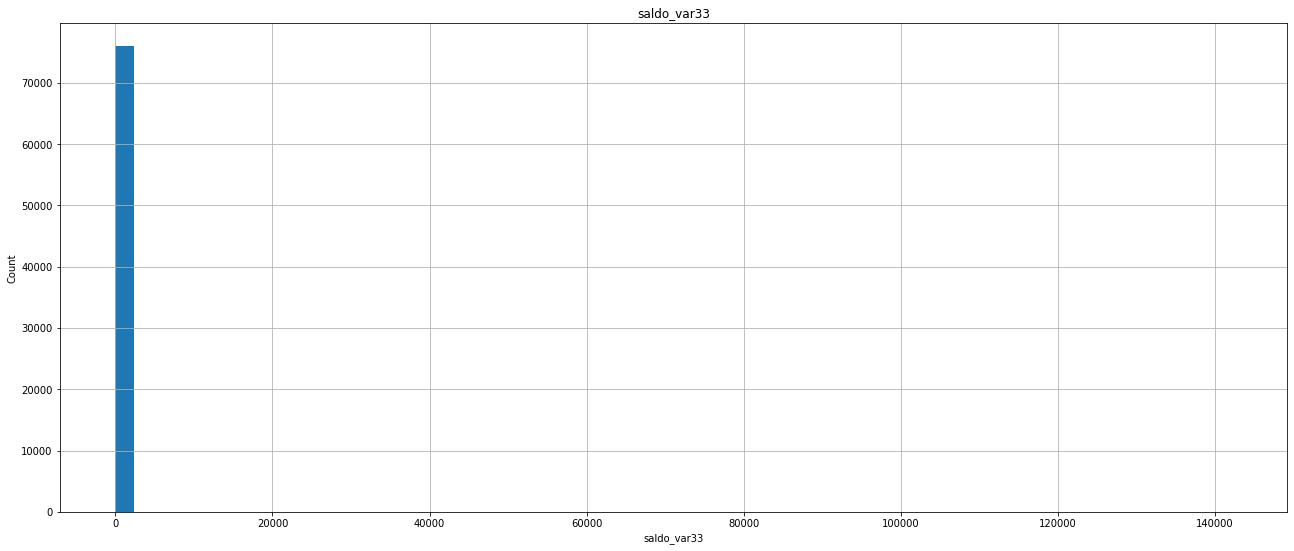

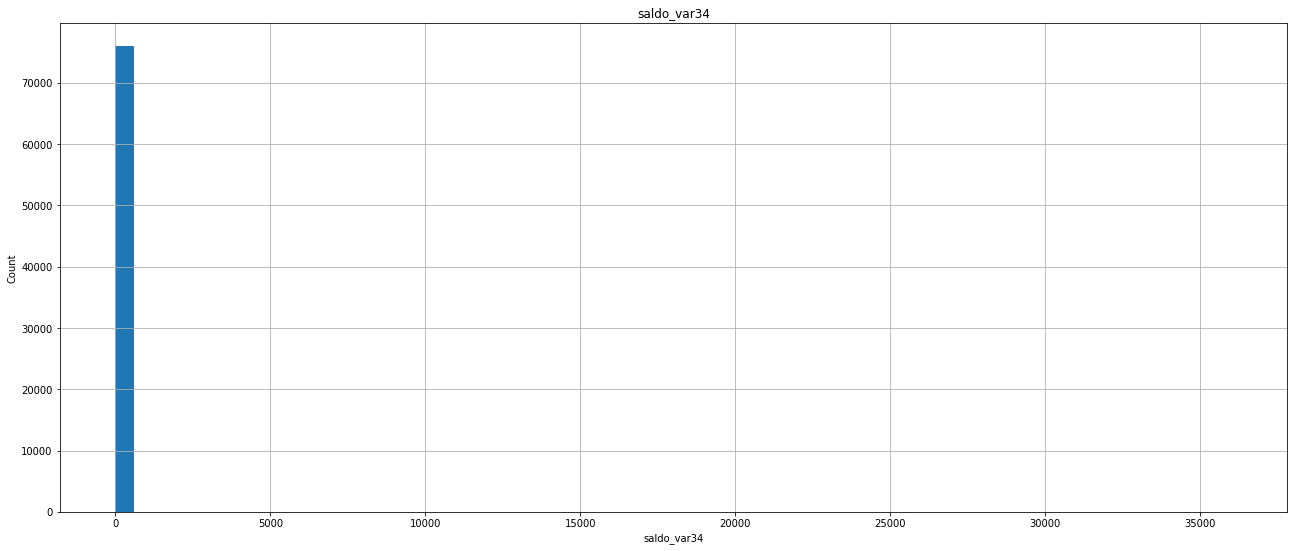

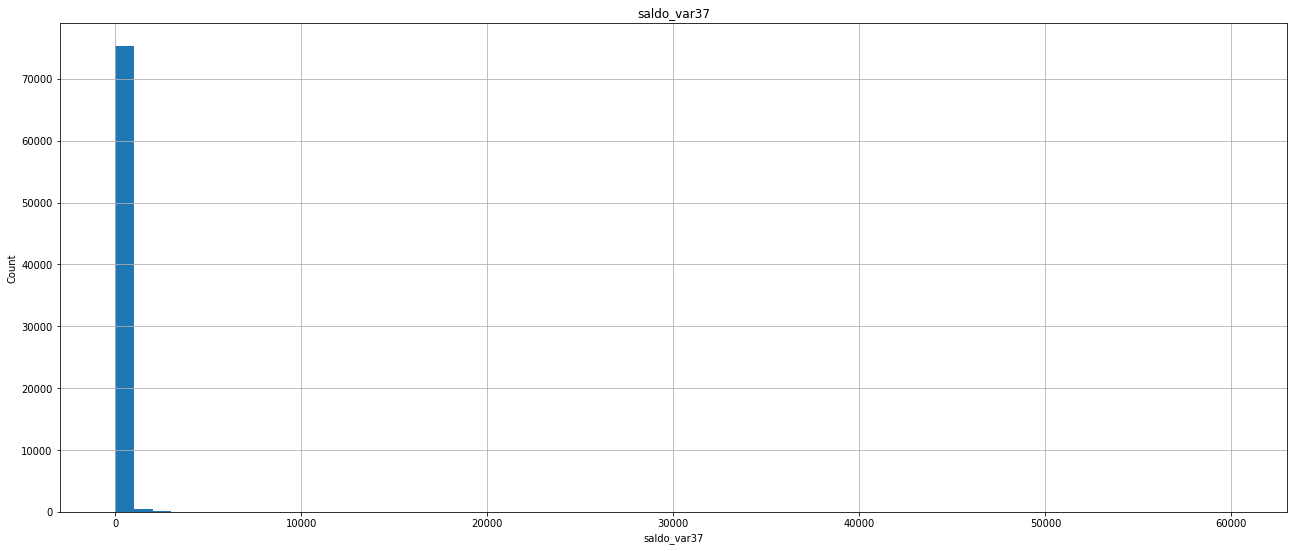

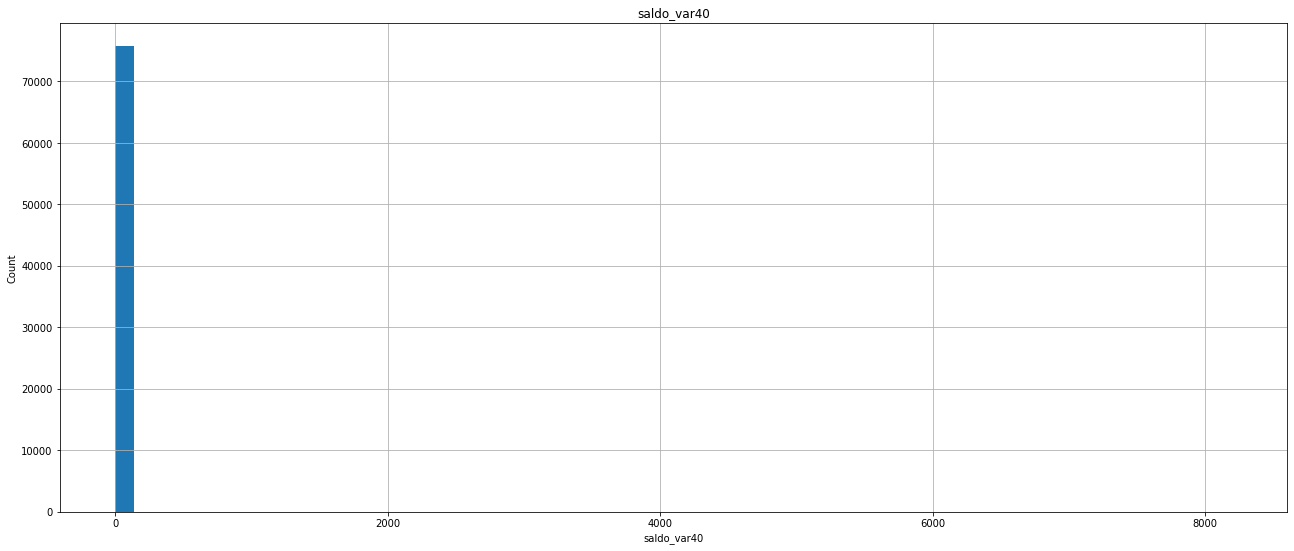

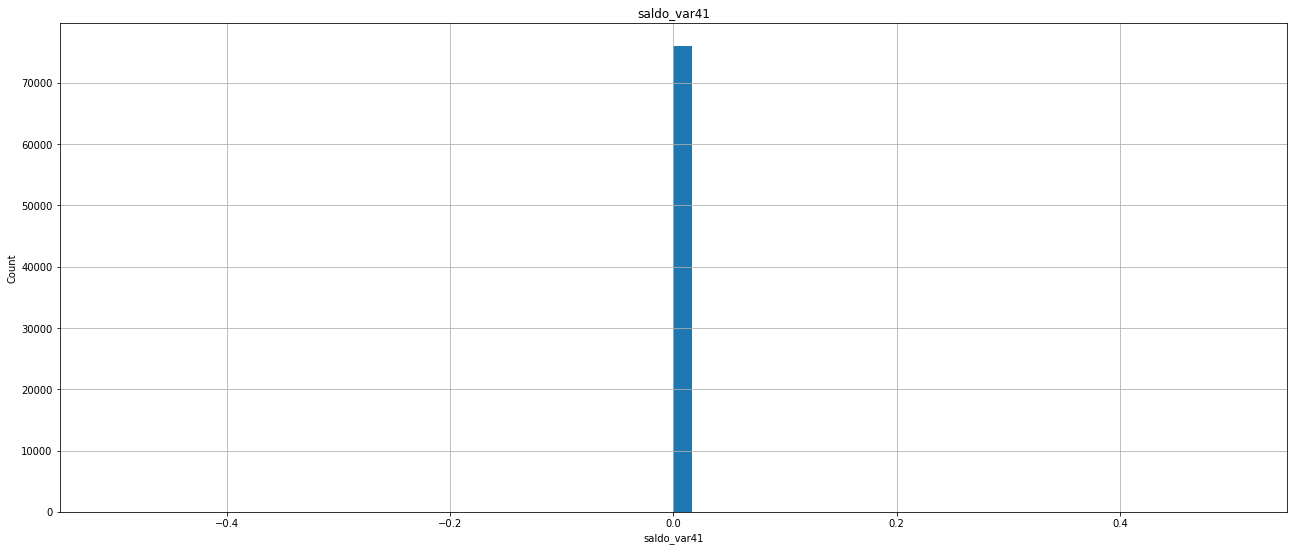

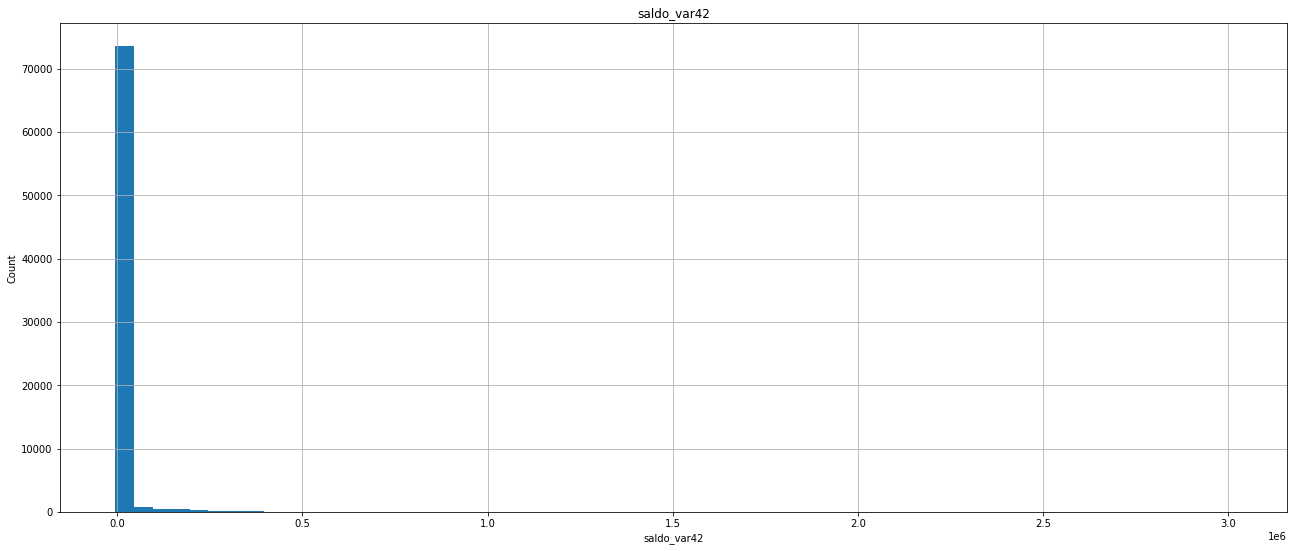

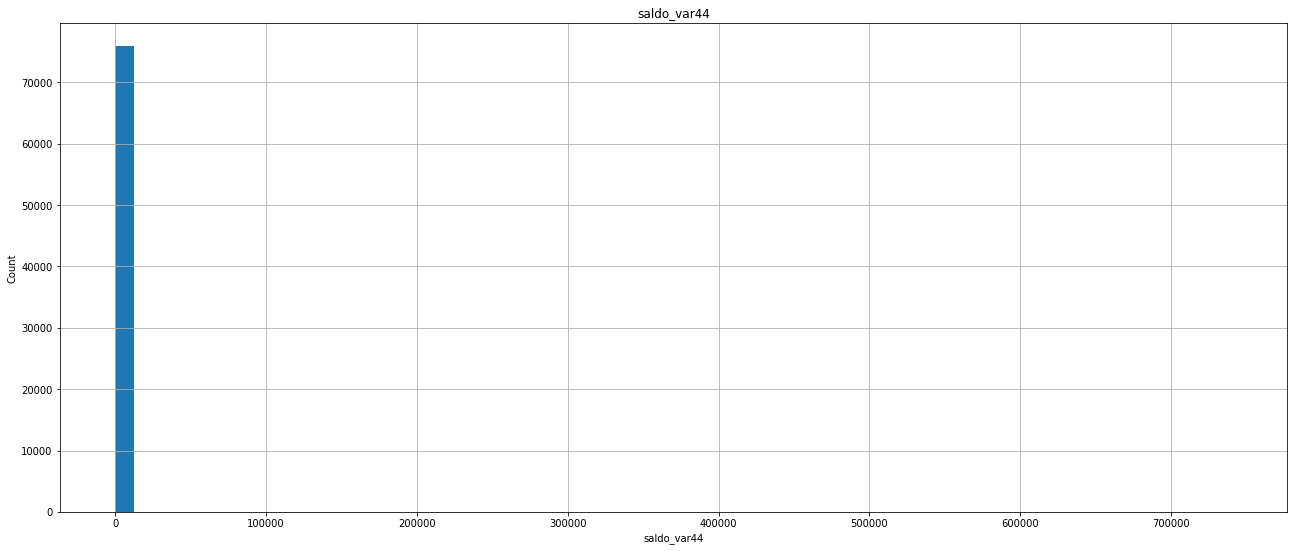

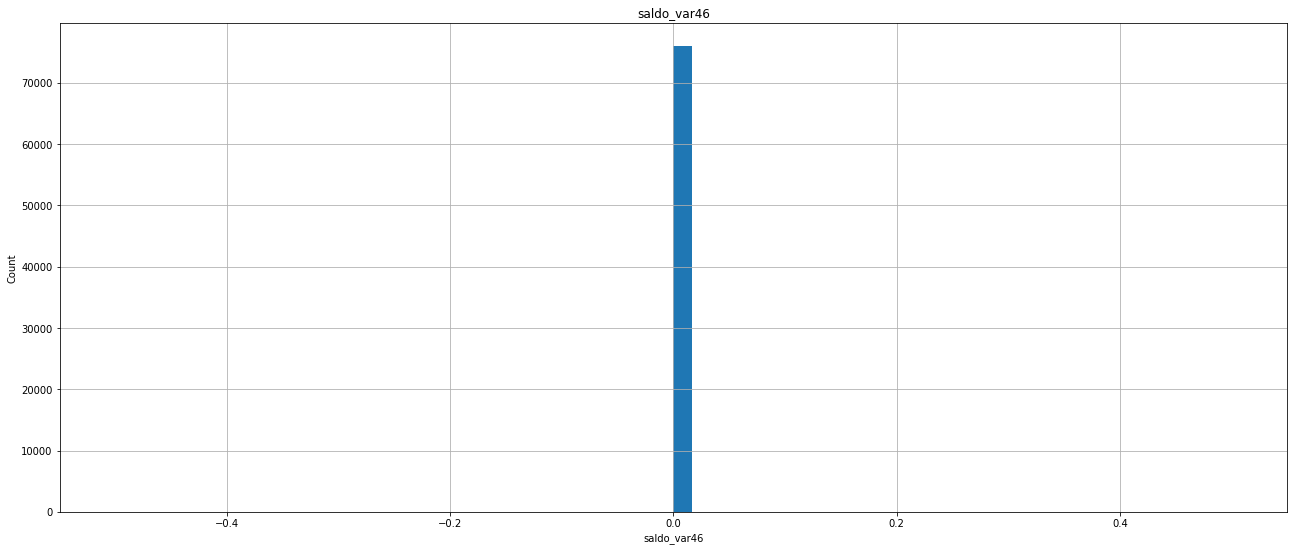

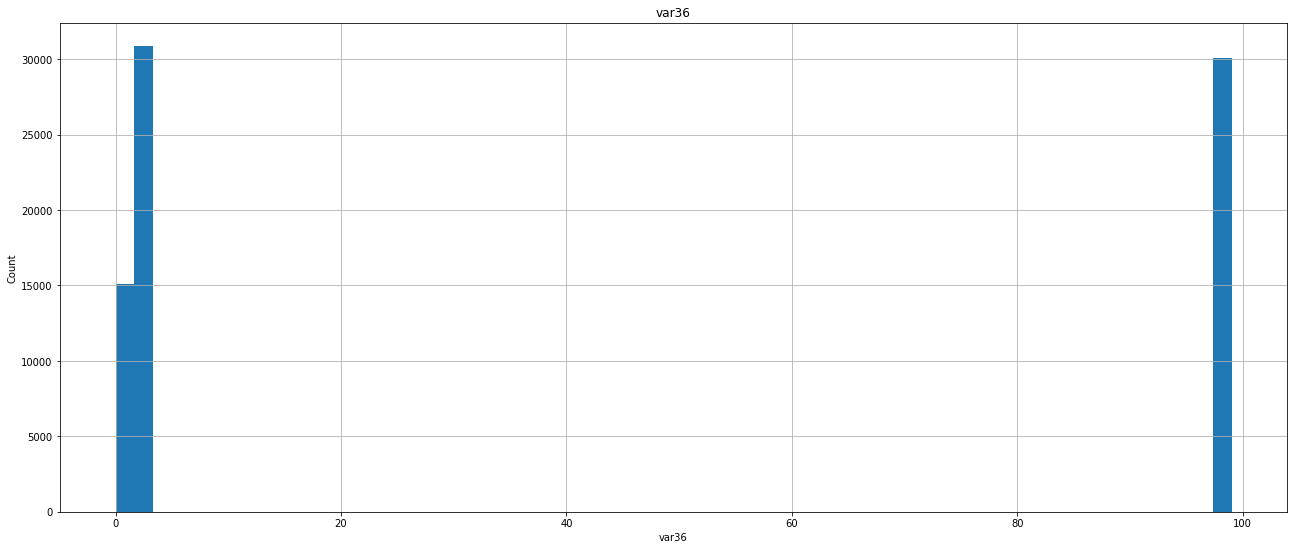

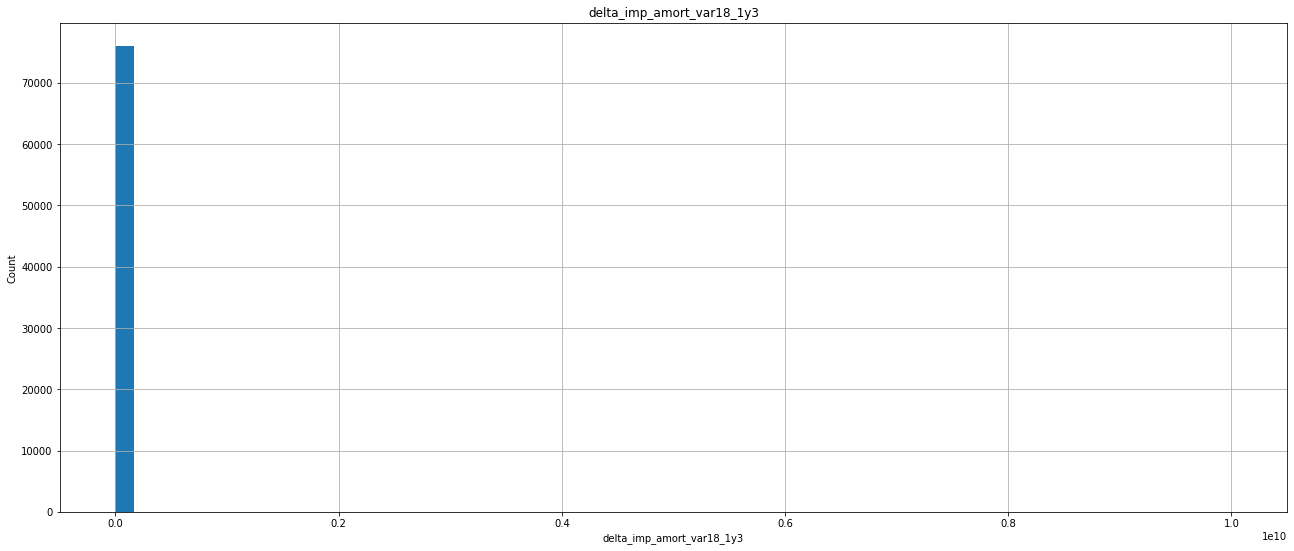

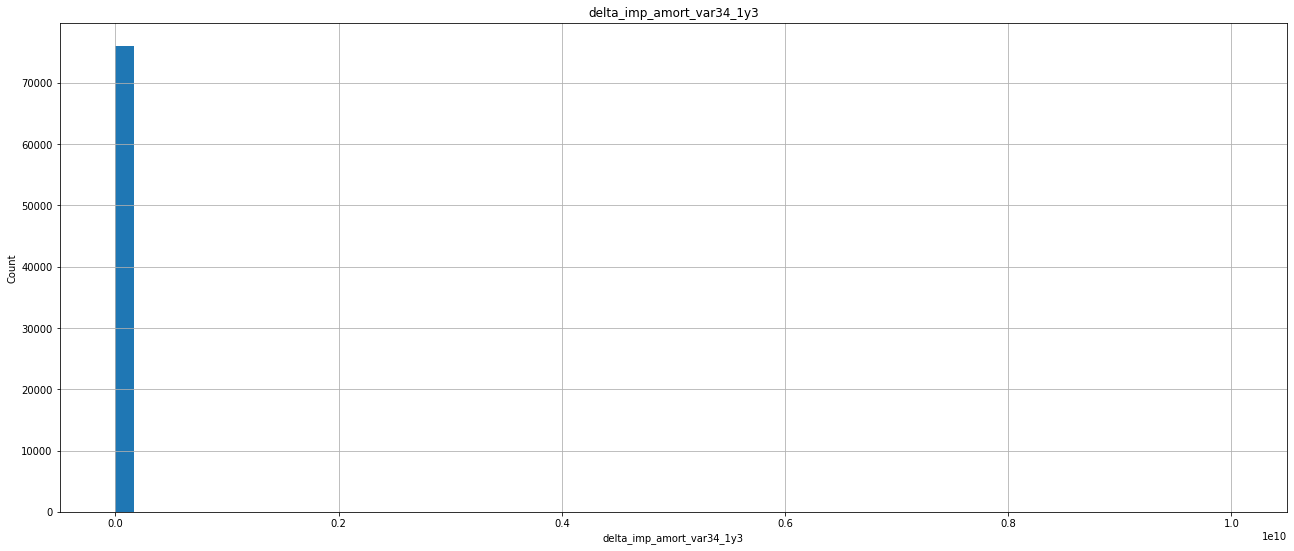

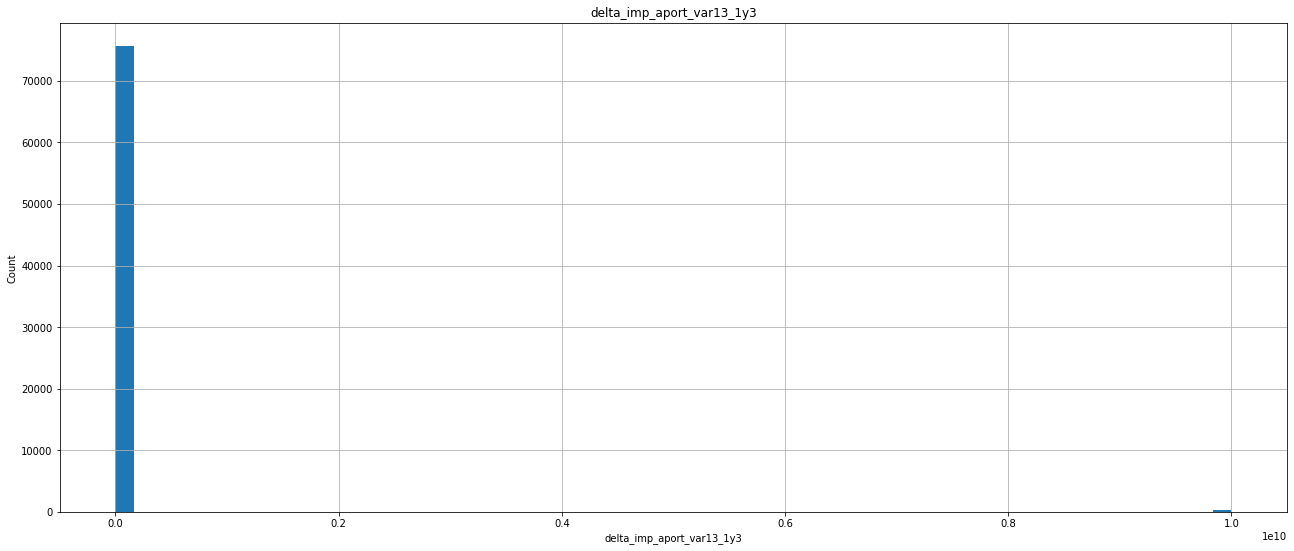

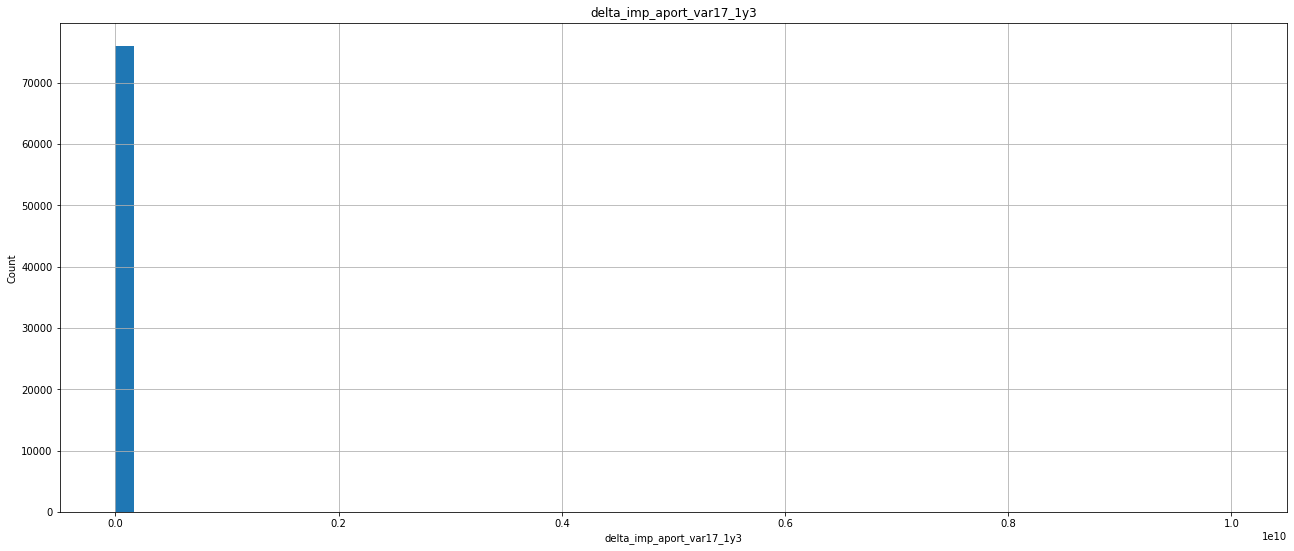

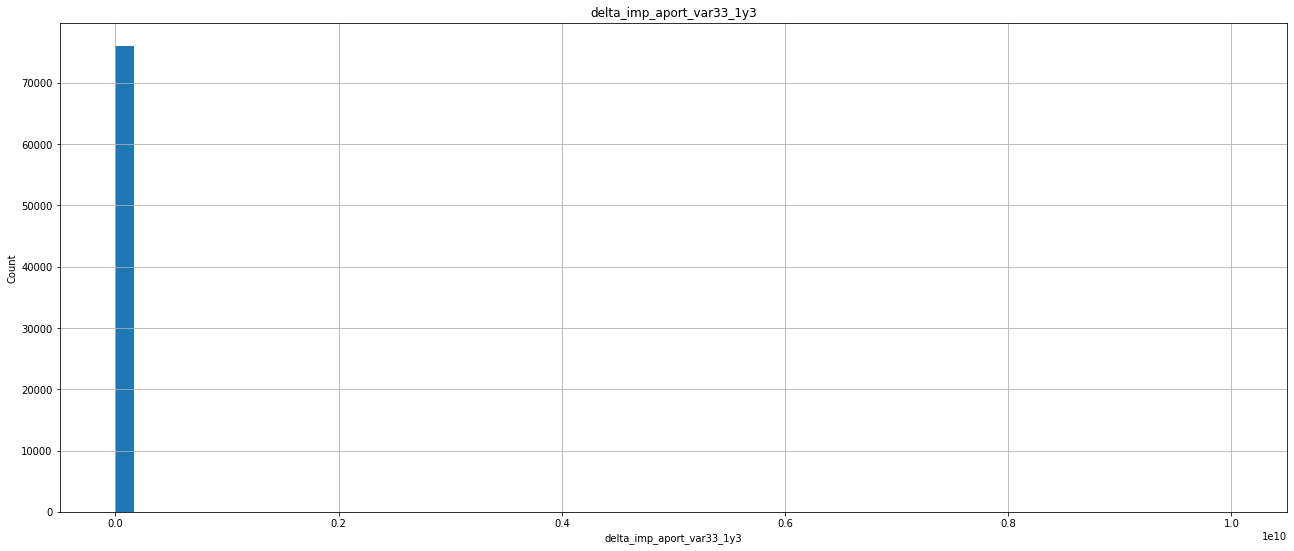

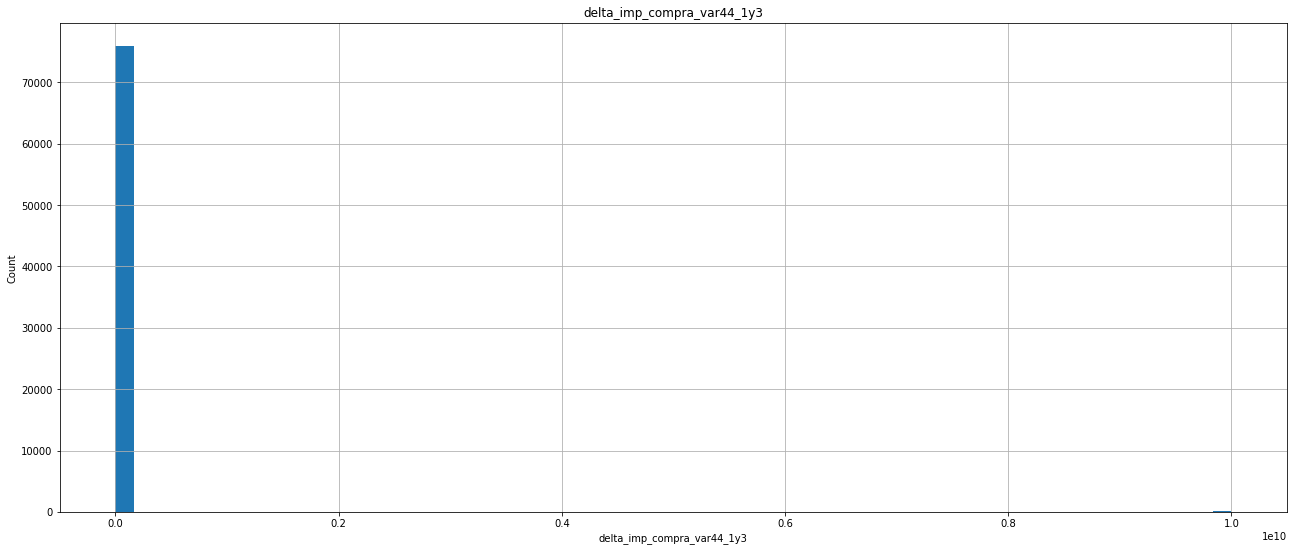

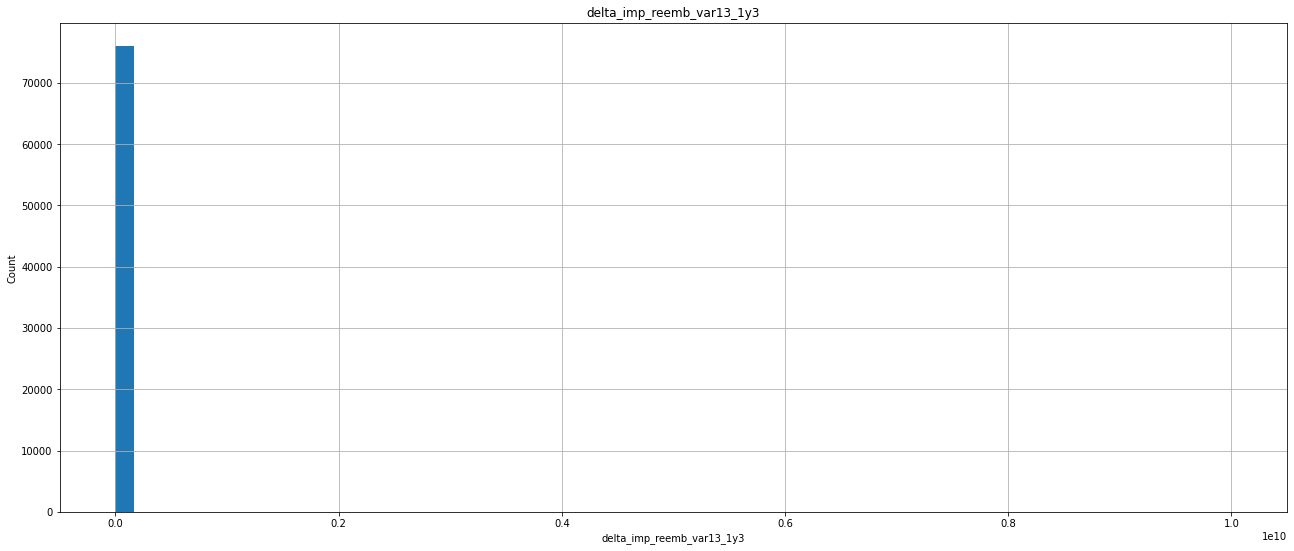

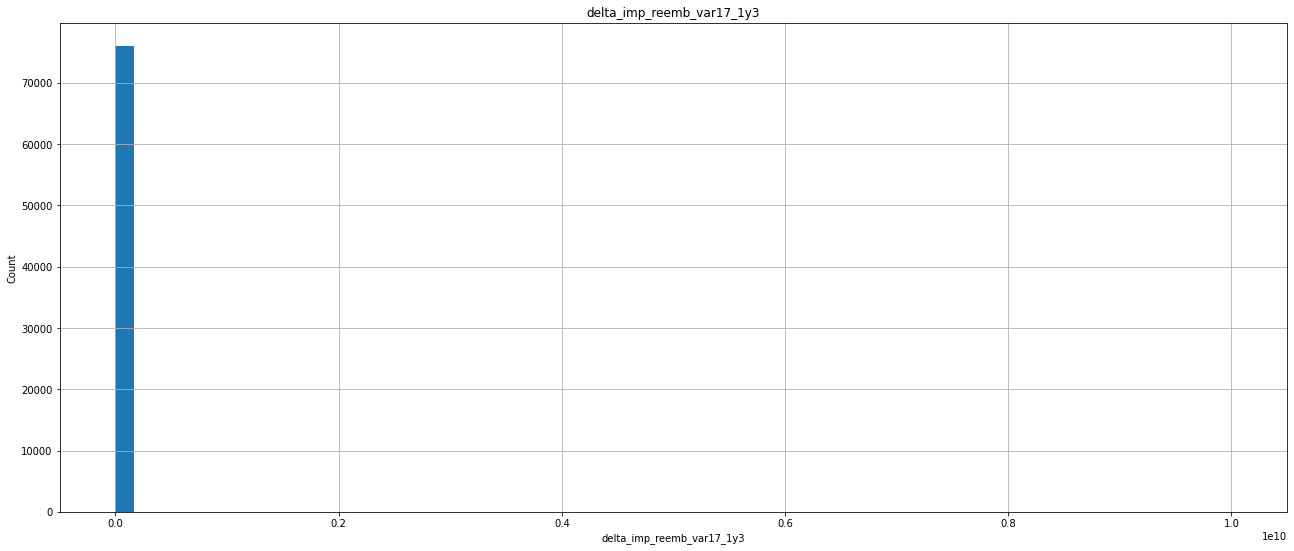

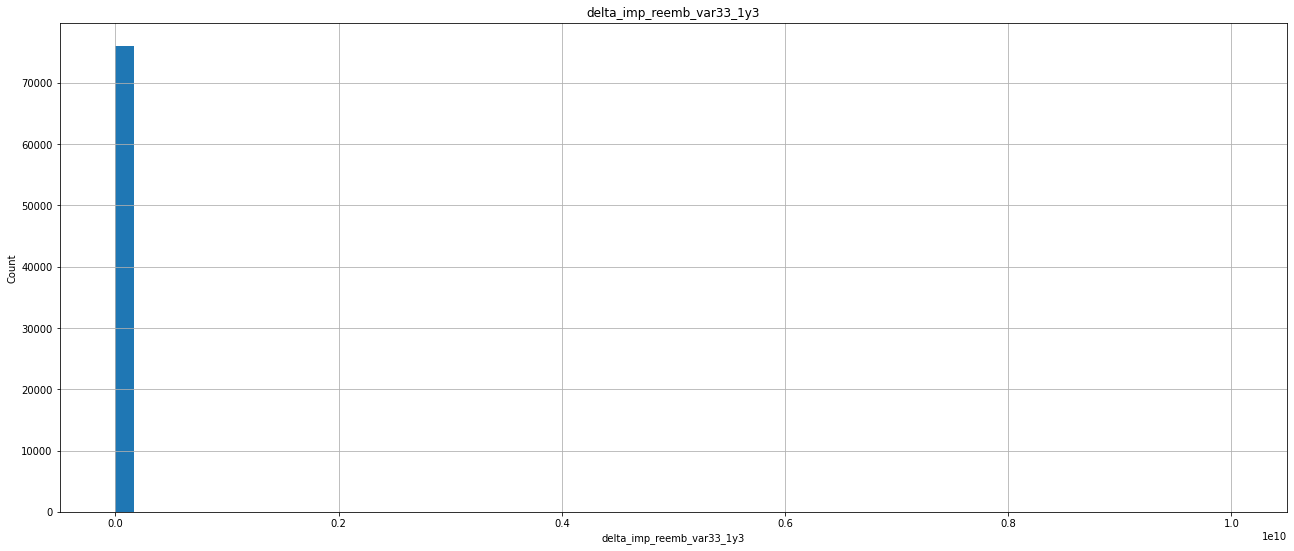

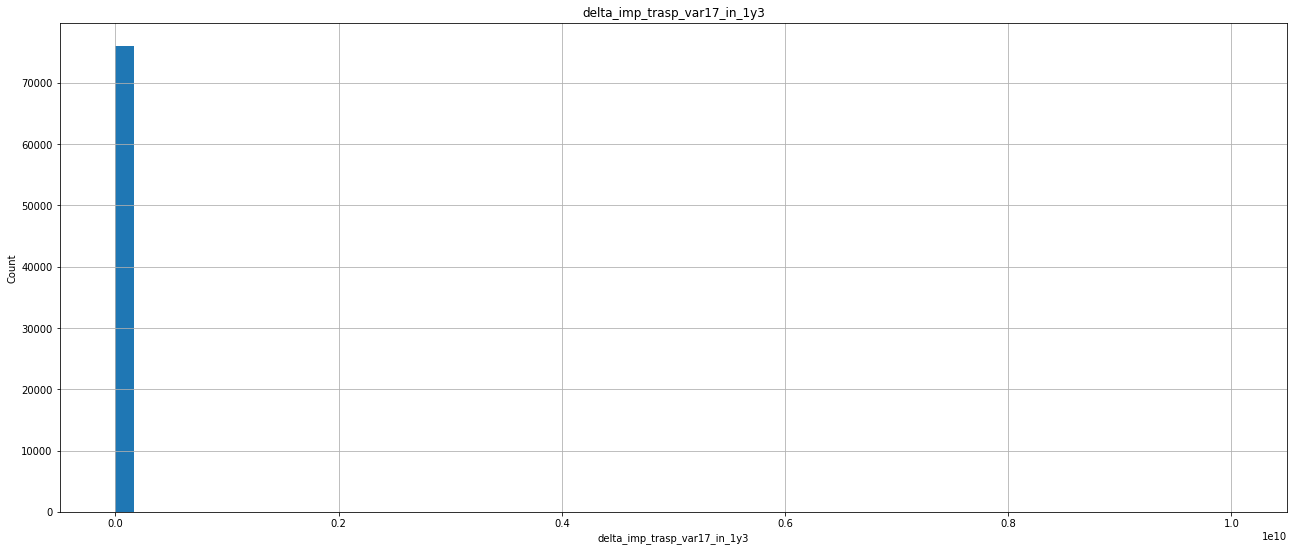

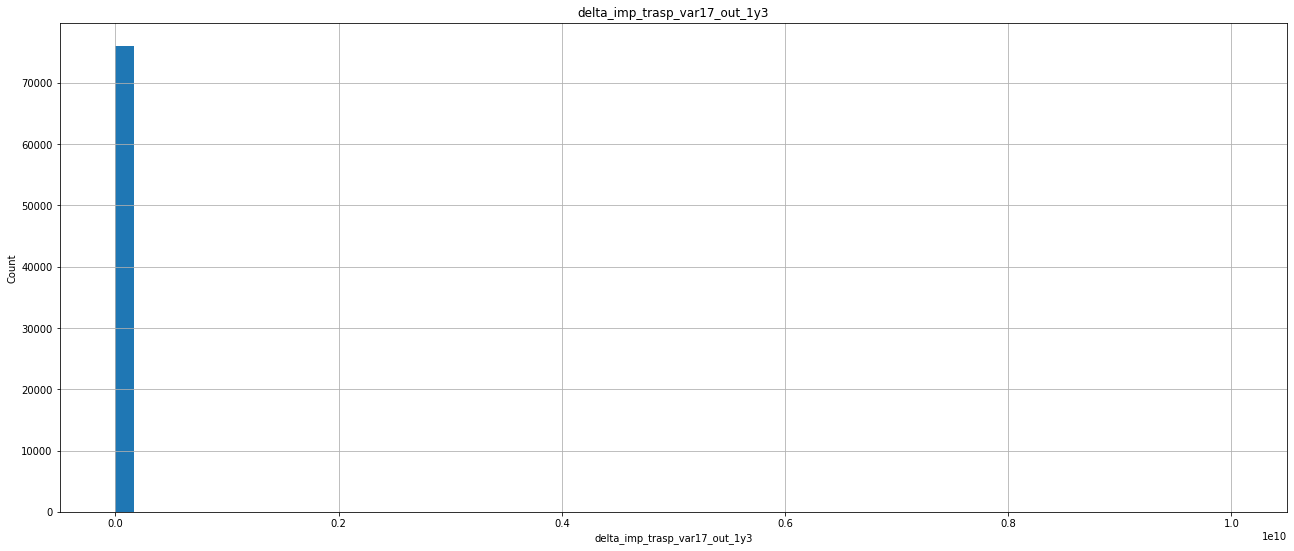

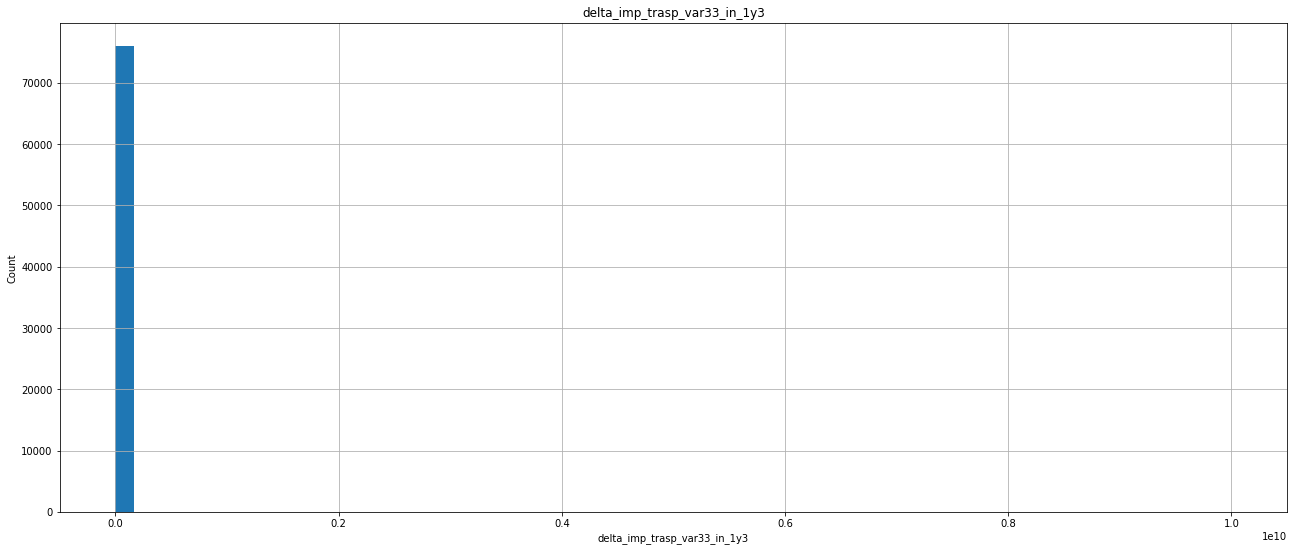

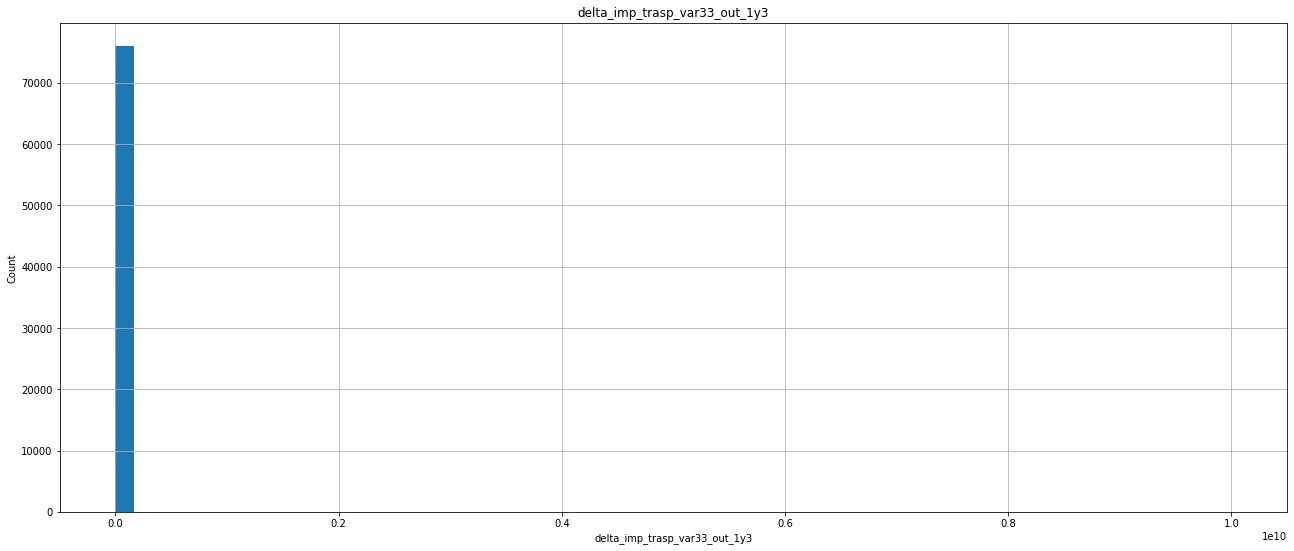

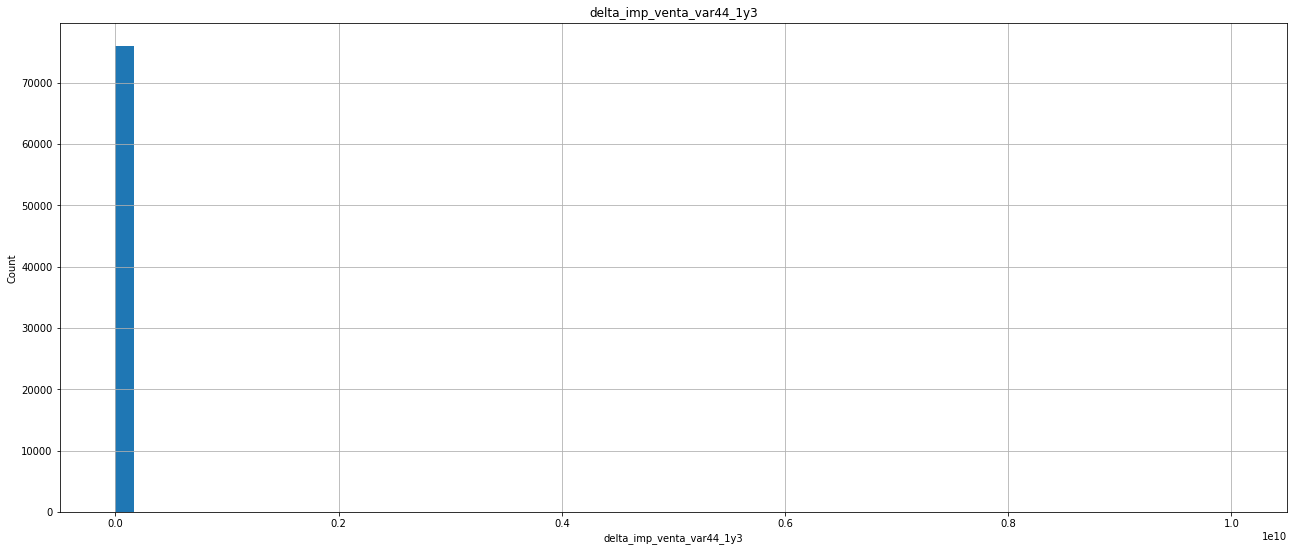

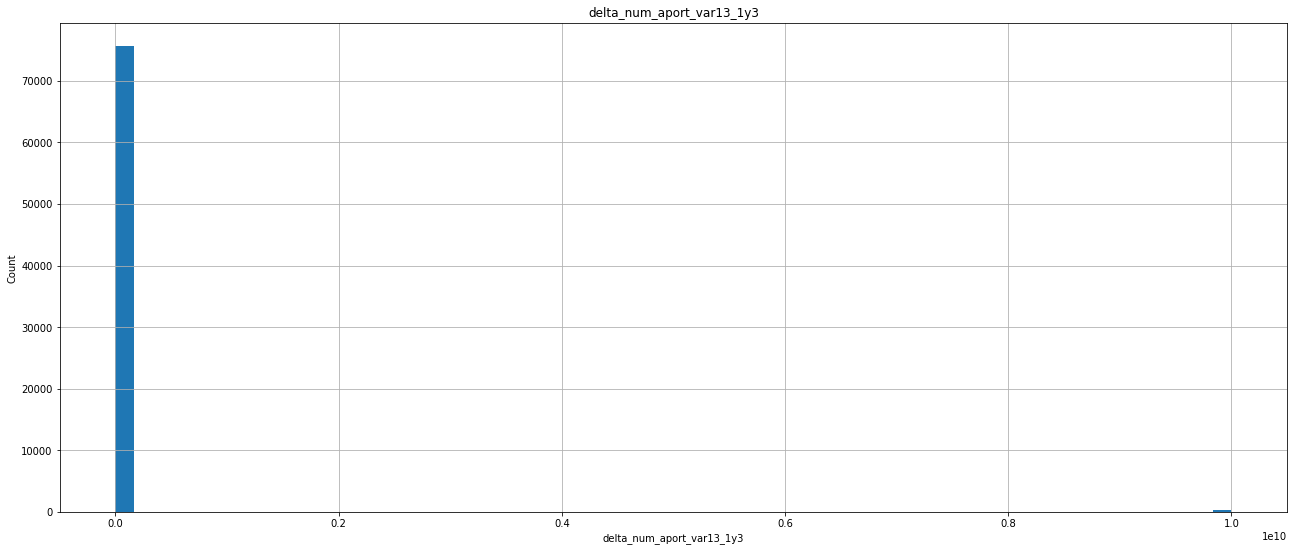

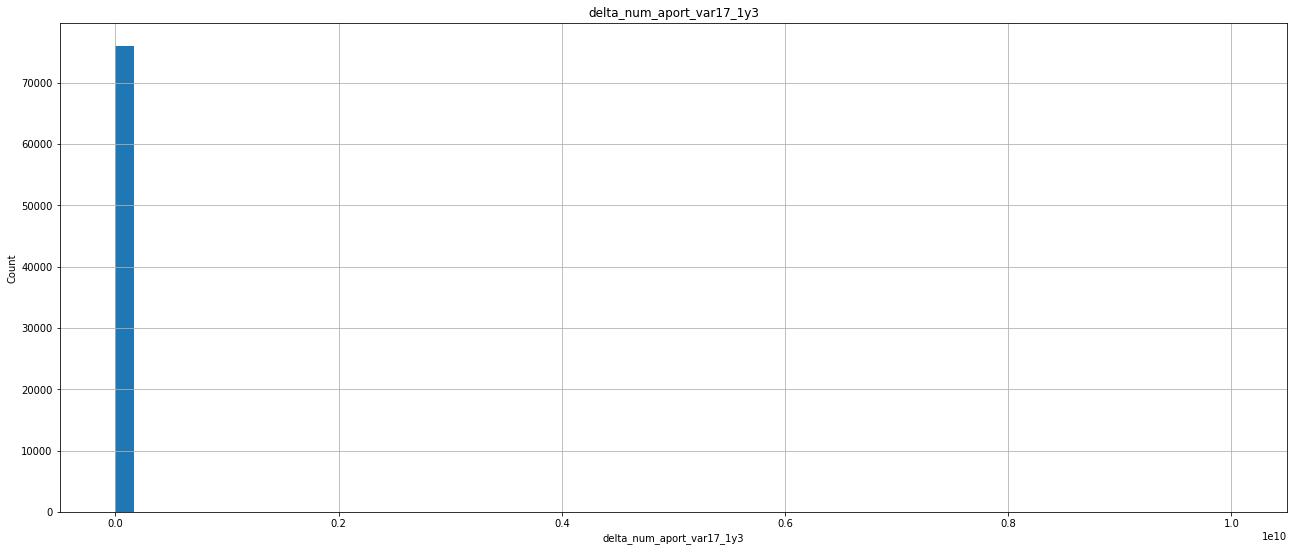

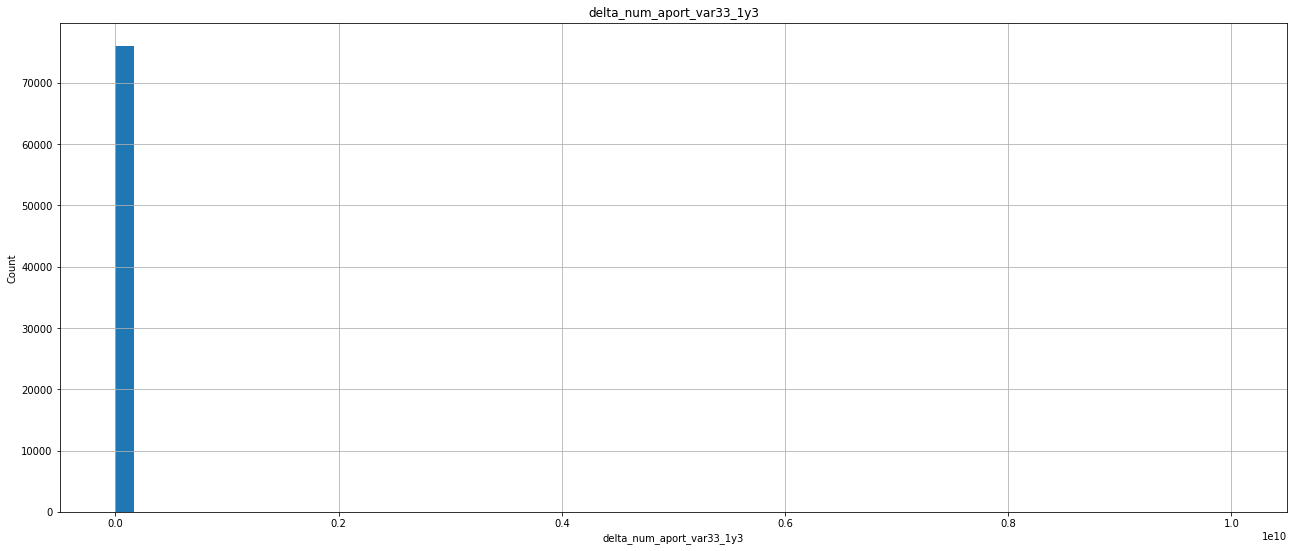

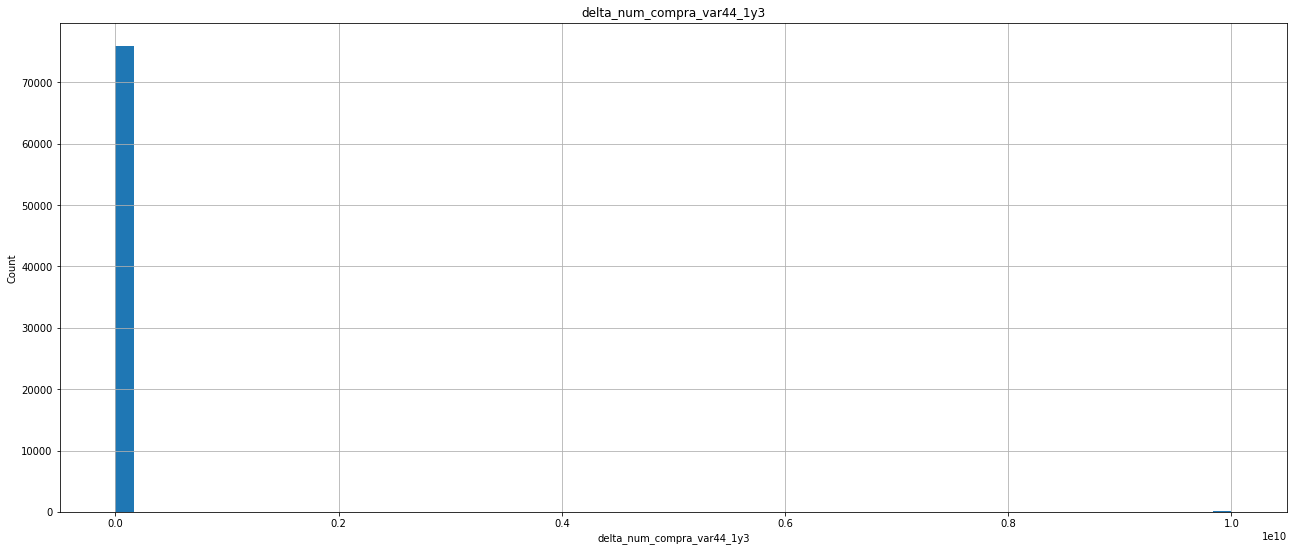

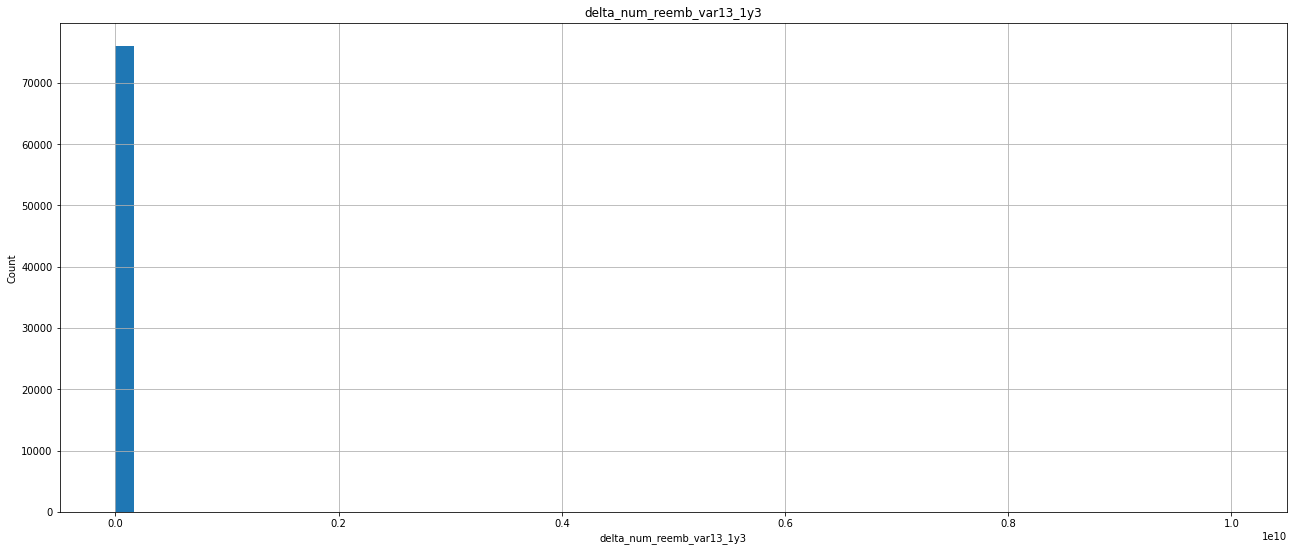

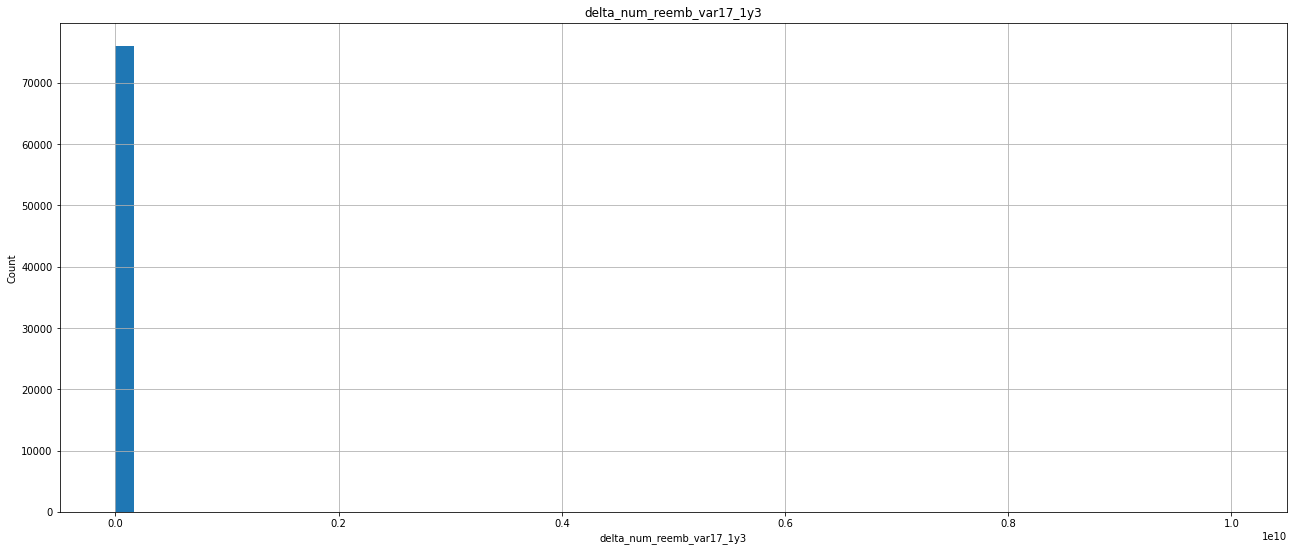

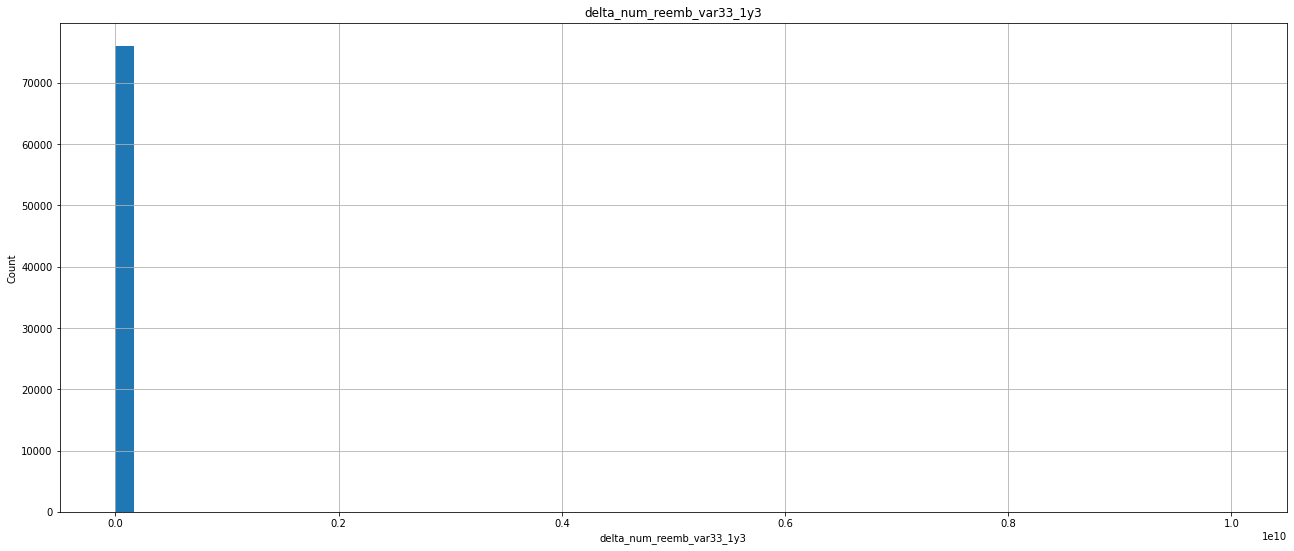

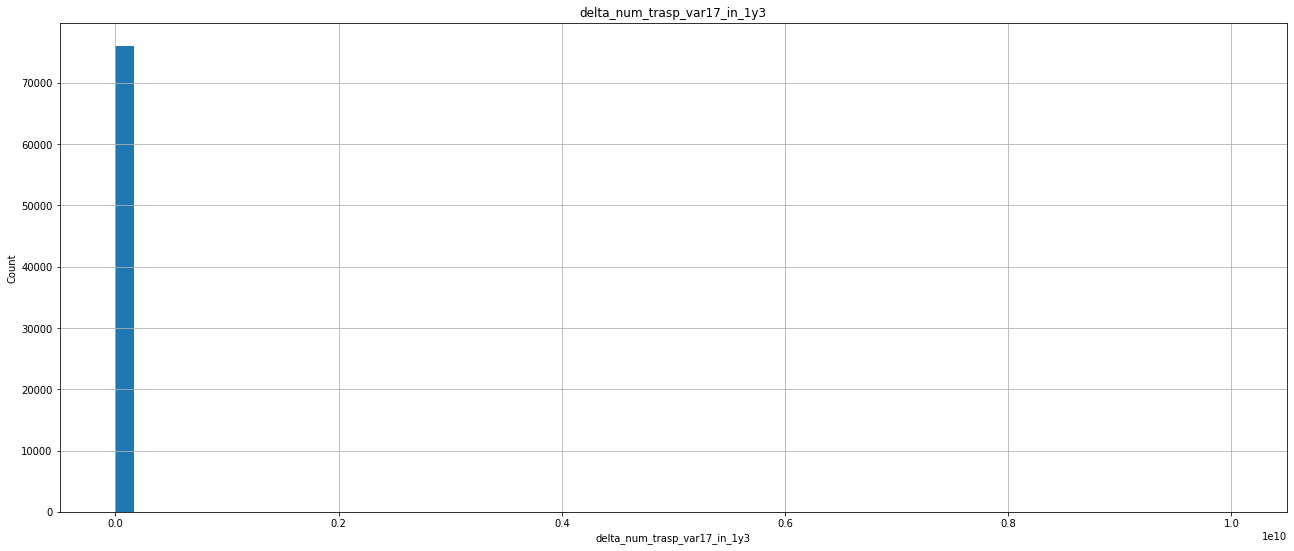

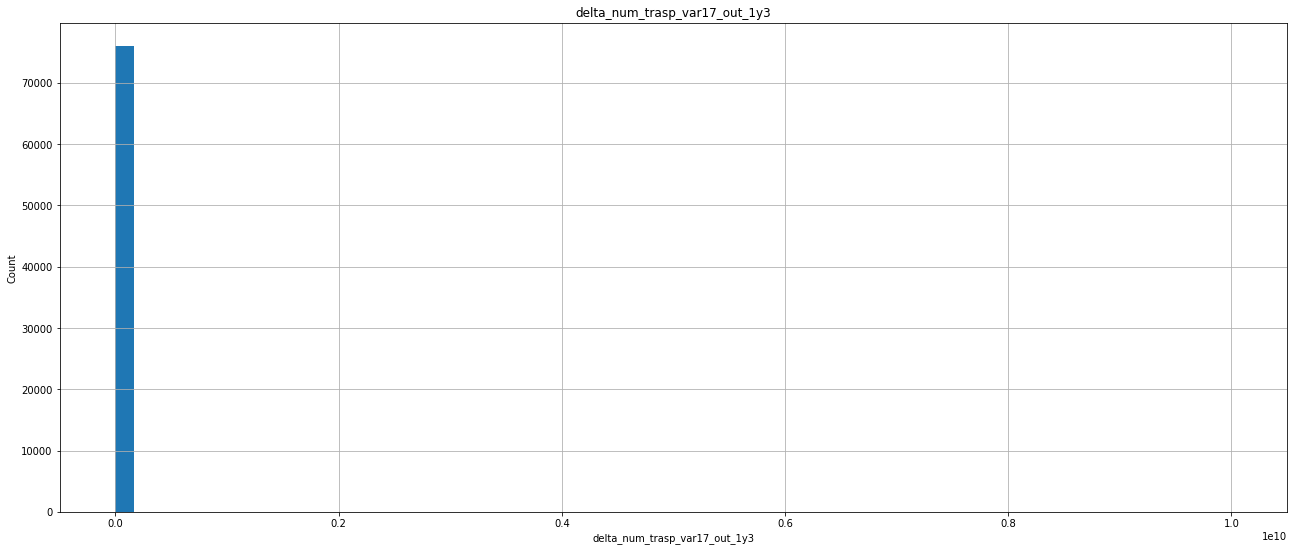

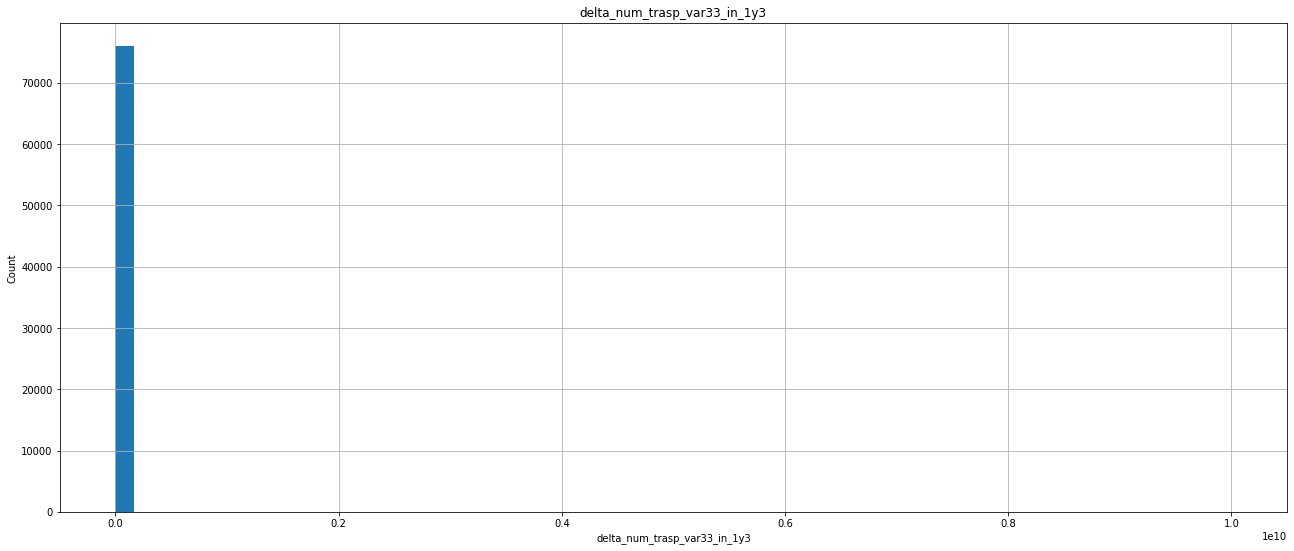

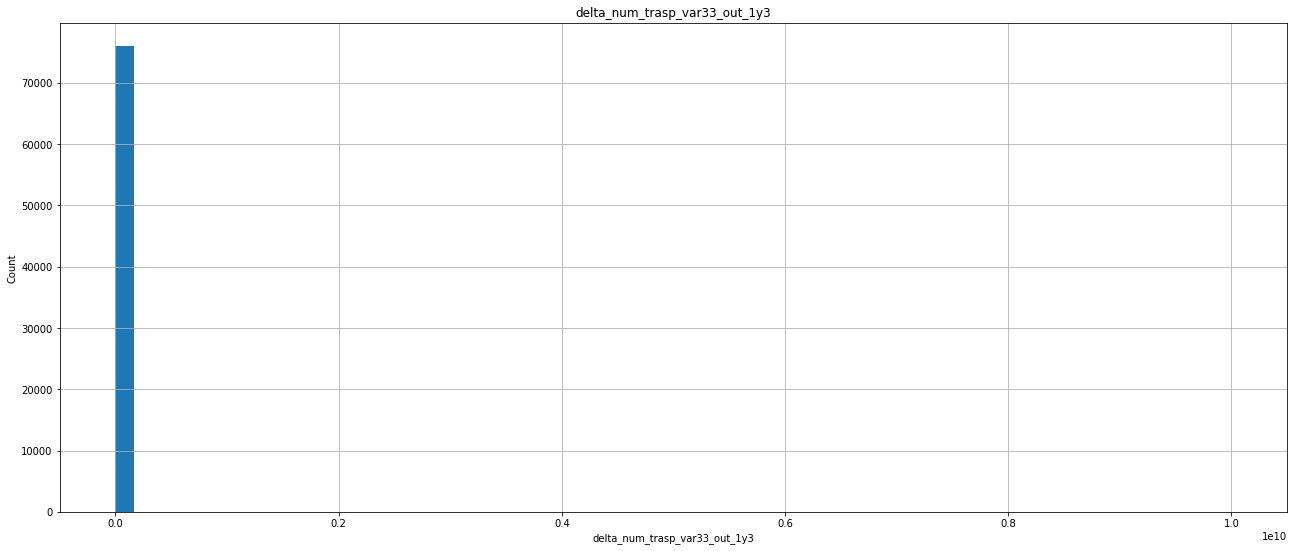

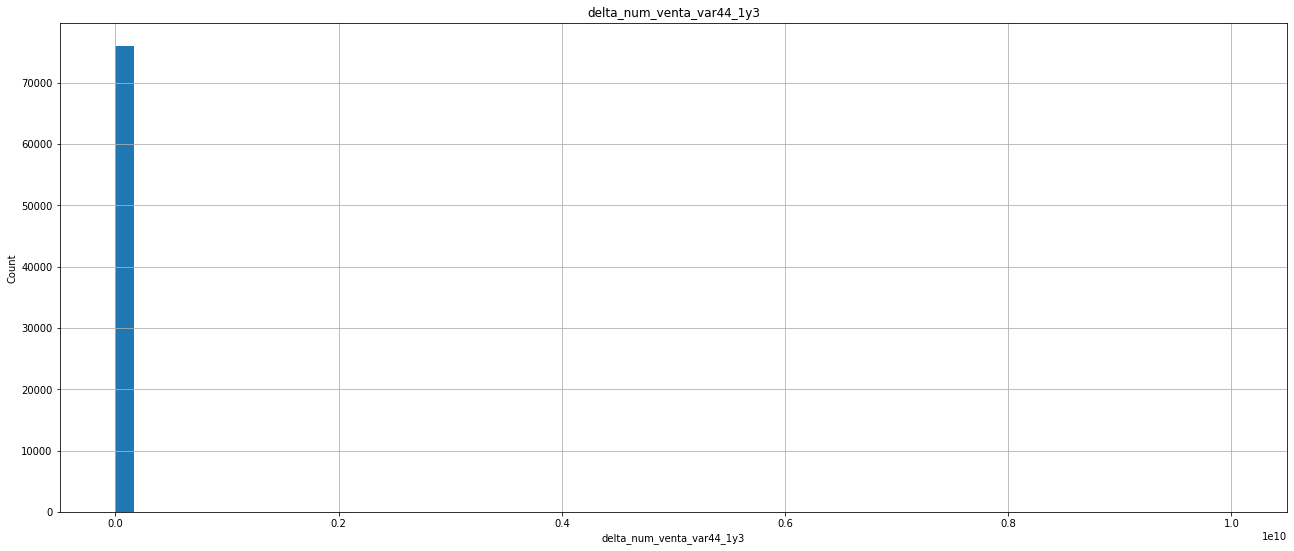

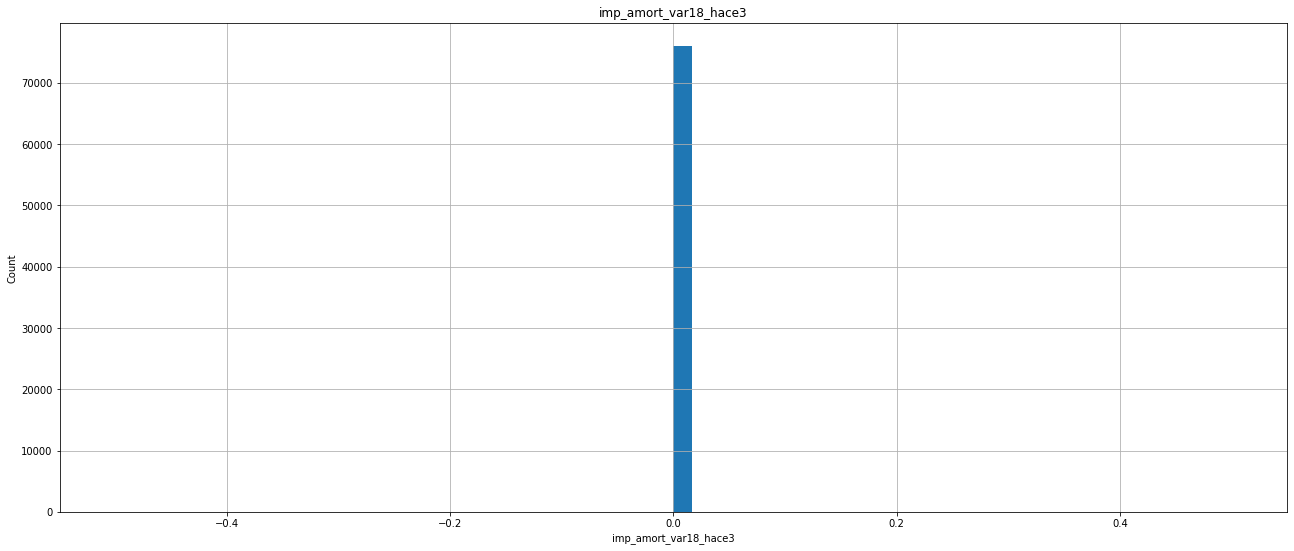

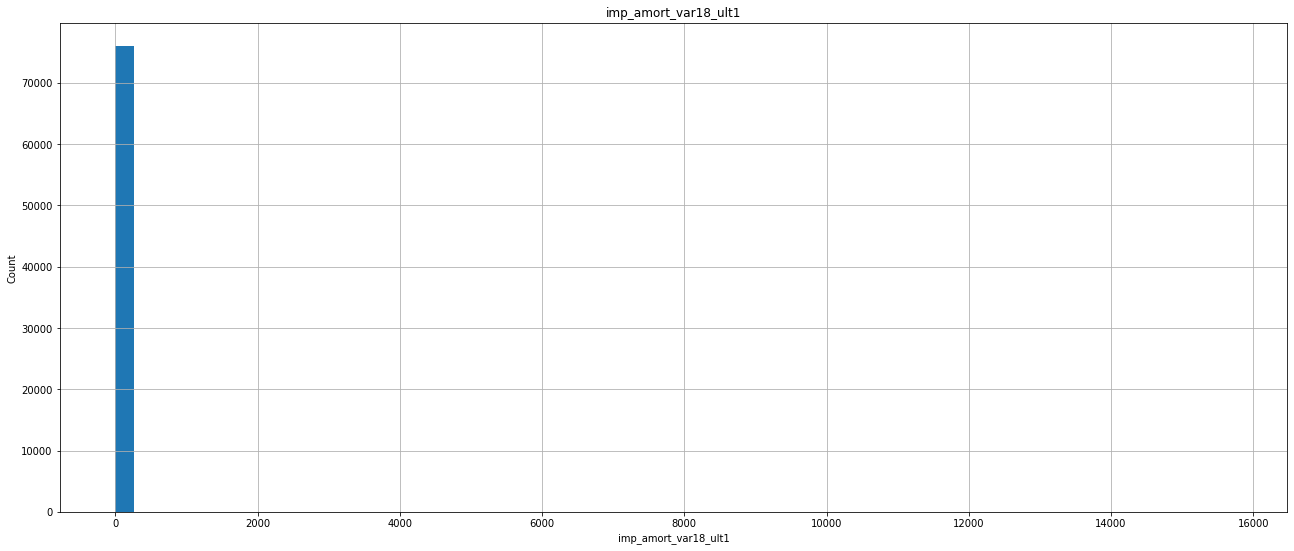

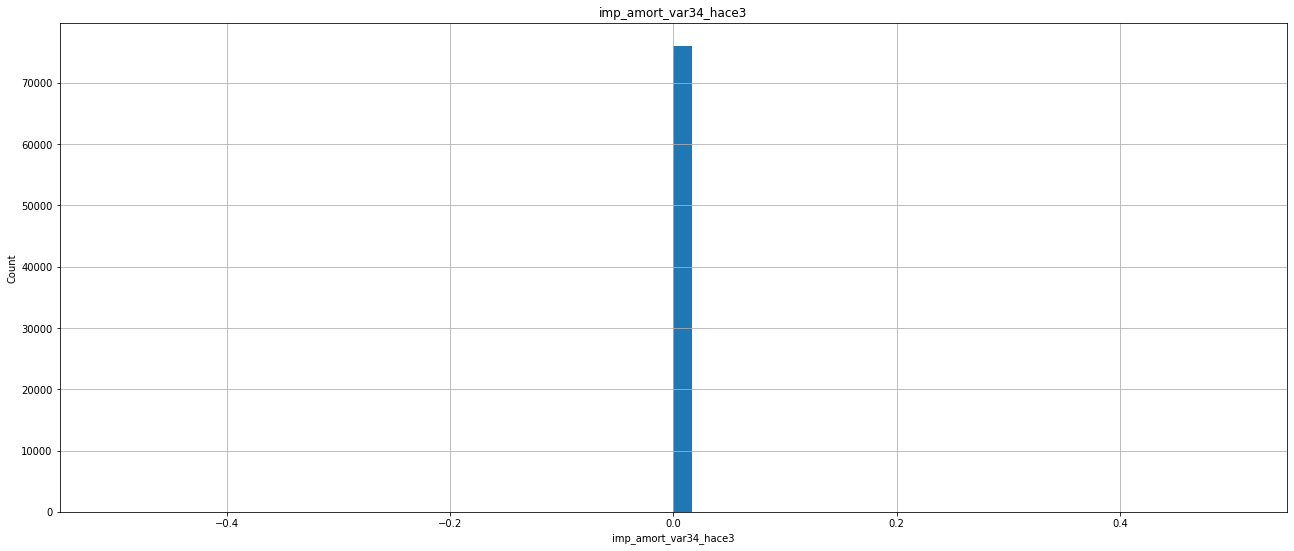

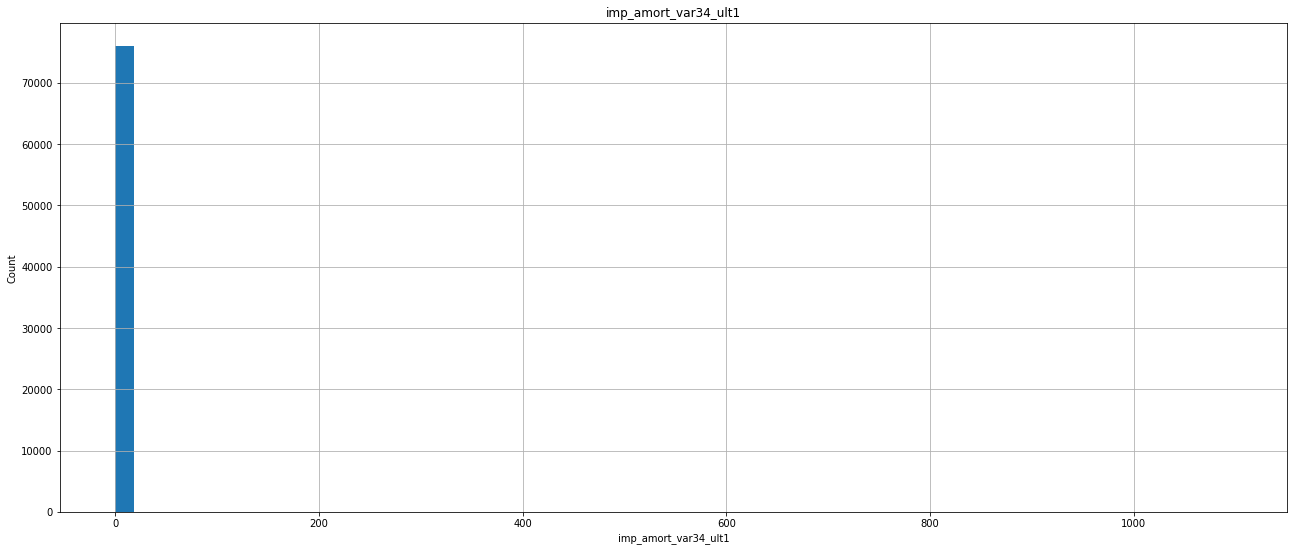

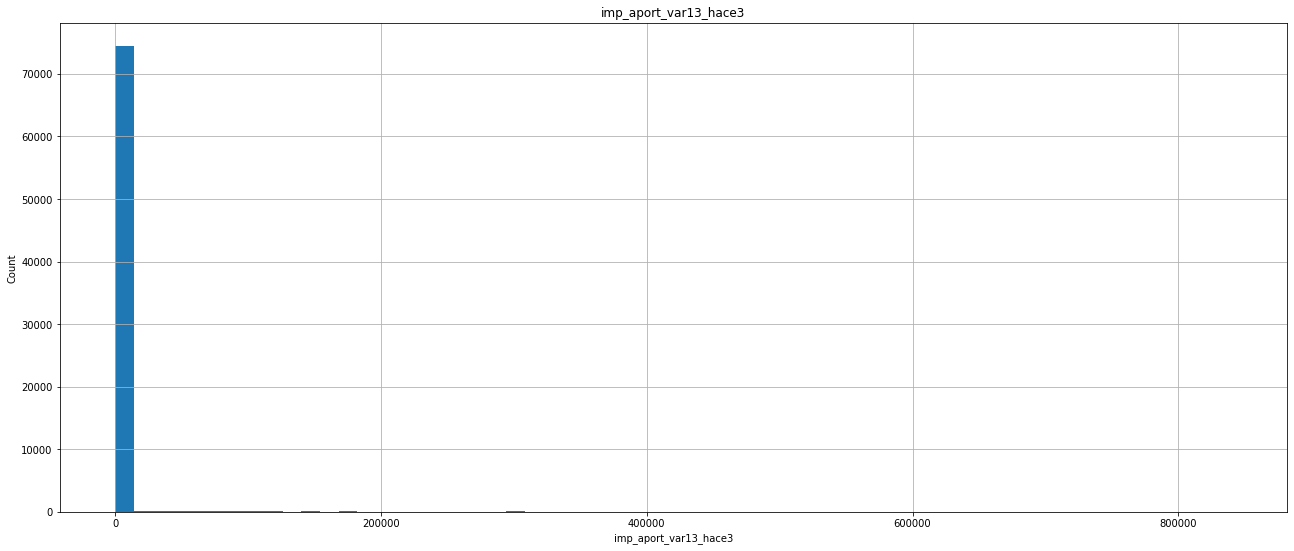

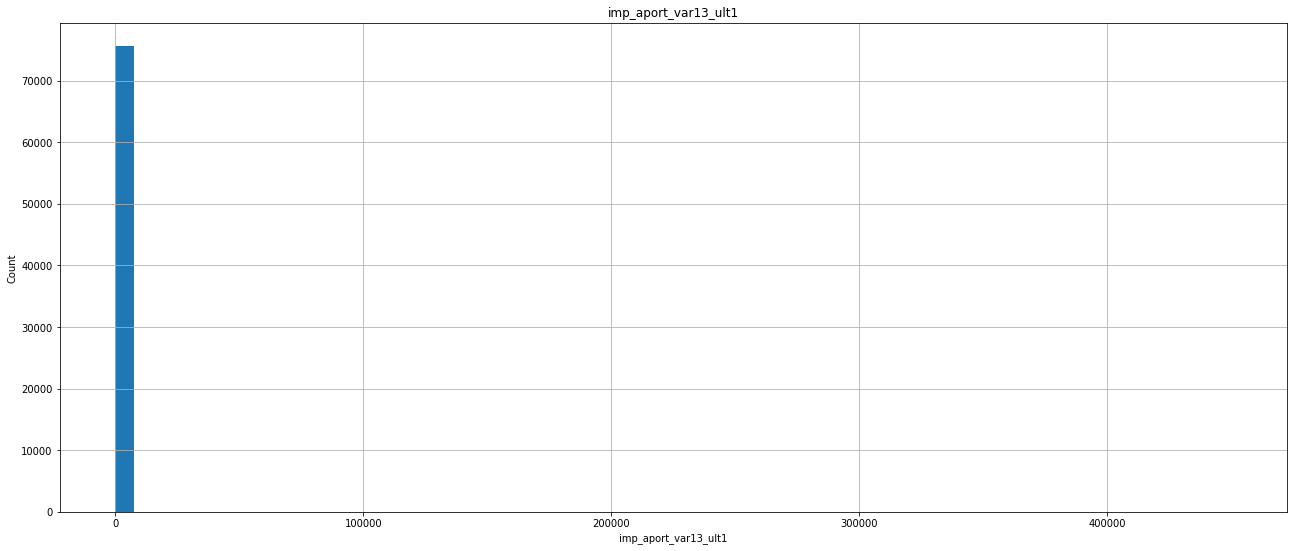

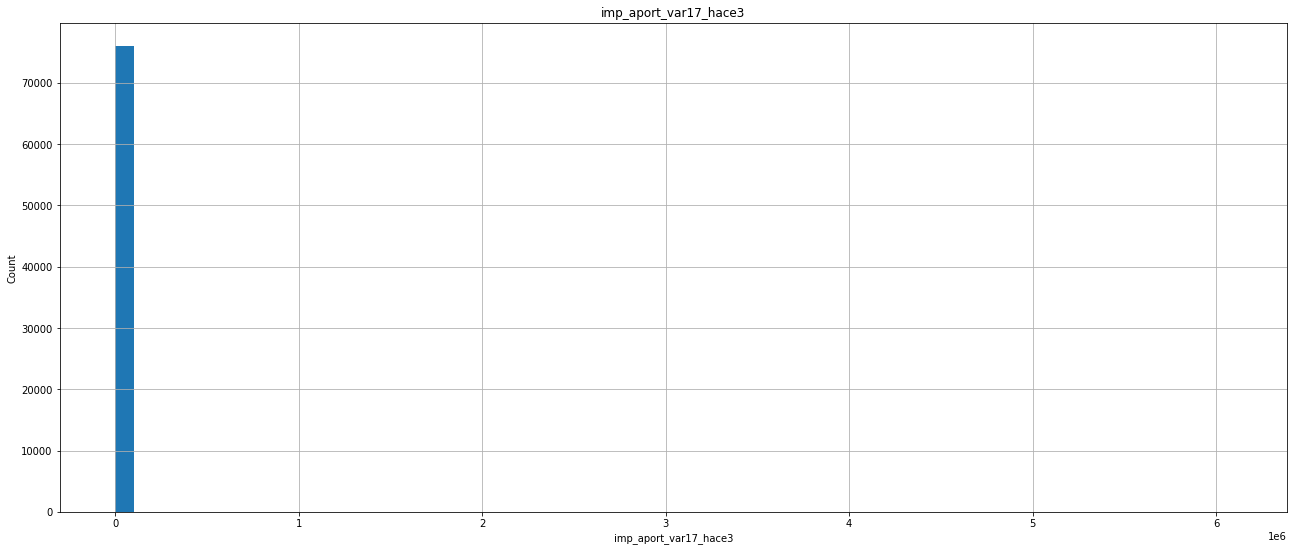

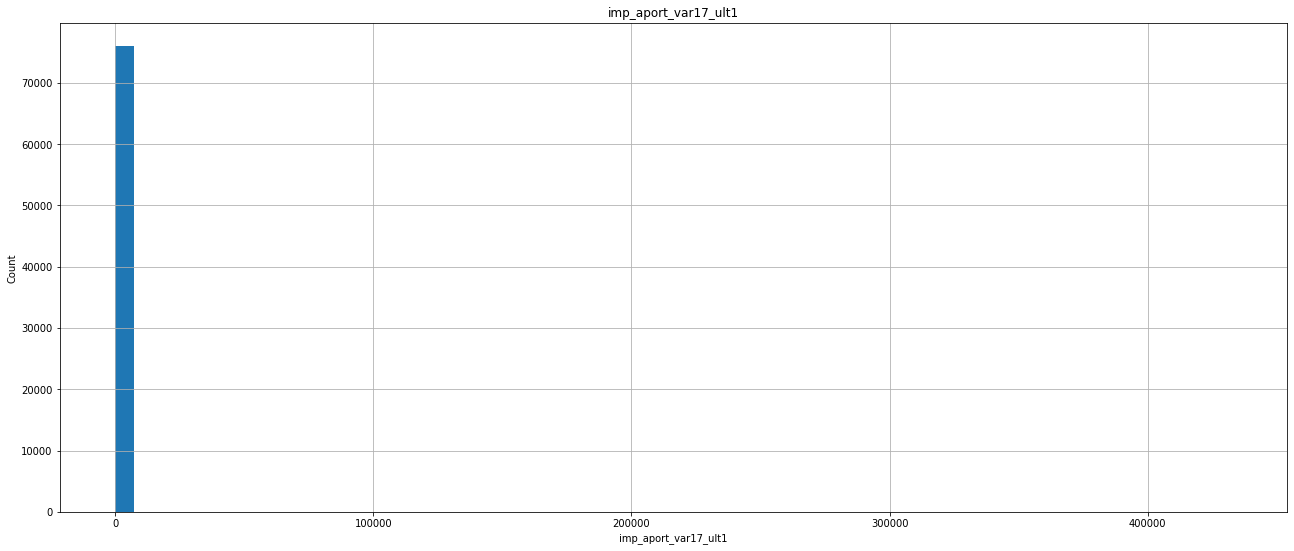

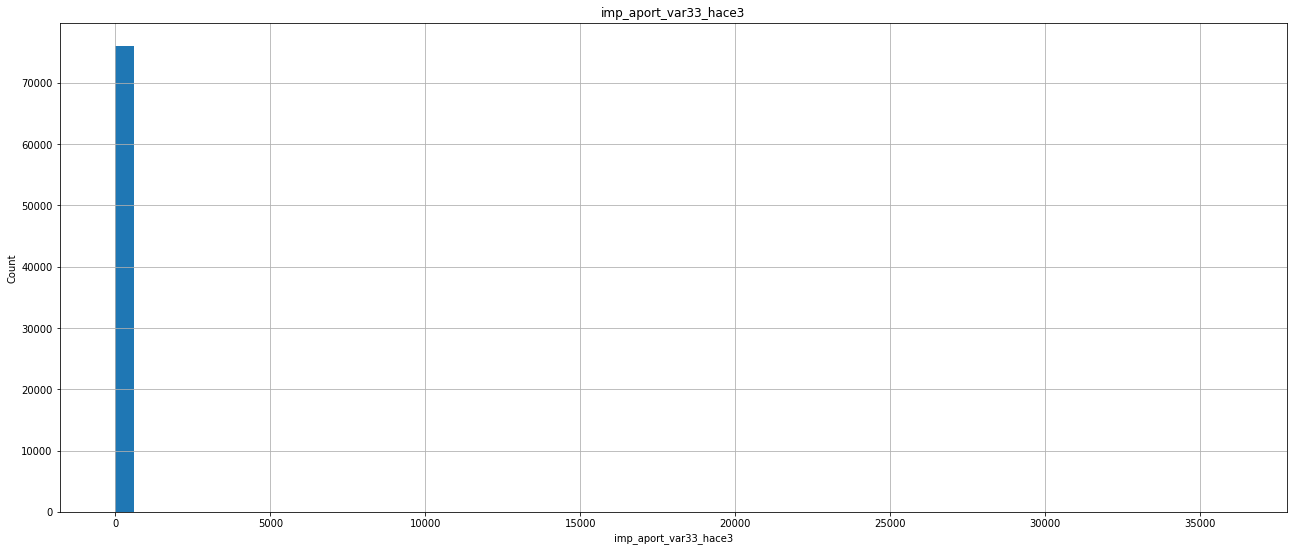

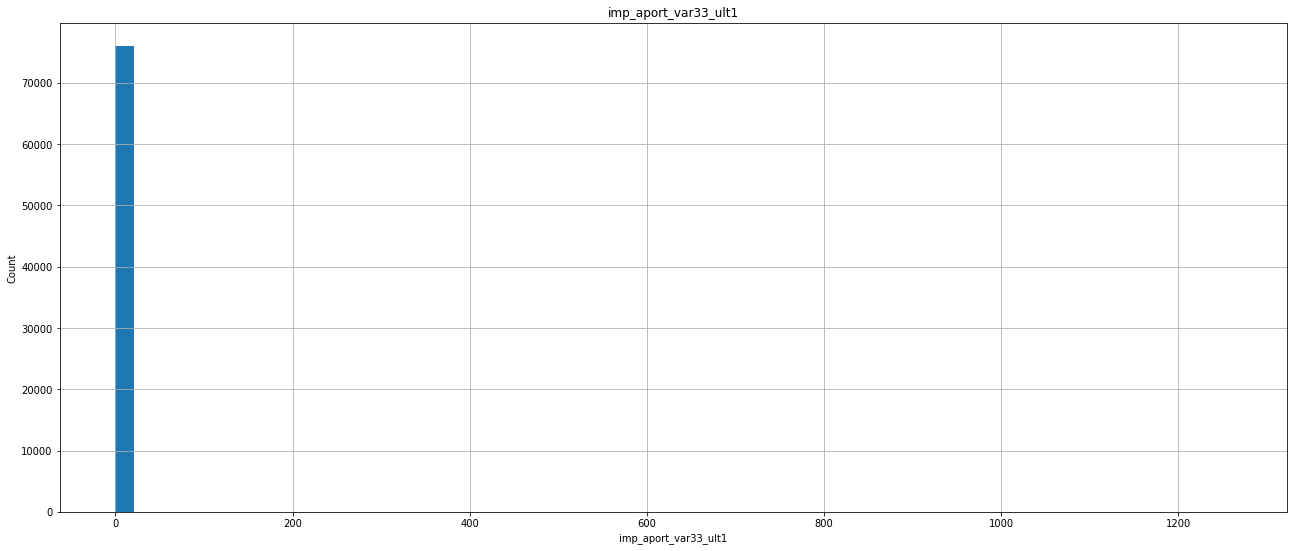

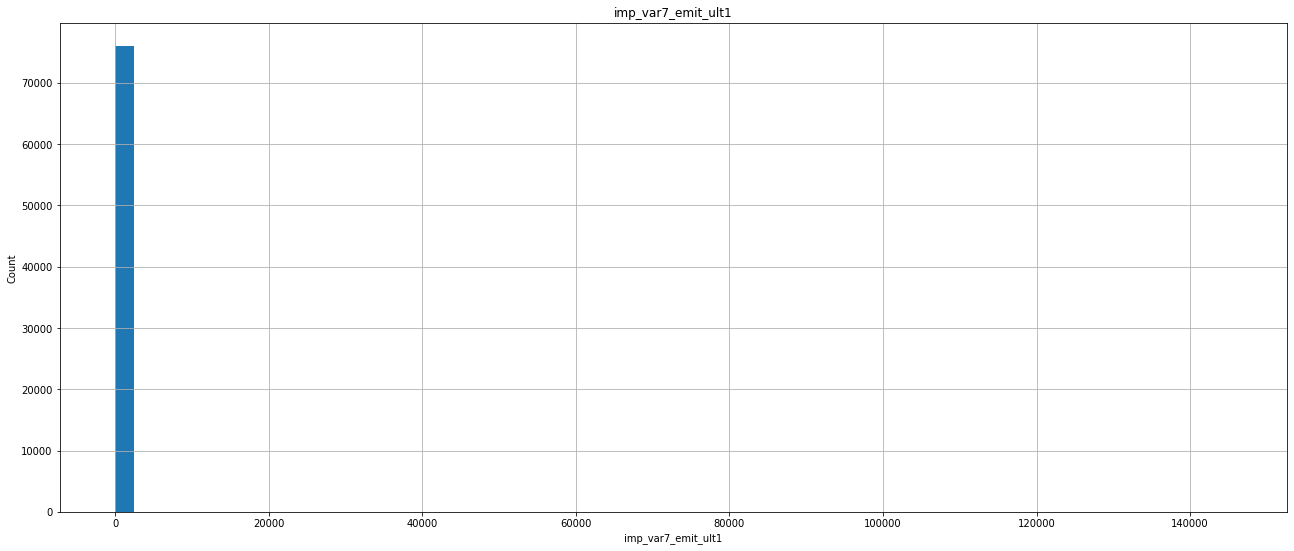

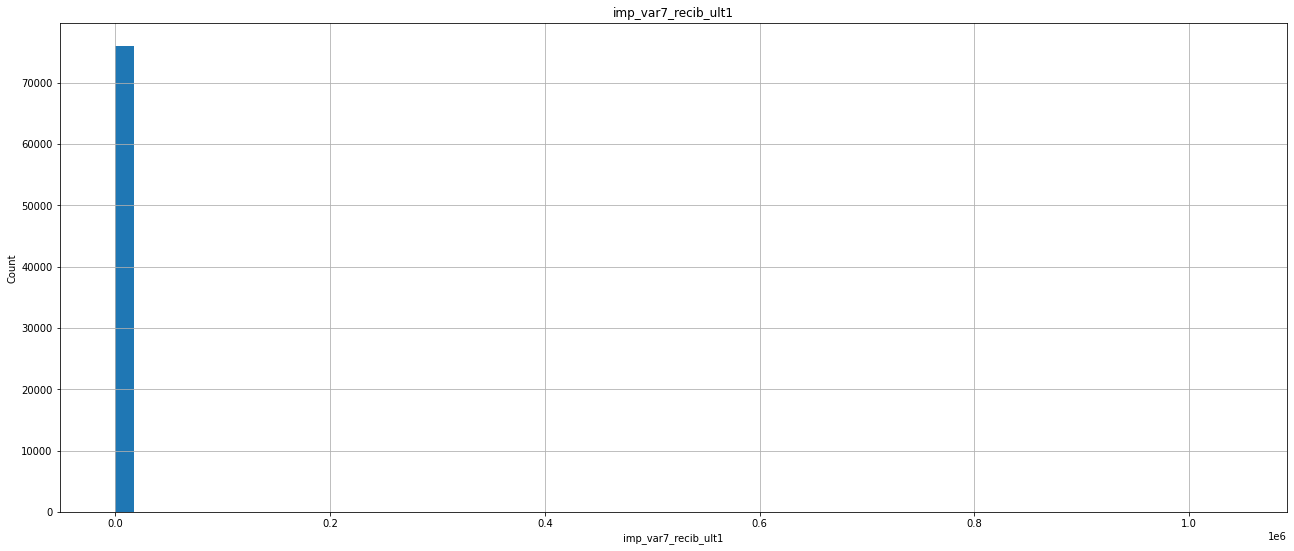

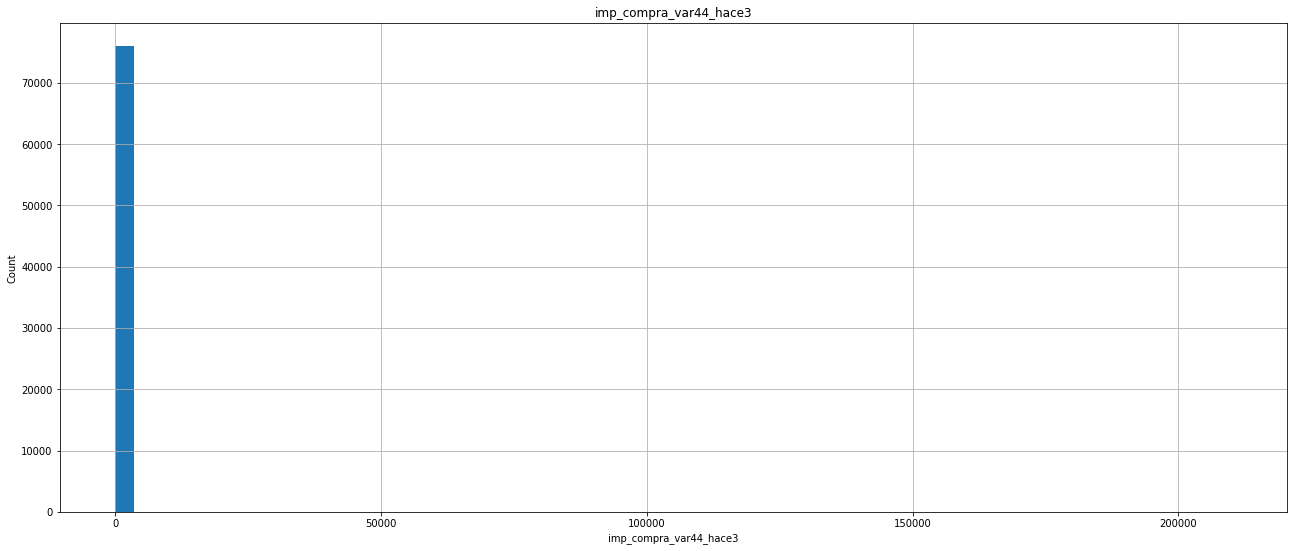

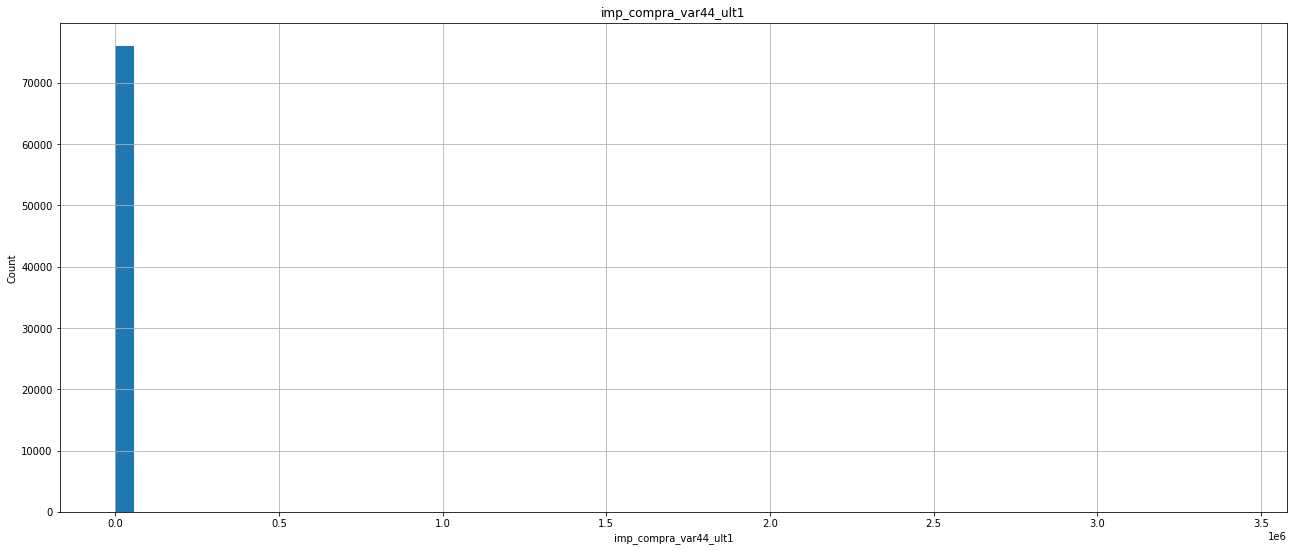

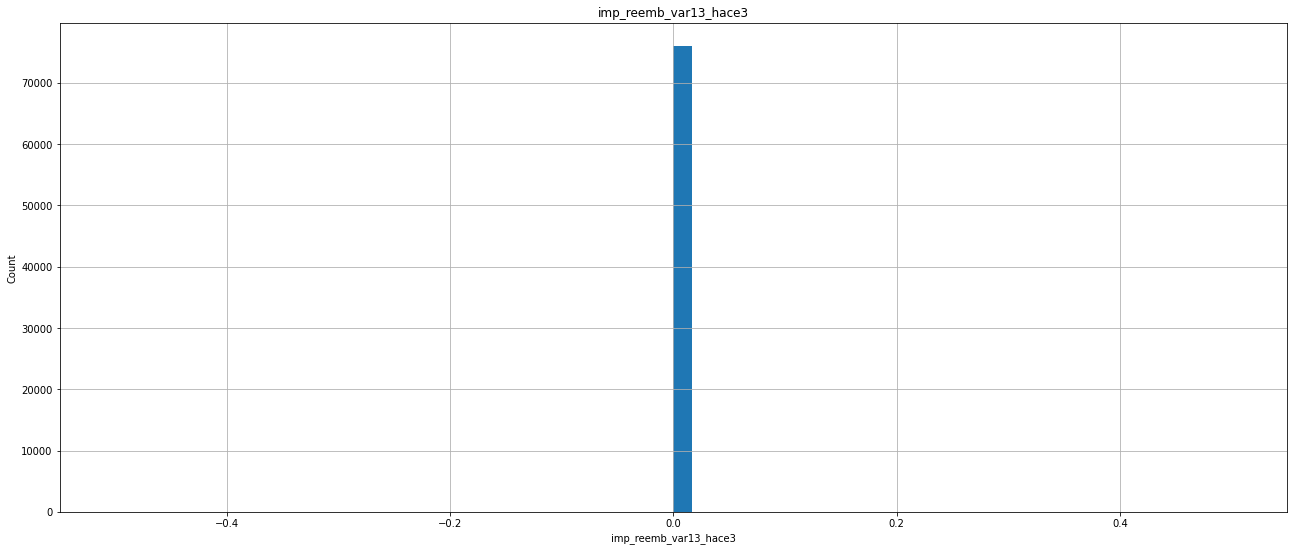

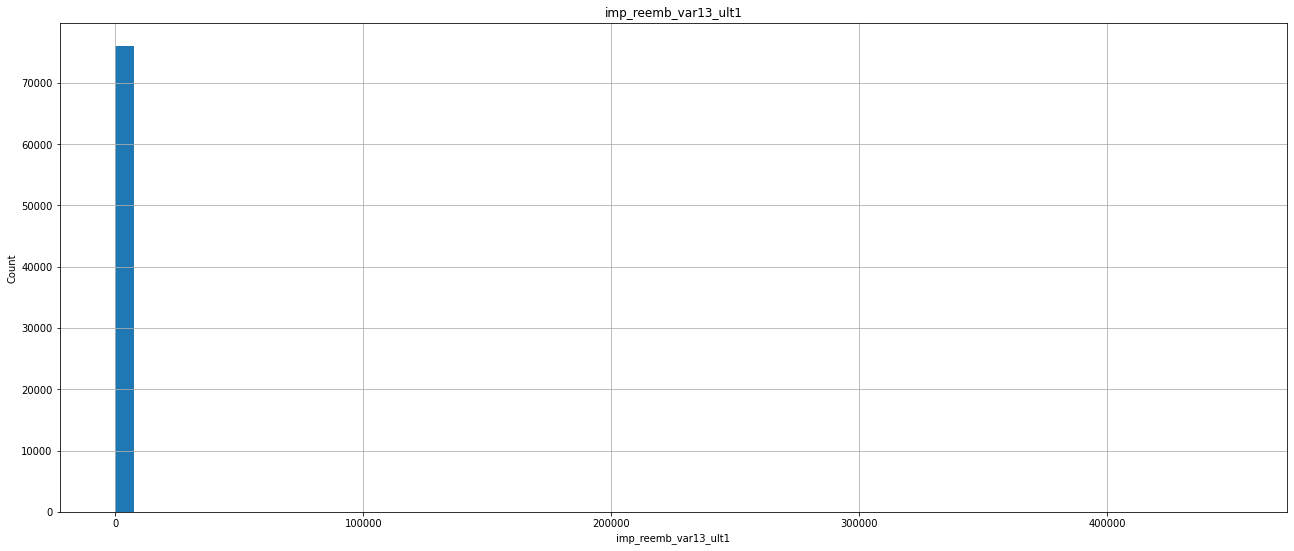

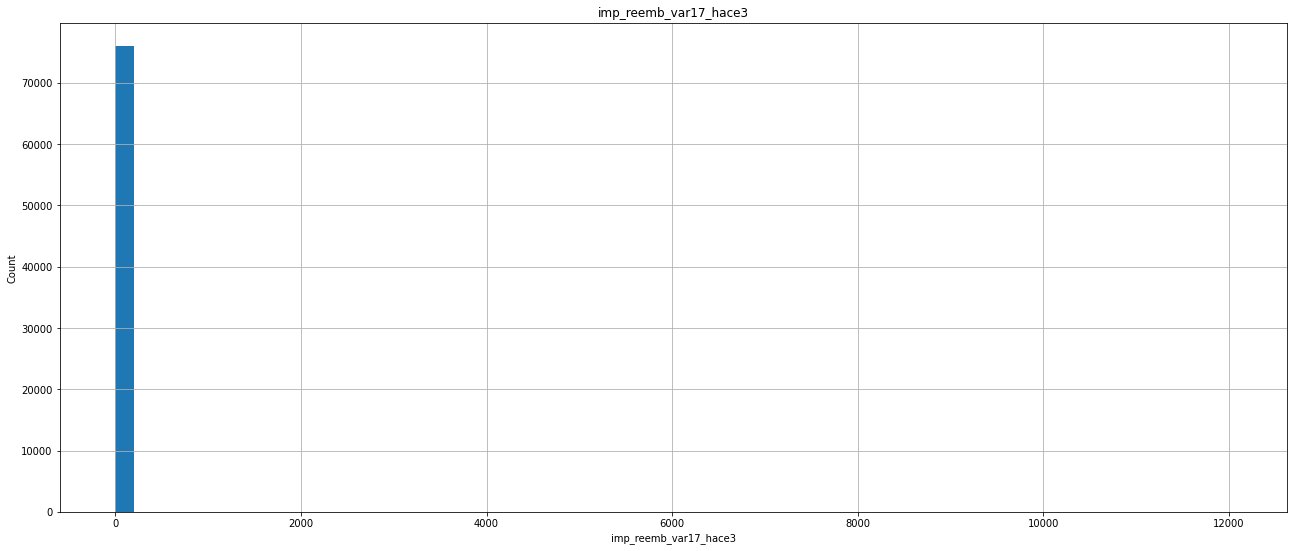

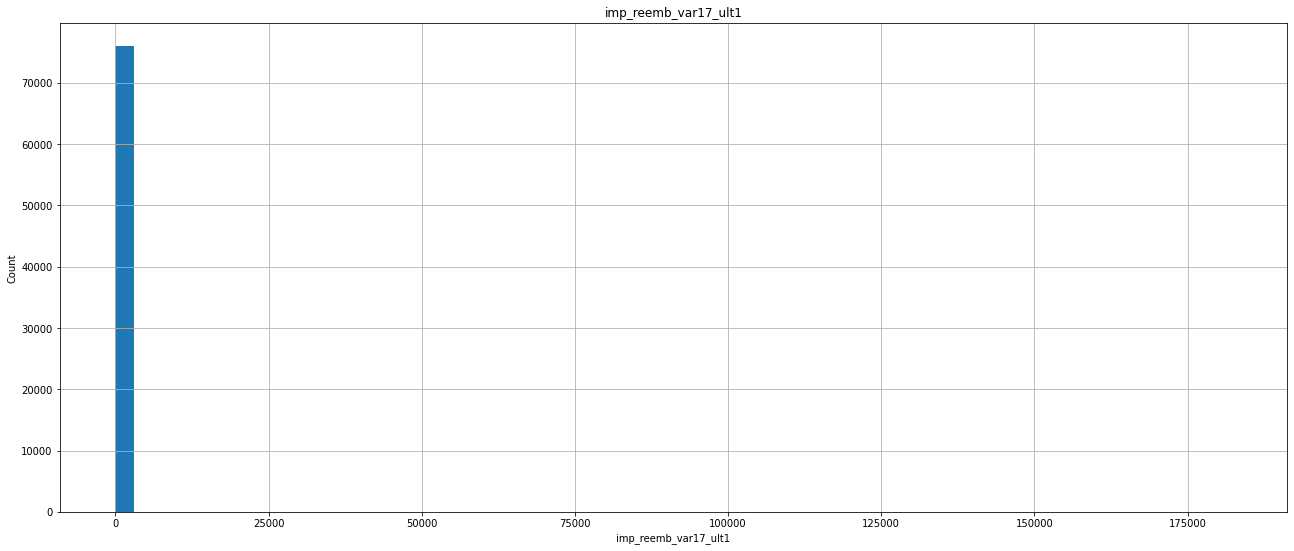

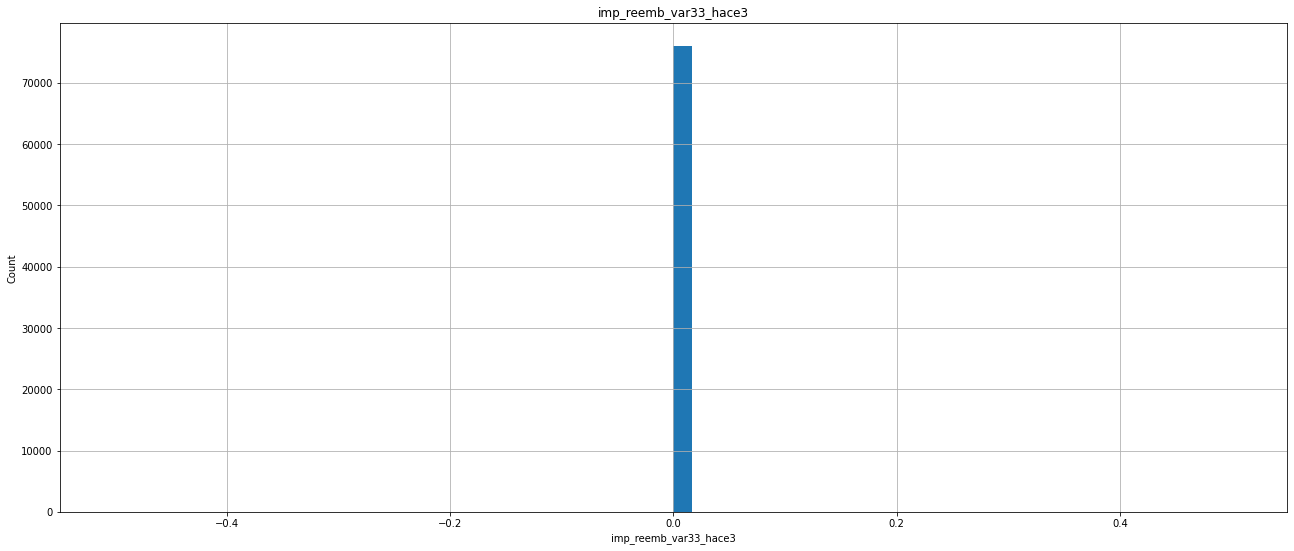

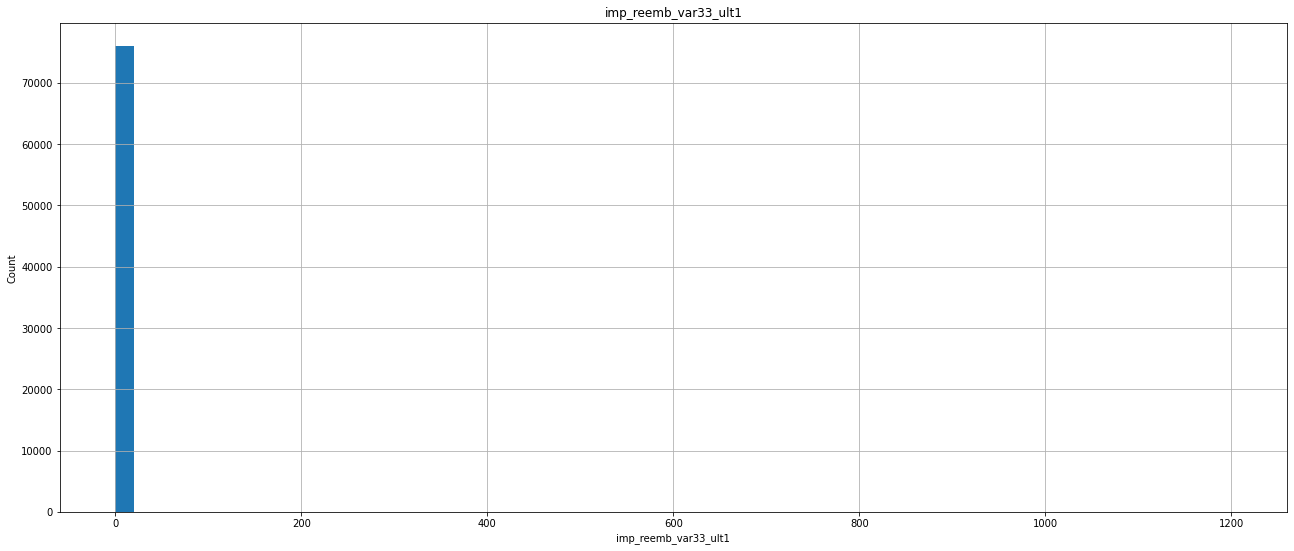

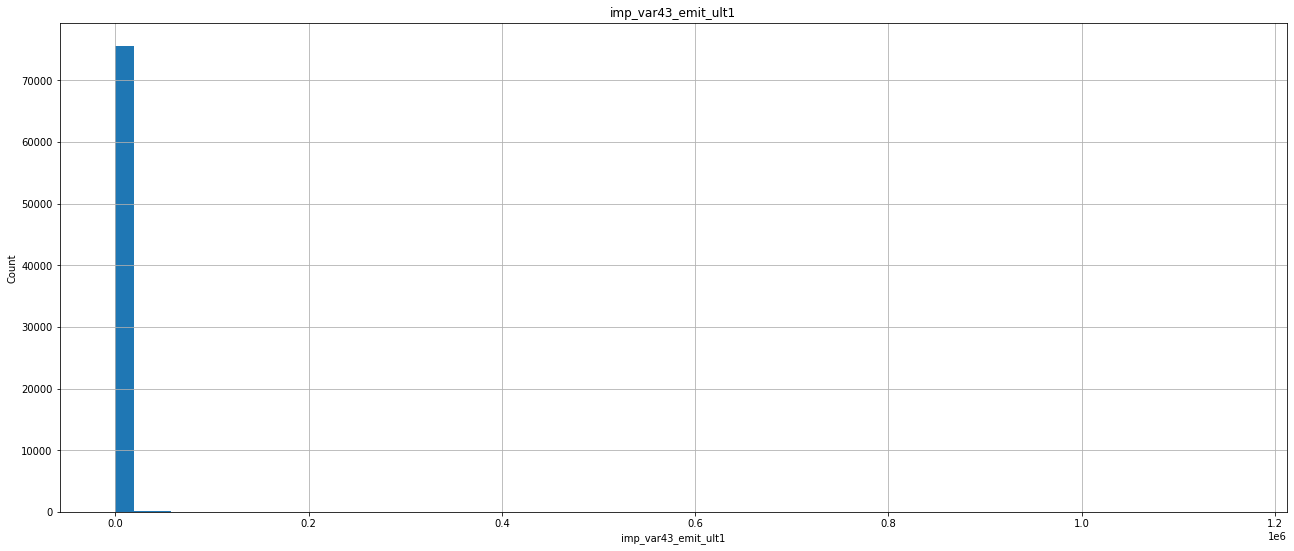

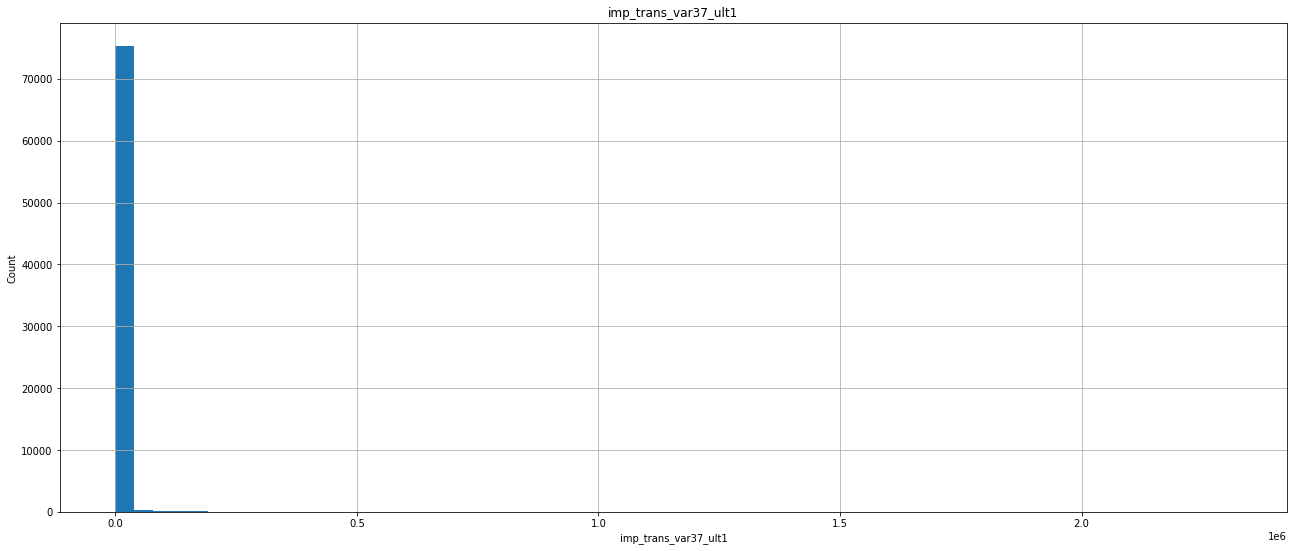

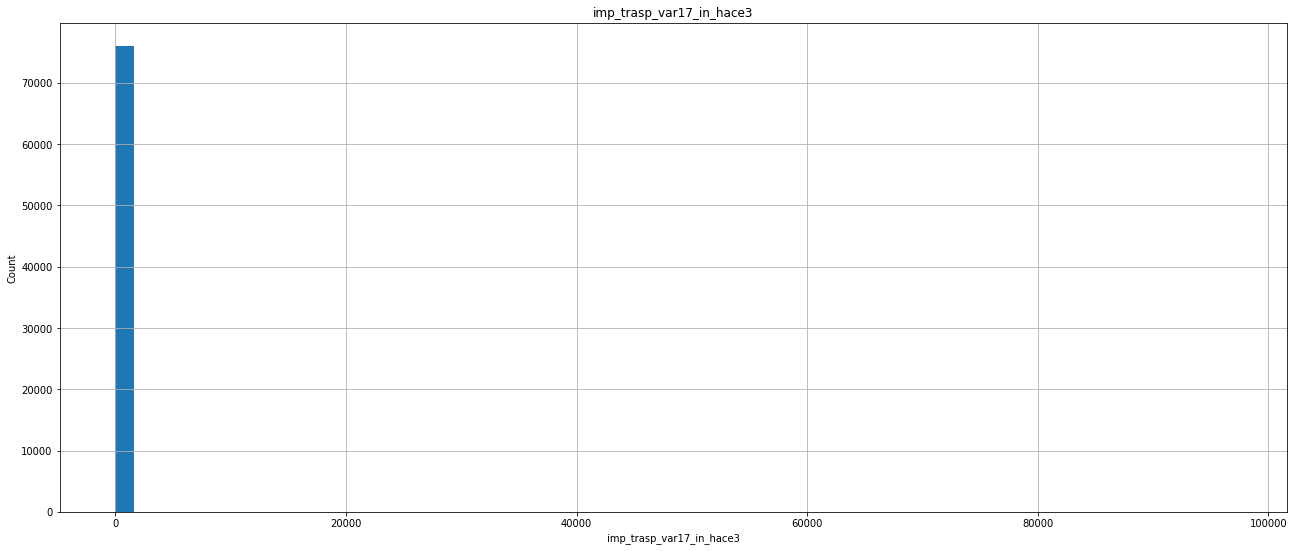

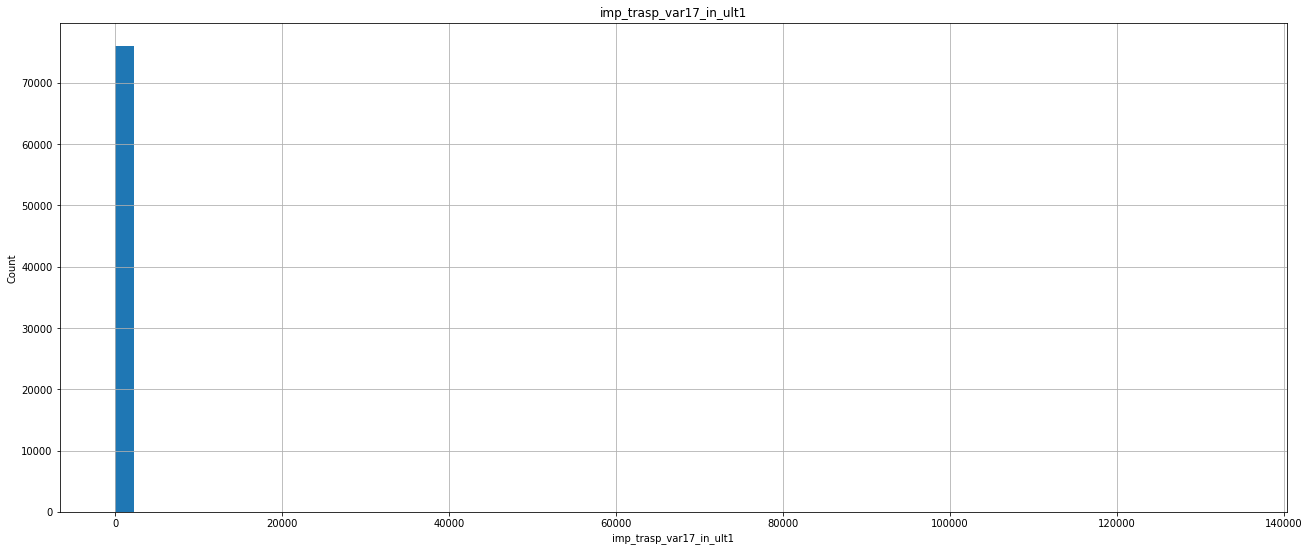

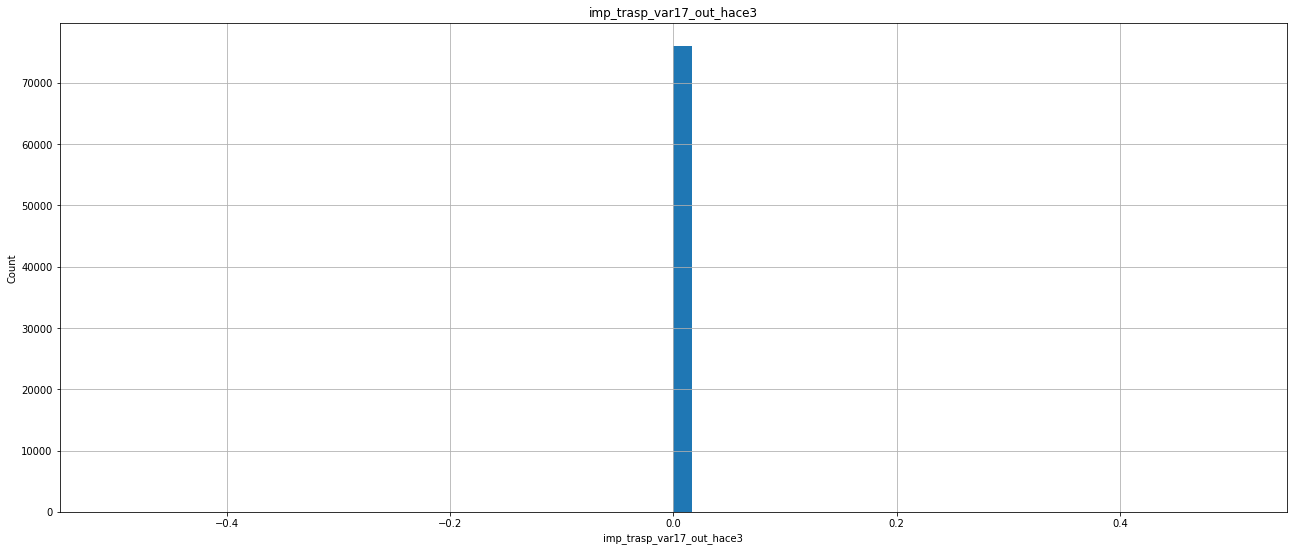

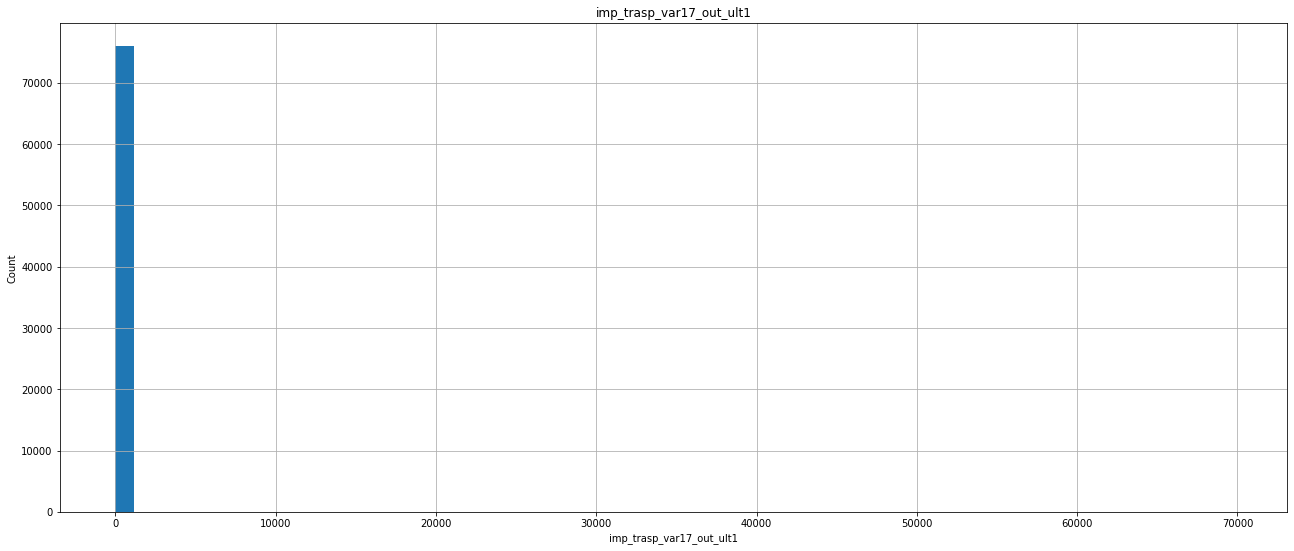

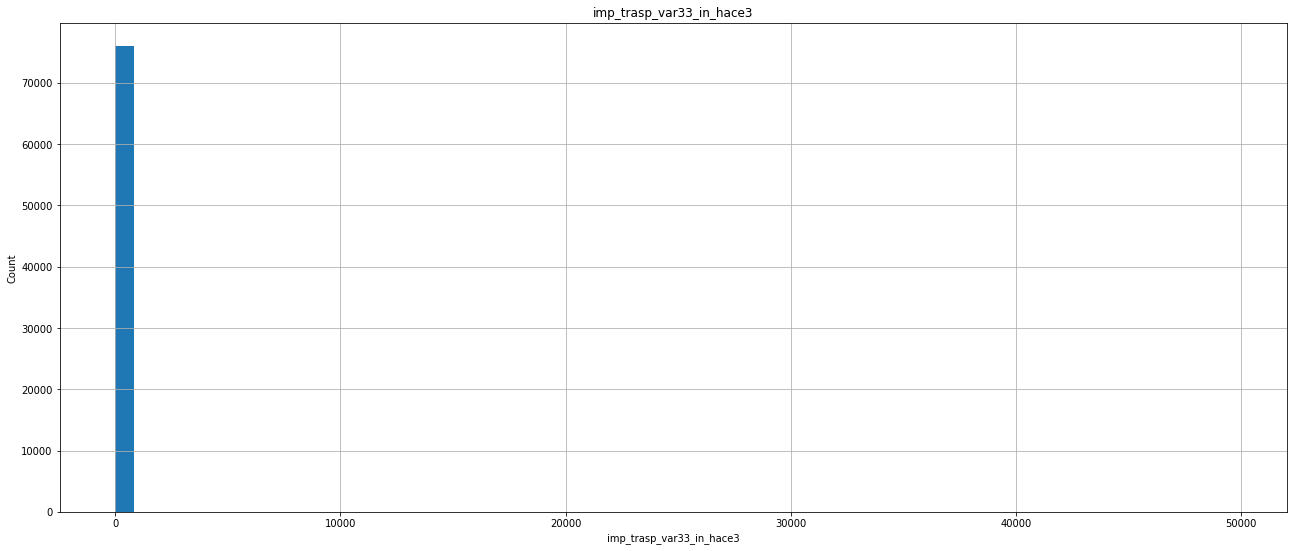

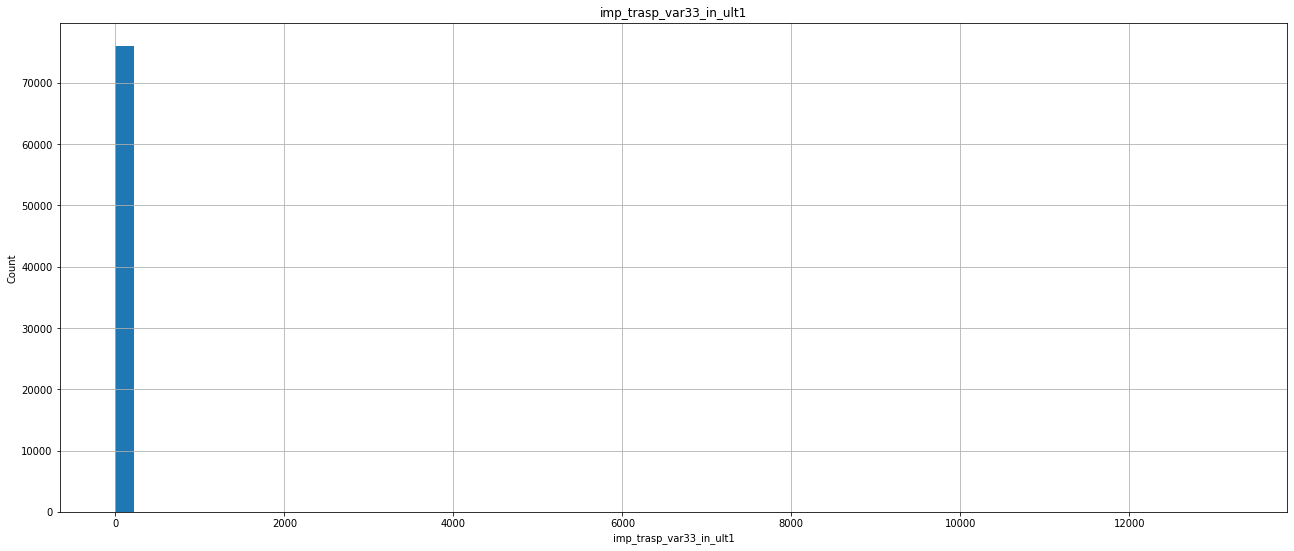

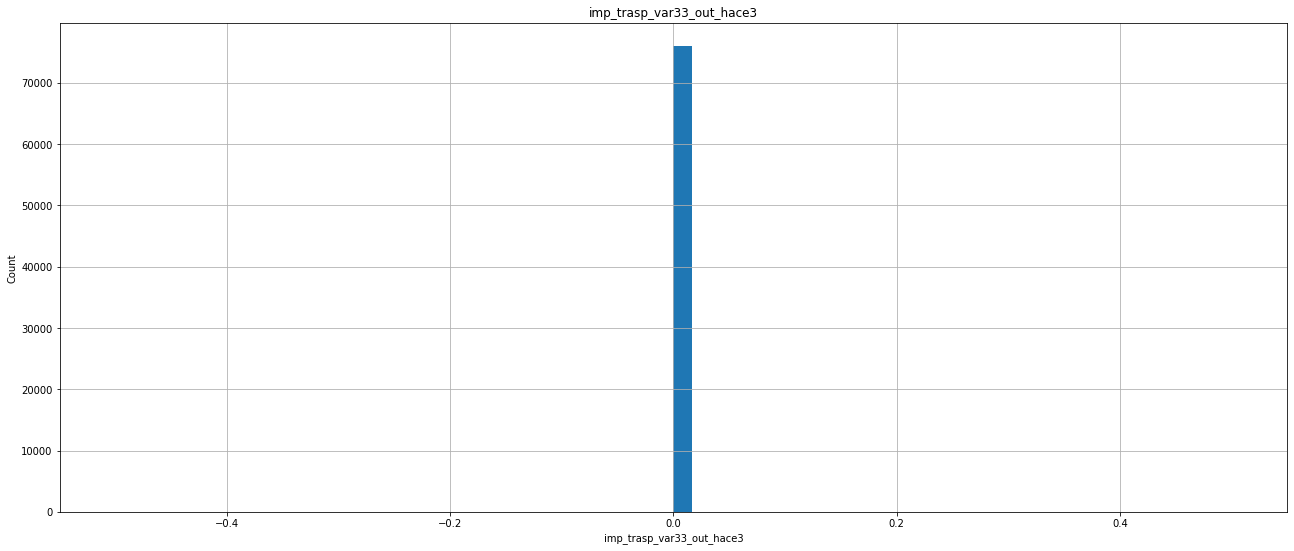

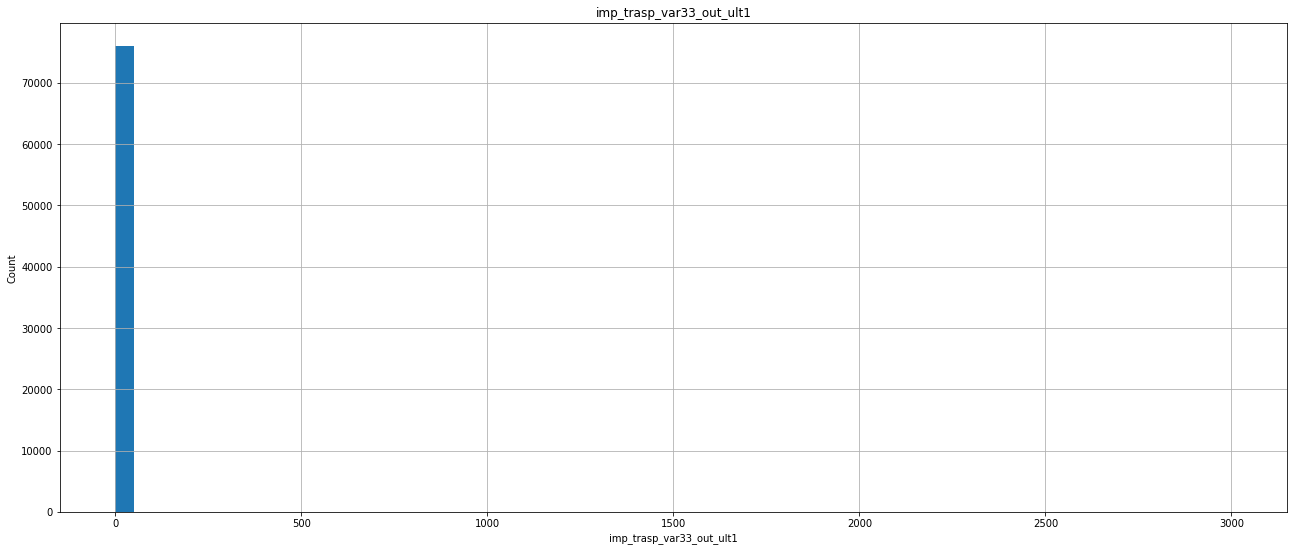

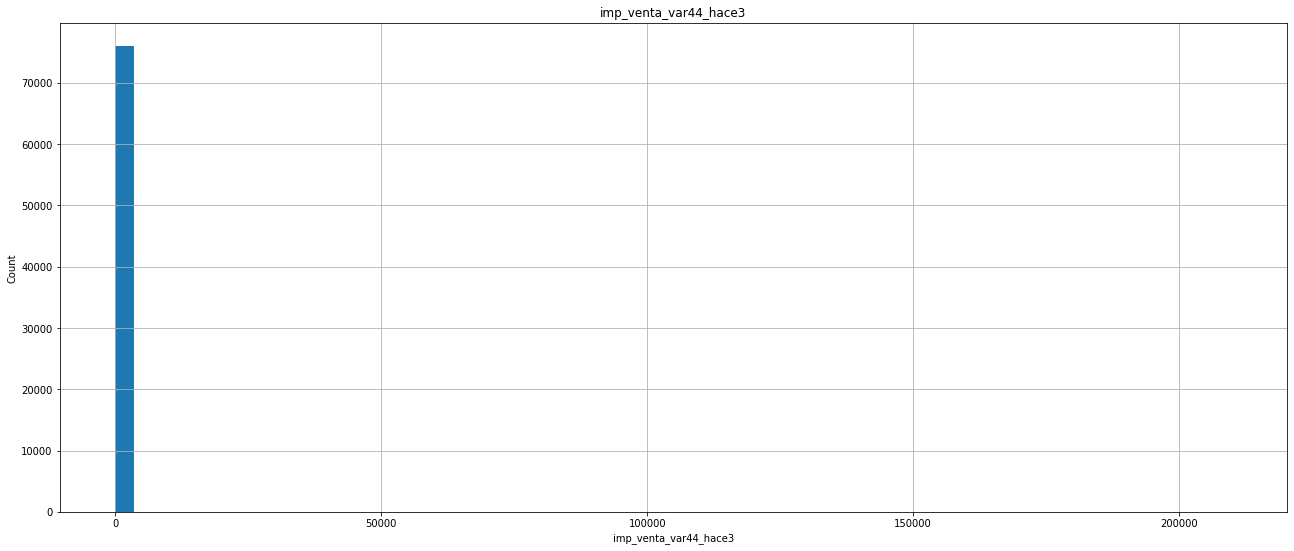

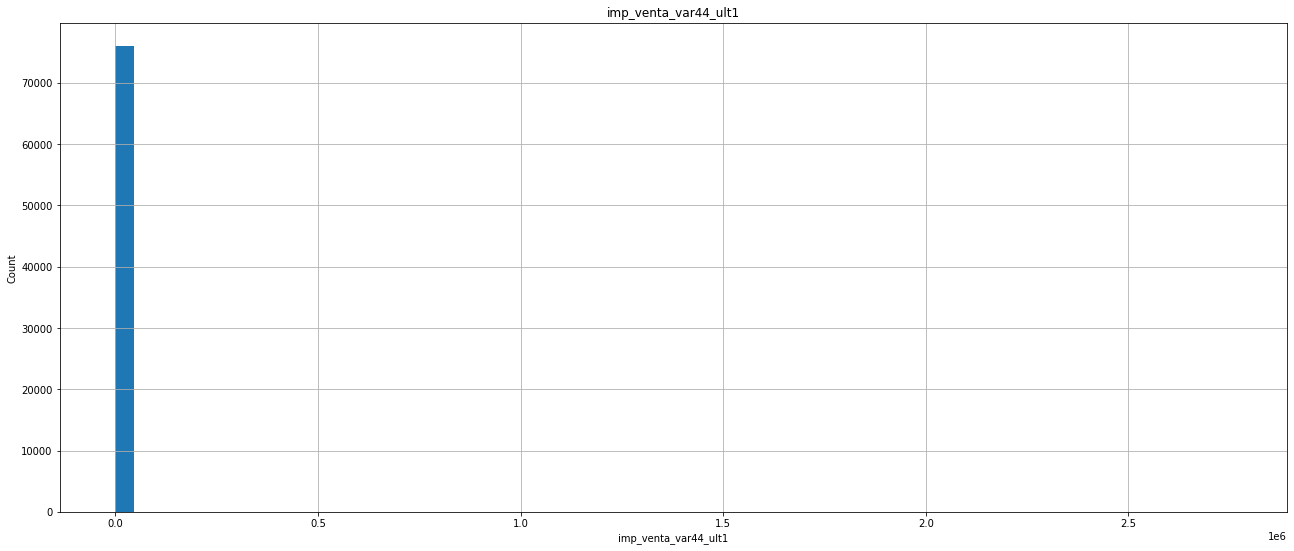

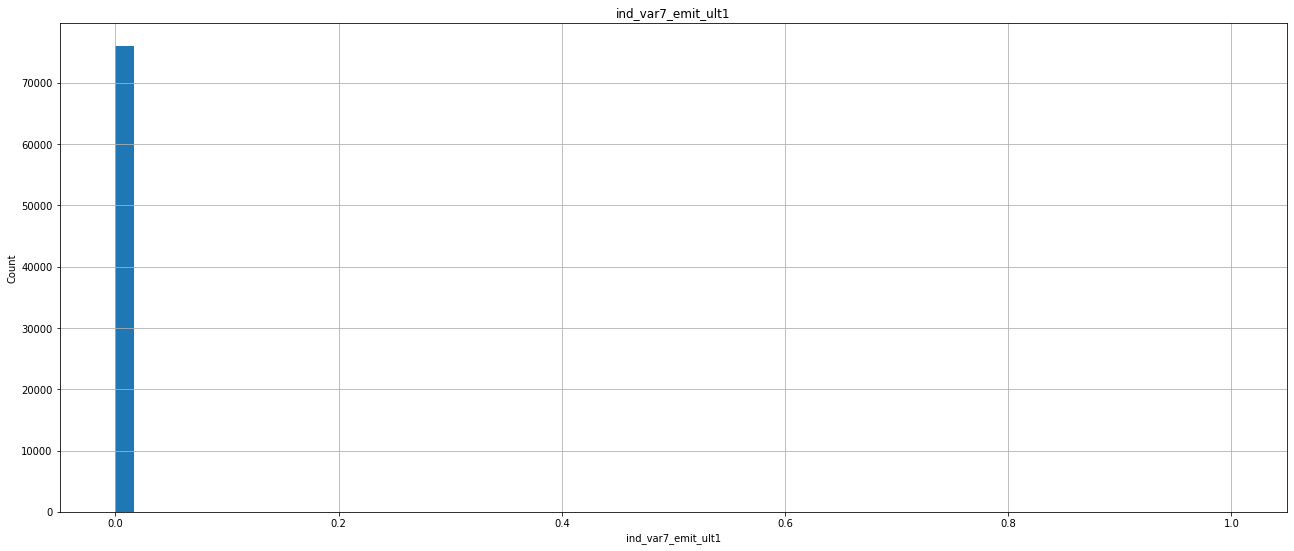

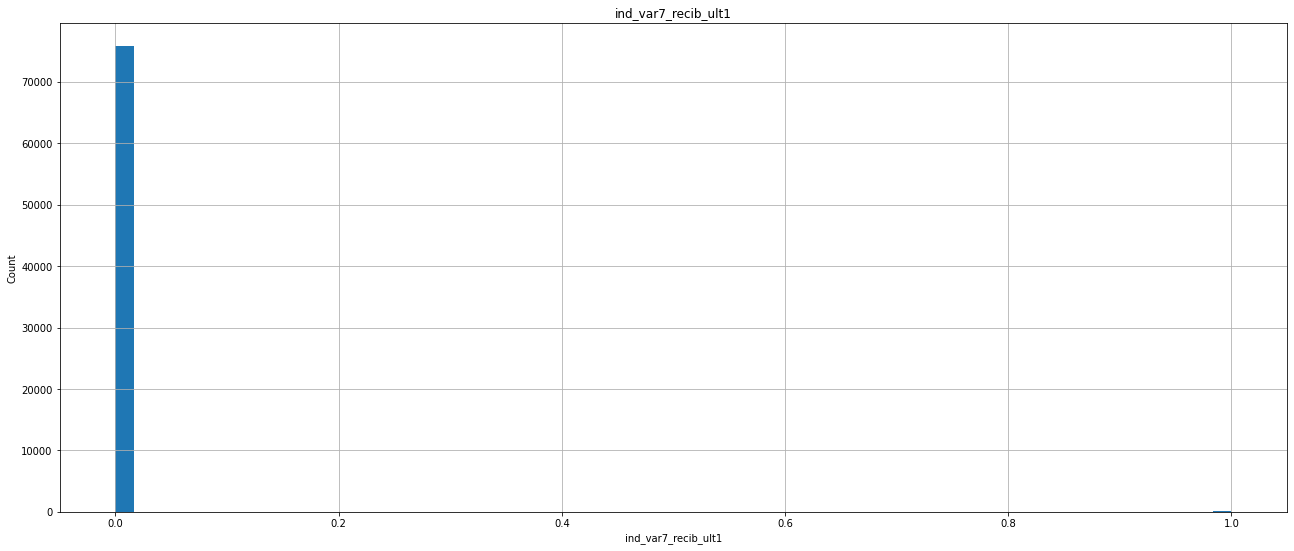

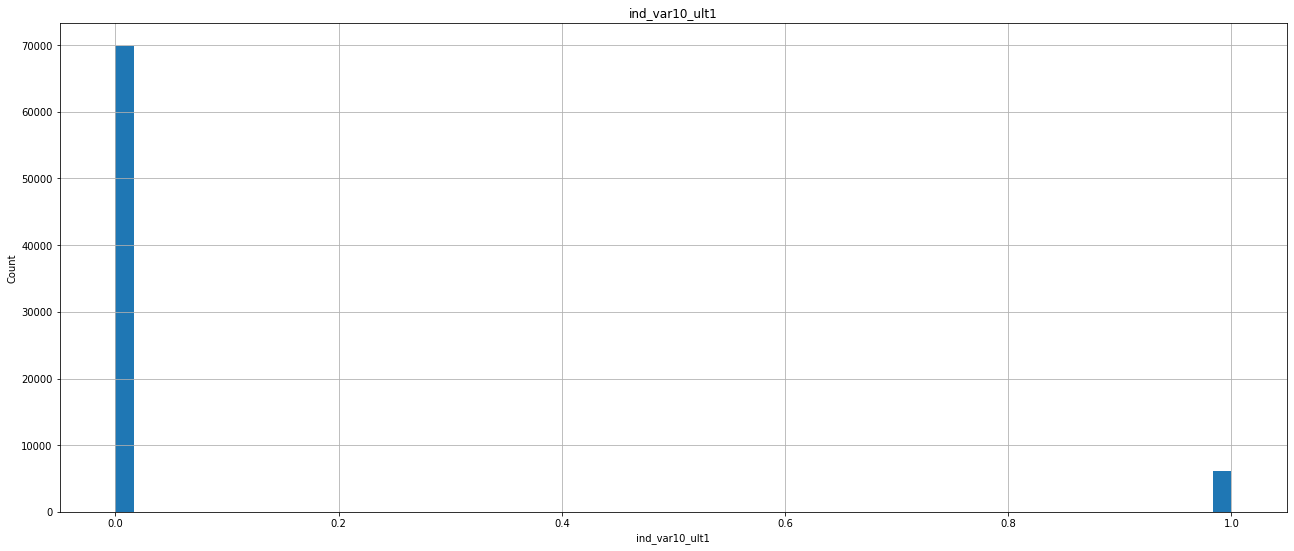

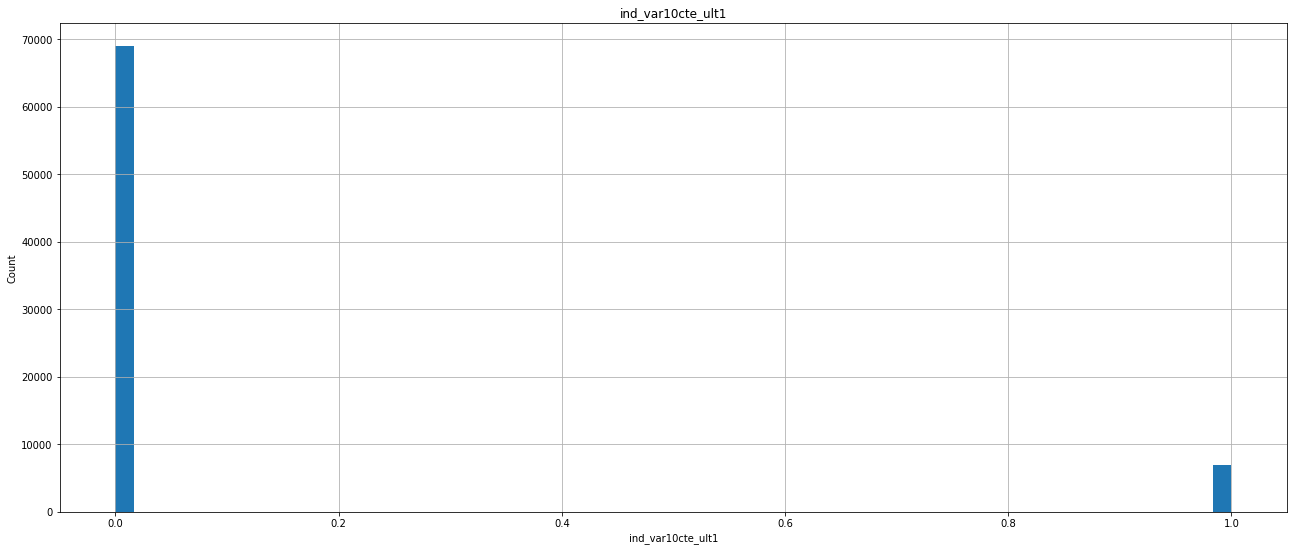

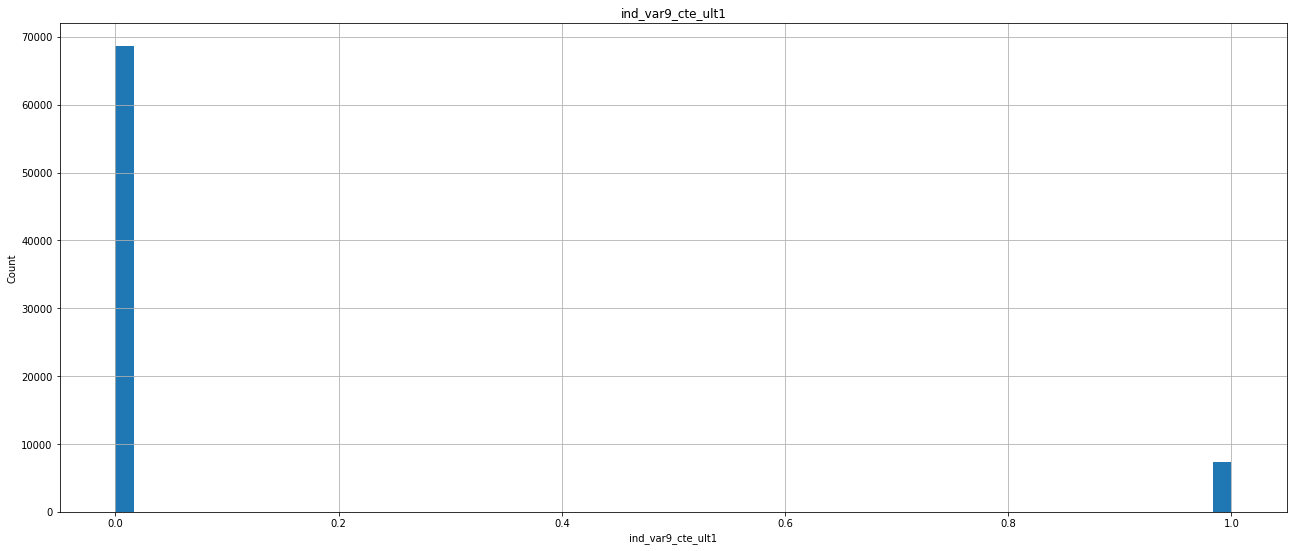

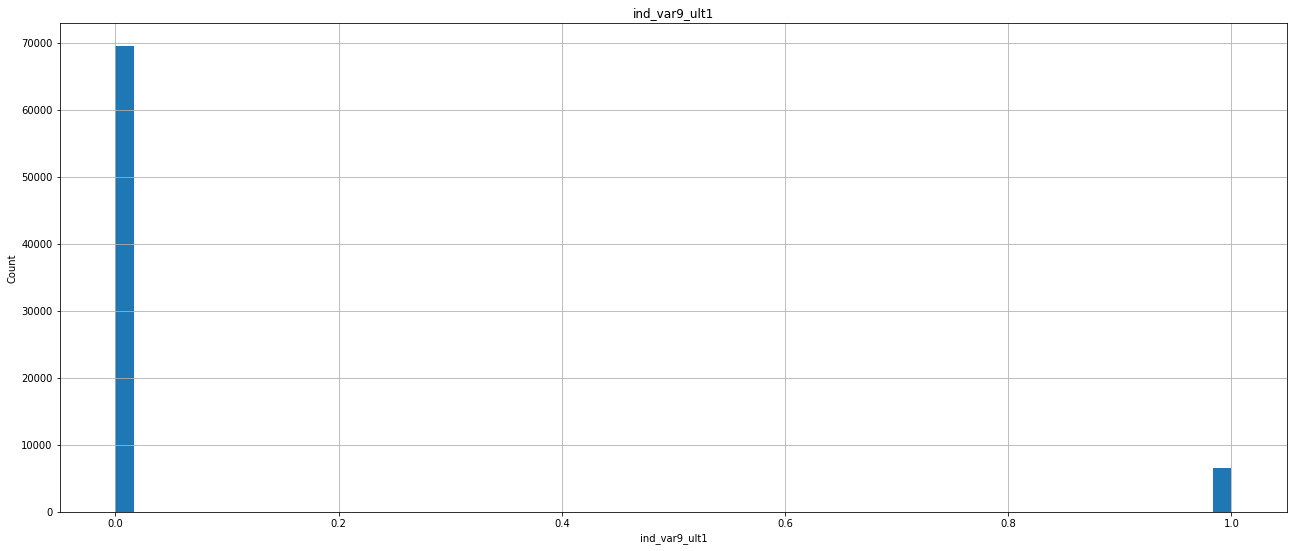

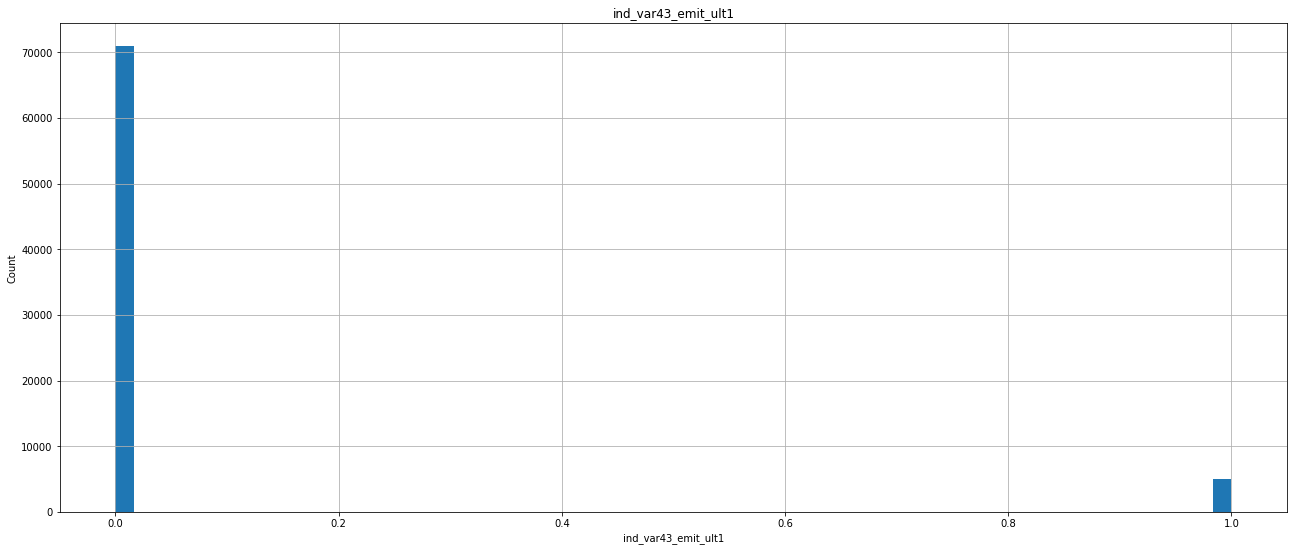

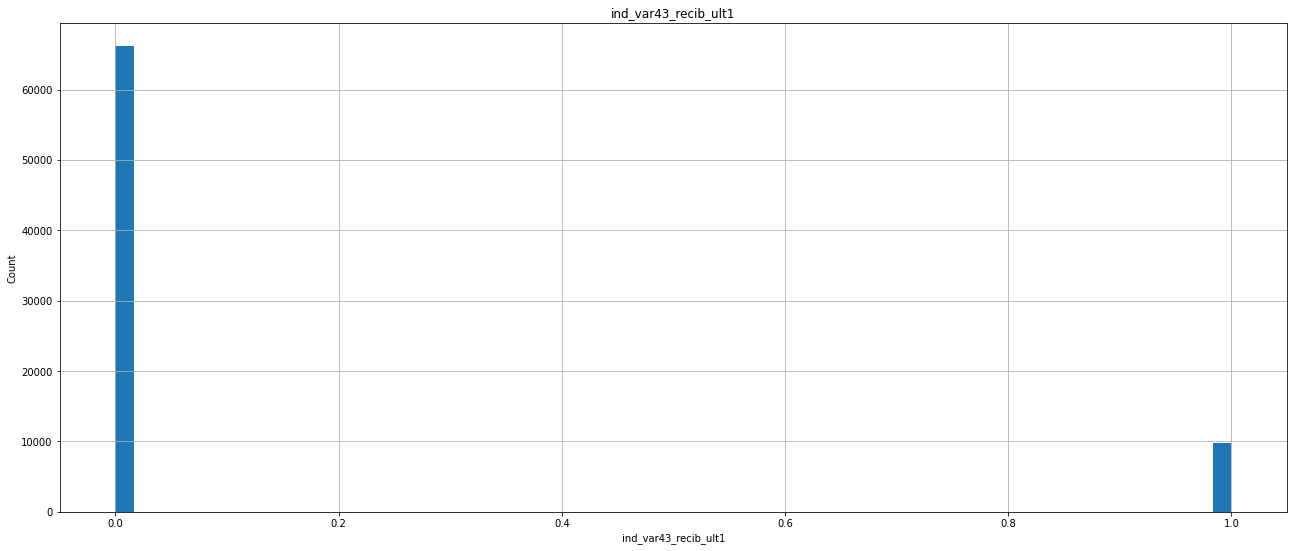

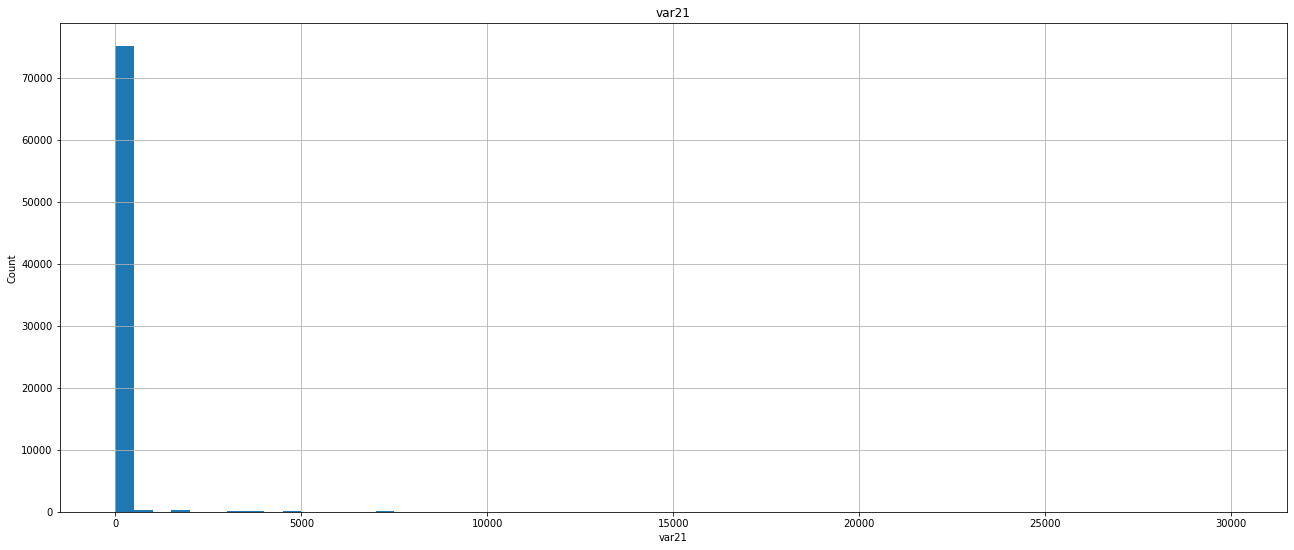

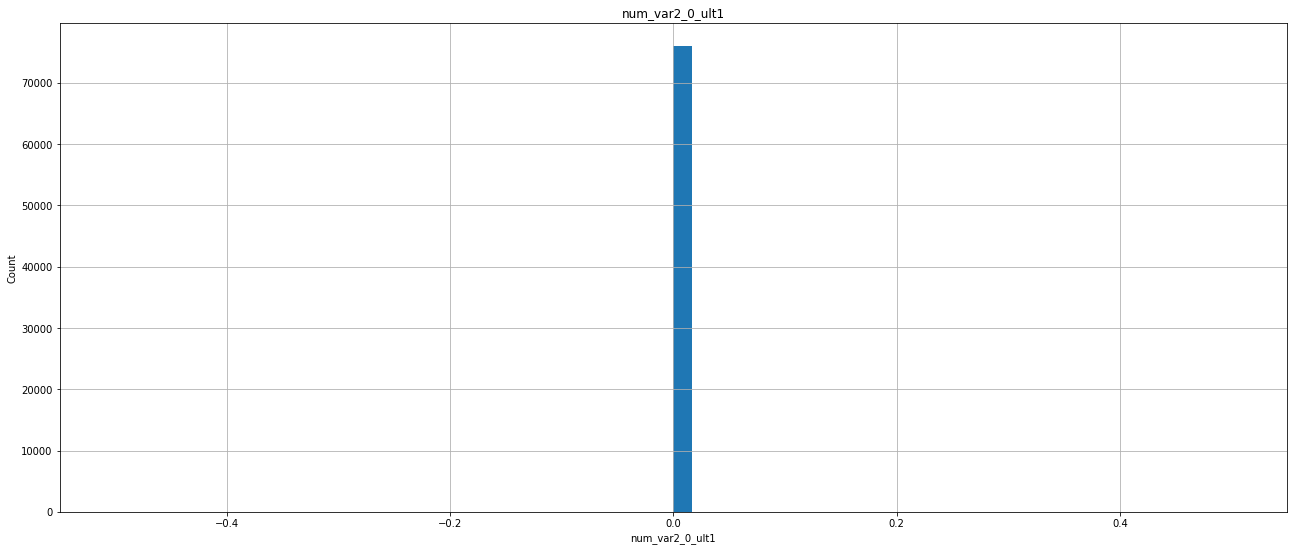

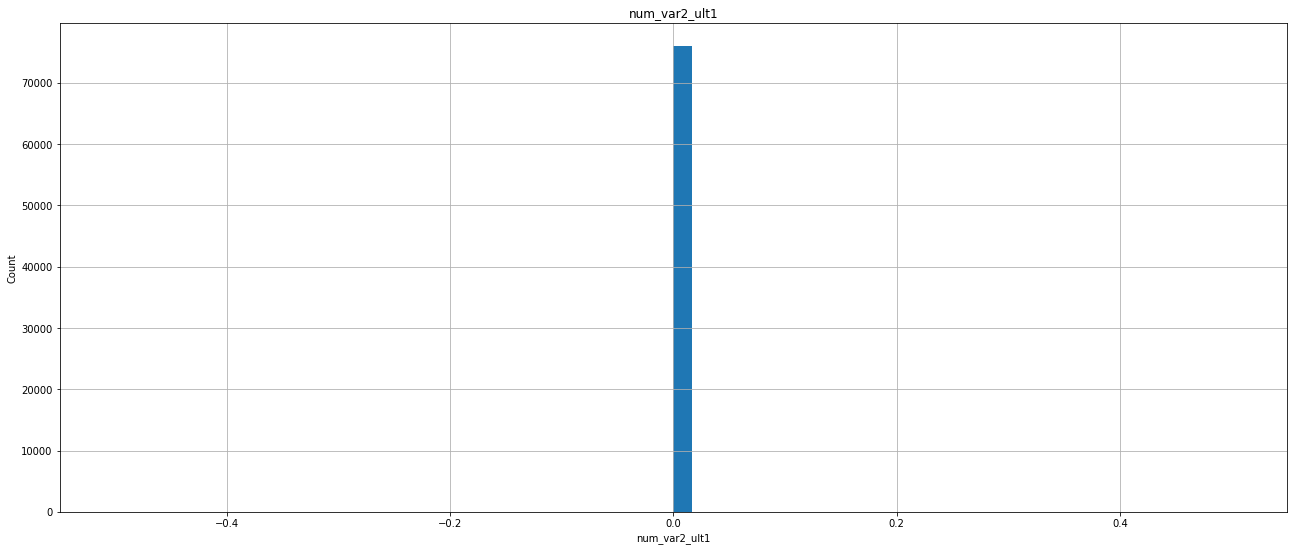

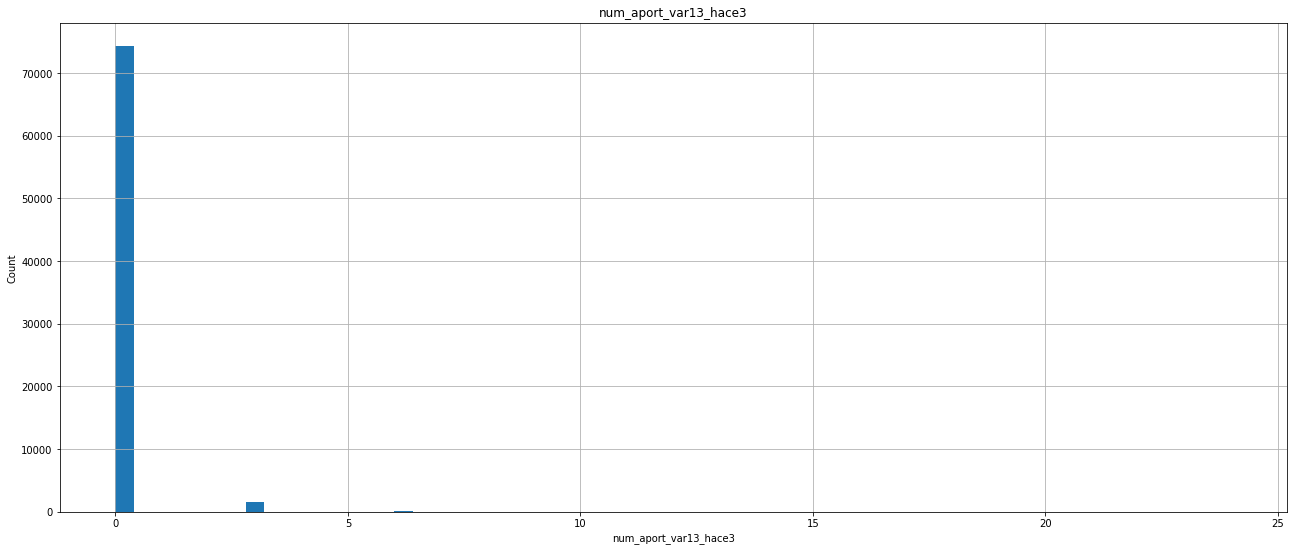

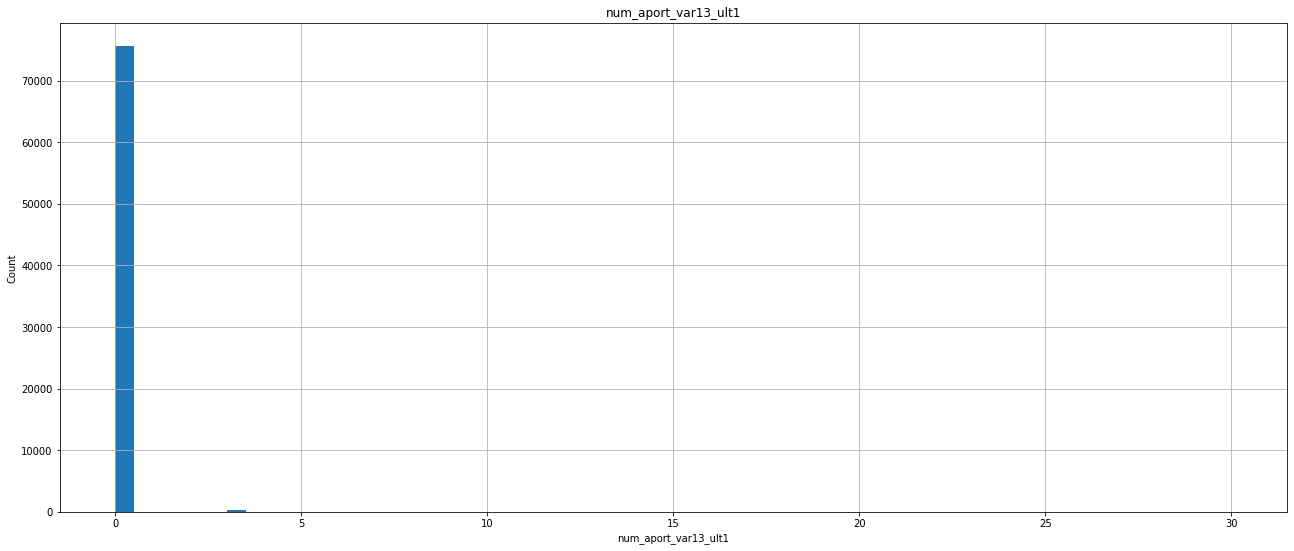

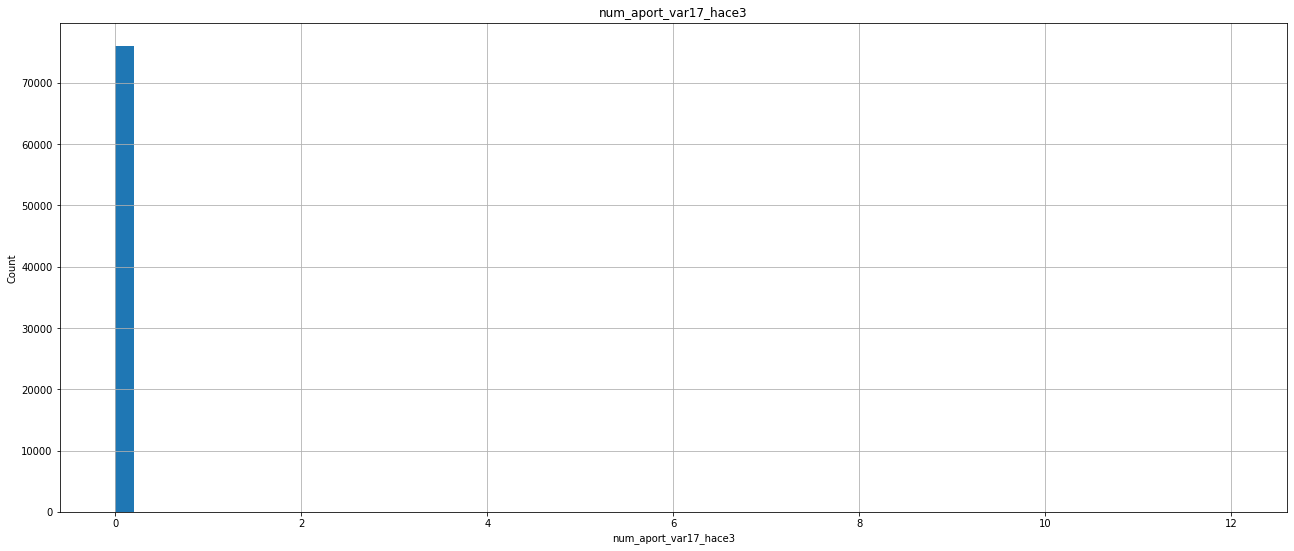

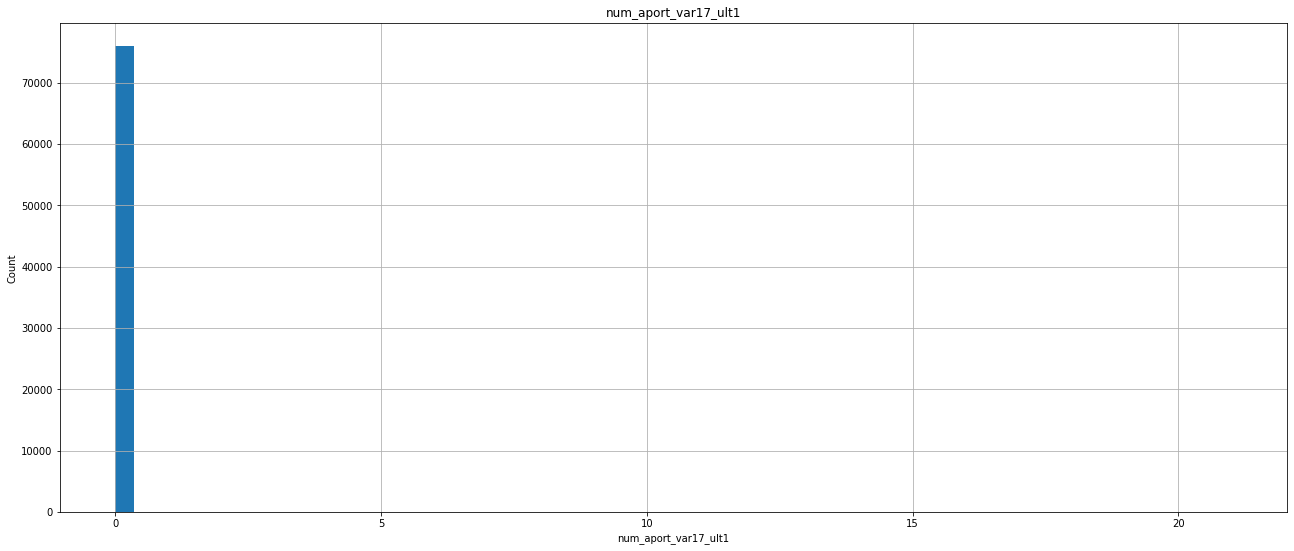

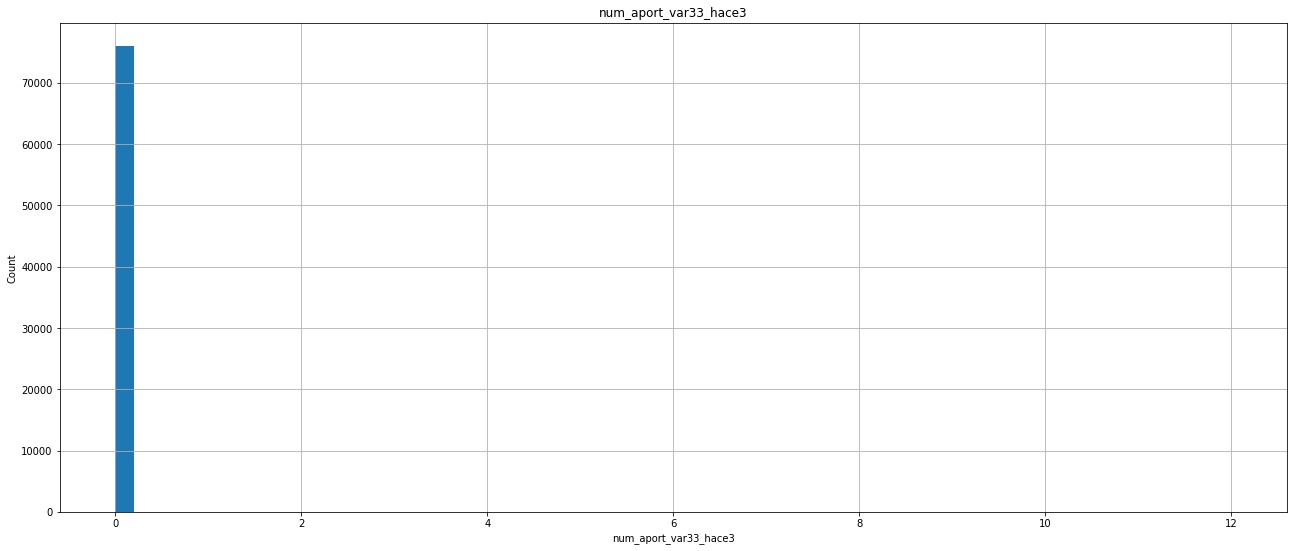

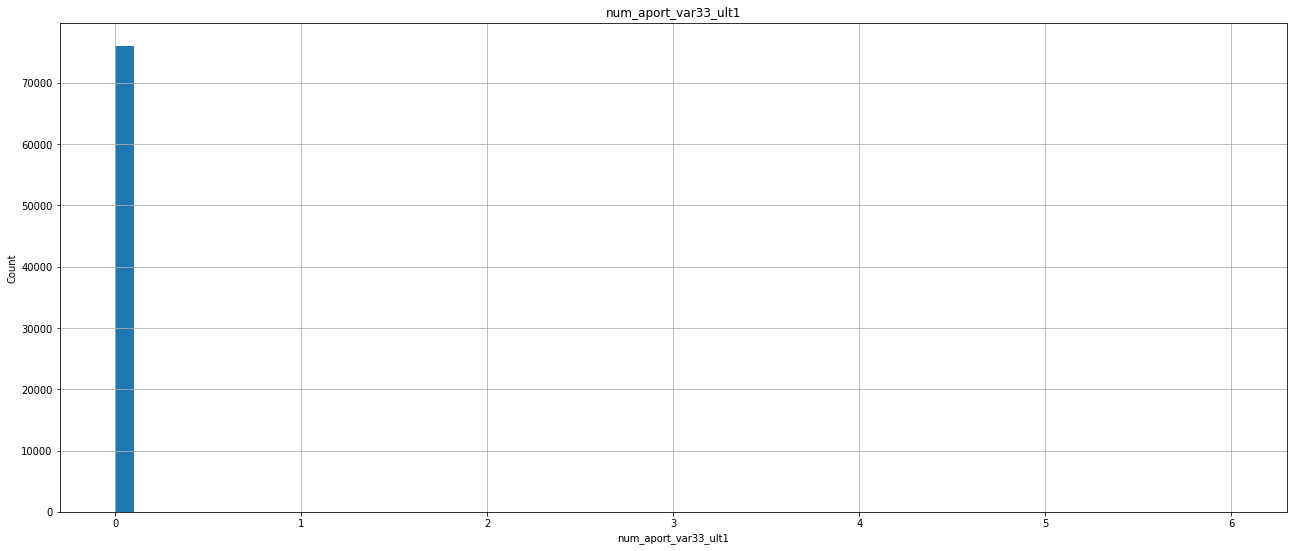

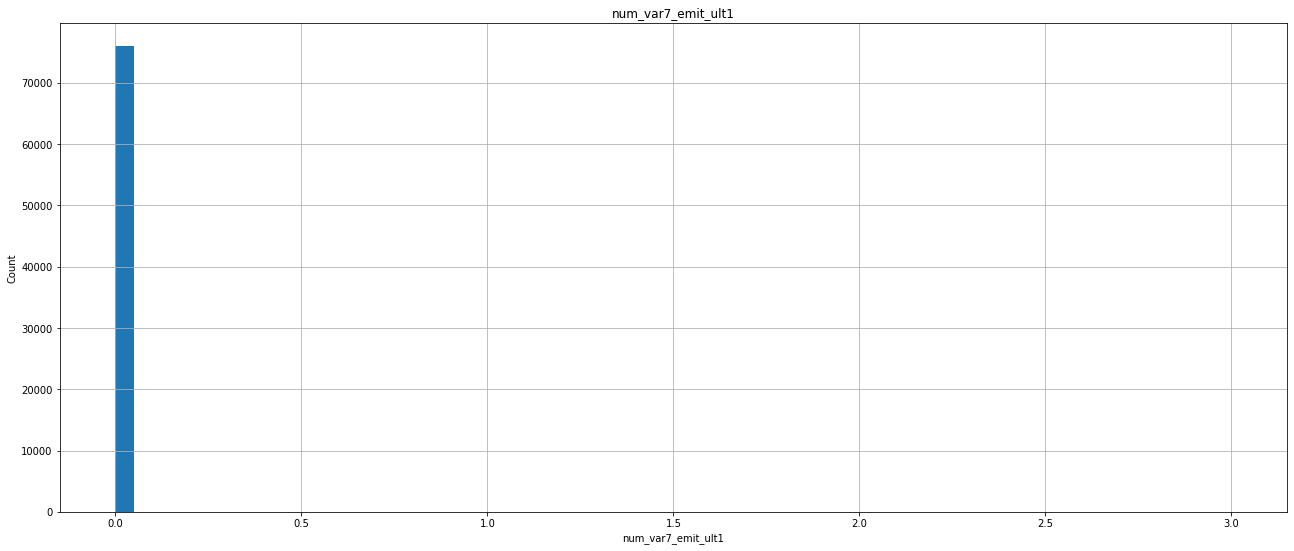

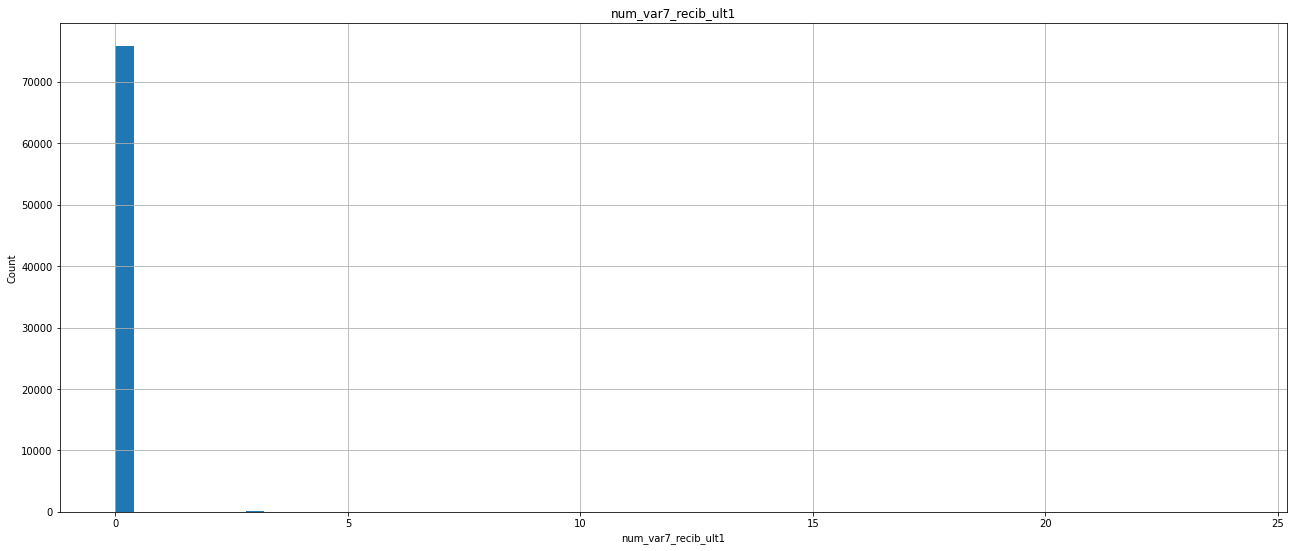

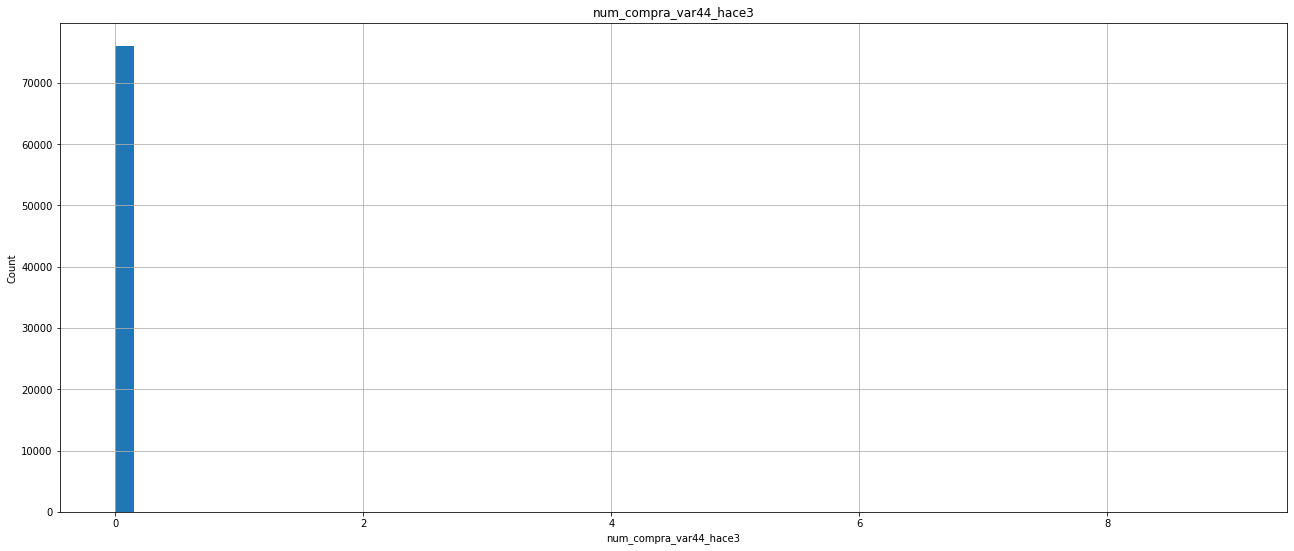

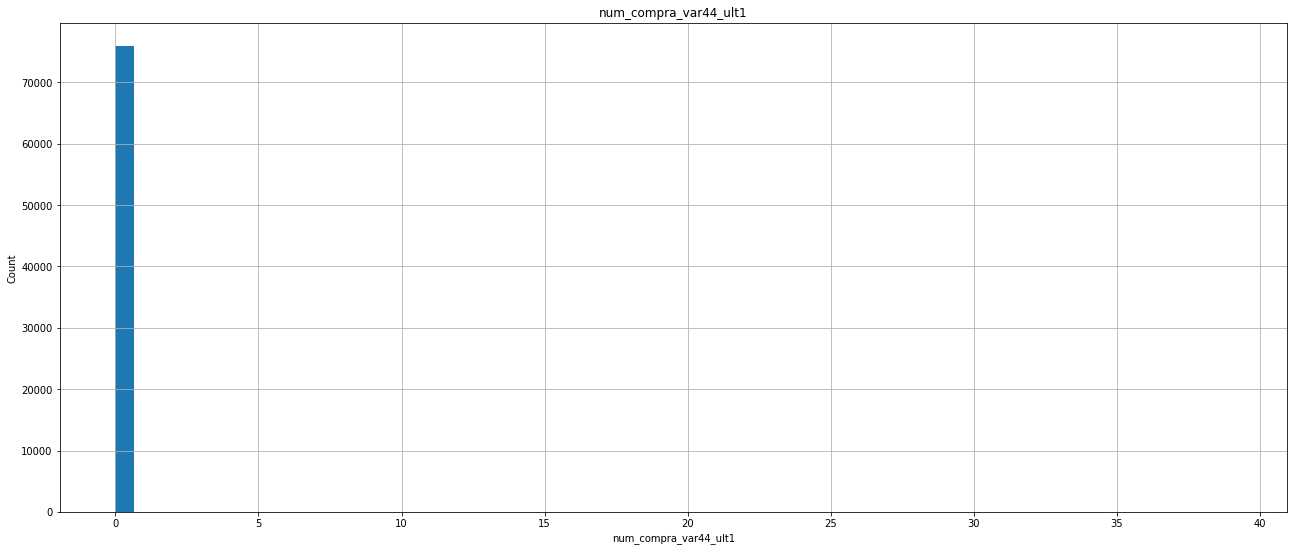

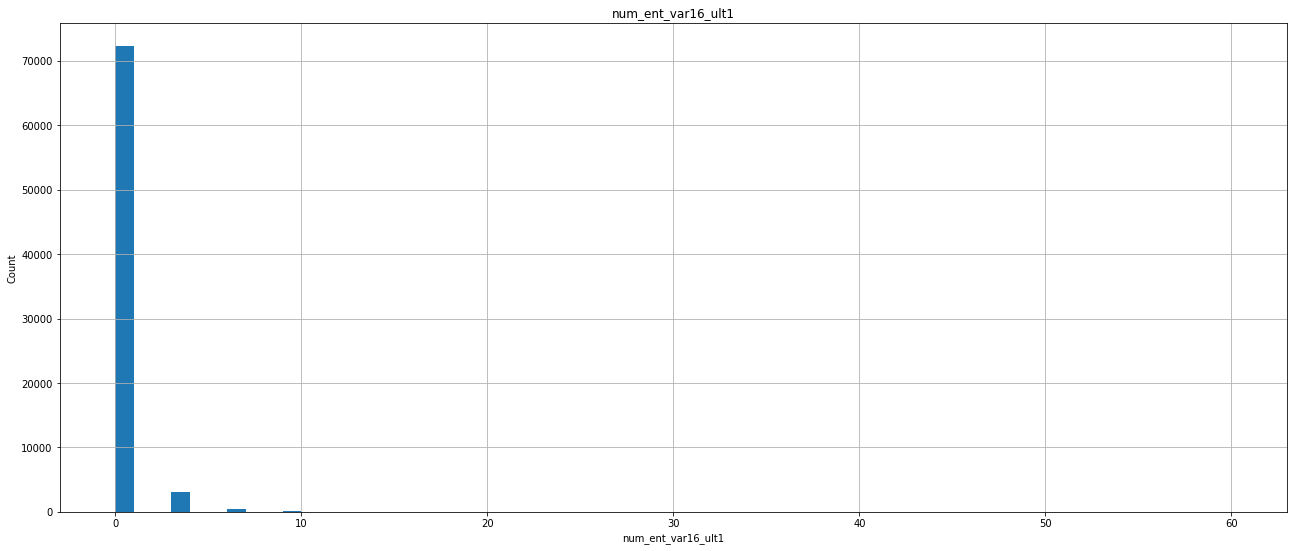

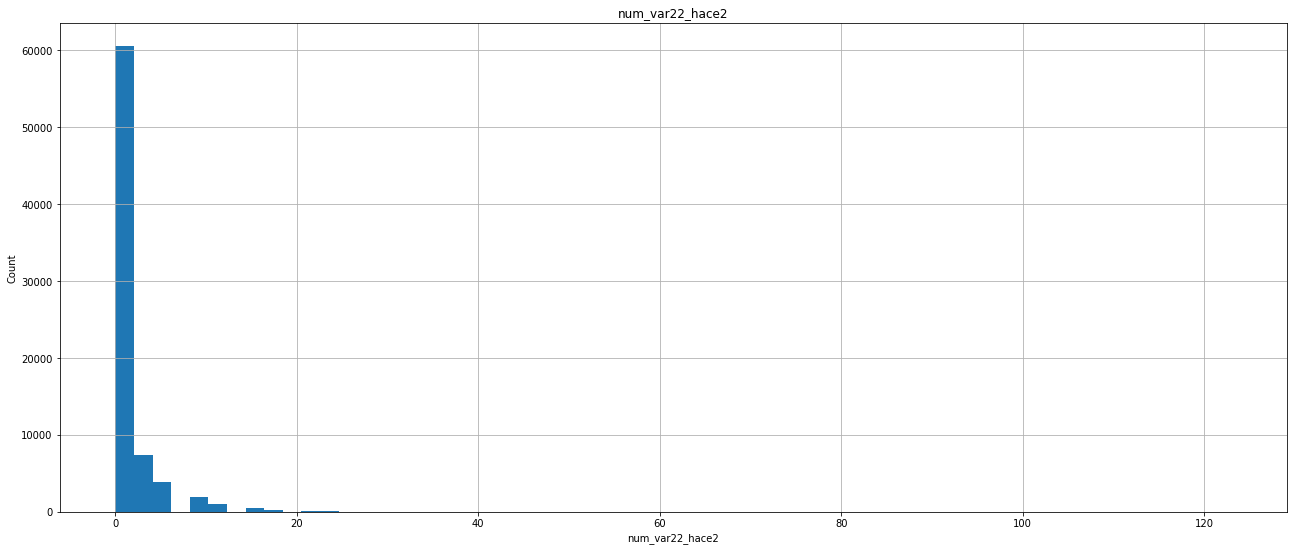

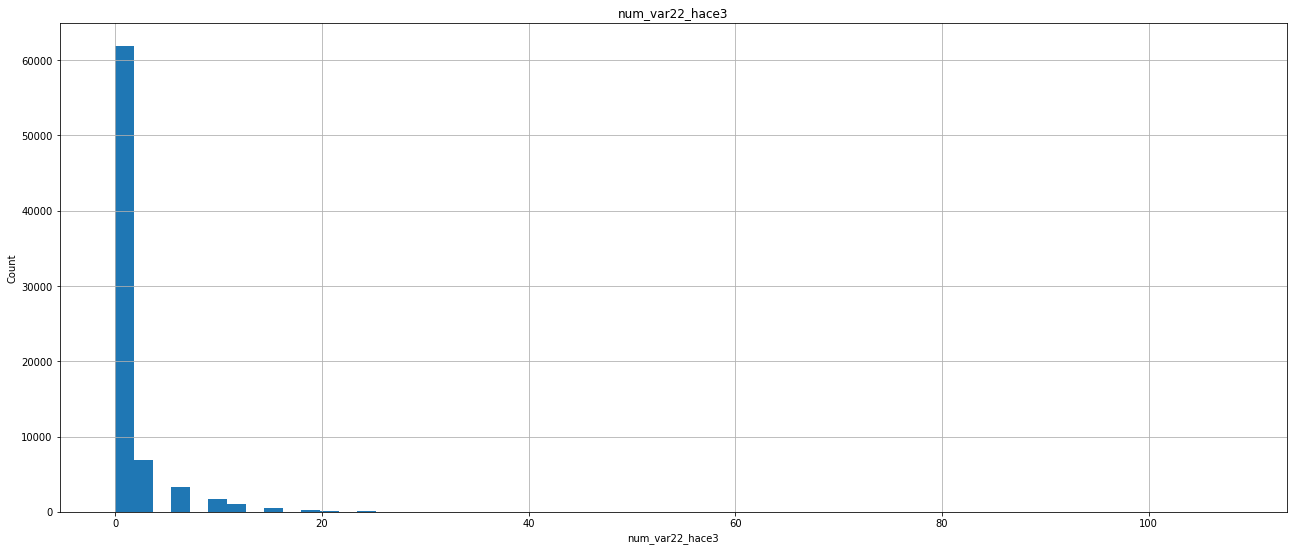

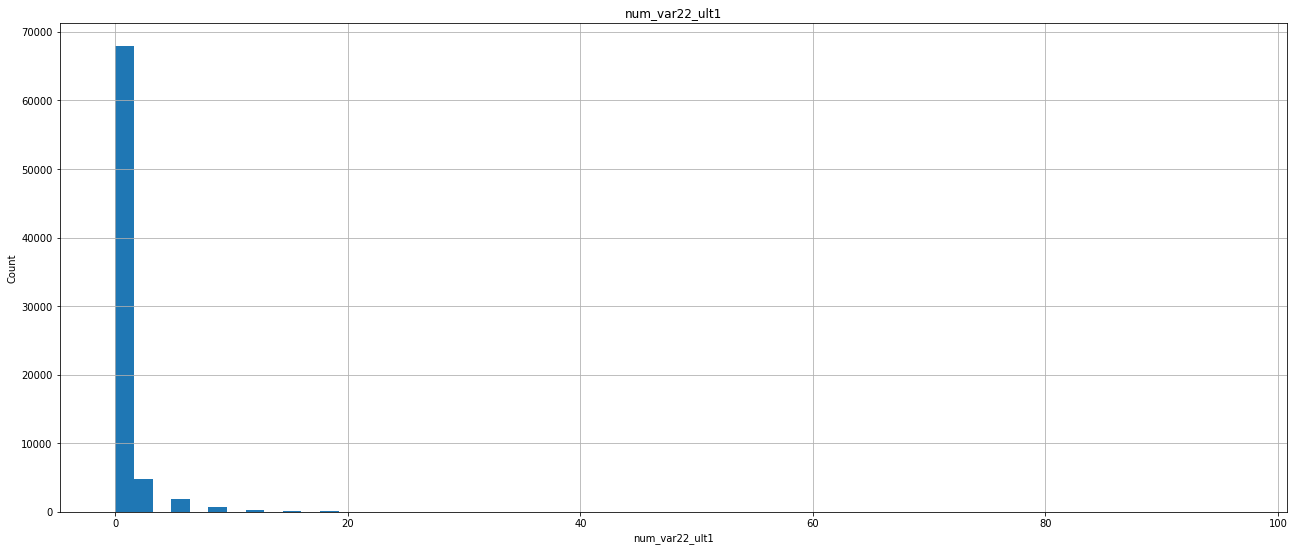

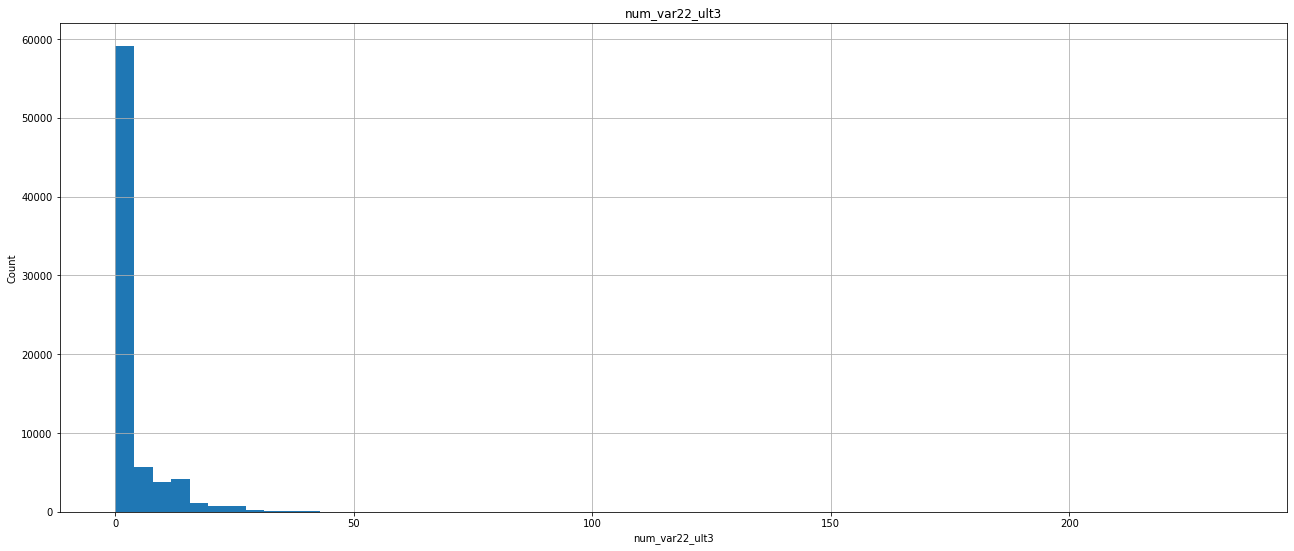

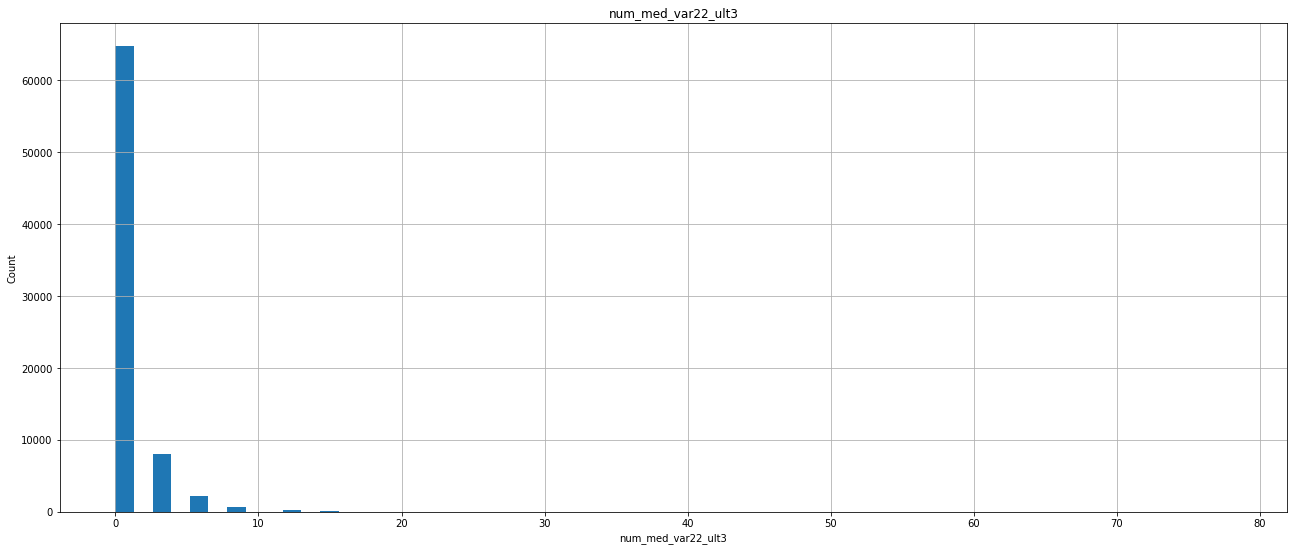

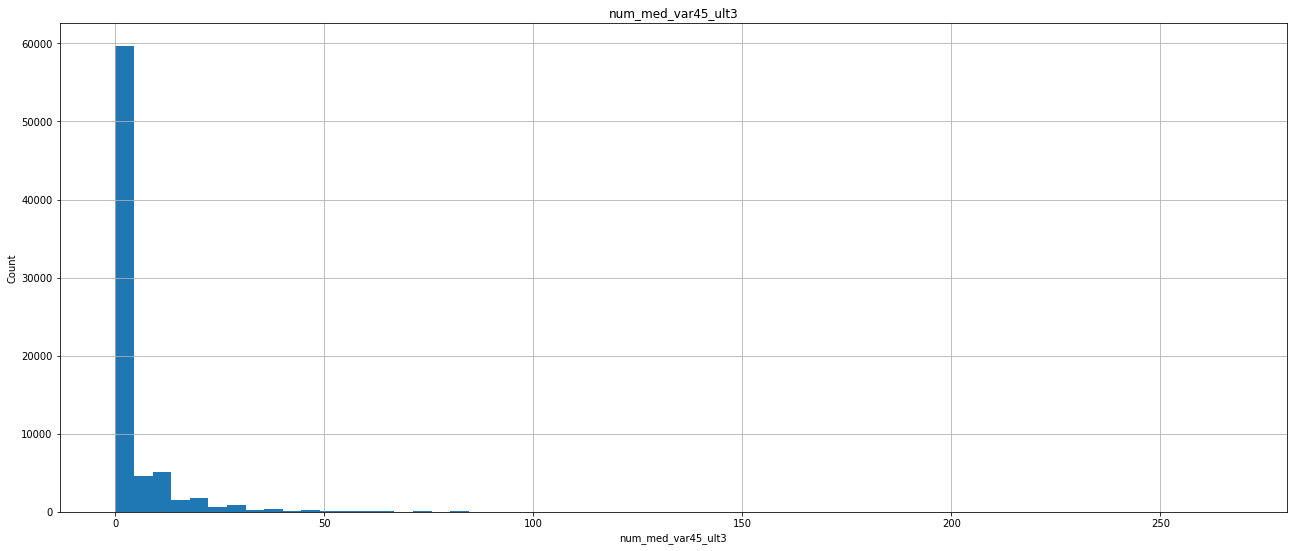

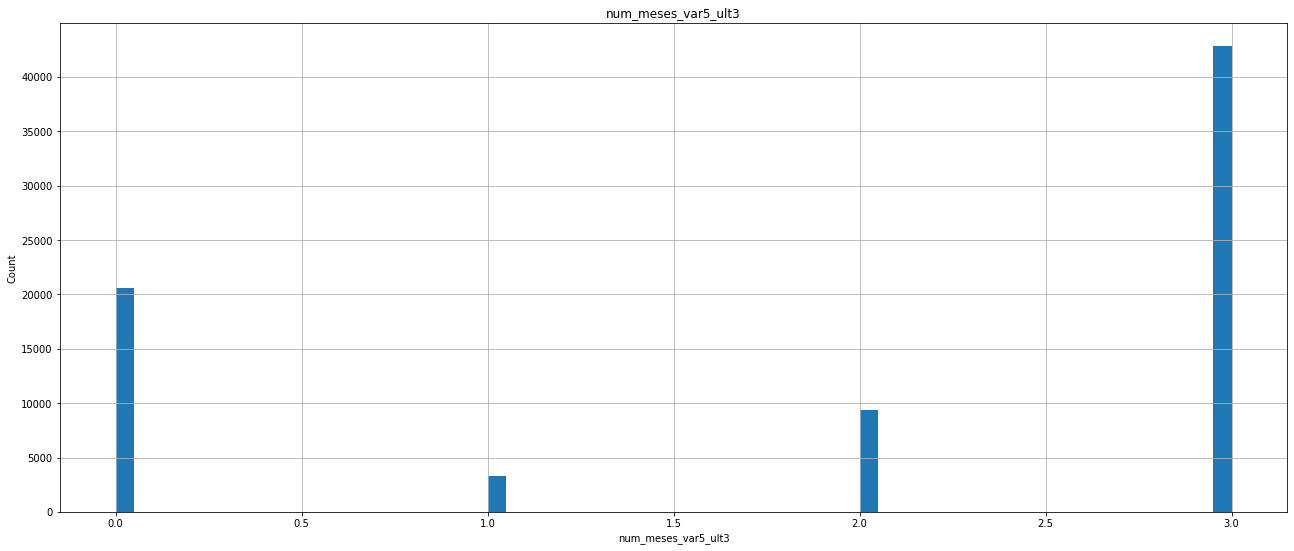

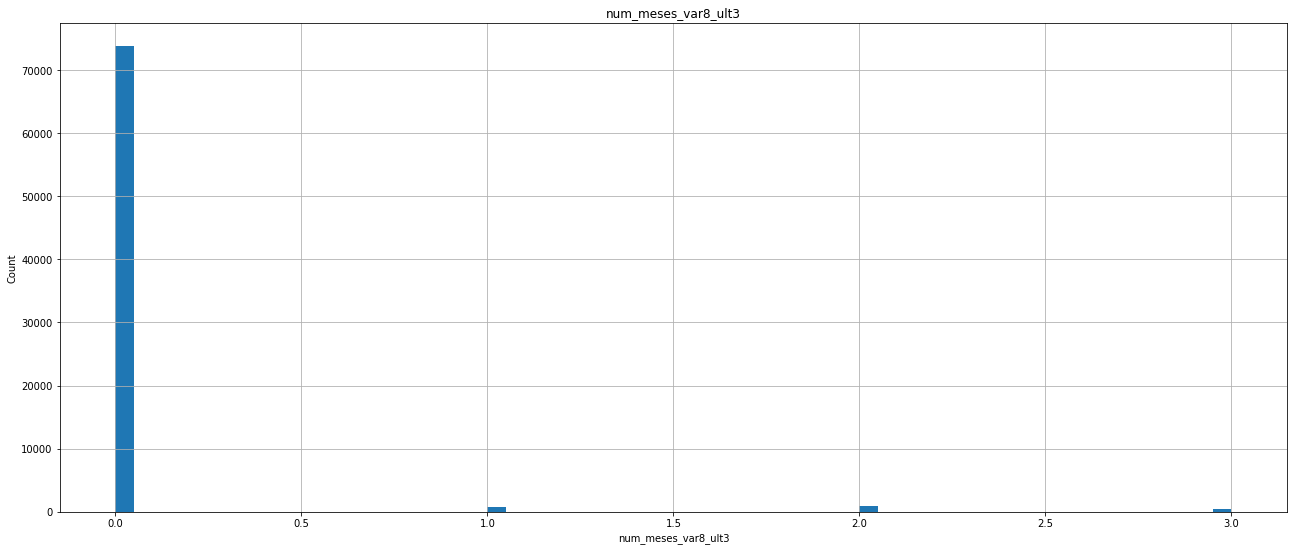

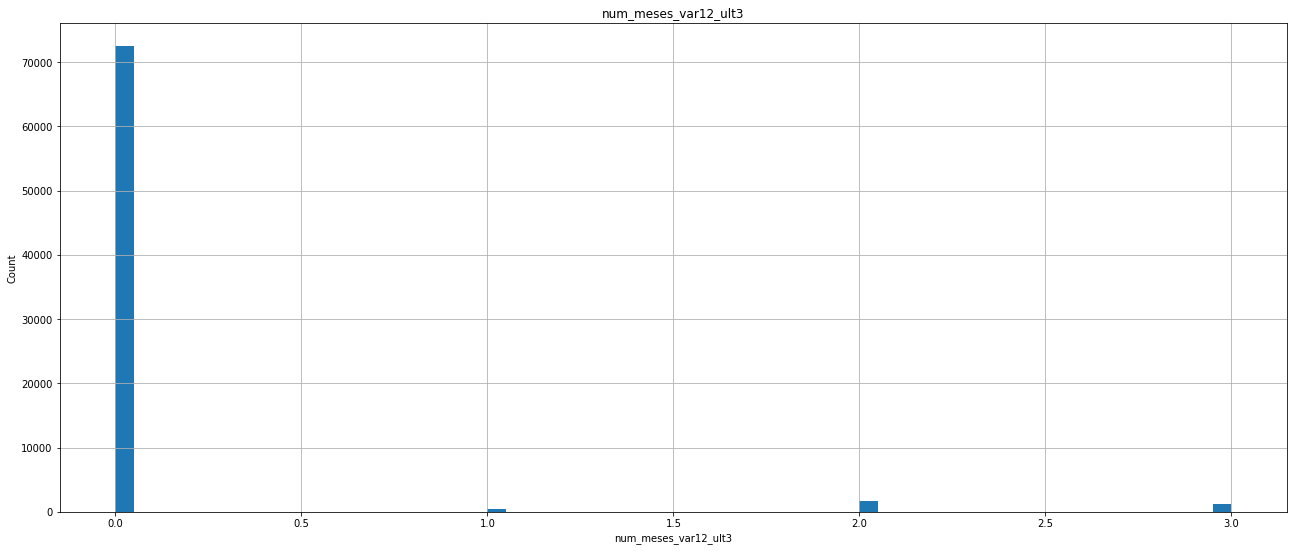

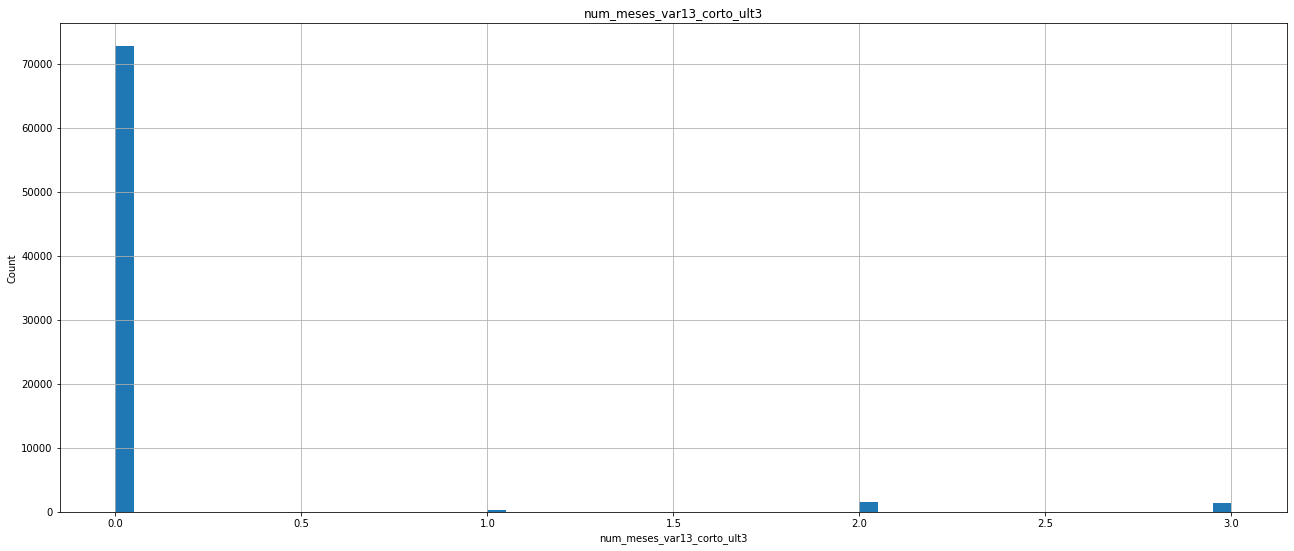

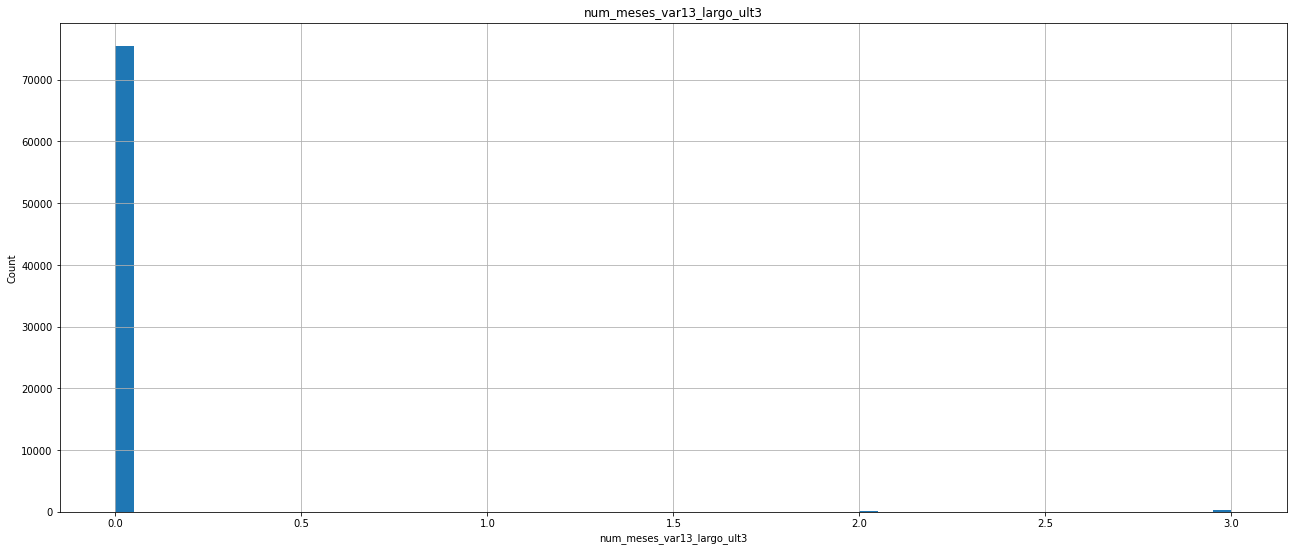

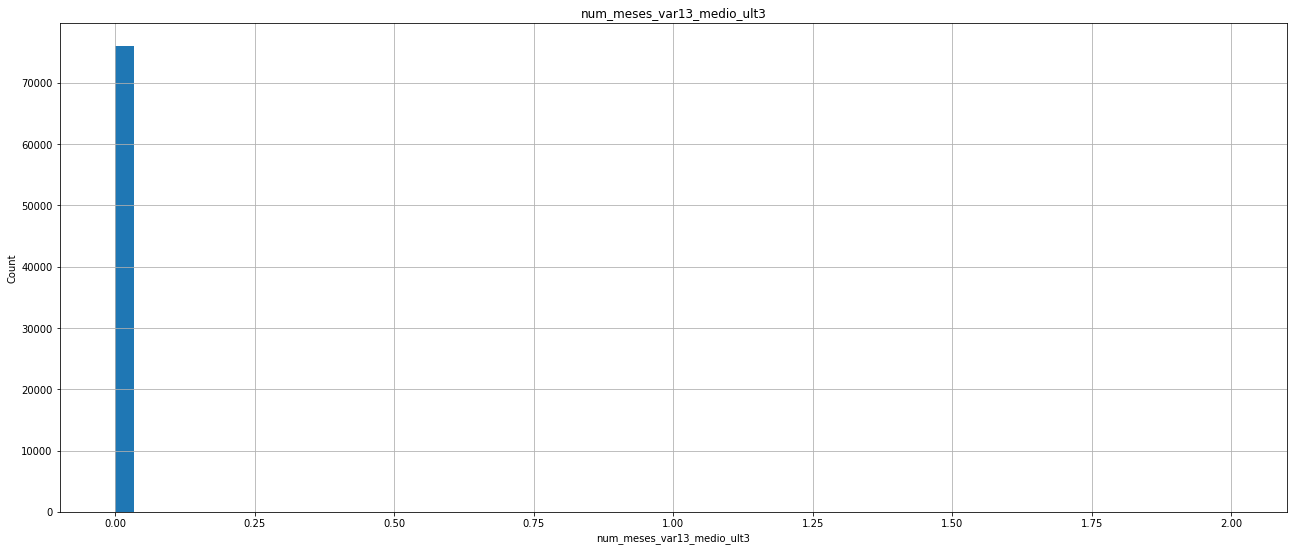

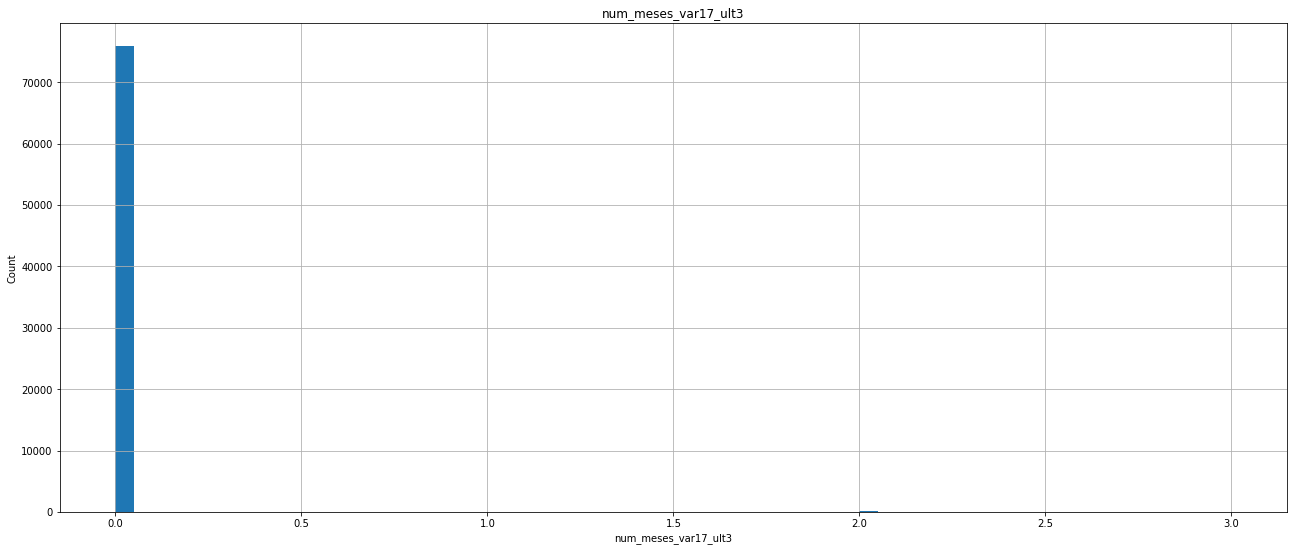

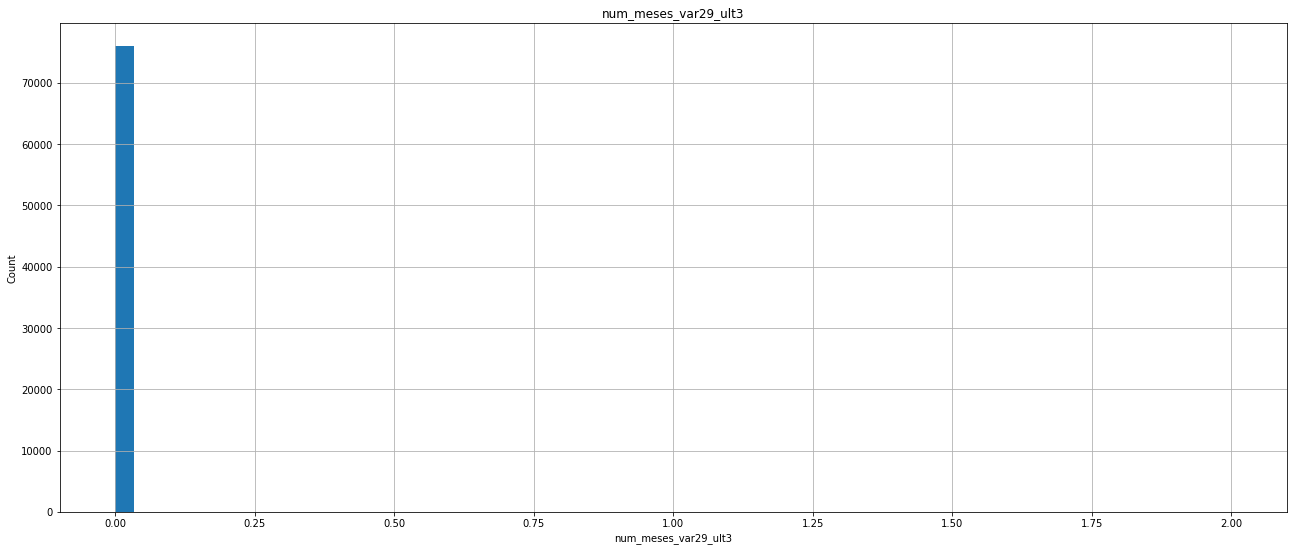

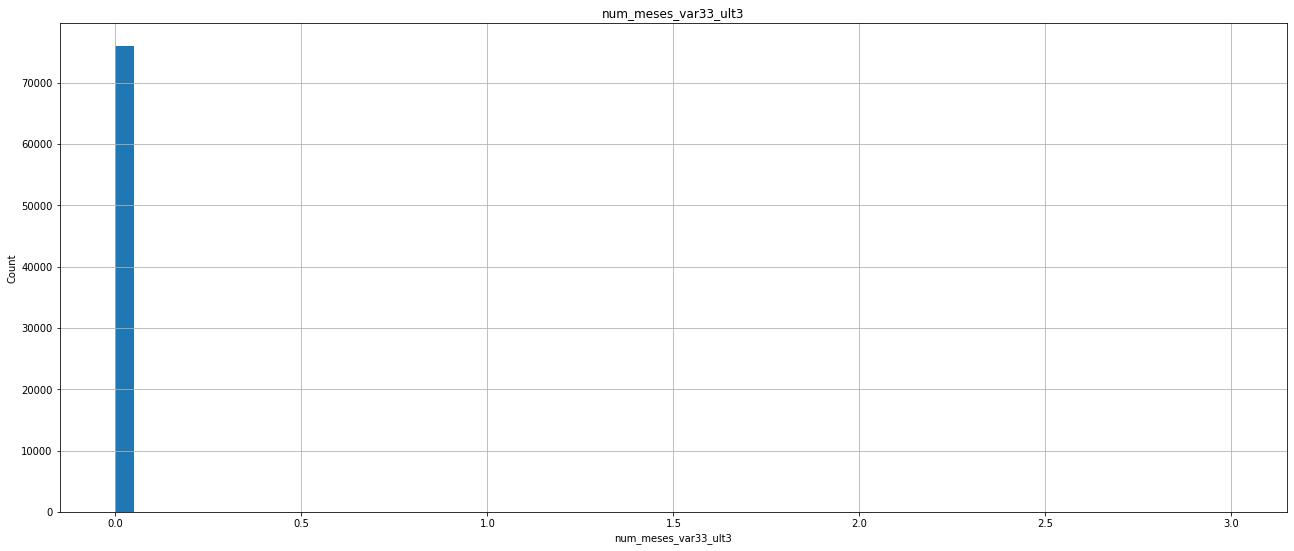

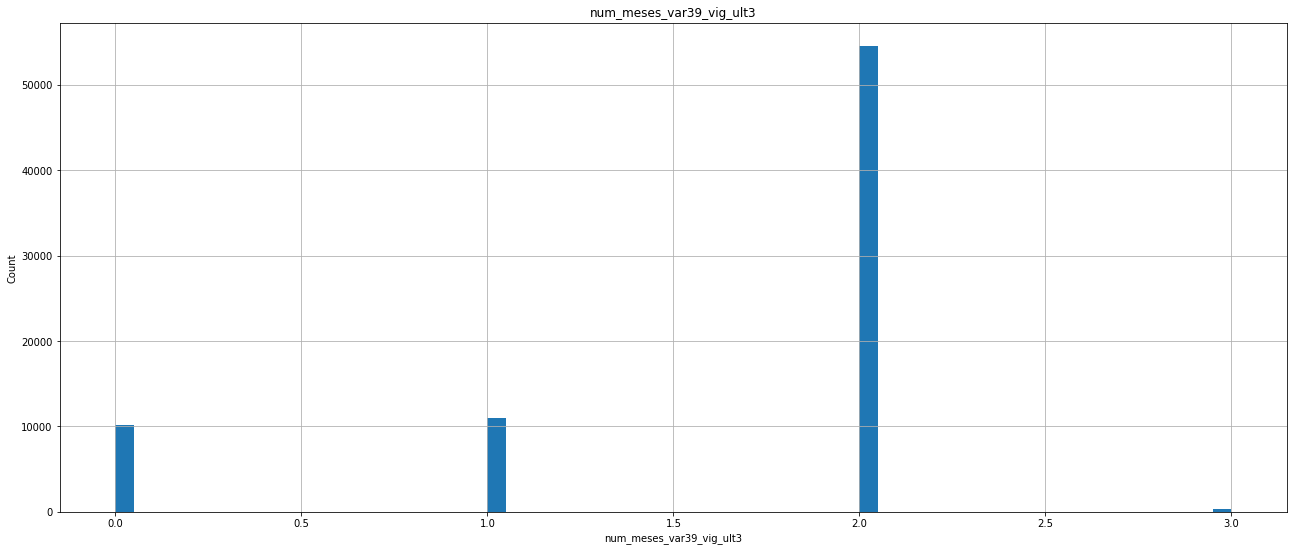

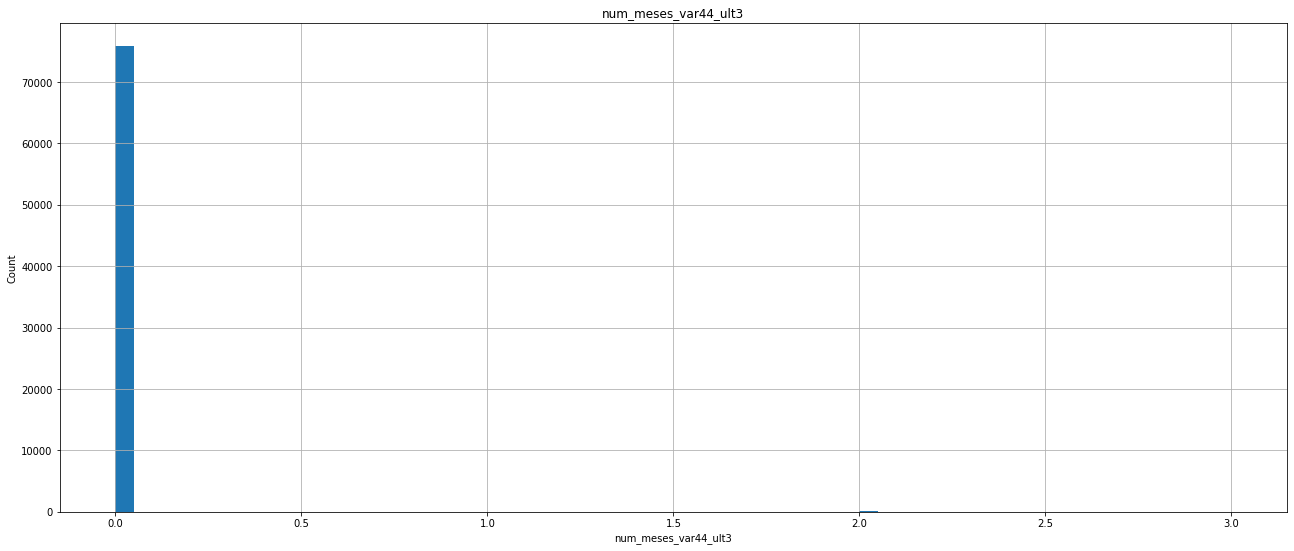

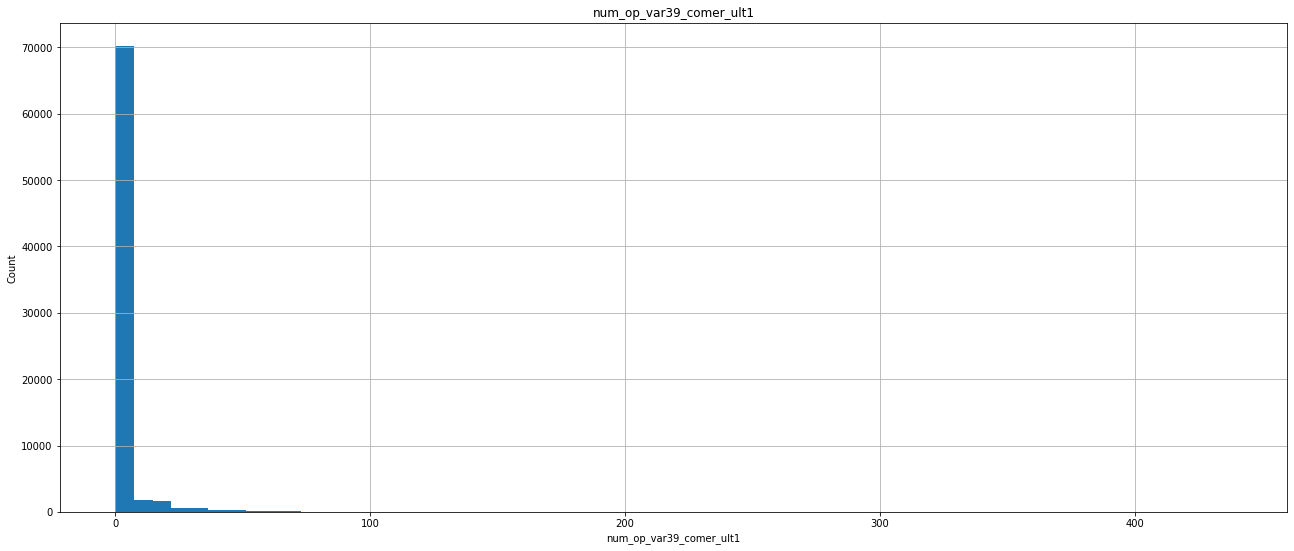

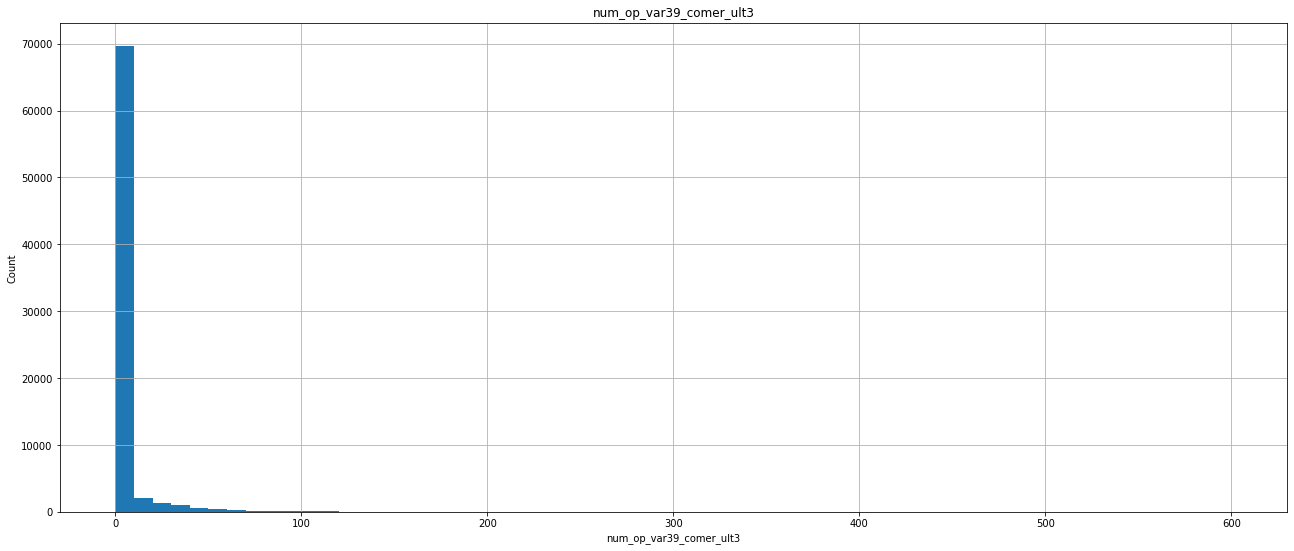

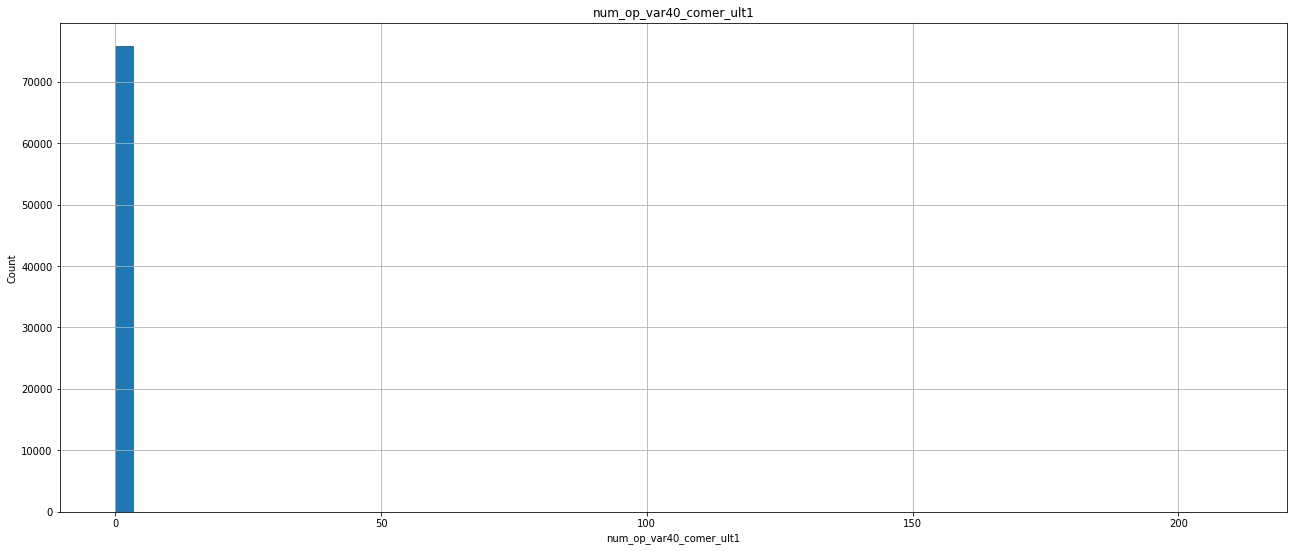

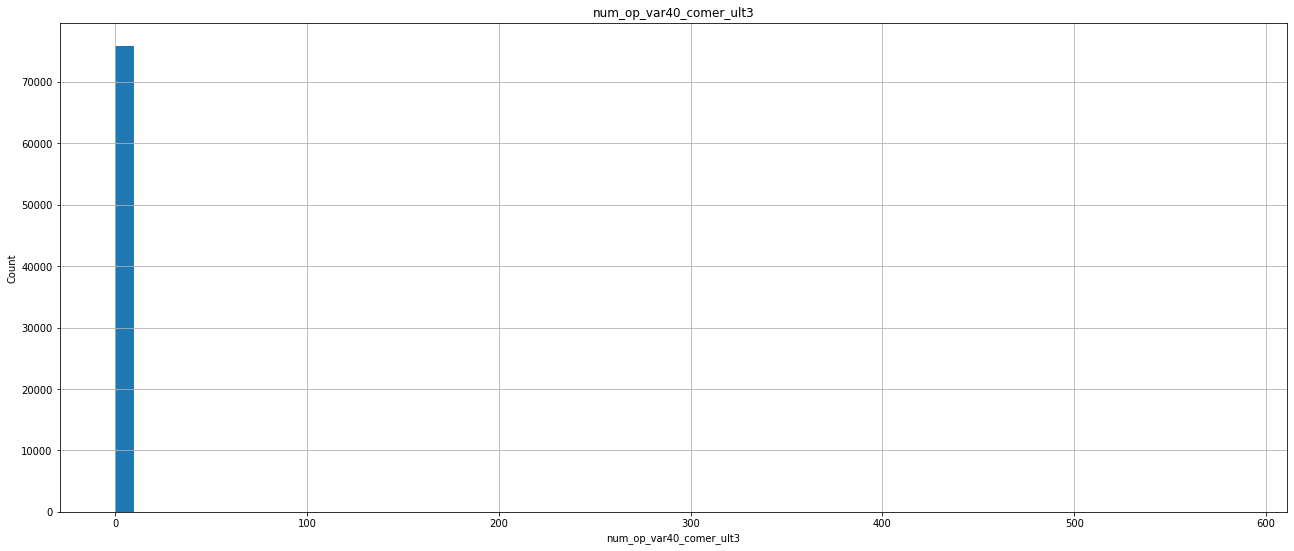

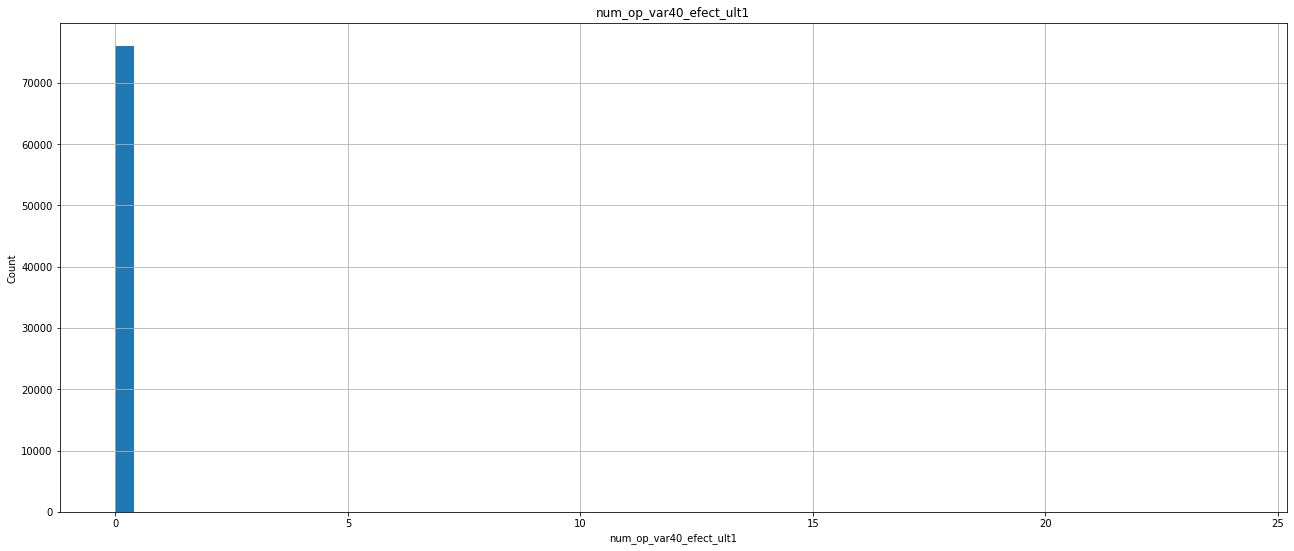

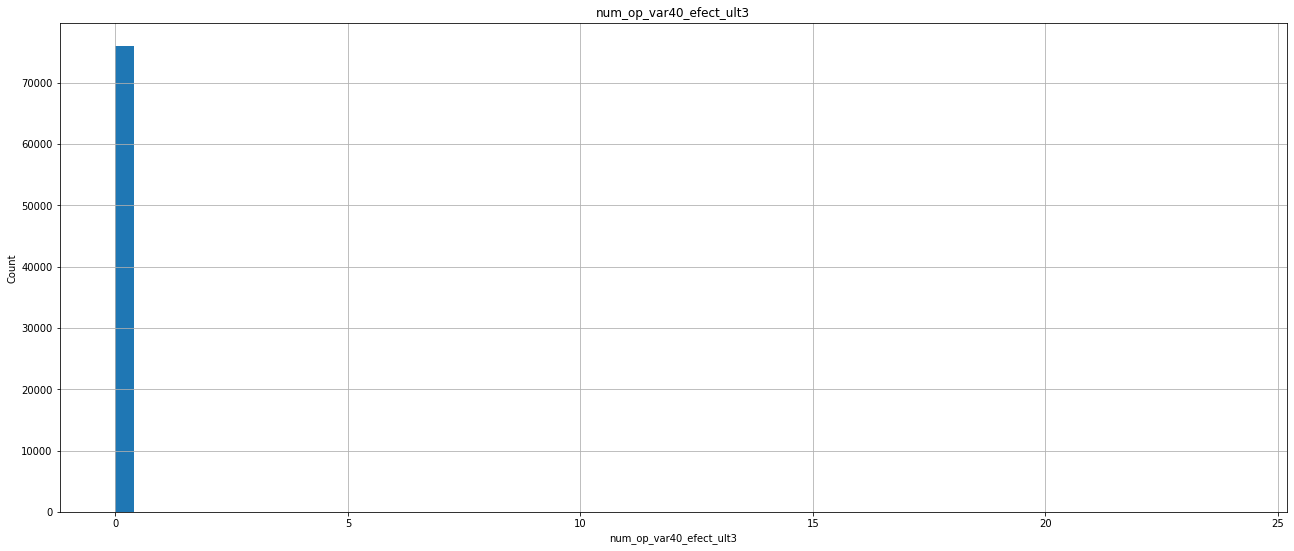

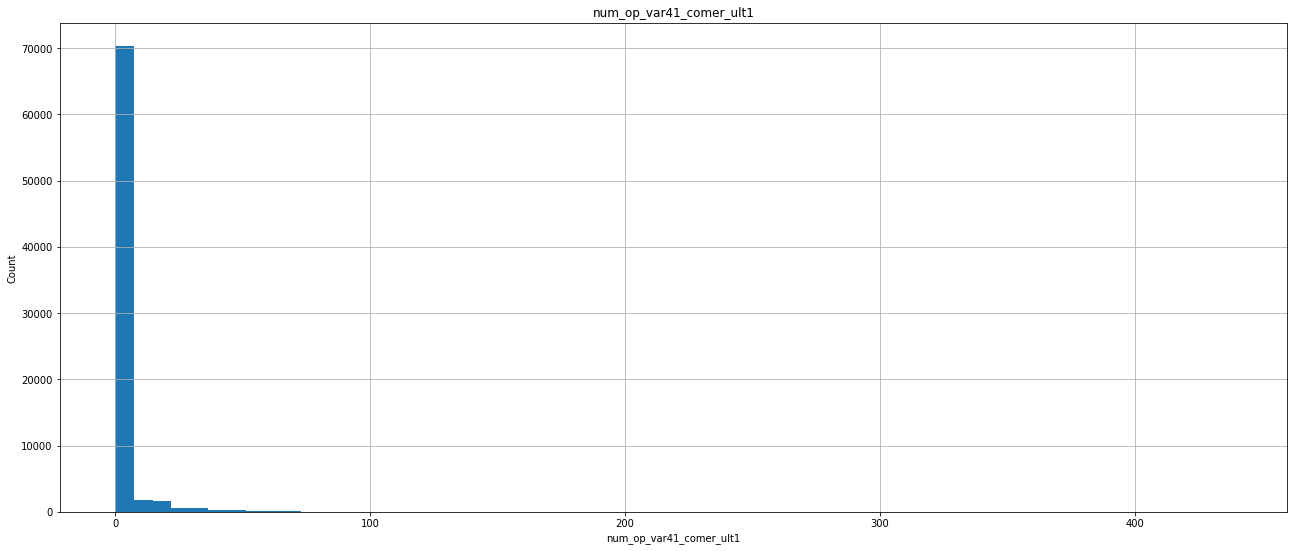

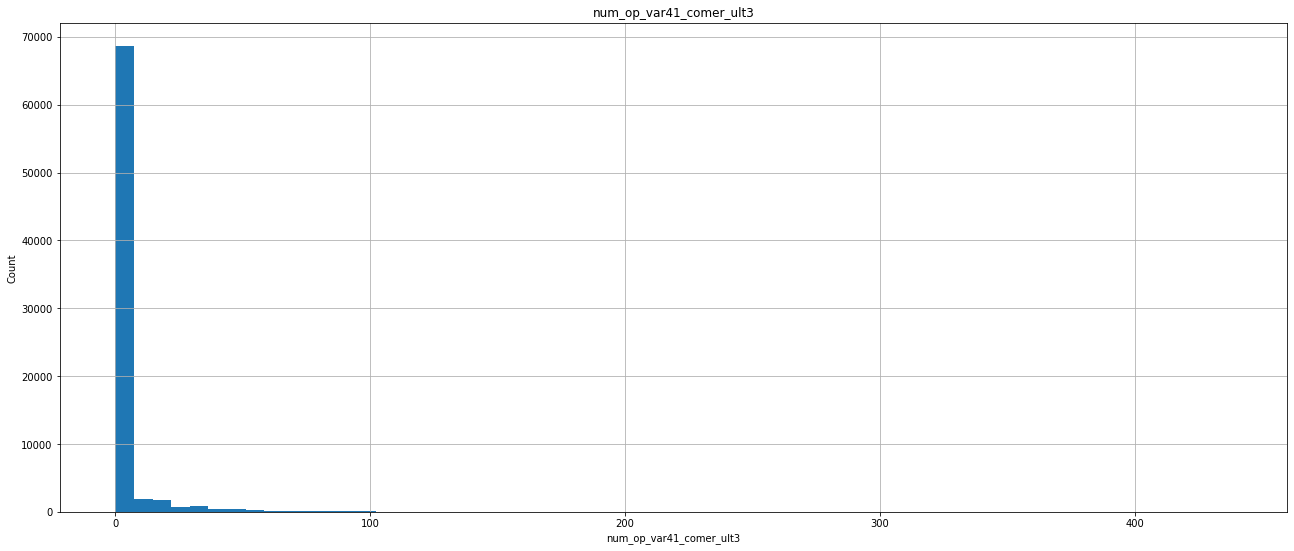

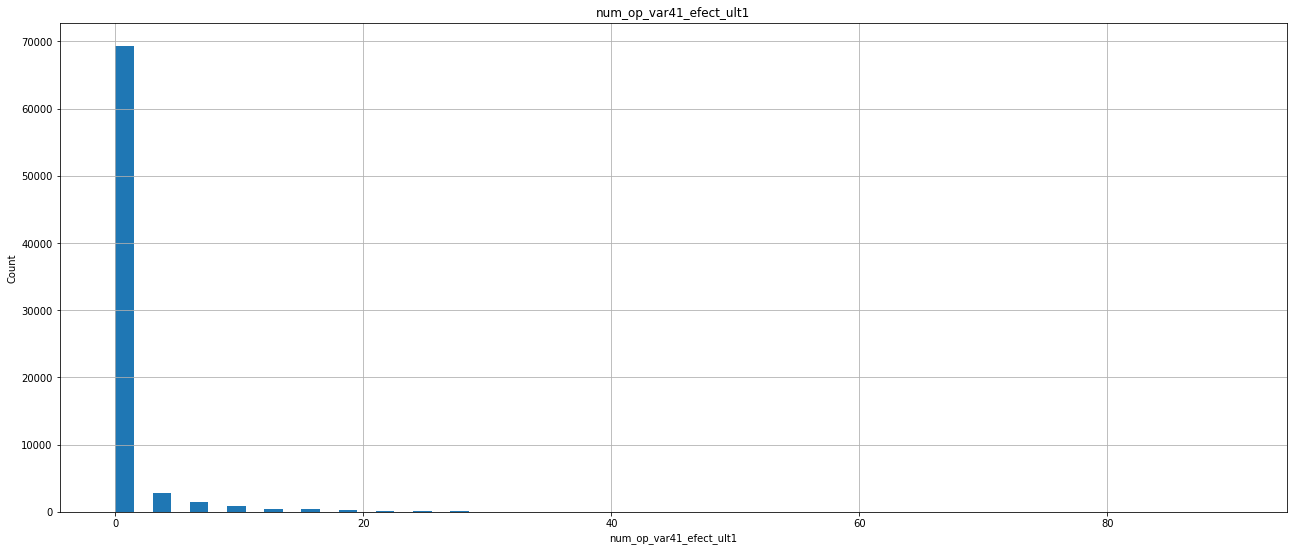

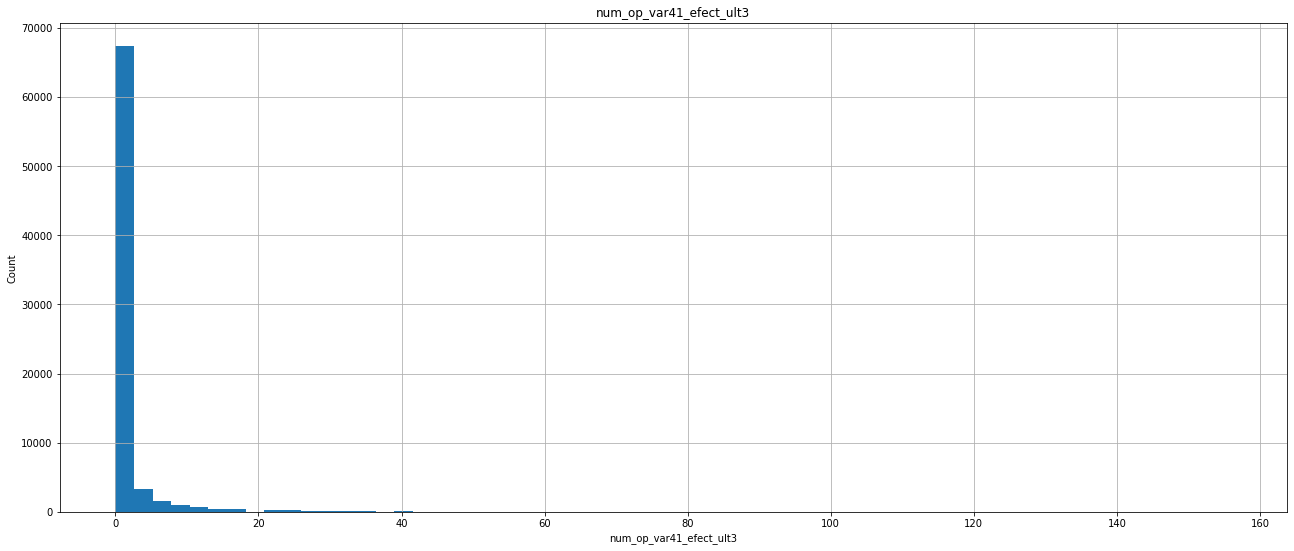

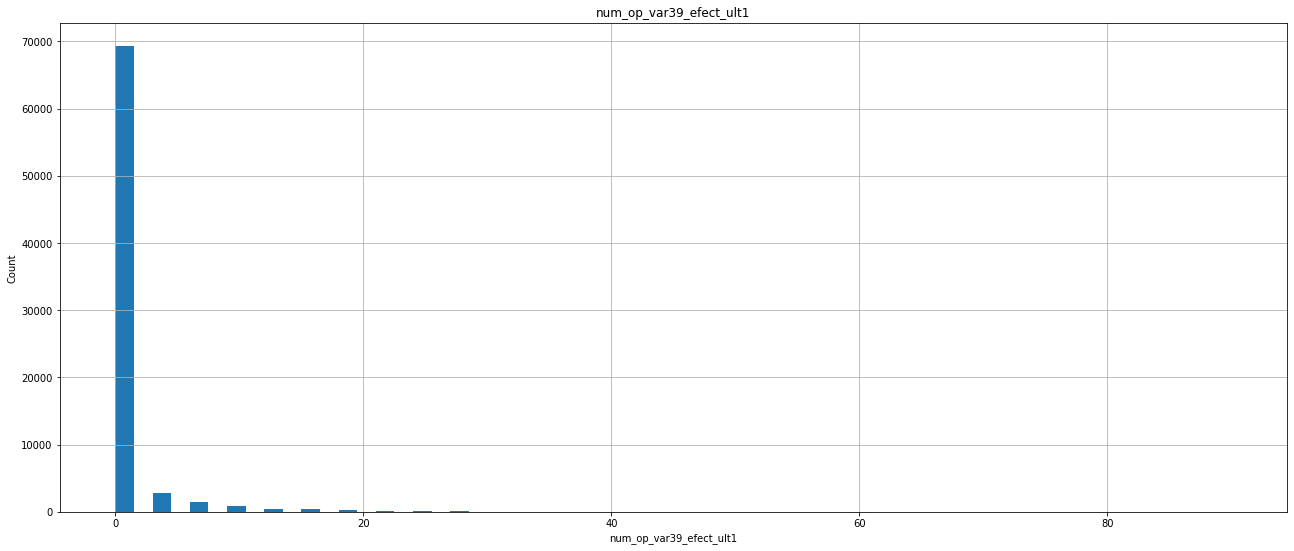

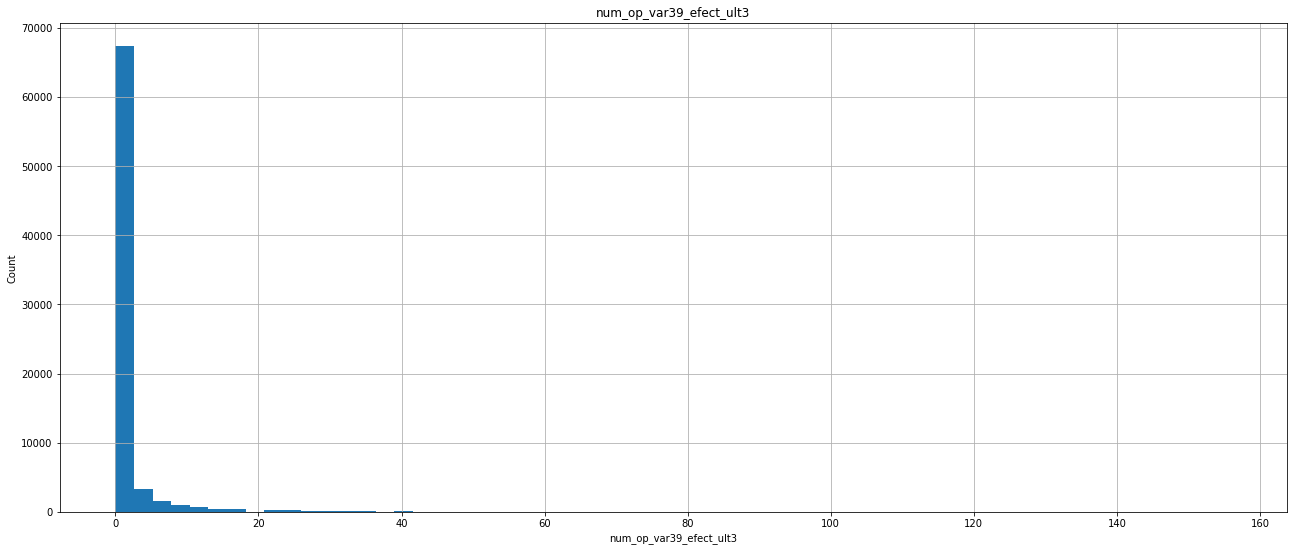

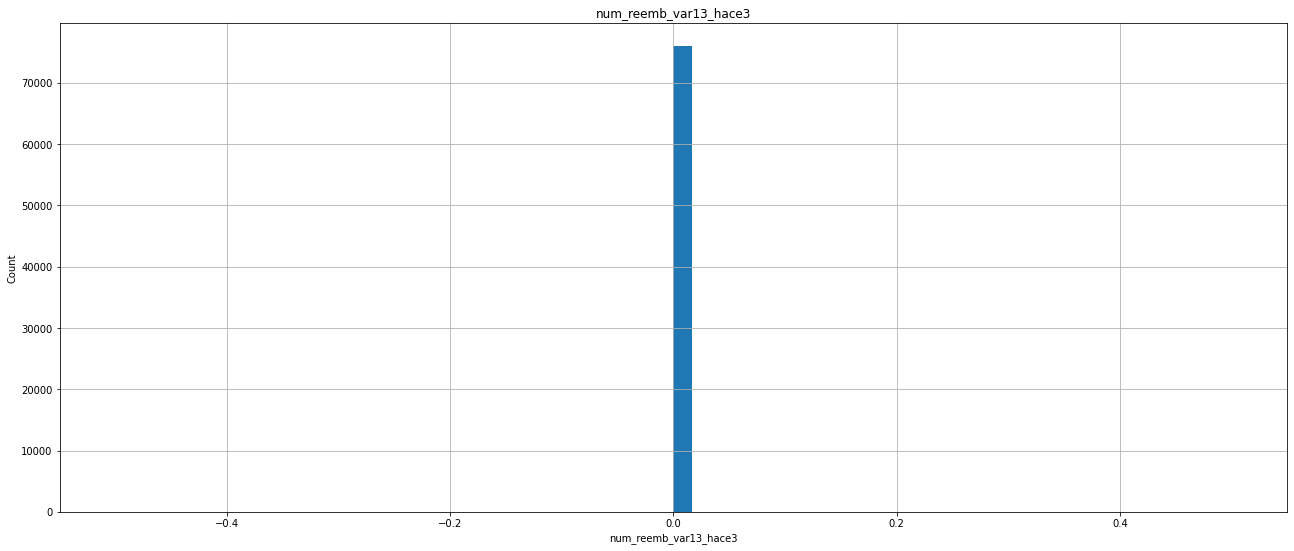

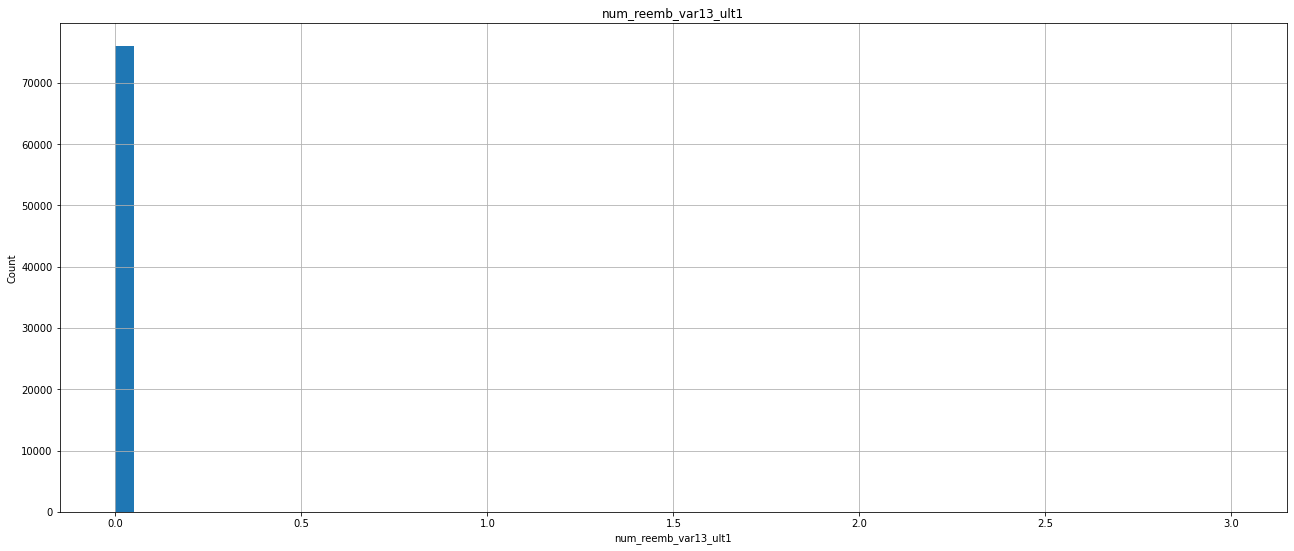

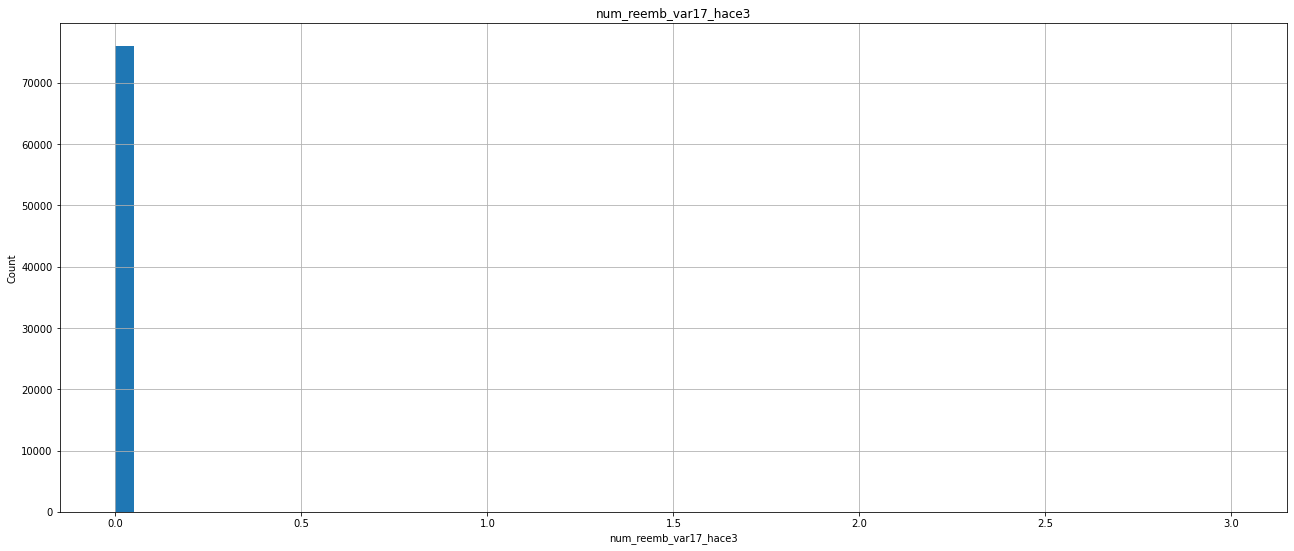

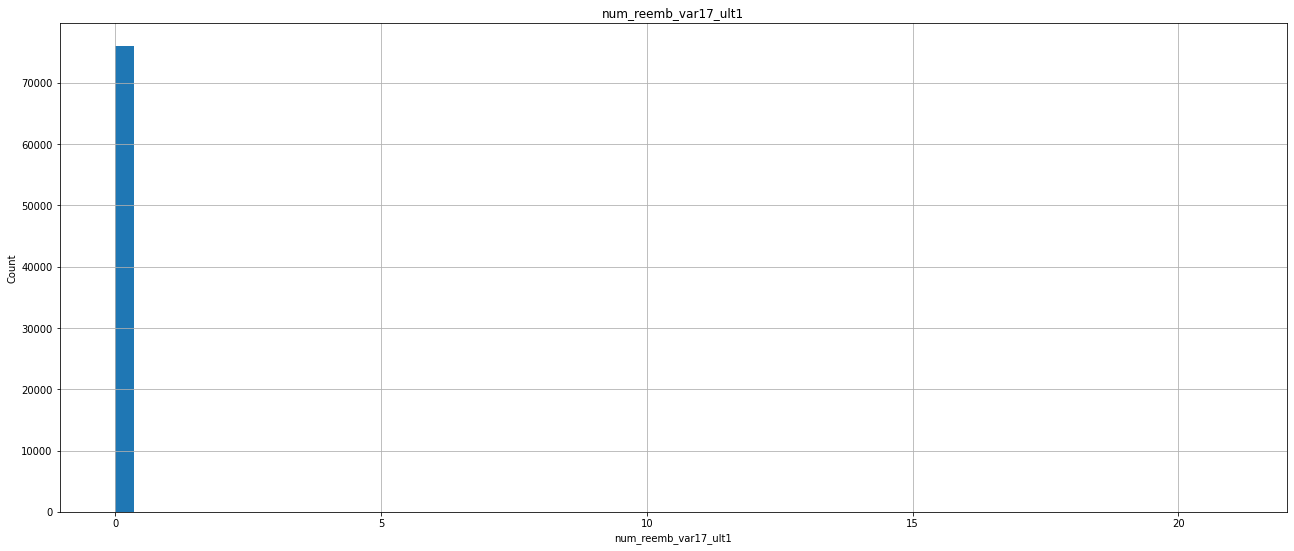

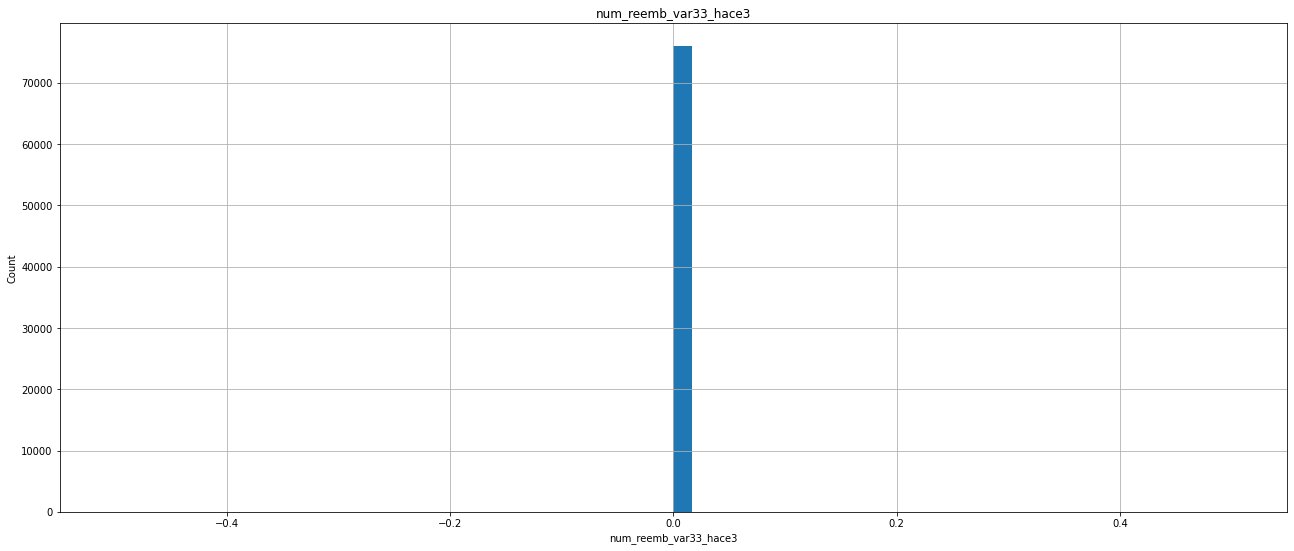

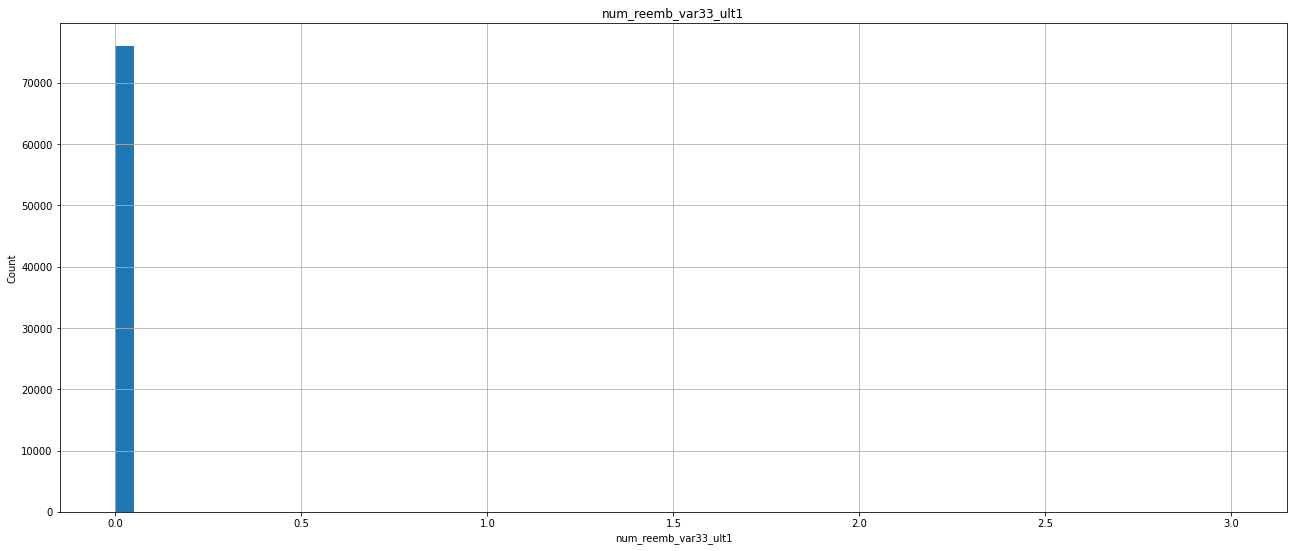

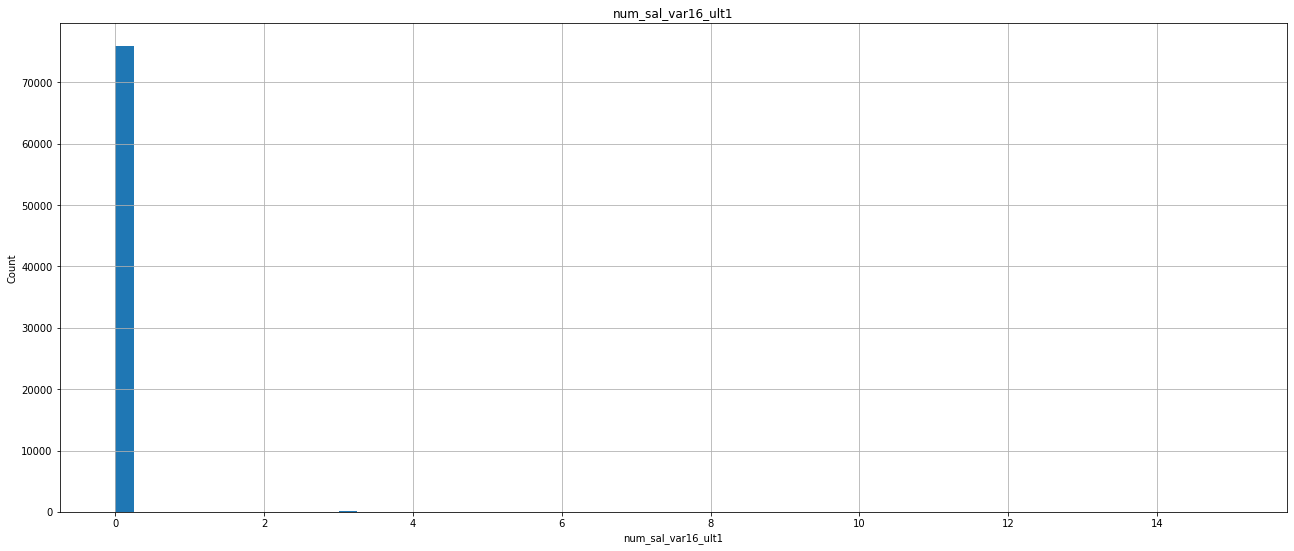

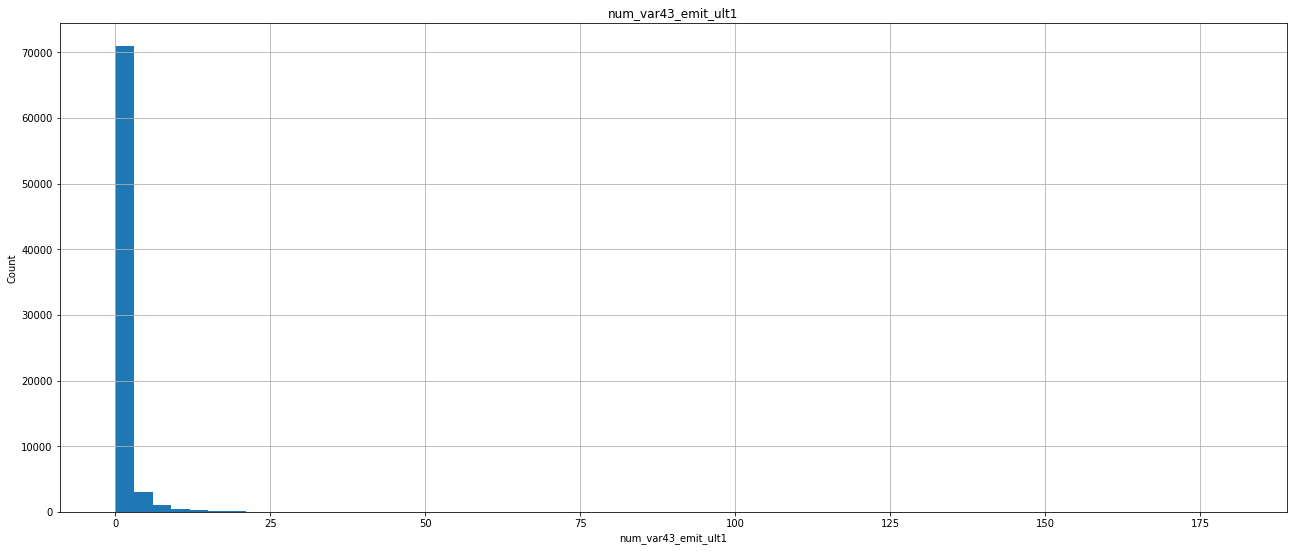

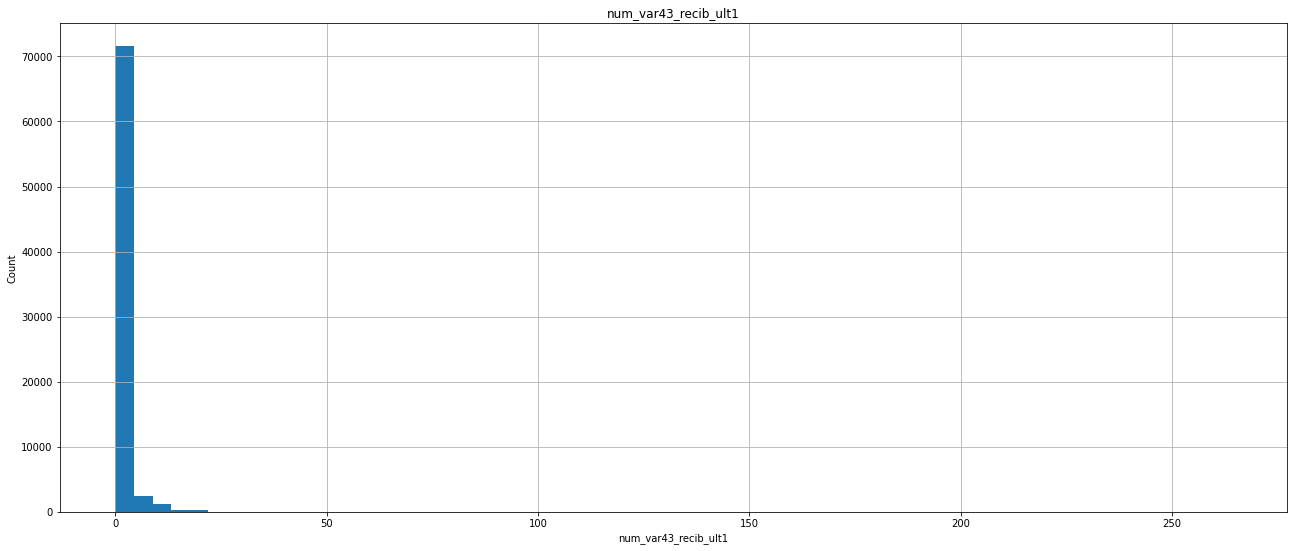

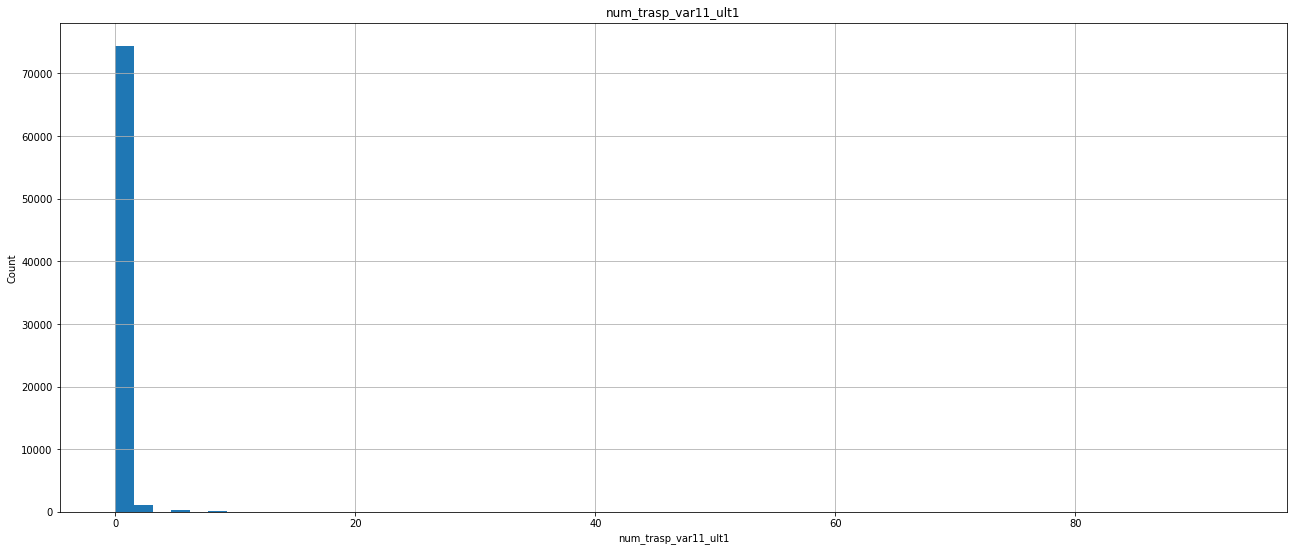

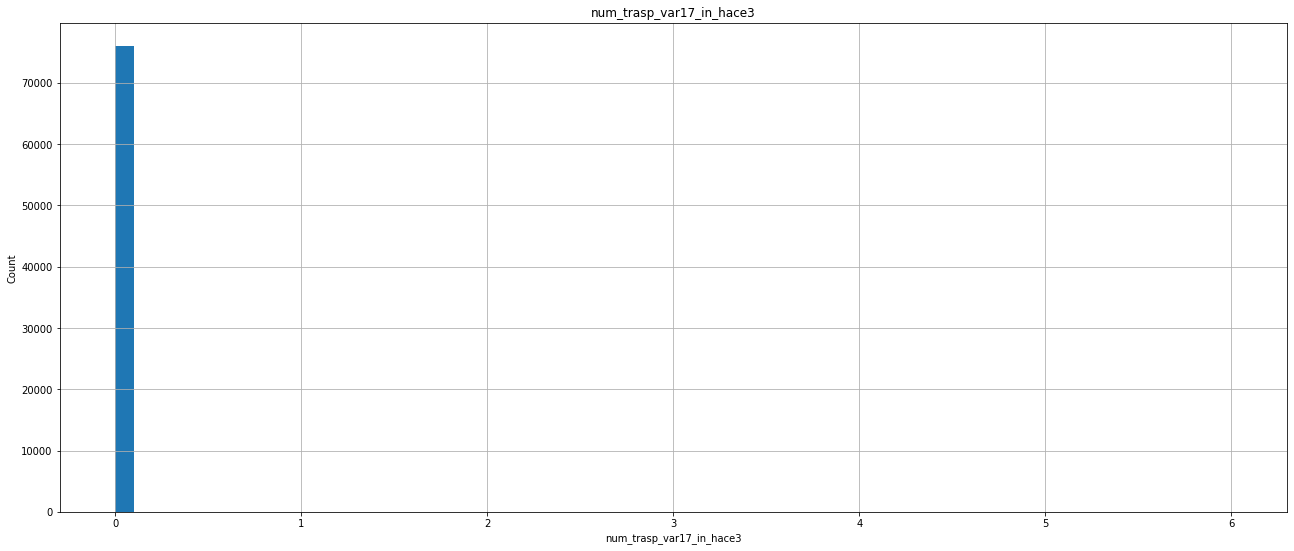

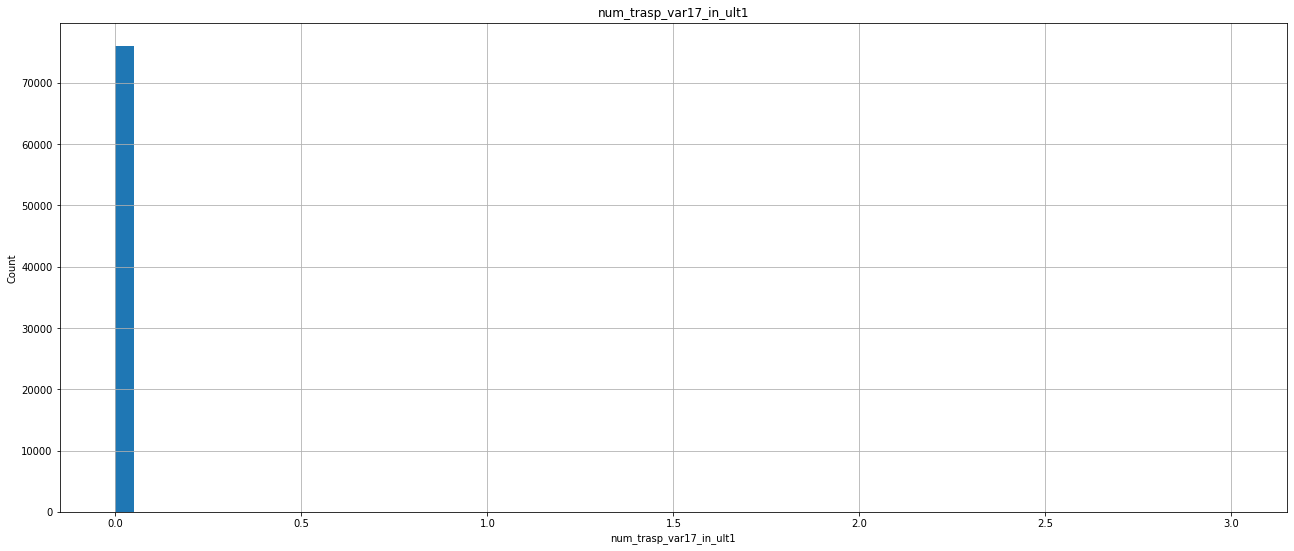

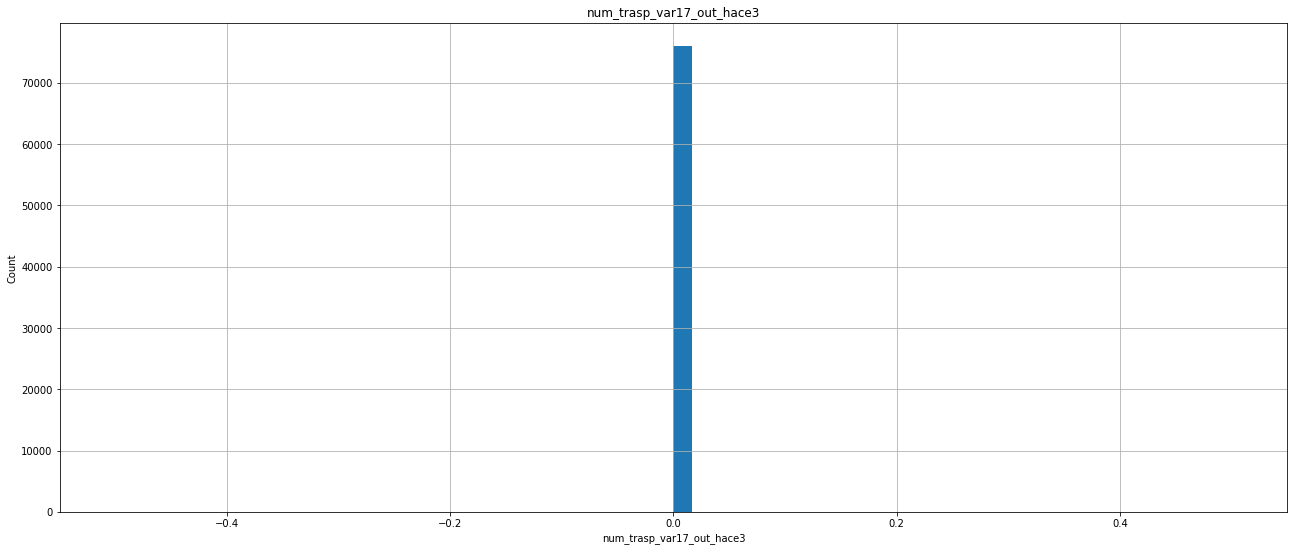

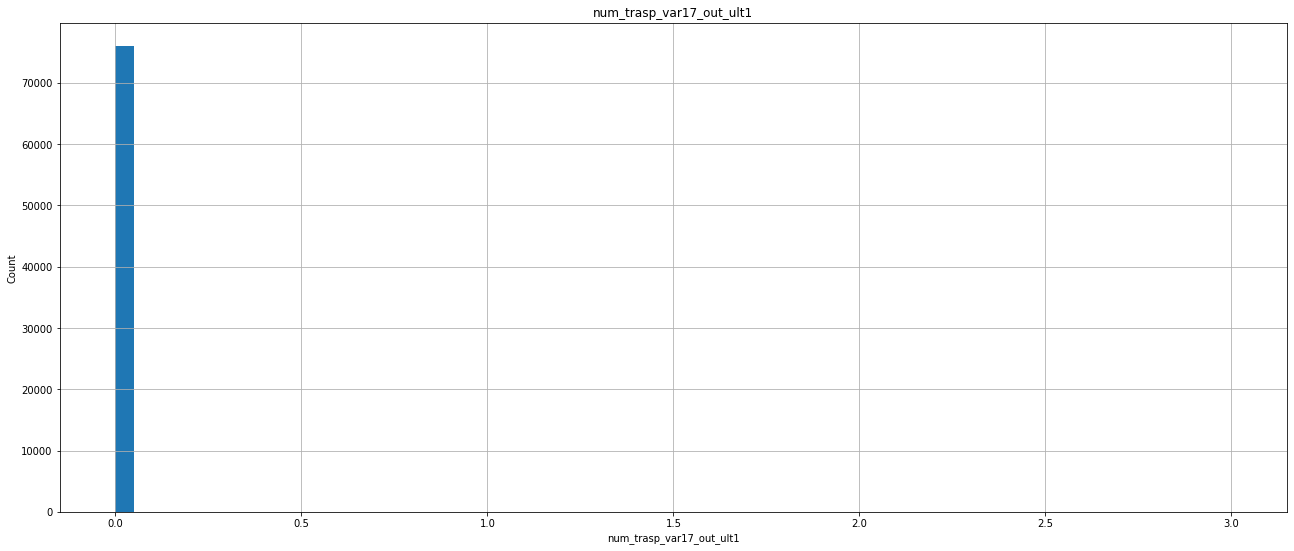

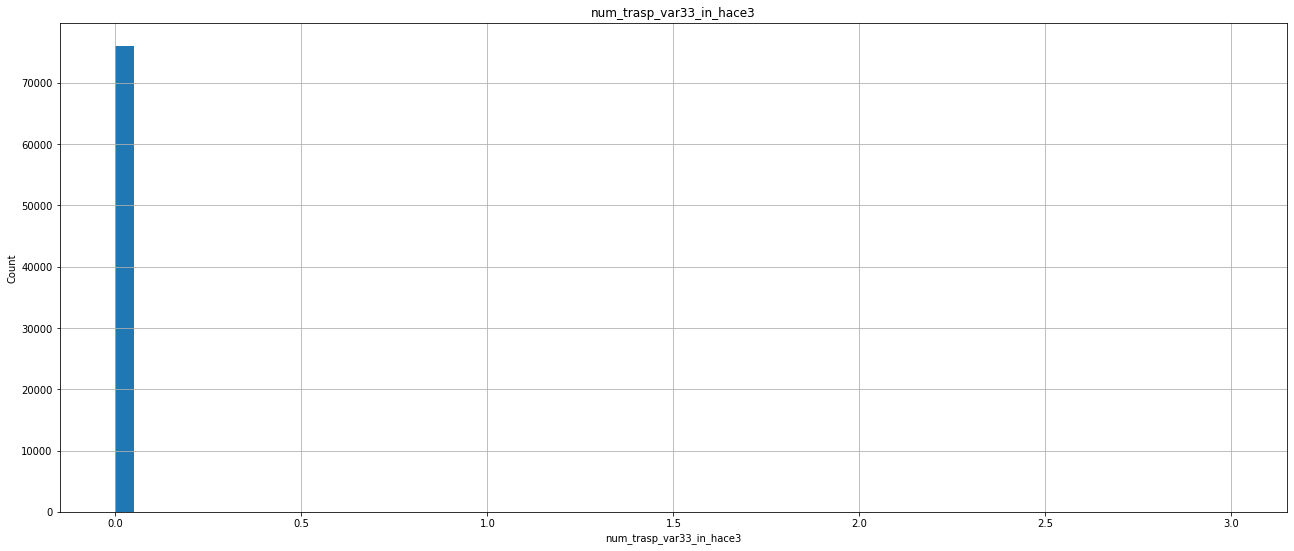

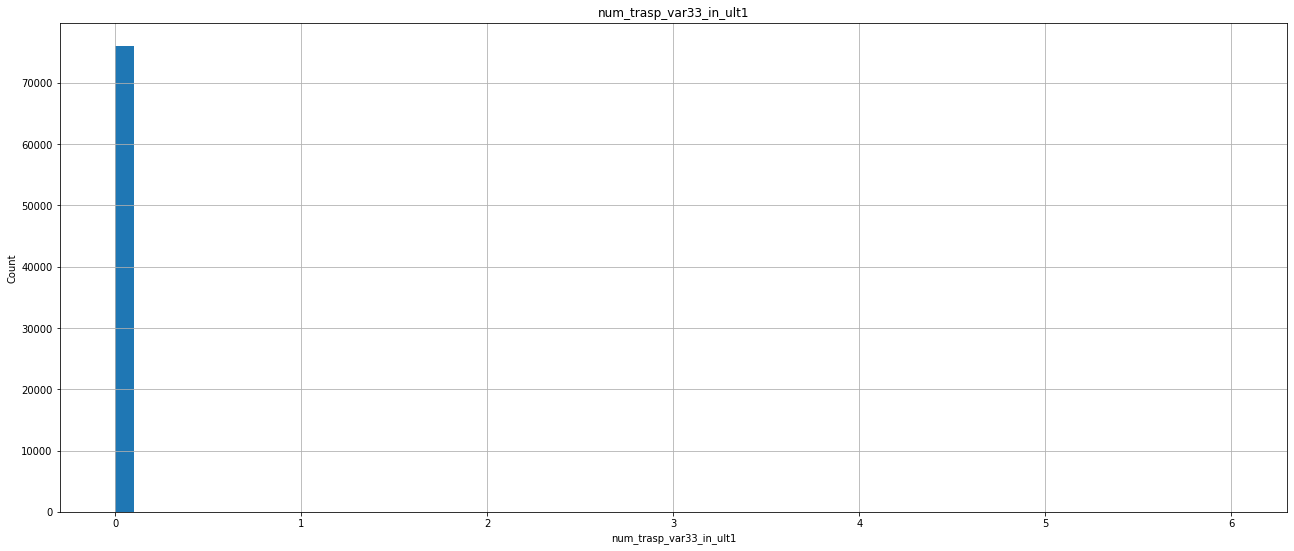

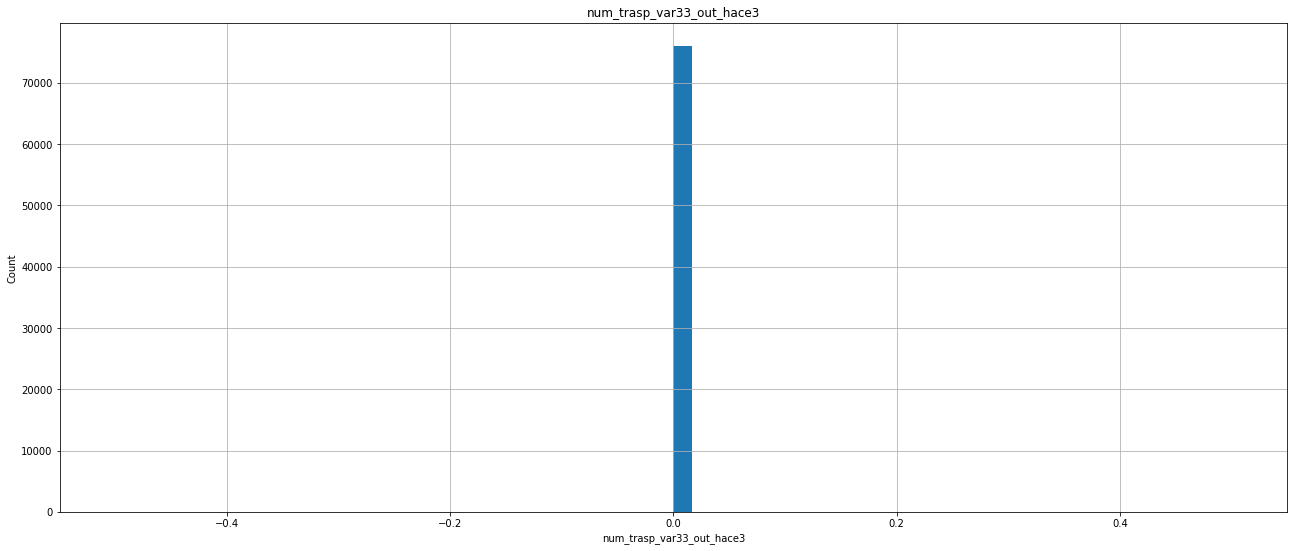

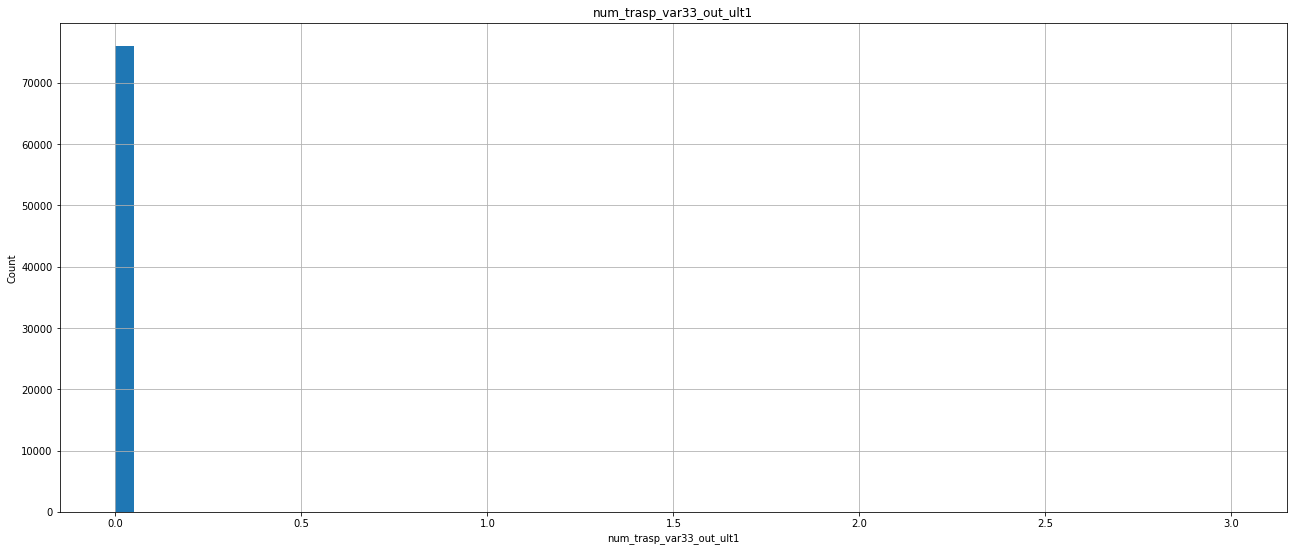

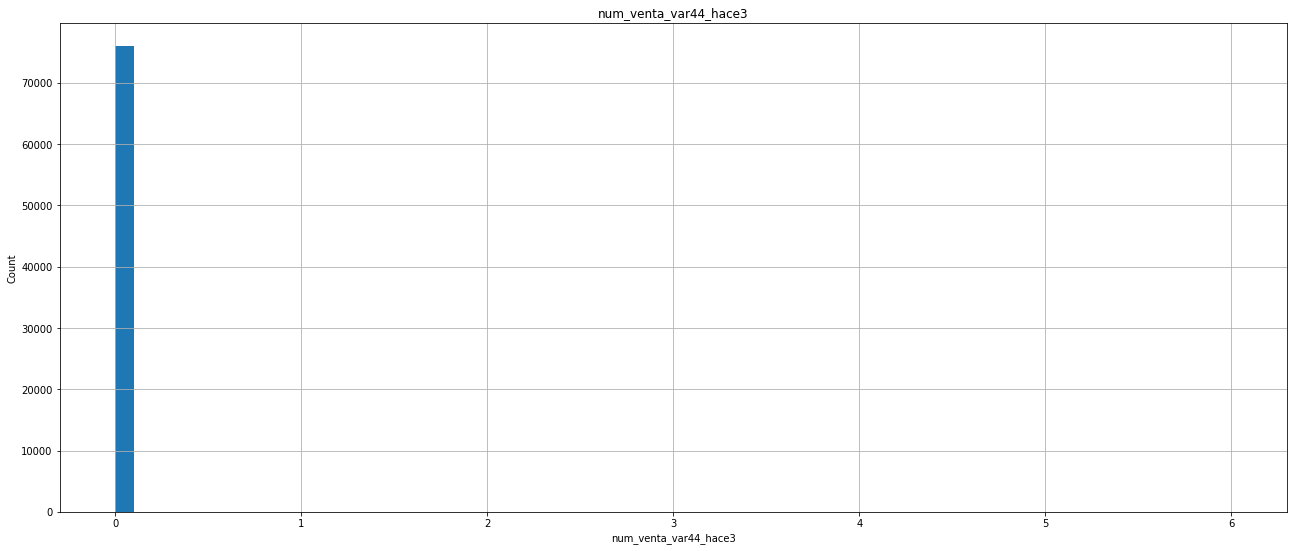

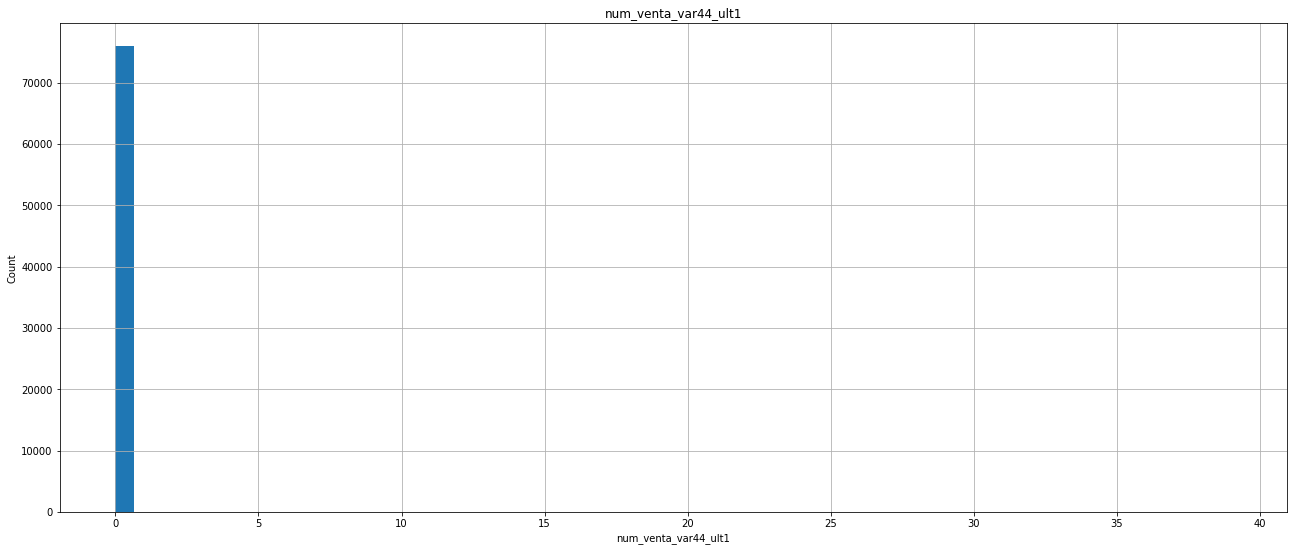

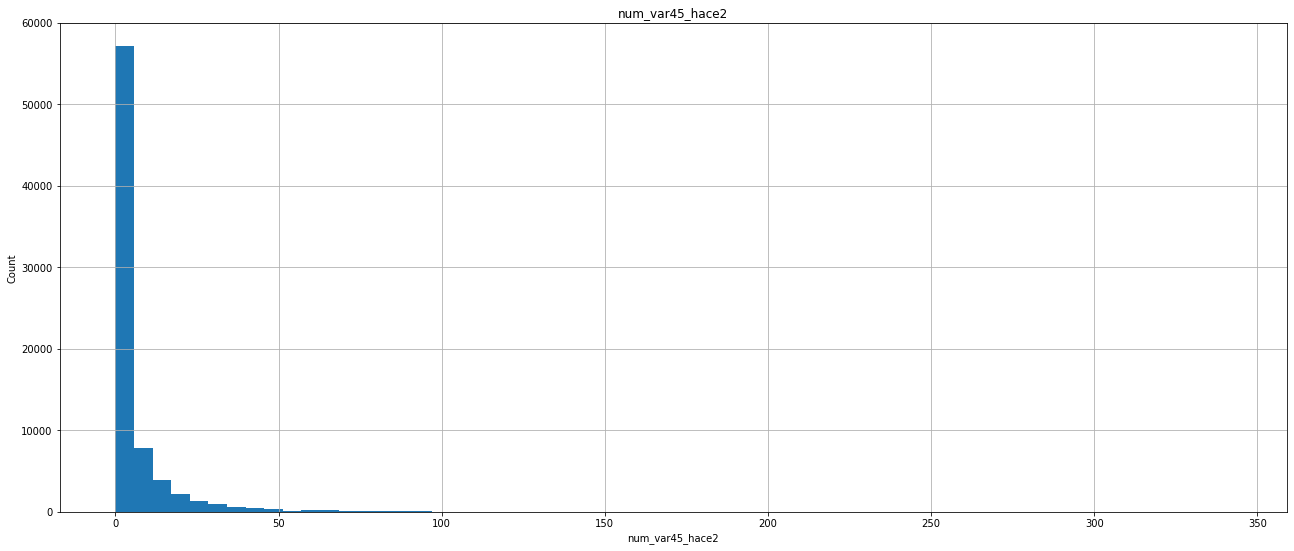

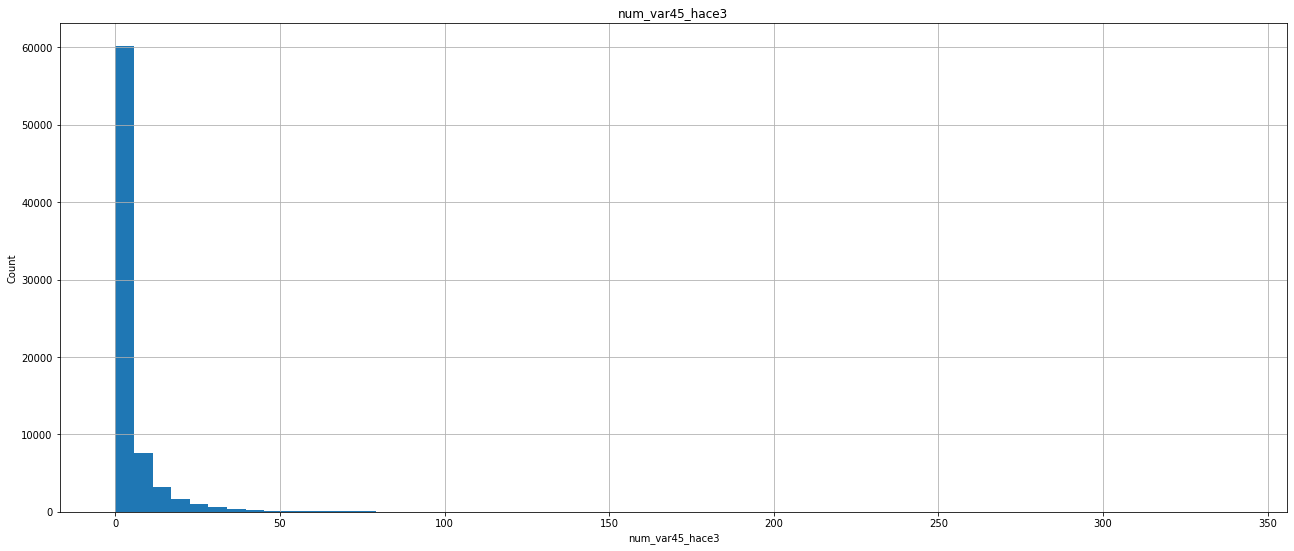

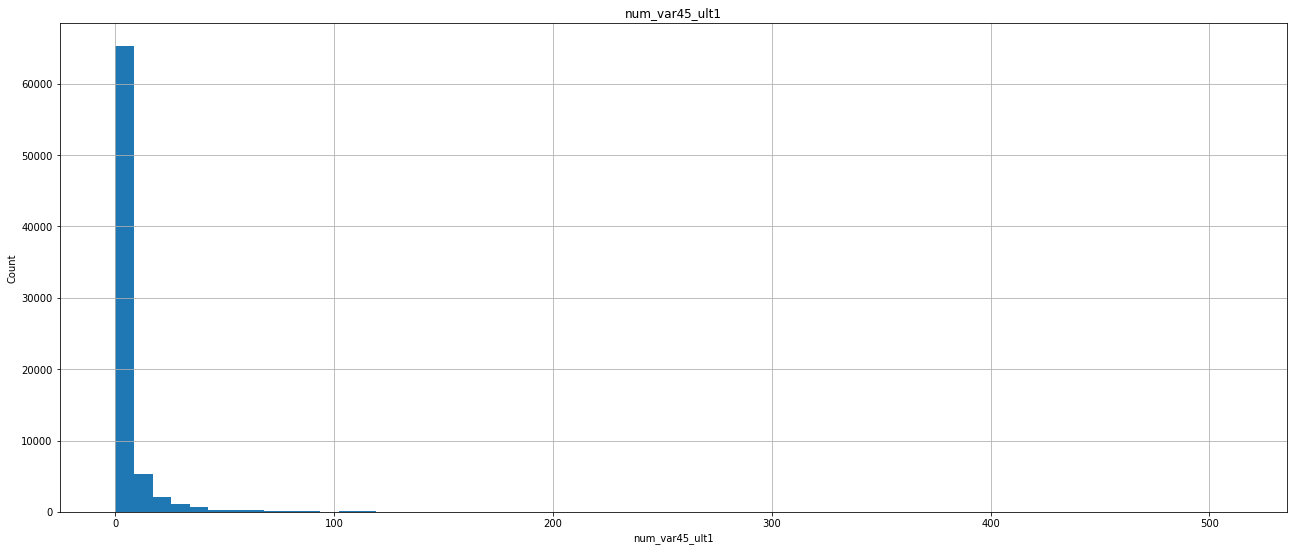

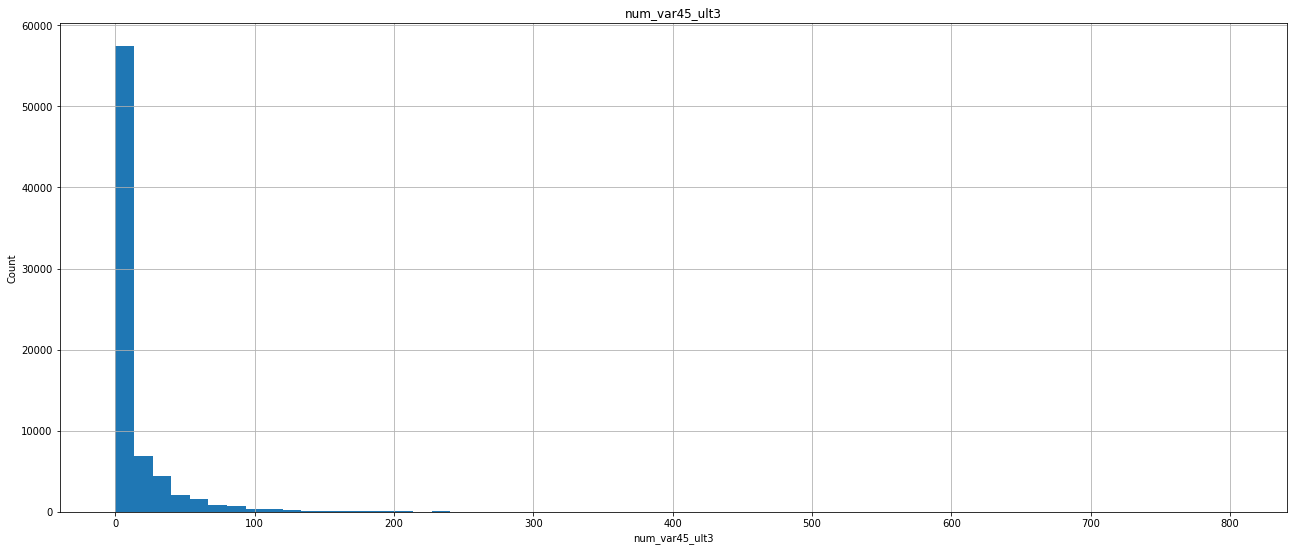

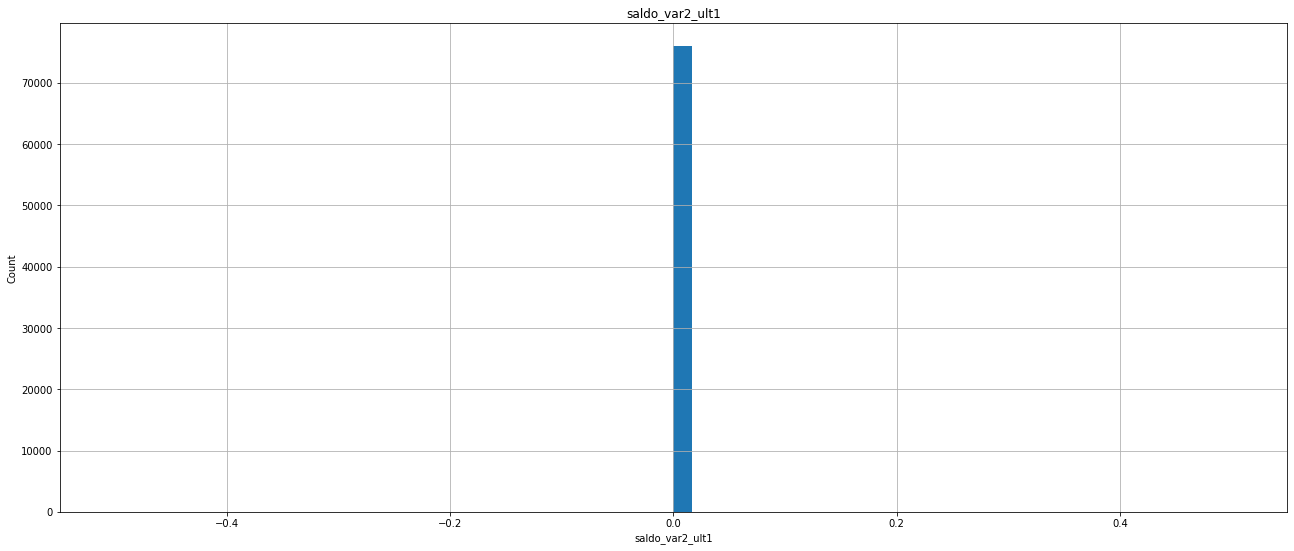

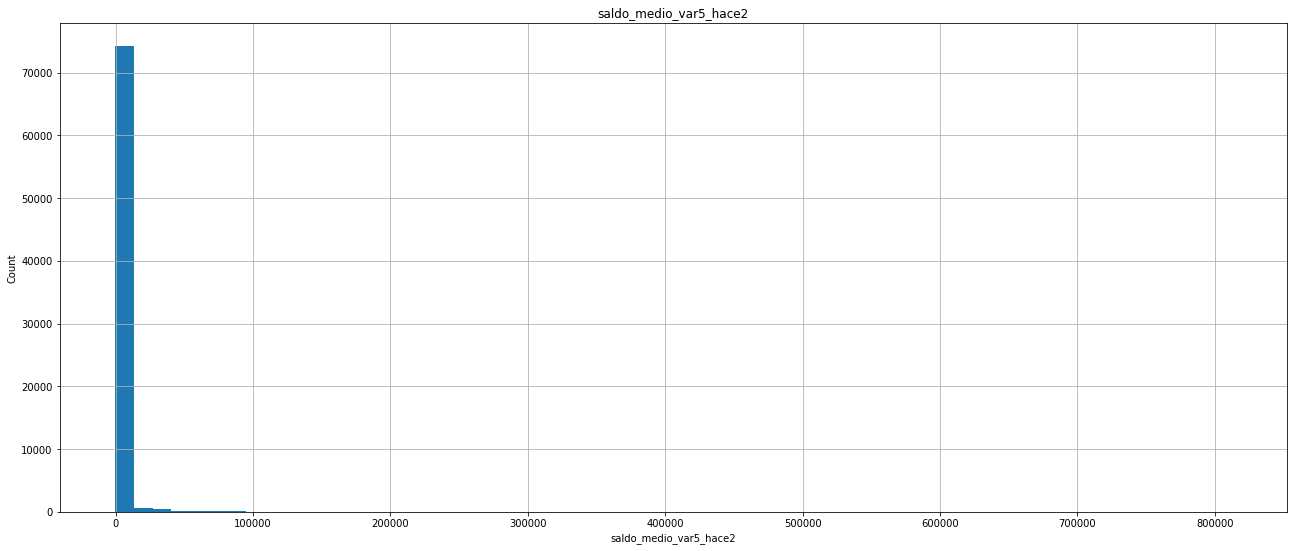

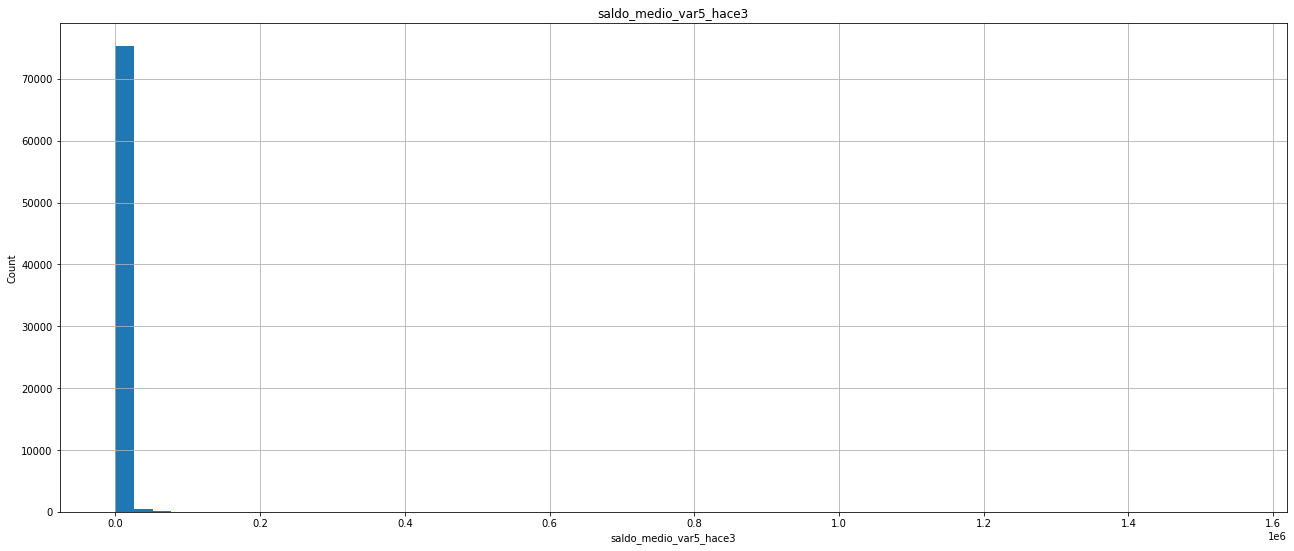

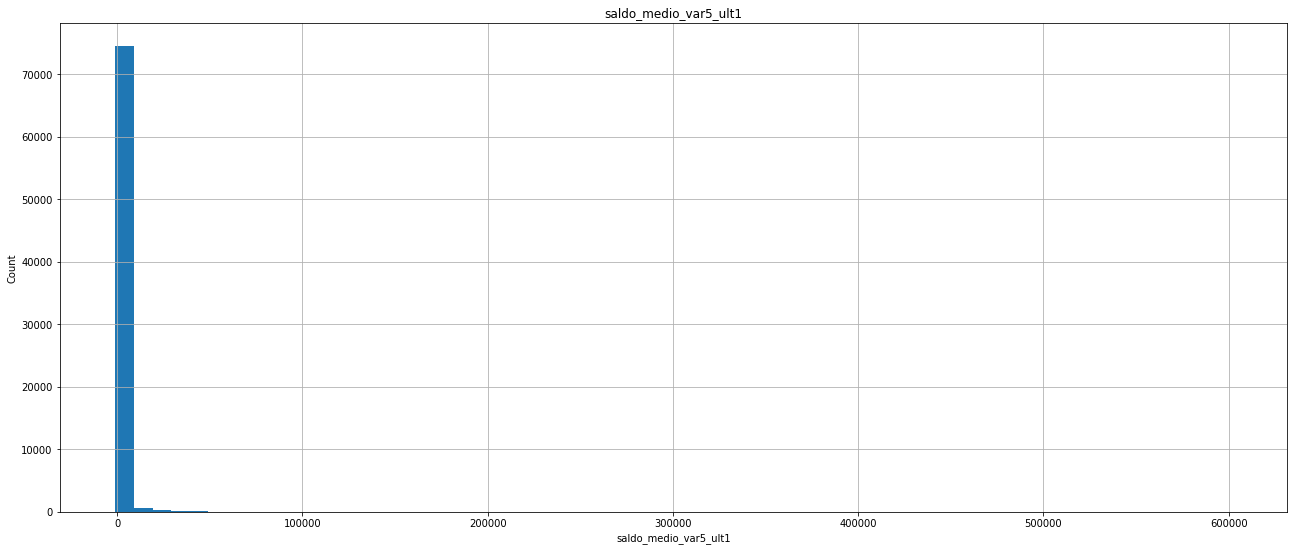

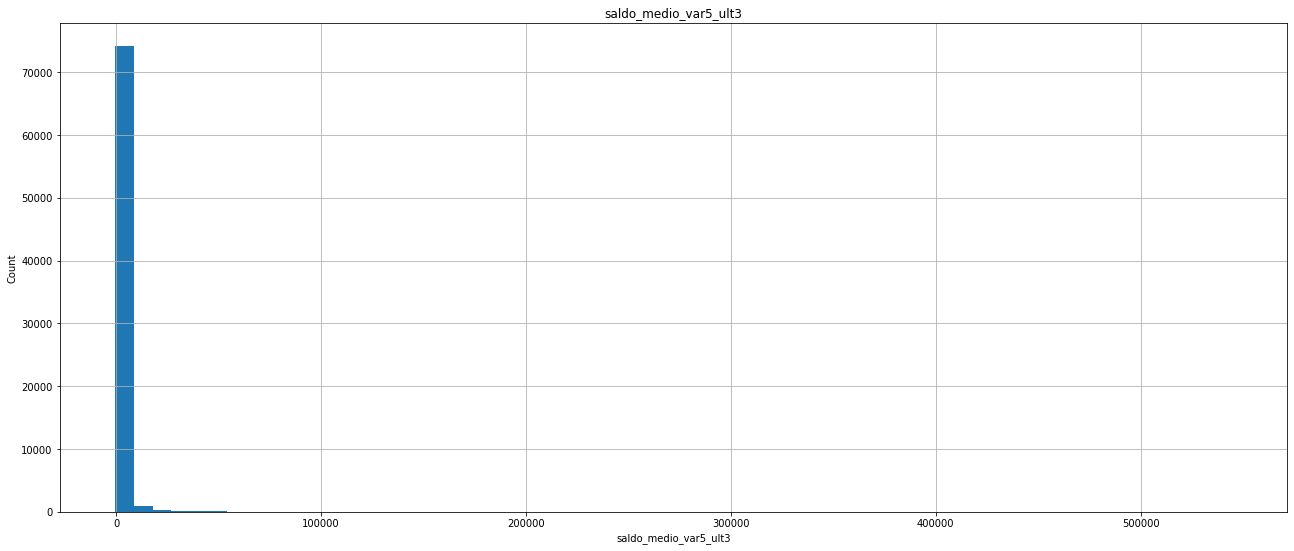

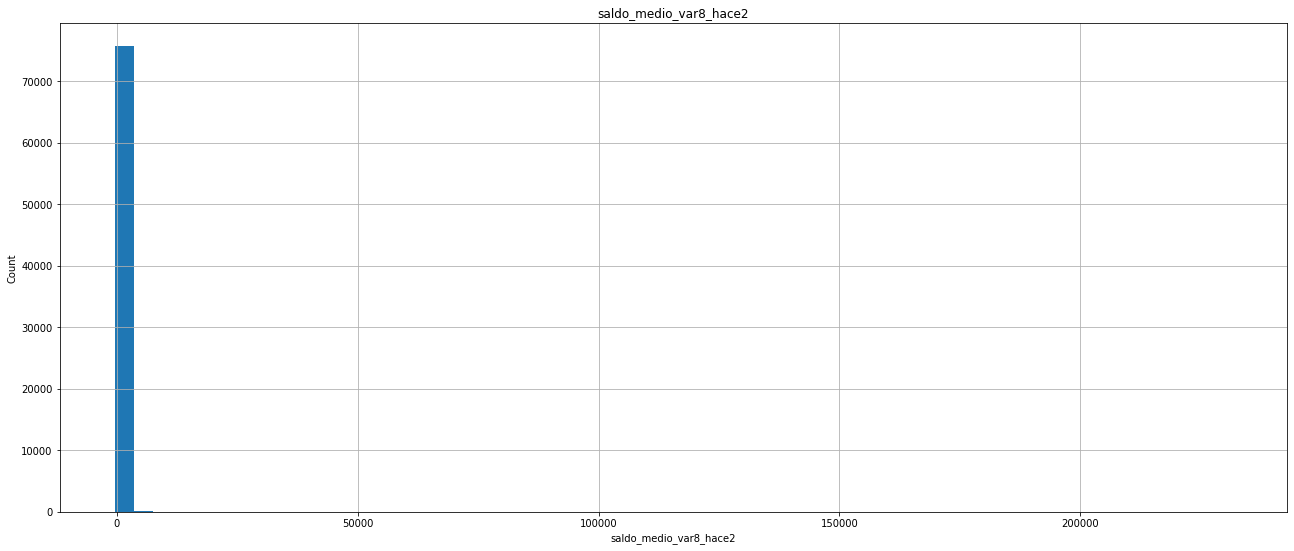

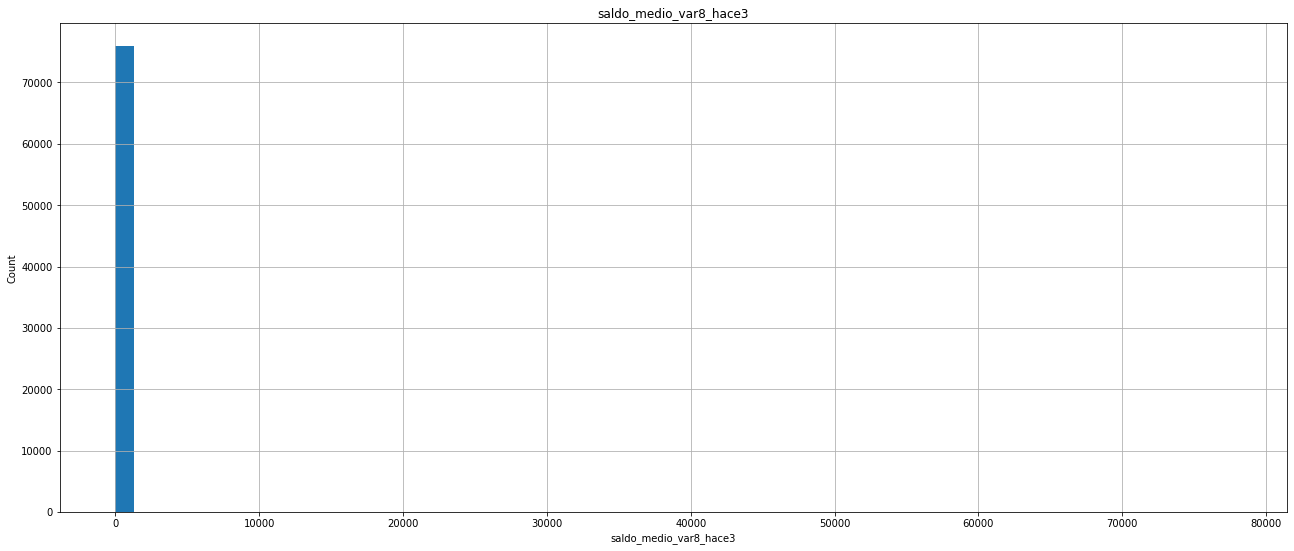

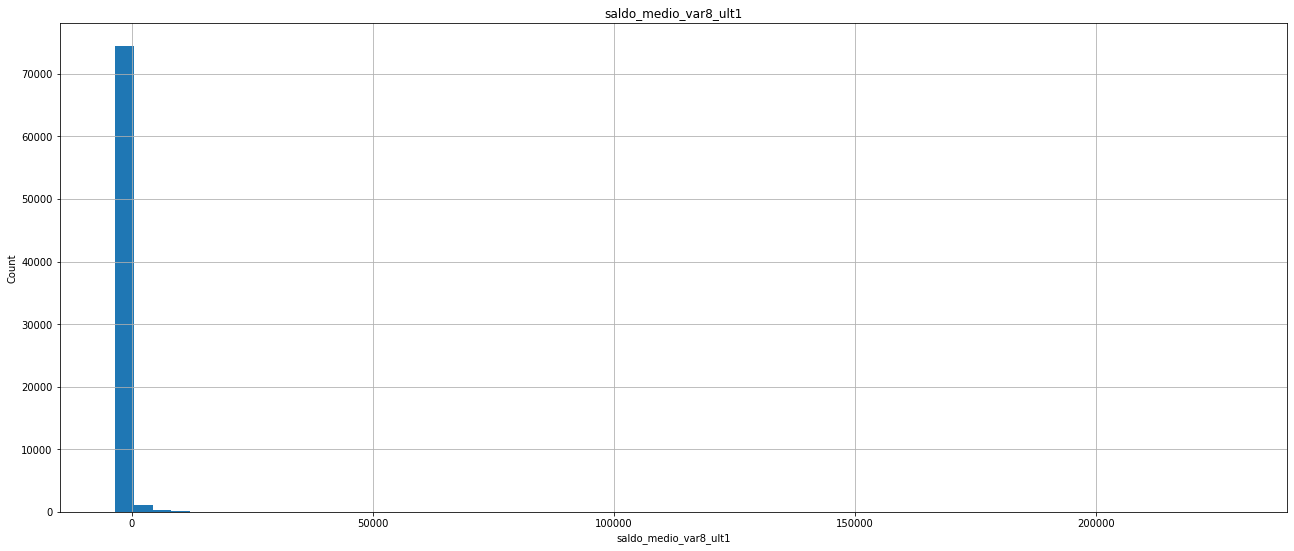

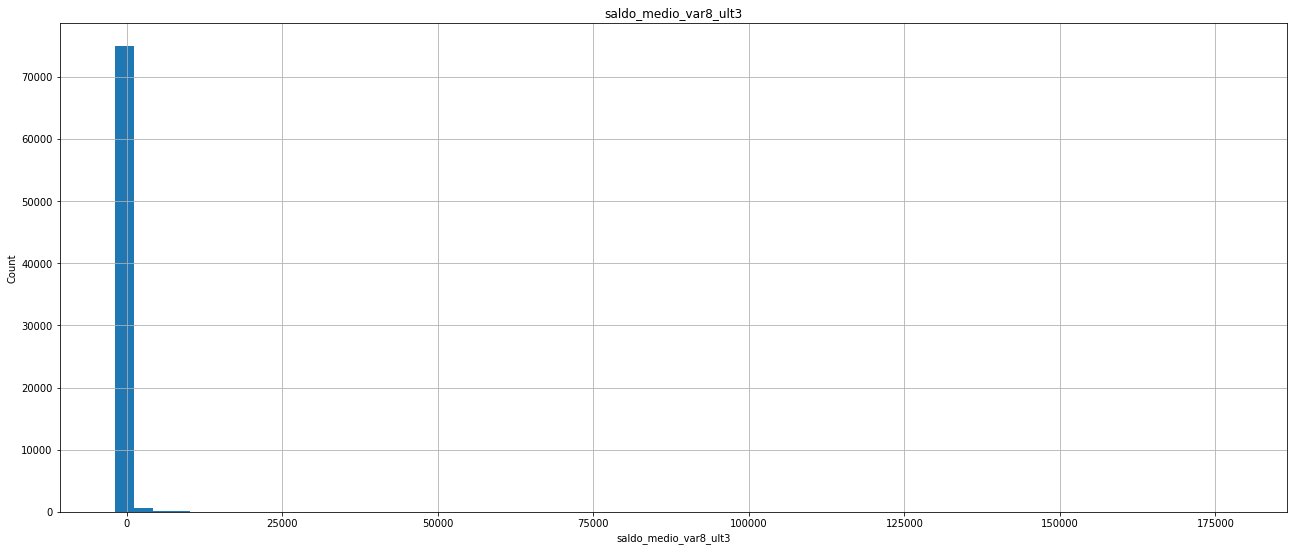

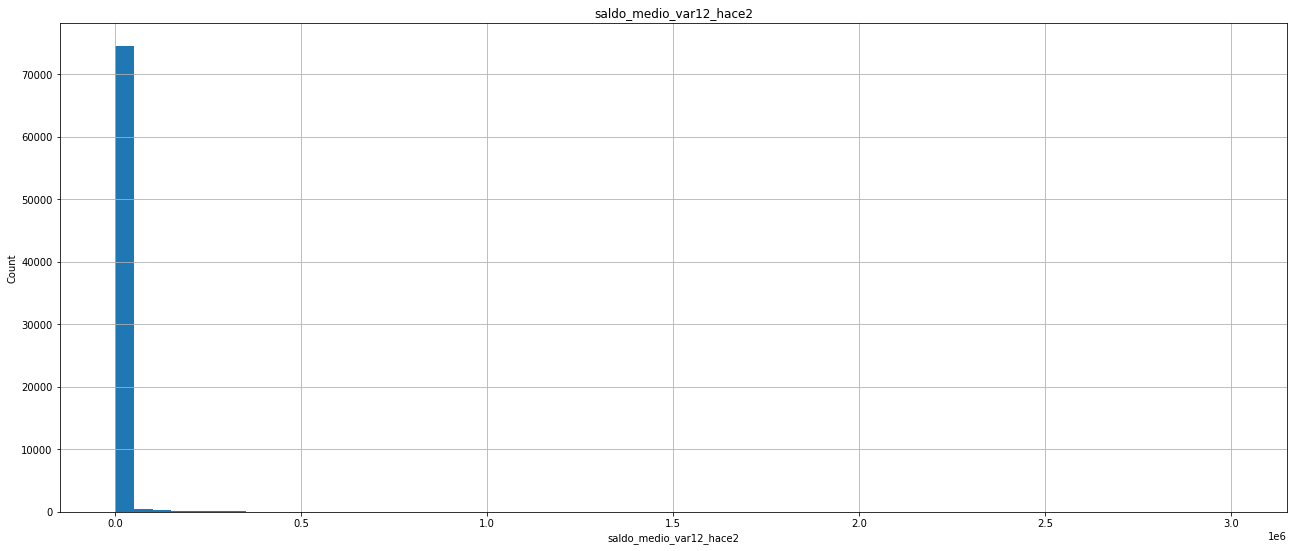

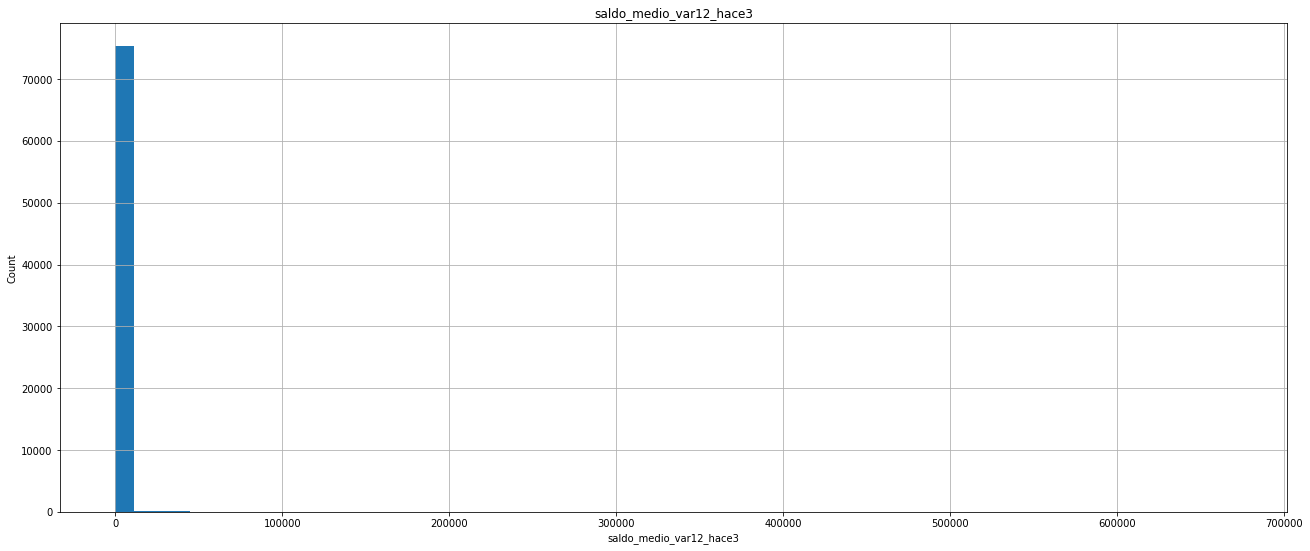

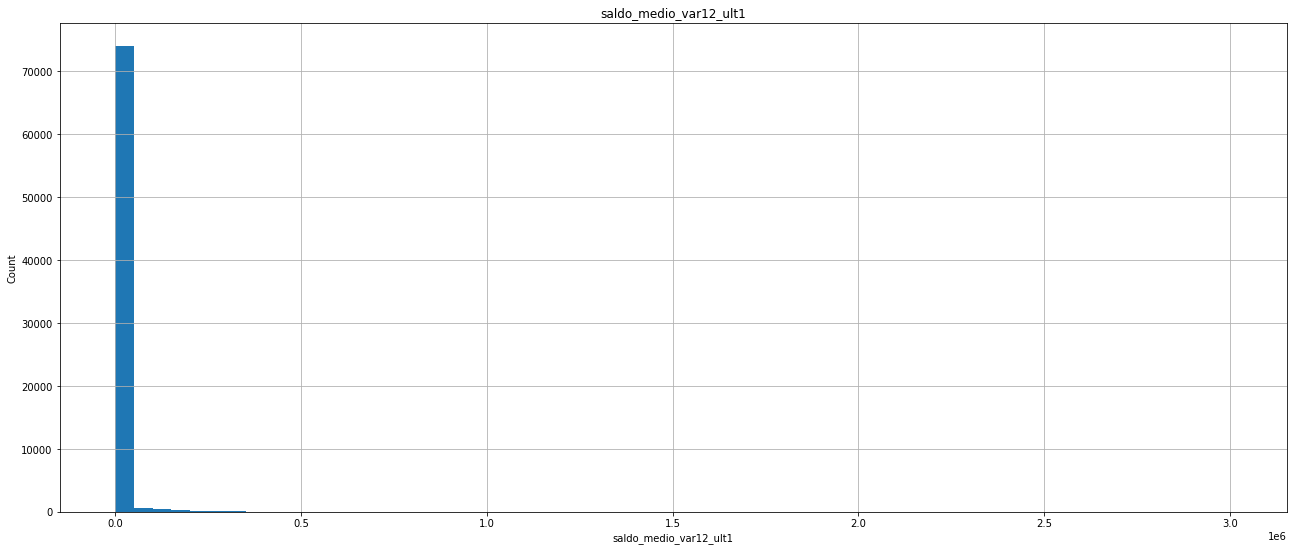

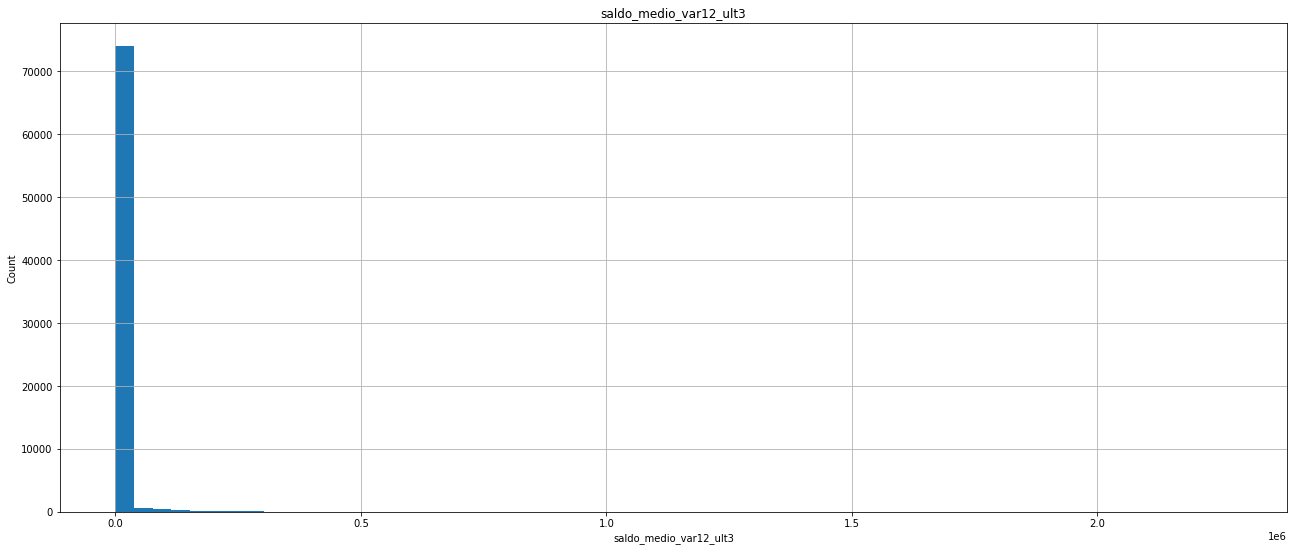

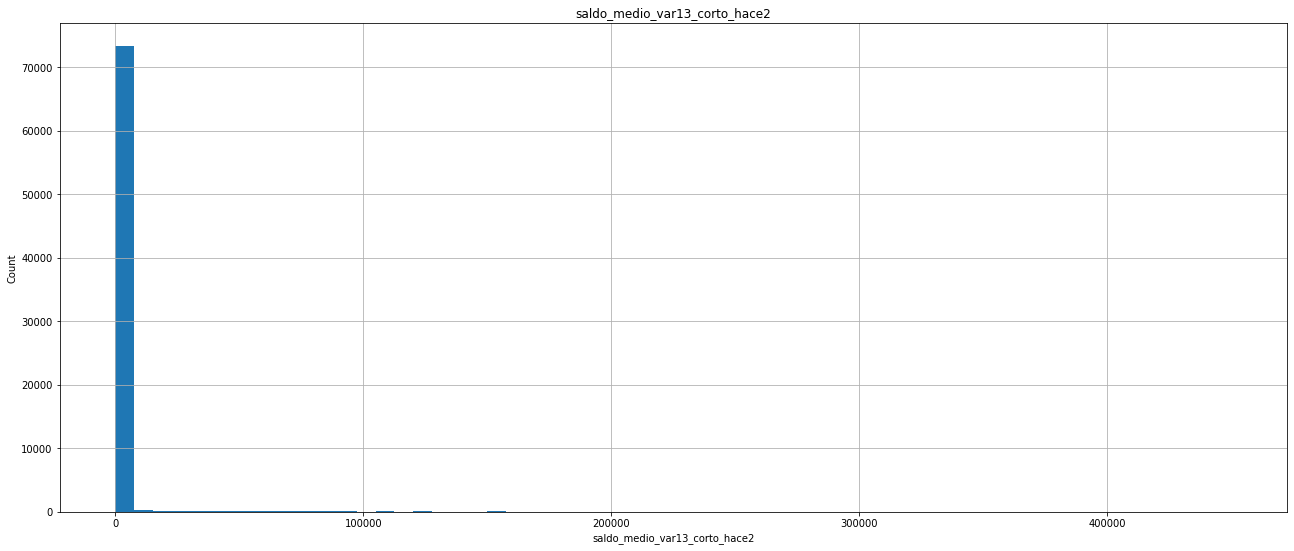

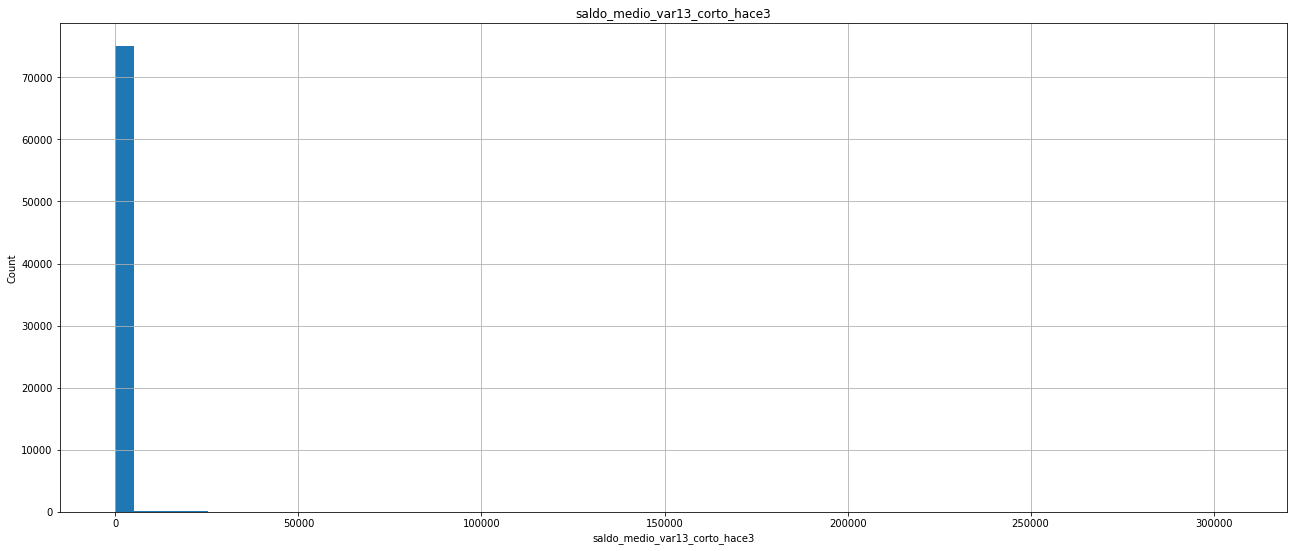

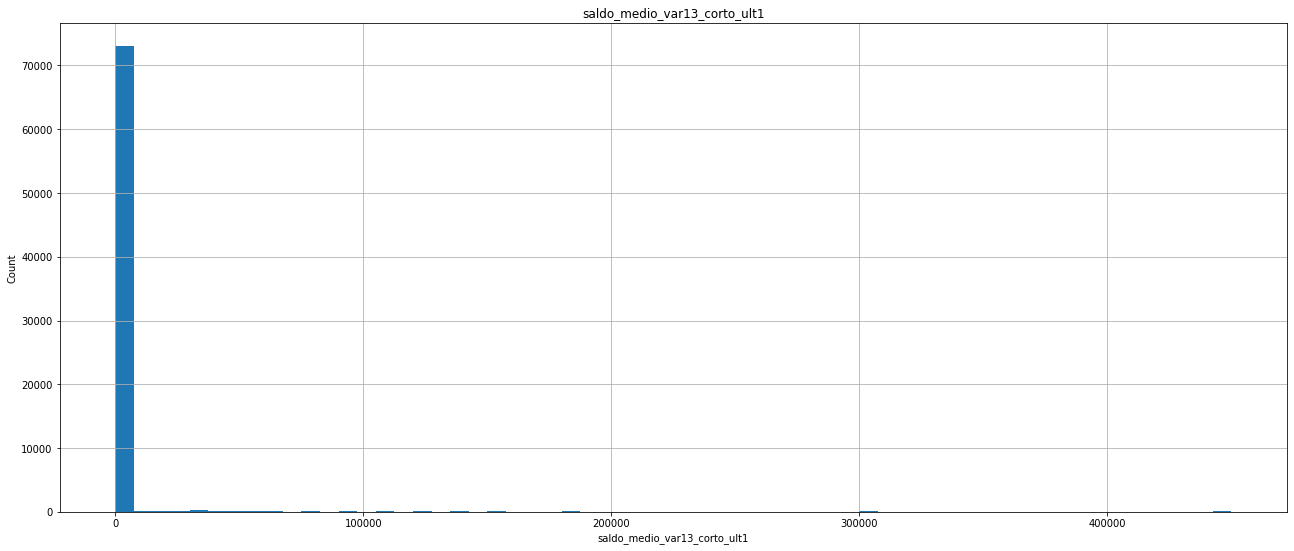

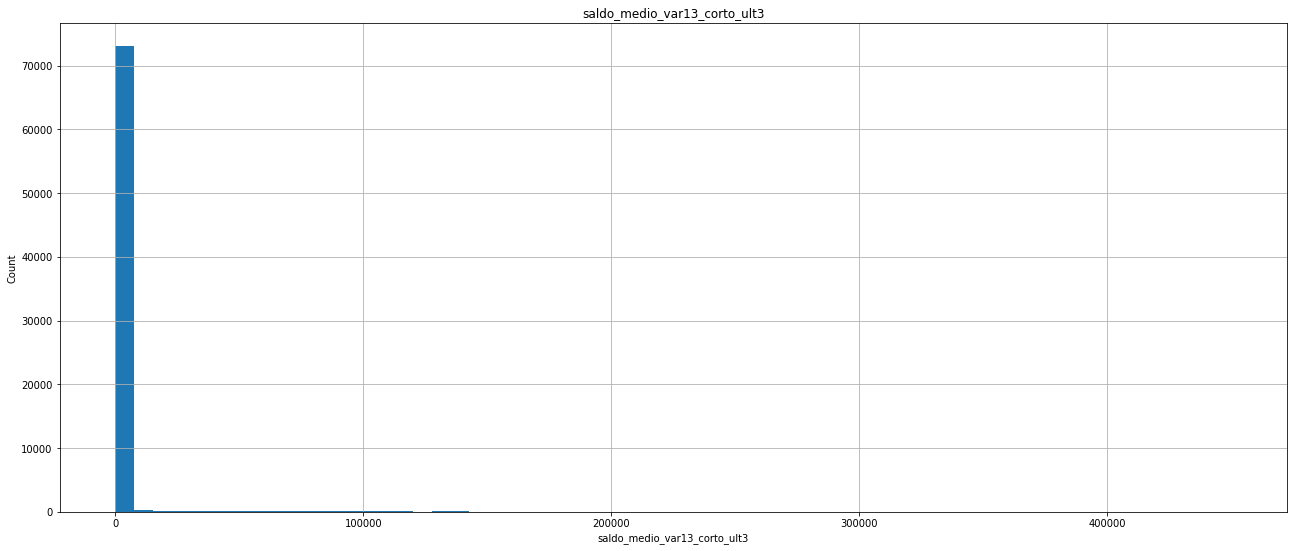

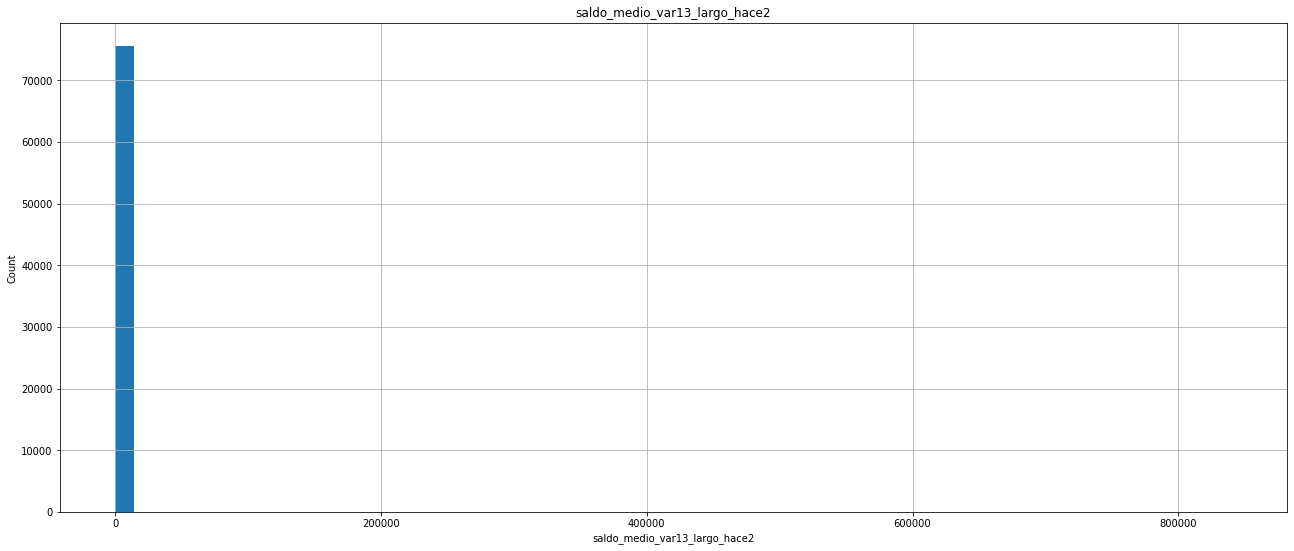

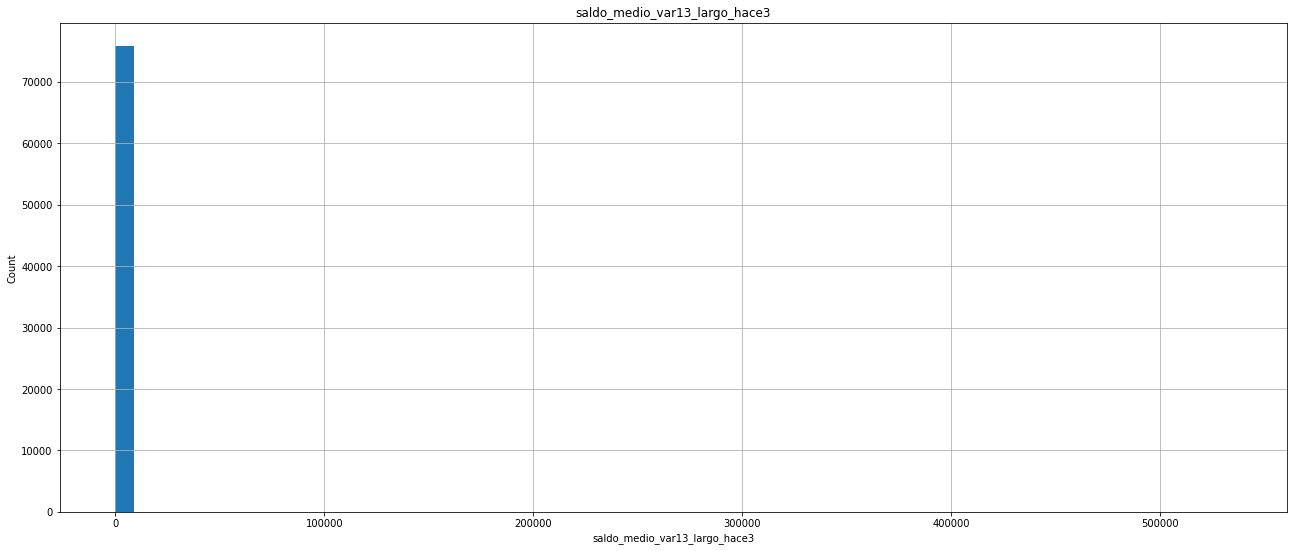

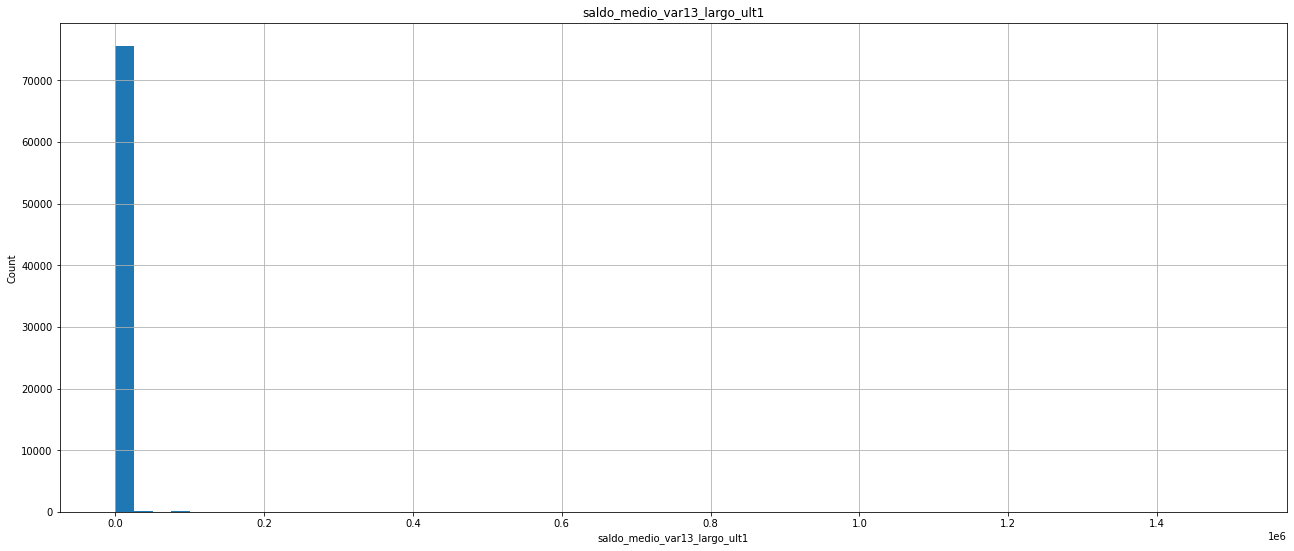

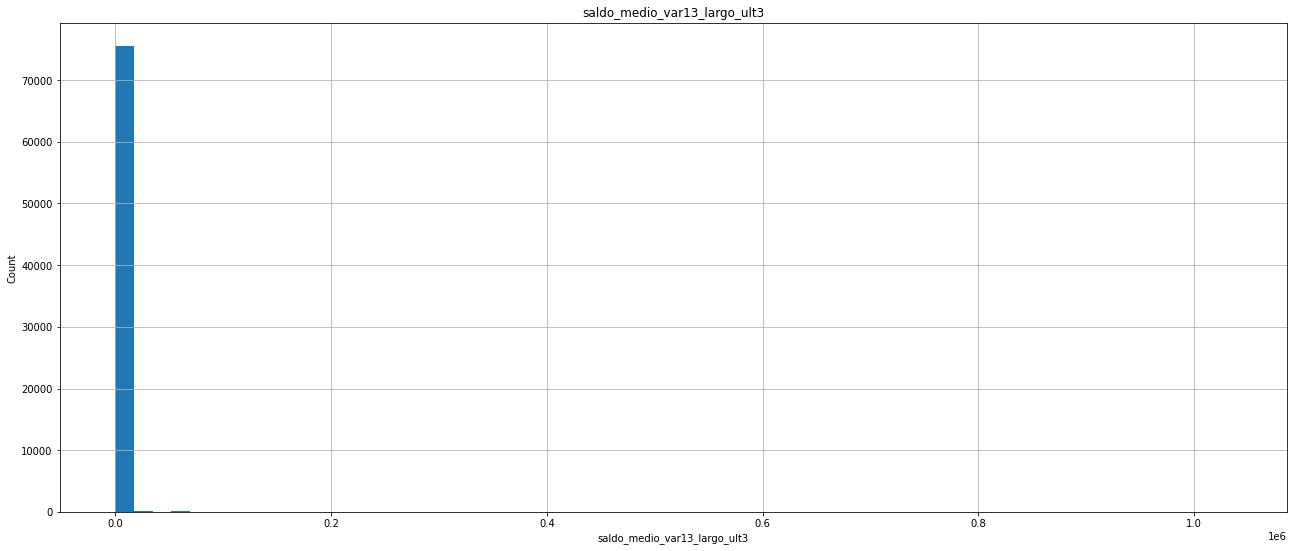

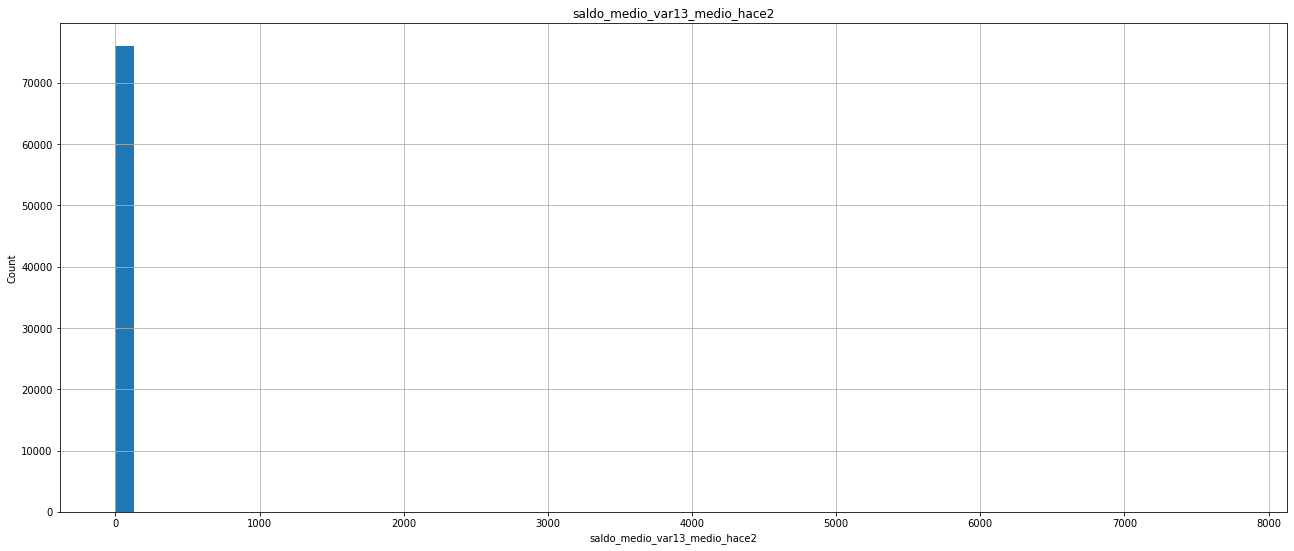

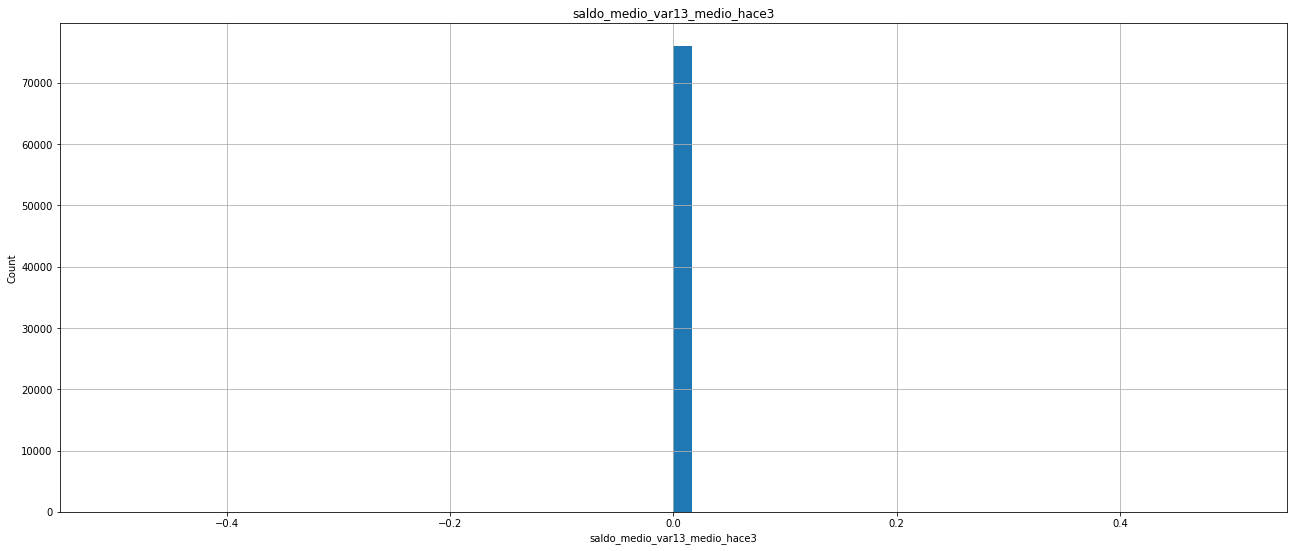

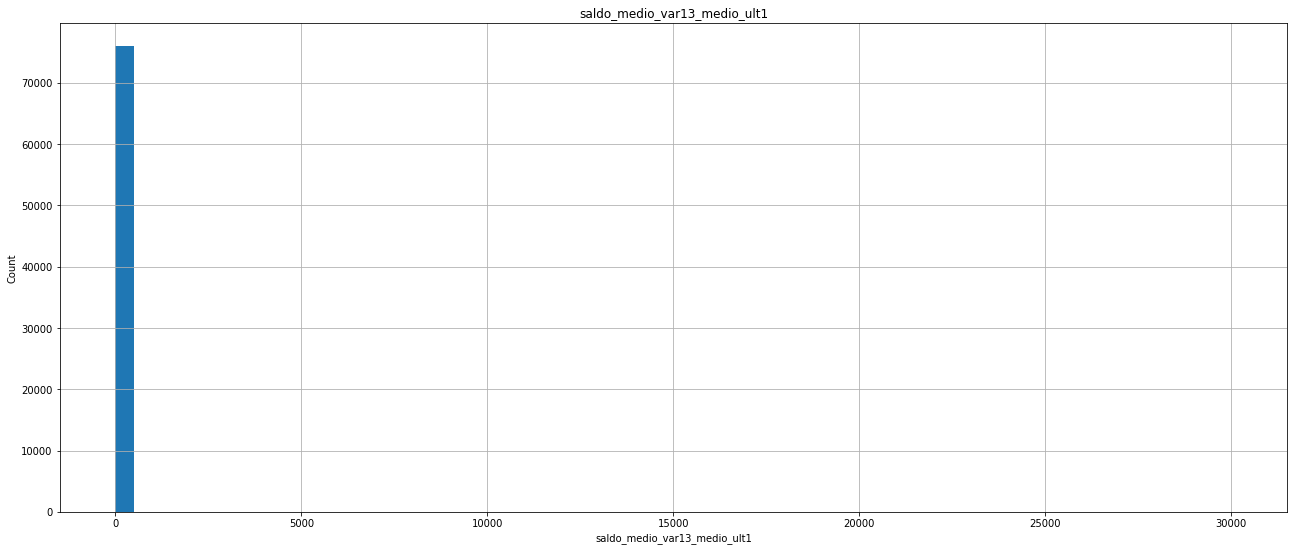

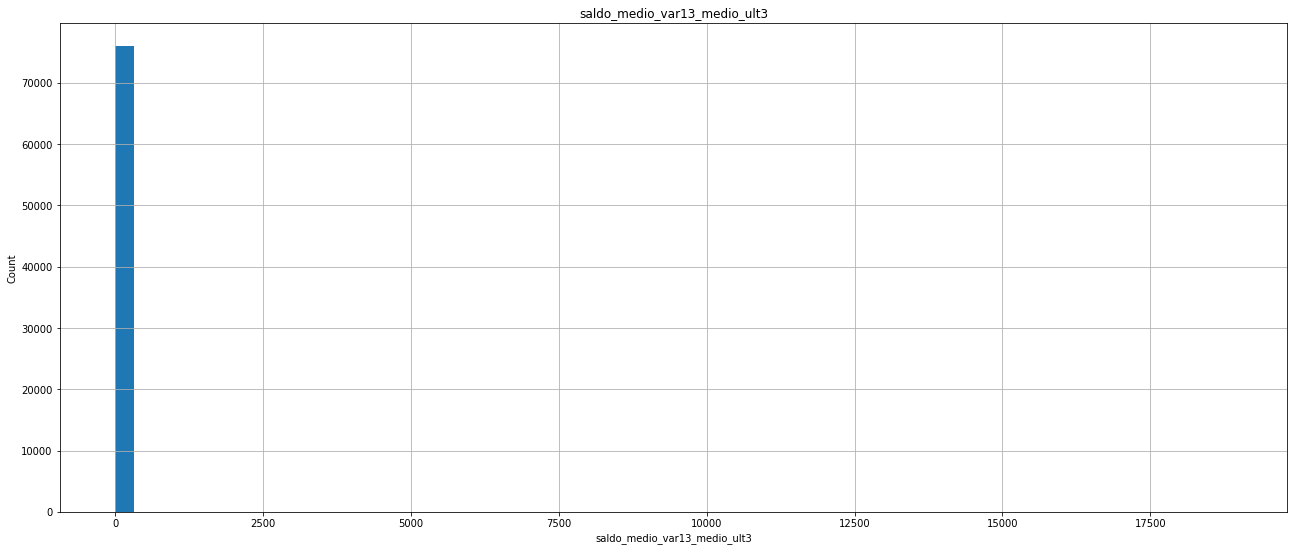

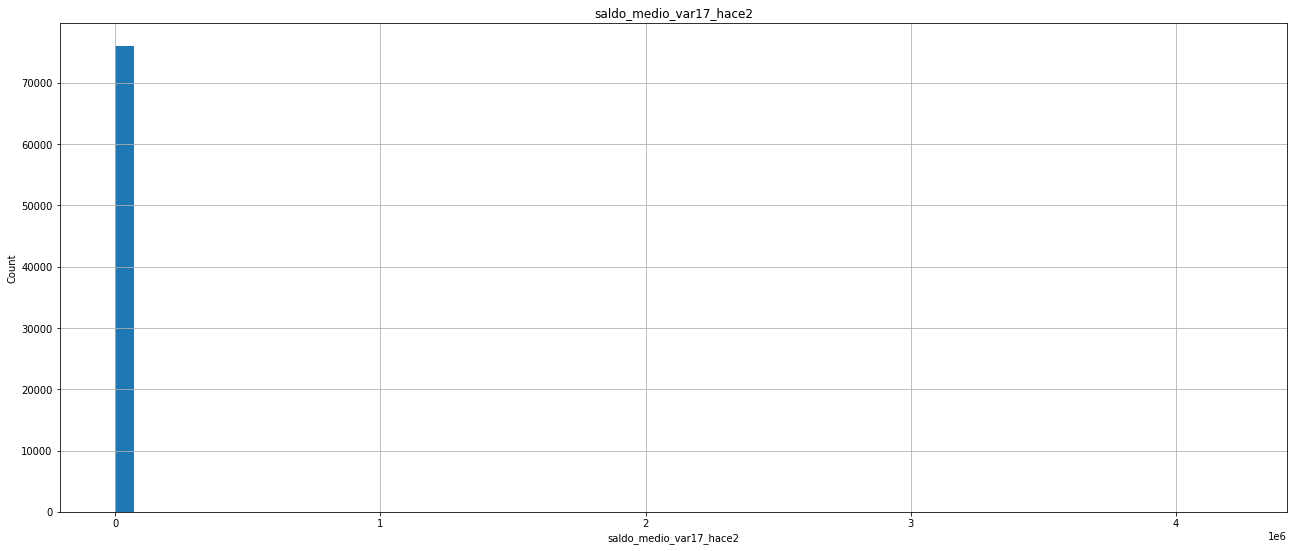

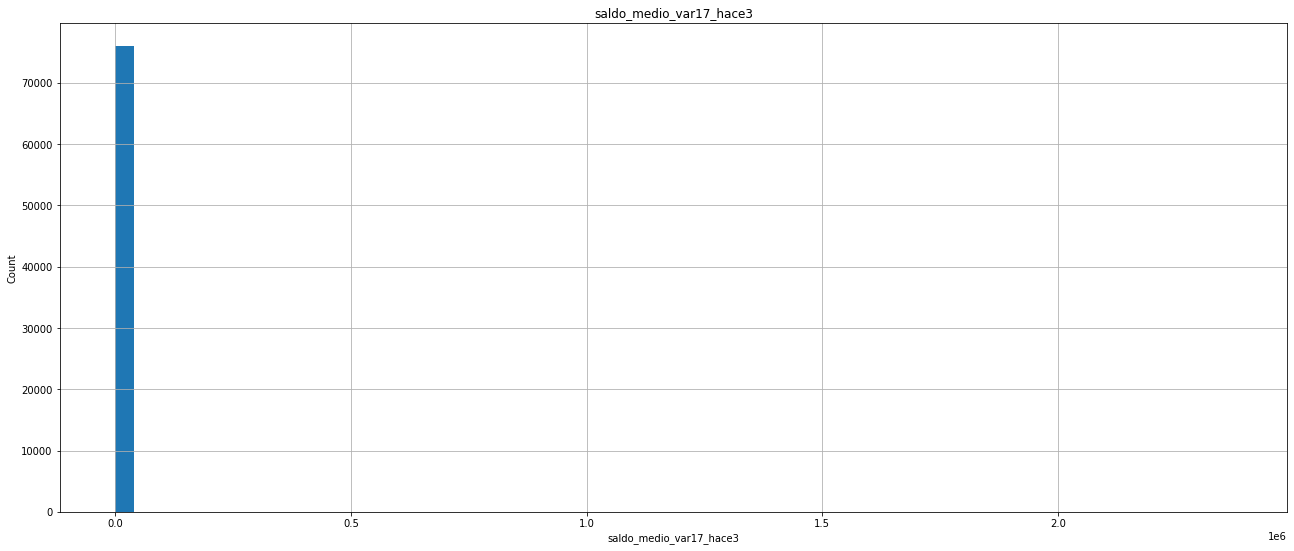

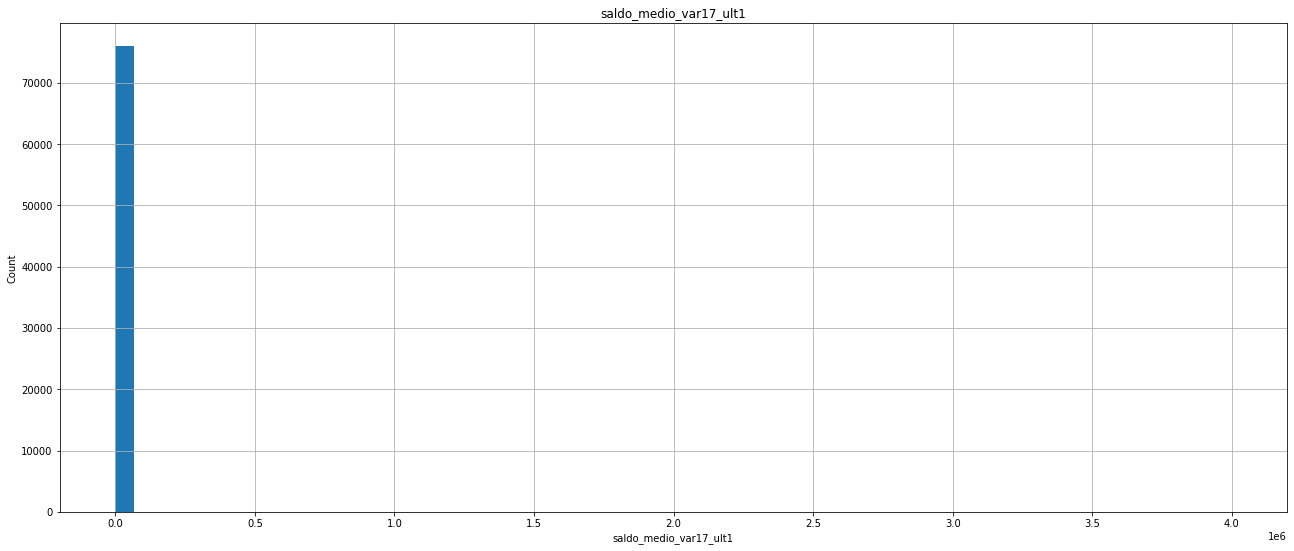

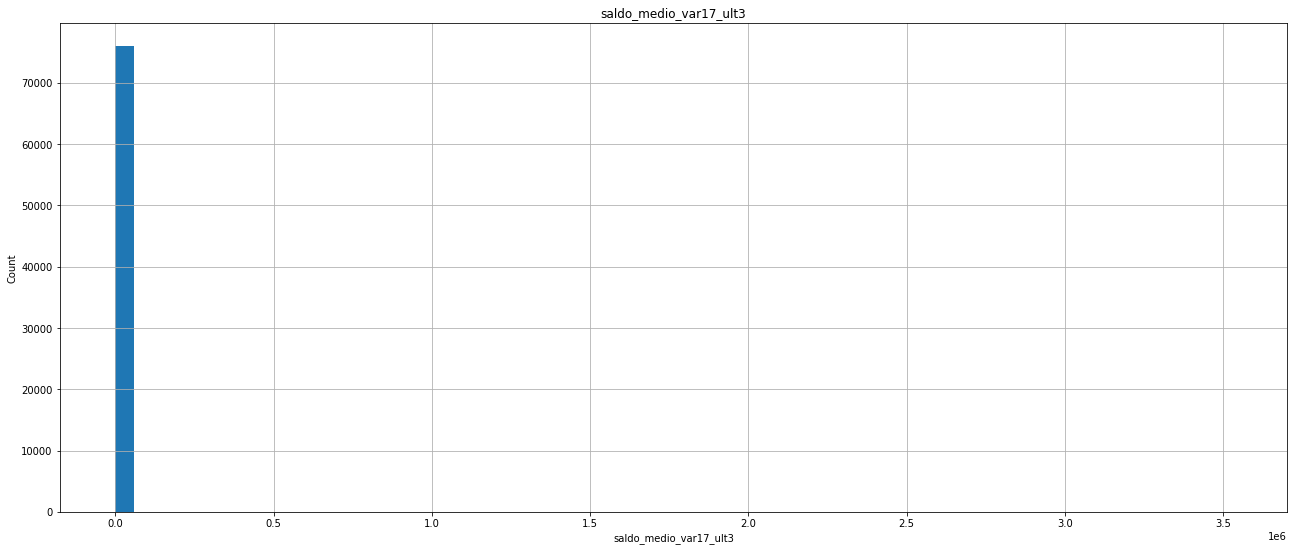

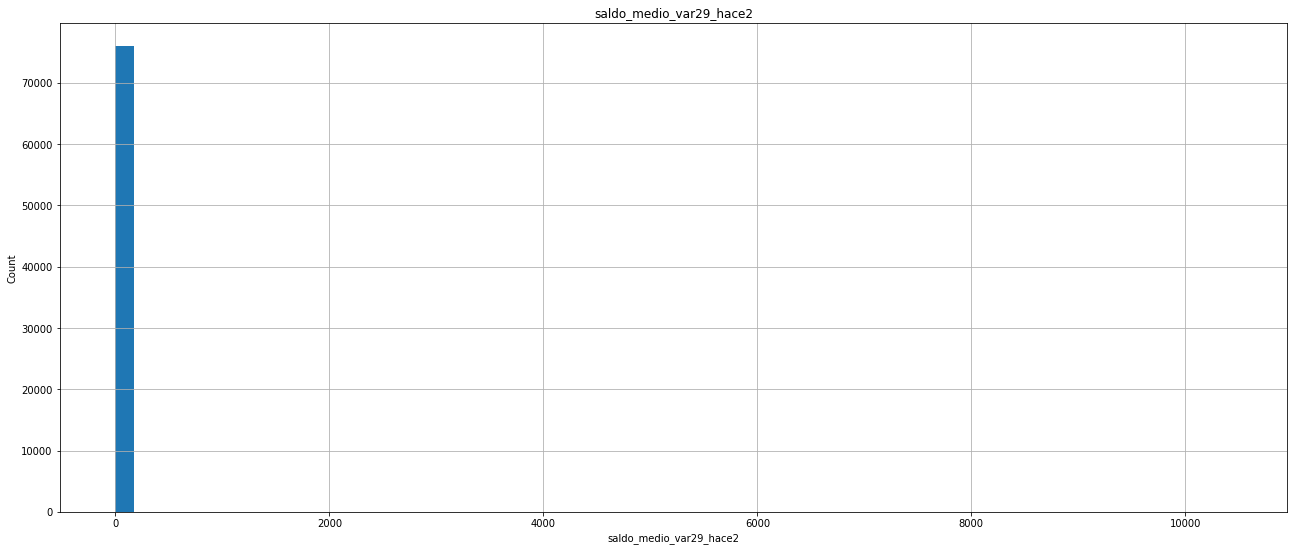

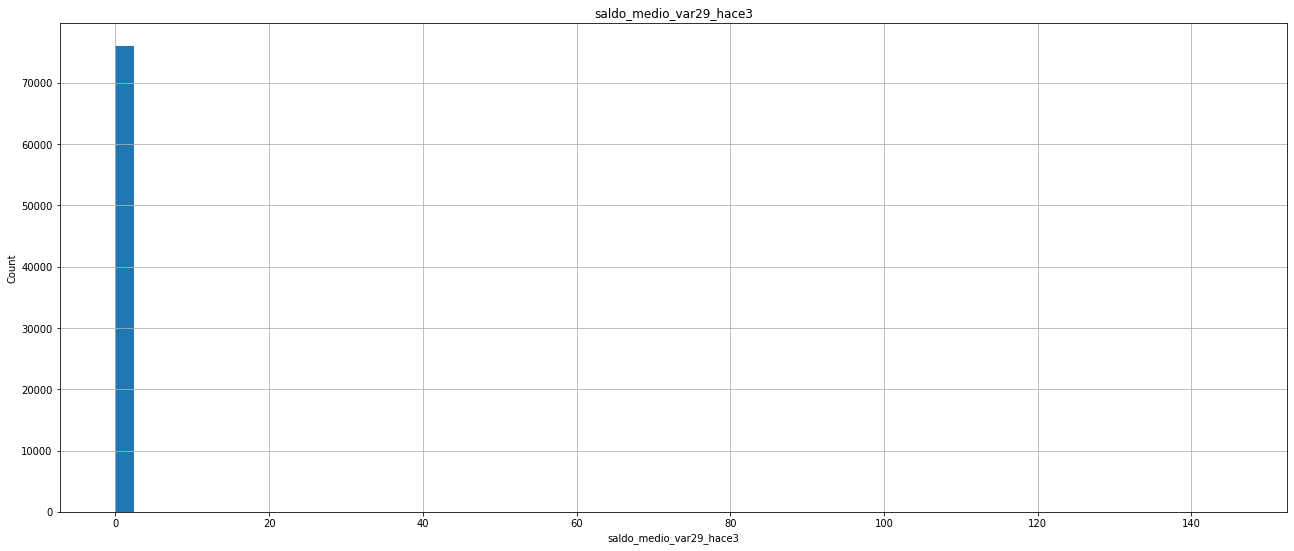

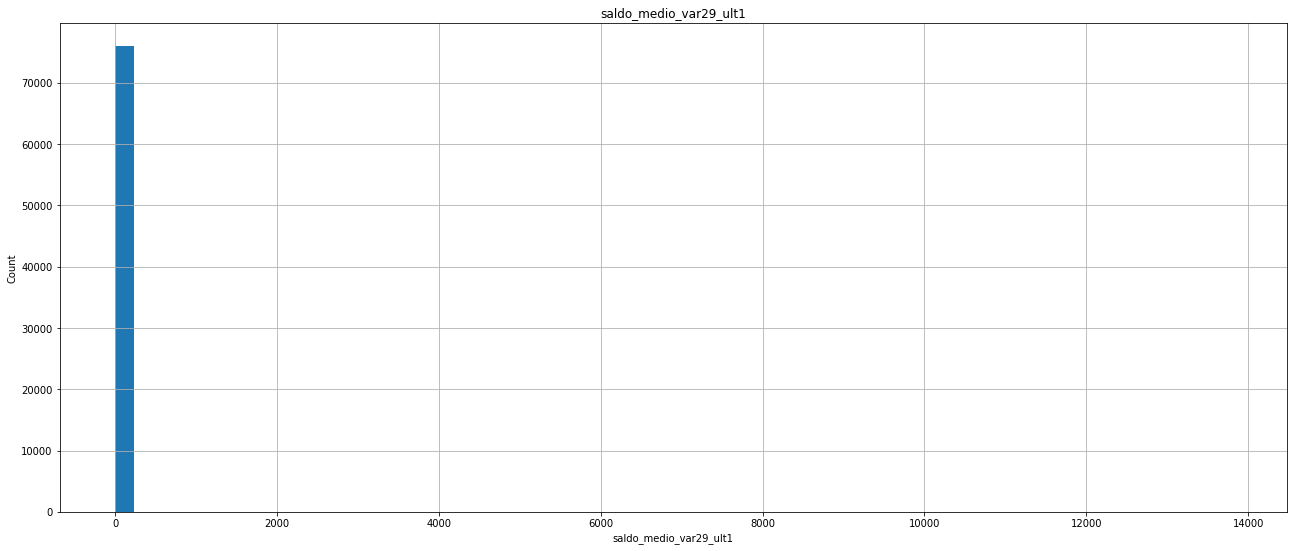

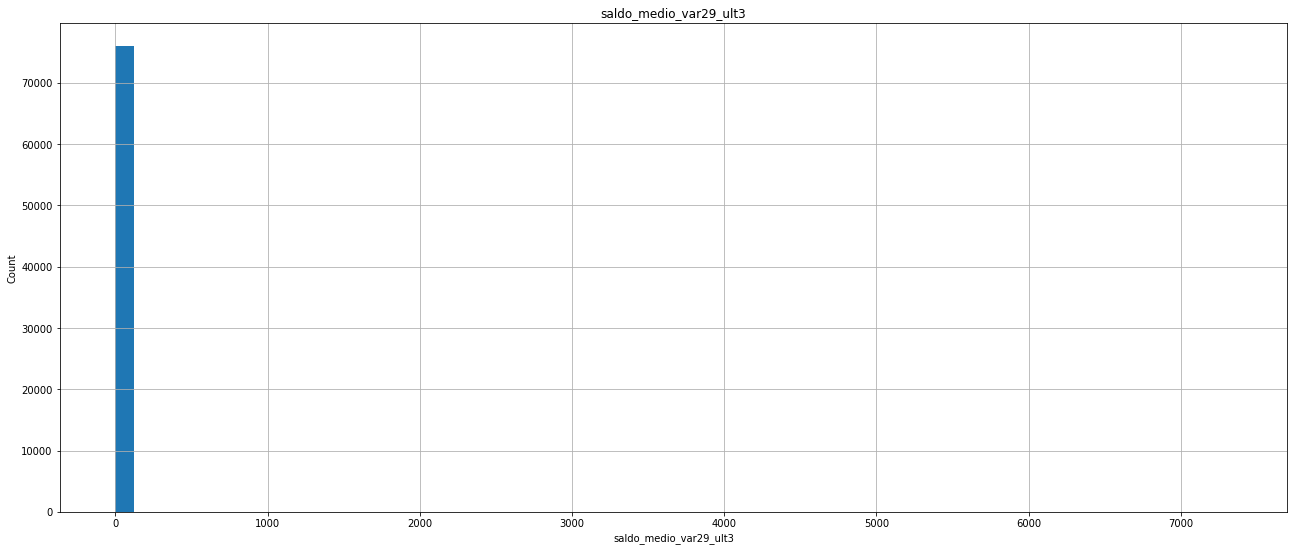

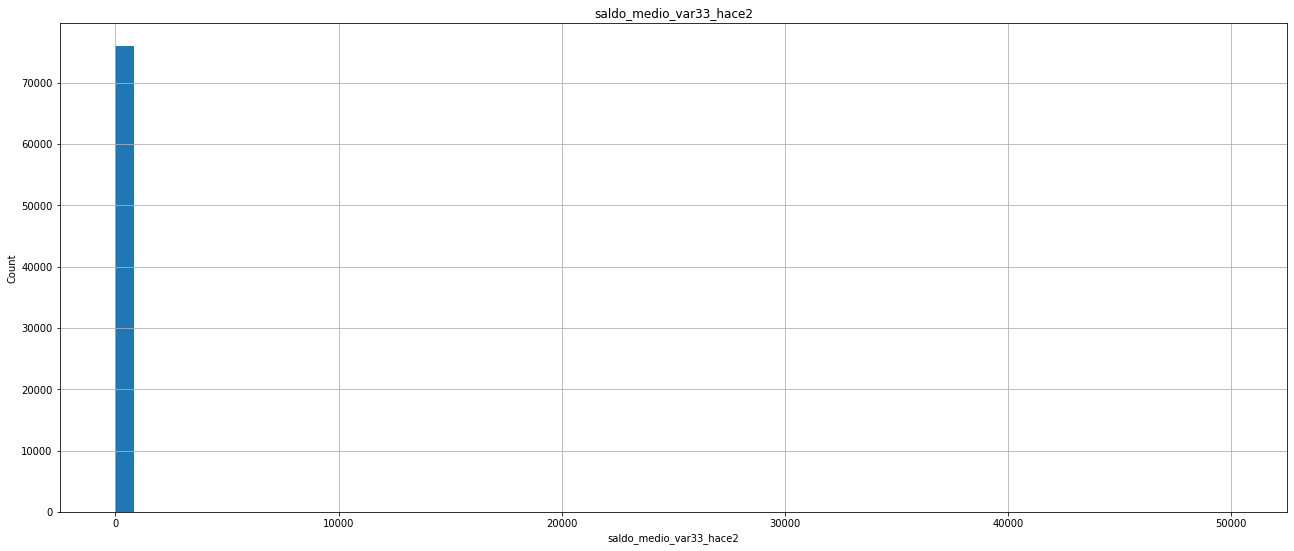

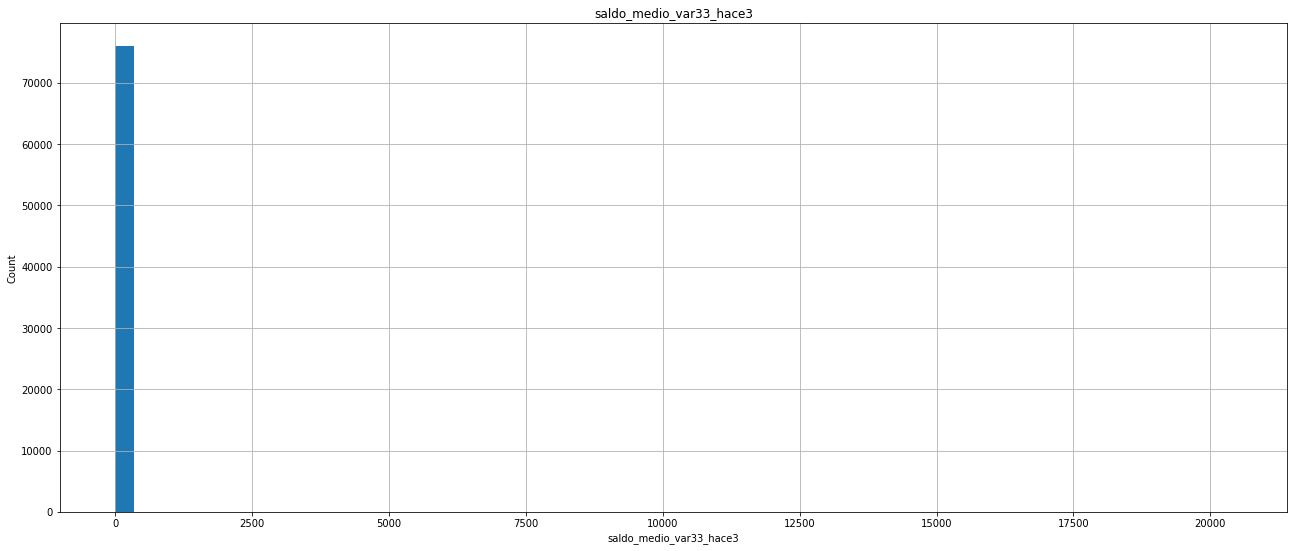

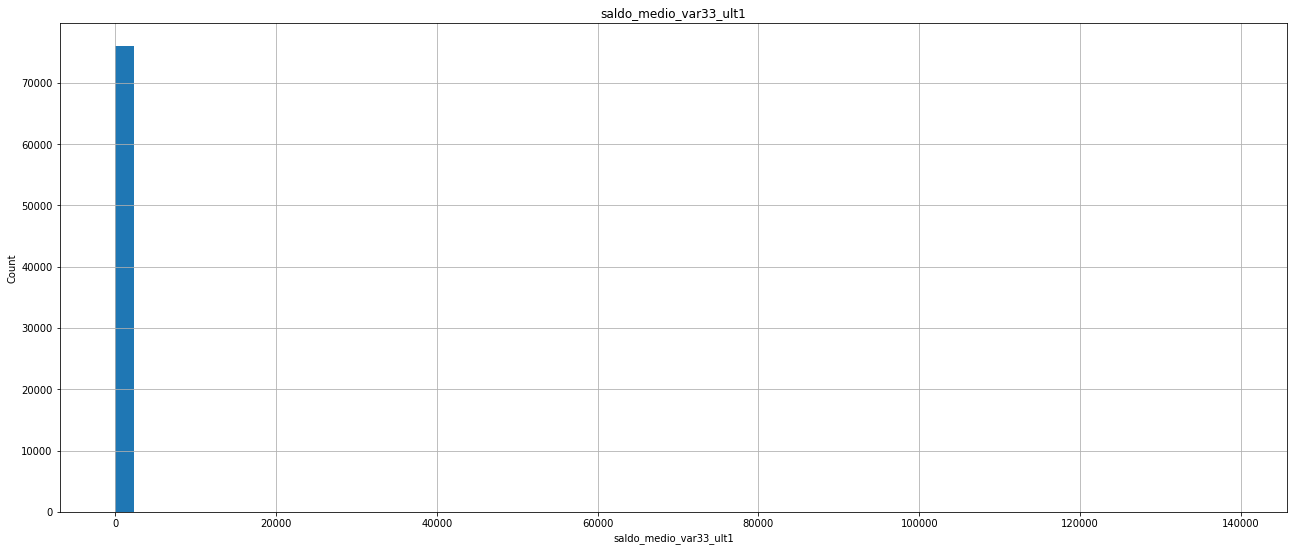

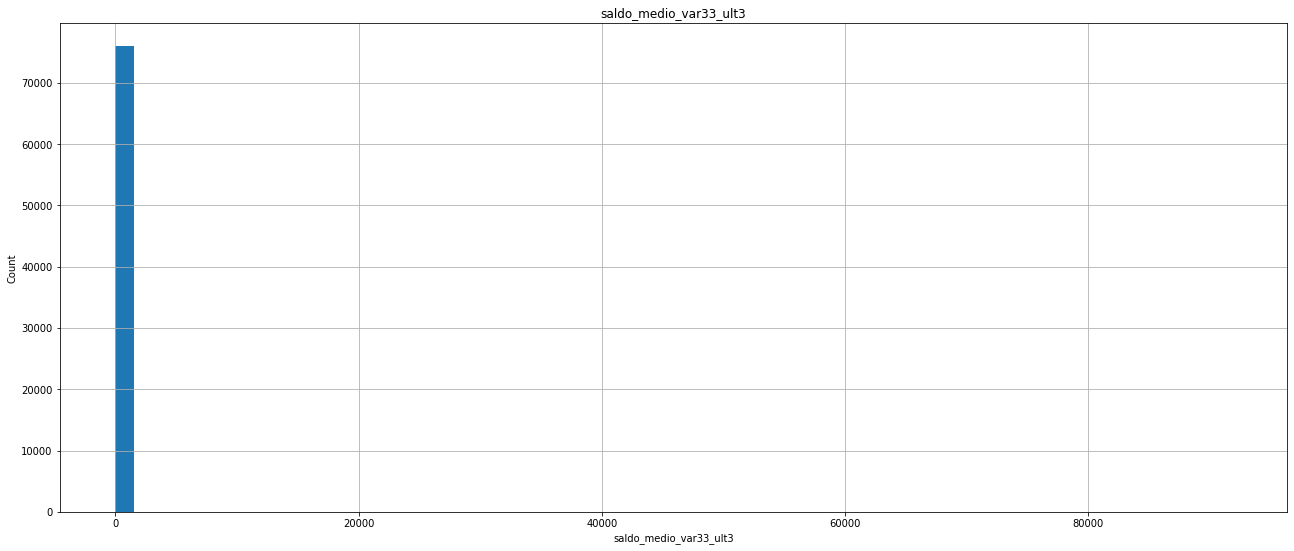

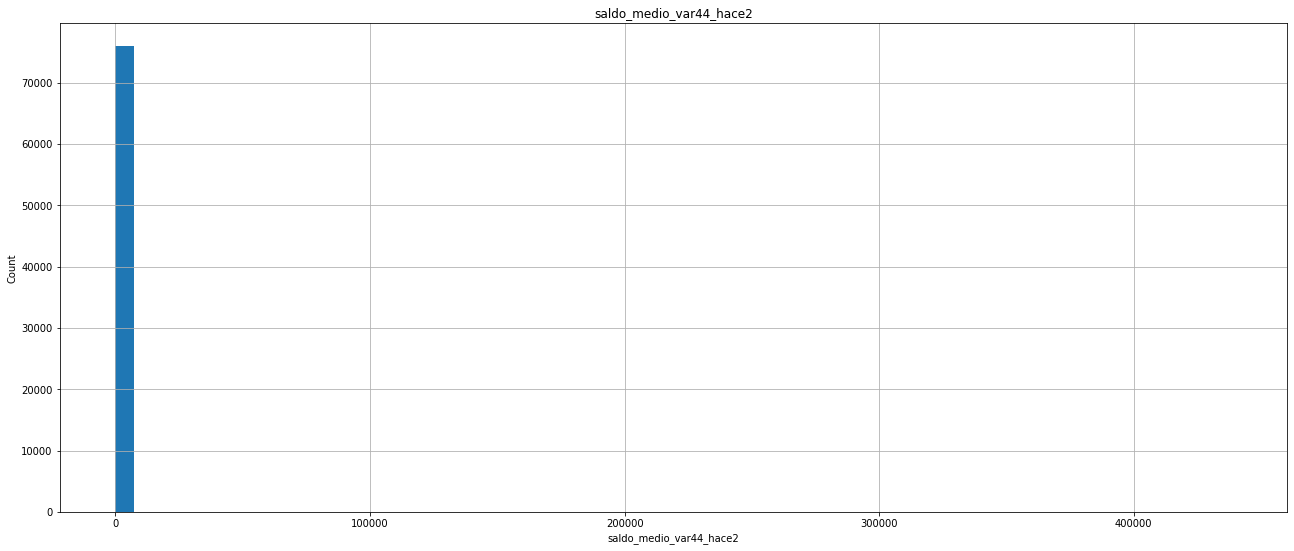

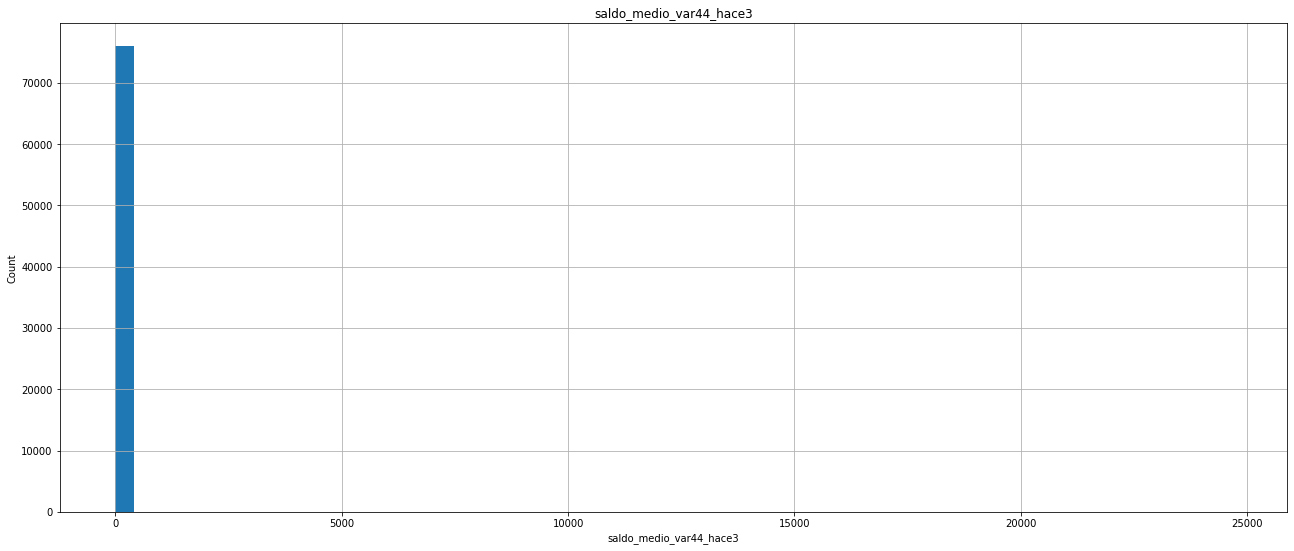

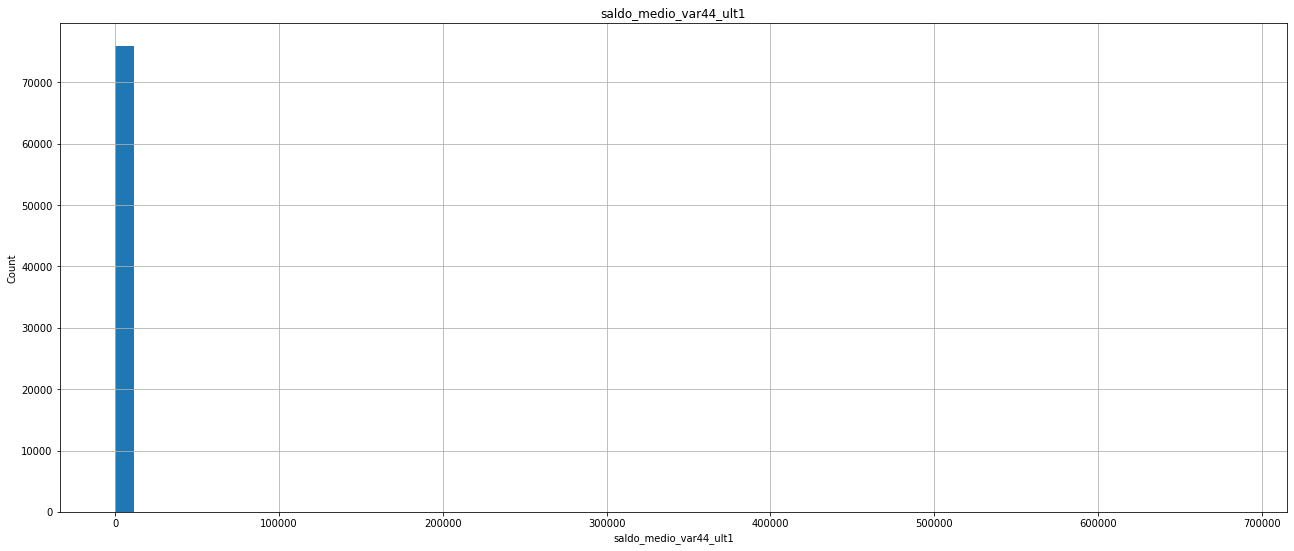

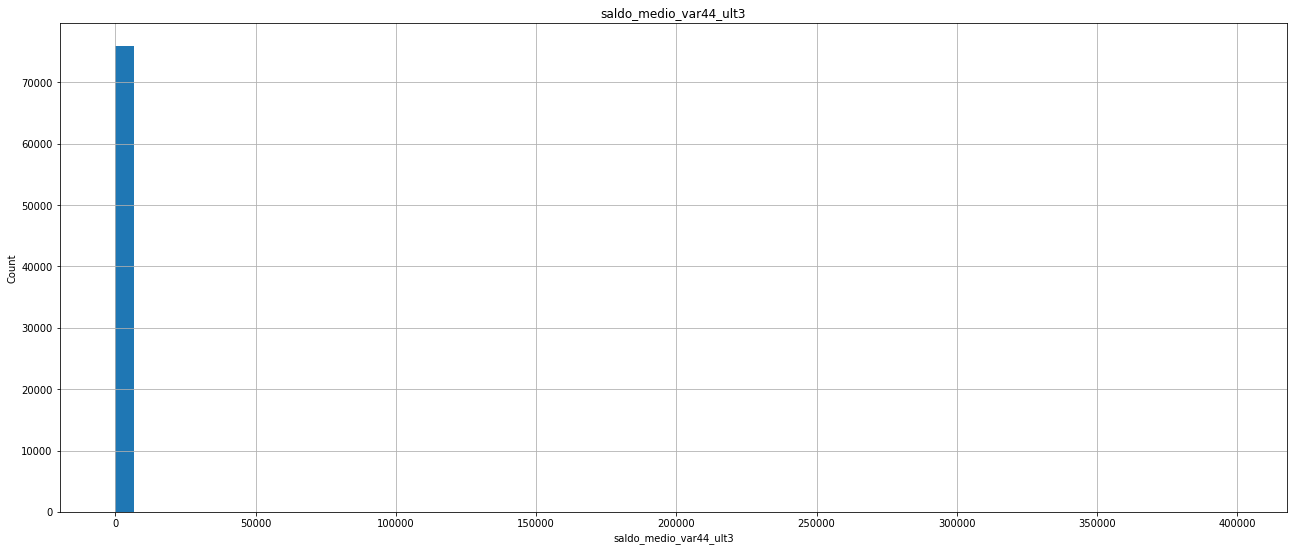

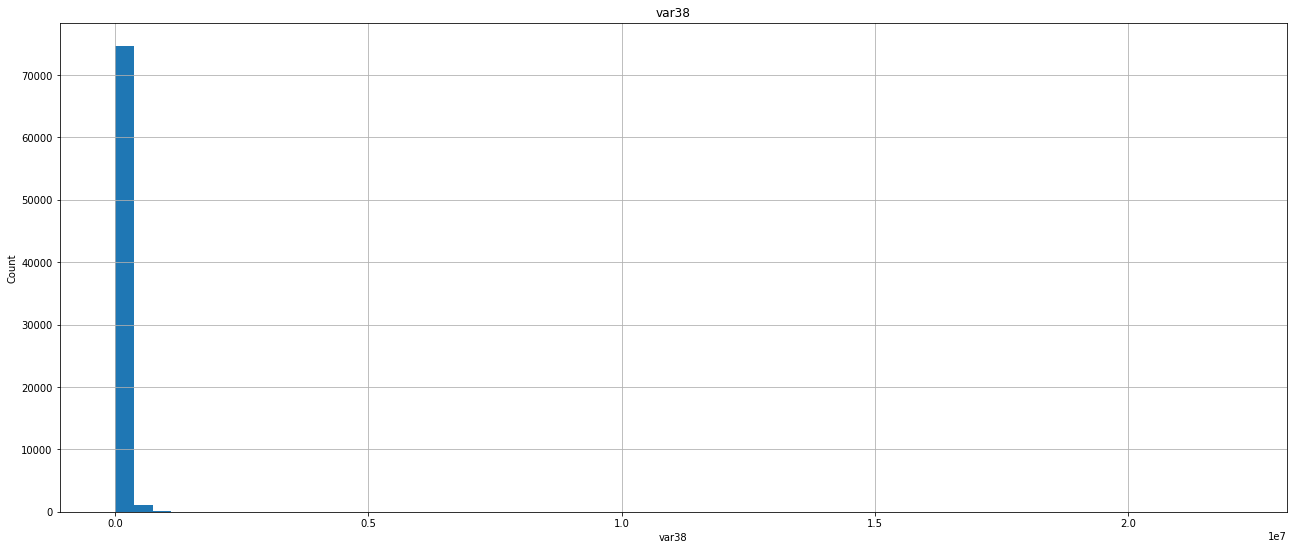

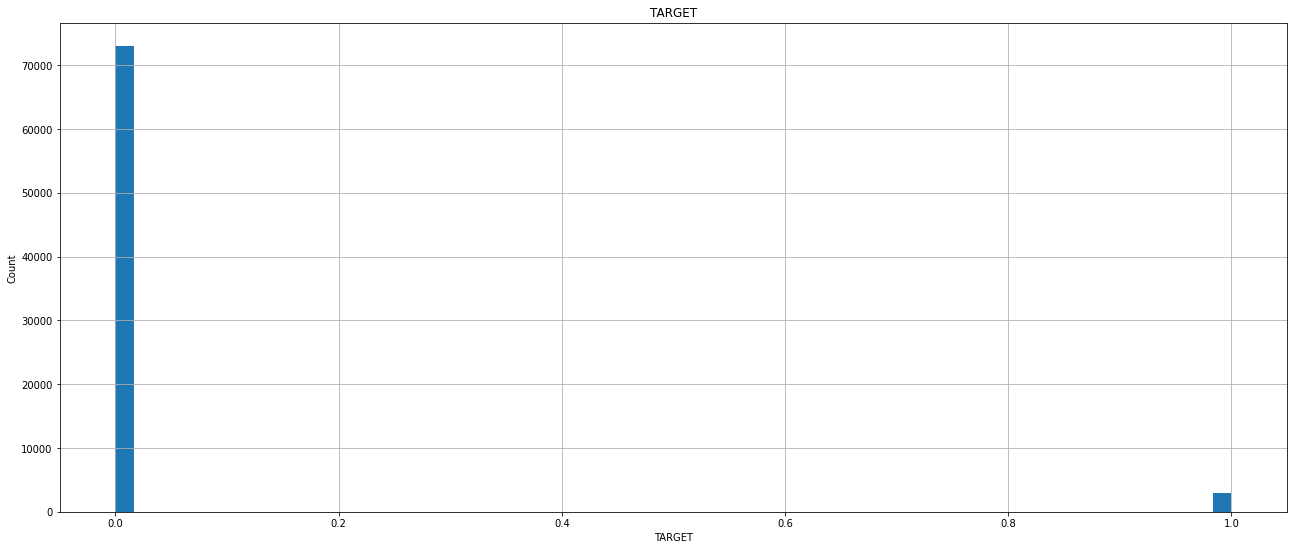

In [42]:
for feature in dataSnap.columns:
    plt.figure(figsize = (22, 9))
    traindata=data.copy()
    traindata[feature].dropna().hist(bins = 60,range=[traindata[feature].min(),traindata[feature].max()])
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    pylab.xticks(fontsize=10)
    plt.show()

Looking at the histogram it seems

1) Variable ID has almost uniform distribution, and its values starts from 1 and then continuously increasing to 151838 i.e total number of rows in the data
So its very likely that its a monotonically increasing column just to notify row numbers

2) var3 value range is quite high min value is -999999.00000000, its most likely some default value where there is no data, as the other value ranges from 2 to 238
so unavailablity of data was replaced by the default value, This will create outlier issue

3) Var15 data distribution is skewed most likely will contain outliers, but data distribution does not have any gap,so there is no default data issue as earlier
